正则化
===

# 1.引子

## 1.1.正则化出现的背景
我们在最小二乘法中介绍了最少二乘法的原理，知道了最小二乘法使用的前提是必须满足数据集没有多重共线性，因为它是无偏估计(根据原始数据进行的估计，没有任何人的主观因素的估计)，所以它非常惧怕多重共线性问题，在面对这些数据时，它往往得到的权重参数方差大，所以是一个不稳定的回归算法。工程应用中，你拿到的数据集可能有上百个特征维度，实际上是很难保证数据集中的所有维度都满足无共线性，所以最小二乘法实际上没有太多的实际应用价值，它必须要想到一种办法解决多重共线性，进而过滤掉那些权重参数等于或接近于0的特征项，因为它们根本就对最终的标签值贡献不了任何东西，于是正则化项就出现了

![images](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAzUAAADZCAIAAACW4InfAAAACXBIWXMAAAsT%0AAAALEwEAmpwYAAAJUWlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFj%0Aa2V0IGJlZ2luPSLvu78iIGlkPSJXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQi%0APz4gPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0%0Aaz0iQWRvYmUgWE1QIENvcmUgNS42LWMxNDAgNzkuMTYwNDUxLCAyMDE3LzA1%0ALzA2LTAxOjA4OjIxICAgICAgICAiPiA8cmRmOlJERiB4bWxuczpyZGY9Imh0%0AdHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPiA8%0AcmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIiB4bWxuczp4bXBNTT0iaHR0%0AcDovL25zLmFkb2JlLmNvbS94YXAvMS4wL21tLyIgeG1sbnM6c3RFdnQ9Imh0%0AdHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9zVHlwZS9SZXNvdXJjZUV2ZW50%0AIyIgeG1sbnM6c3RSZWY9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9z%0AVHlwZS9SZXNvdXJjZVJlZiMiIHhtbG5zOmRjPSJodHRwOi8vcHVybC5vcmcv%0AZGMvZWxlbWVudHMvMS4xLyIgeG1sbnM6cGhvdG9zaG9wPSJodHRwOi8vbnMu%0AYWRvYmUuY29tL3Bob3Rvc2hvcC8xLjAvIiB4bWxuczp0aWZmPSJodHRwOi8v%0AbnMuYWRvYmUuY29tL3RpZmYvMS4wLyIgeG1sbnM6ZXhpZj0iaHR0cDovL25z%0ALmFkb2JlLmNvbS9leGlmLzEuMC8iIHhtbG5zOnhtcD0iaHR0cDovL25zLmFk%0Ab2JlLmNvbS94YXAvMS4wLyIgeG1wTU06RG9jdW1lbnRJRD0iYWRvYmU6ZG9j%0AaWQ6cGhvdG9zaG9wOmExMmEyYzE2LTZhM2UtNTU0MS1iYjhiLTU3NzczMDE3%0AMmQ5OSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo5ZmU2YmY1Yi03Njc4%0ALTRmMTgtODY1YS1iNzYzMWQyYzEwYWMiIHhtcE1NOk9yaWdpbmFsRG9jdW1l%0AbnRJRD0iNTY0RUFGMTFDMDE1MDBDOUVCNjZDQThCMTUzNEVBNzEiIGRjOmZv%0Acm1hdD0iaW1hZ2UvcG5nIiBwaG90b3Nob3A6Q29sb3JNb2RlPSIzIiBwaG90%0Ab3Nob3A6SUNDUHJvZmlsZT0iIiB0aWZmOkltYWdlV2lkdGg9IjgyMSIgdGlm%0AZjpJbWFnZUxlbmd0aD0iMjE3IiB0aWZmOlBob3RvbWV0cmljSW50ZXJwcmV0%0AYXRpb249IjIiIHRpZmY6U2FtcGxlc1BlclBpeGVsPSIzIiB0aWZmOlhSZXNv%0AbHV0aW9uPSIxLzEiIHRpZmY6WVJlc29sdXRpb249IjEvMSIgdGlmZjpSZXNv%0AbHV0aW9uVW5pdD0iMSIgZXhpZjpFeGlmVmVyc2lvbj0iMDIyMSIgZXhpZjpD%0Ab2xvclNwYWNlPSI2NTUzNSIgZXhpZjpQaXhlbFhEaW1lbnNpb249IjgyMSIg%0AZXhpZjpQaXhlbFlEaW1lbnNpb249IjIxNyIgeG1wOkNyZWF0ZURhdGU9IjIw%0AMTgtMDUtMjNUMTM6NTE6NDcrMDg6MDAiIHhtcDpNb2RpZnlEYXRlPSIyMDE4%0ALTA1LTIzVDE0OjAwOjU5KzA4OjAwIiB4bXA6TWV0YWRhdGFEYXRlPSIyMDE4%0ALTA1LTIzVDE0OjAwOjU5KzA4OjAwIj4gPHhtcE1NOkhpc3Rvcnk+IDxyZGY6%0AU2VxPiA8cmRmOmxpIHN0RXZ0OmFjdGlvbj0ic2F2ZWQiIHN0RXZ0Omluc3Rh%0AbmNlSUQ9InhtcC5paWQ6YTlhZDViZTMtY2E2MS00Y2Q0LThhNDgtZjAzZjk1%0AYzVmOTA2IiBzdEV2dDp3aGVuPSIyMDE4LTA1LTIzVDE0OjAwOjU5KzA4OjAw%0AIiBzdEV2dDpzb2Z0d2FyZUFnZW50PSJBZG9iZSBQaG90b3Nob3AgQ0MgMjAx%0AOCAoTWFjaW50b3NoKSIgc3RFdnQ6Y2hhbmdlZD0iLyIvPiA8cmRmOmxpIHN0%0ARXZ0OmFjdGlvbj0iY29udmVydGVkIiBzdEV2dDpwYXJhbWV0ZXJzPSJmcm9t%0AIGltYWdlL2pwZWcgdG8gaW1hZ2UvcG5nIi8+IDxyZGY6bGkgc3RFdnQ6YWN0%0AaW9uPSJkZXJpdmVkIiBzdEV2dDpwYXJhbWV0ZXJzPSJjb252ZXJ0ZWQgZnJv%0AbSBpbWFnZS9qcGVnIHRvIGltYWdlL3BuZyIvPiA8cmRmOmxpIHN0RXZ0OmFj%0AdGlvbj0ic2F2ZWQiIHN0RXZ0Omluc3RhbmNlSUQ9InhtcC5paWQ6OWZlNmJm%0ANWItNzY3OC00ZjE4LTg2NWEtYjc2MzFkMmMxMGFjIiBzdEV2dDp3aGVuPSIy%0AMDE4LTA1LTIzVDE0OjAwOjU5KzA4OjAwIiBzdEV2dDpzb2Z0d2FyZUFnZW50%0APSJBZG9iZSBQaG90b3Nob3AgQ0MgMjAxOCAoTWFjaW50b3NoKSIgc3RFdnQ6%0AY2hhbmdlZD0iLyIvPiA8L3JkZjpTZXE+IDwveG1wTU06SGlzdG9yeT4gPHht%0AcE1NOkRlcml2ZWRGcm9tIHN0UmVmOmluc3RhbmNlSUQ9InhtcC5paWQ6YTlh%0AZDViZTMtY2E2MS00Y2Q0LThhNDgtZjAzZjk1YzVmOTA2IiBzdFJlZjpkb2N1%0AbWVudElEPSI1NjRFQUYxMUMwMTUwMEM5RUI2NkNBOEIxNTM0RUE3MSIgc3RS%0AZWY6b3JpZ2luYWxEb2N1bWVudElEPSI1NjRFQUYxMUMwMTUwMEM5RUI2NkNB%0AOEIxNTM0RUE3MSIvPiA8dGlmZjpCaXRzUGVyU2FtcGxlPiA8cmRmOlNlcT4g%0APHJkZjpsaT44PC9yZGY6bGk+IDxyZGY6bGk+ODwvcmRmOmxpPiA8cmRmOmxp%0APjg8L3JkZjpsaT4gPC9yZGY6U2VxPiA8L3RpZmY6Qml0c1BlclNhbXBsZT4g%0APC9yZGY6RGVzY3JpcHRpb24+IDwvcmRmOlJERj4gPC94OnhtcG1ldGE+IDw/%0AeHBhY2tldCBlbmQ9InIiPz5tF7HeAAE3AklEQVR4nOz9abBk55nfif2fdztb%0AbndfagdQWAkQIAE0mmSzJUqtbdijpWciRhpZ0njkmVGEw/bYivDYX/RBY3+w%0AYhQTDkW0LHXEWCGpx91sSupmbyRBgiQIkARAEijsQO2o9a65n+Xd/OHNzLoo%0AACRBsVC3CucXiIu8ebMy82Q+5z3P+yz/h7z3qKmpqampqamp2Tewm/0Gampq%0Aampqampq3kXtn9XU1NTU1NTU7C9q/6ympqampqamZn9R+2c1NTU1NTU1NfuL%0A2j+rqampqampqdlf1P5ZTU1NTU1NTc3+ovbPampqampqamr2F7V/VlNTU1NT%0AU1Ozv6j9s5qampqampqa/UXtn9XU1NTU1NTU7C9q/6ympqampqamZn9R+2c1%0ANTU1NTU1NfuL2j+rqampqampqdlf1P5ZTU1NTU1NTc3+ovbPampqampqamr2%0AF7V/VlNTU1NTU1Ozv6j9s5qampqampqa/UXtn9XU1NTU1NTU7C9q/6ympqam%0ApqamZn9R+2c1NTU1NTU1NfuL2j+rqampqampqdlf1P5ZTU1NTU1NTc3+ovbP%0Aampqampqamr2F/vOP/PeA3DOOefCPVVVFUVx+fJlAIPBYPZI51x4cE3NvsVa%0A+94bxhitdfg12LDW2ntf23PNbYYxZvYzUBSFcy7Yv/e+LMvZn2Zrfk1NDQBx%0As9/A9TjnGGOMTRxH771S6plnnun3+0KITqdjjMnzPI5jKeXNfas1NT+V4HIZ%0AYzjnYdchhKiqioh2dnYajYZSCkD4K+f8Zr/fmppfJEIIANZaIUS/39daLyws%0AWGvDCk9Es2XcWlvbf03NXvZd/IxzPosiGGOstVtbW08++eRv/dZv/f7v/37Y%0AbAkhwlld77dq9jnh+uS9JyJM3bWtra3nnnvuueeeK8sy2DARzfYkNTW3EzNv%0A7LXXXnv22Wfx7kU+/GlvwqSmpiaw7+Jn2BNyqKqKMfbUU09973vfe/bZZ4fD%0A4SOPPHL//fcnSRIeGYJtN/XN1tT8dIJzFgLDWusf/OAHf/AHf9BoNO6++27n%0AXJIkUsrwmJqa24xg2N/97nf/+I//eGdn5+jRow8++GBYt40x4aSoM/s1Ne9l%0AP/pnRBTyQd773d3d3/md33nrrbcAvPjii0899VSj0bjnnntC4GHmqNXU7E9C%0A5CxcfsLtU6dOfe1rX/va176WJMljjz32+c9/Pk1TIqqqKuQ6a2puG6qqklJ2%0Au90vf/nLTz75pHPuwIEDhw8fbrfb4QFhj703olZTUxPYd8EnrXXYURHRYDD4%0A/ve//53vfOfKlSvGmI2Nja9//euvv/56URSc8zpyVnNLYK2VUoby/36///3v%0Af/+HP/xhr9c7derUl7/85dOnT4fWgb2F0jU1tweMsdFo9NJLL33nO995++23%0AL1++/M1vfvONN97I8xyAEGK2jBNRneKsqdnLvnNxZpGG3d3d119//V//6389%0AGAzyPA/n83PPPffss8++/fbbAKIousnvtabmpxECYwCCc/bqq69+9atfPXv2%0AbOhoe/rpp5999tnXX38dgJSyvj7V3GZUVfXaa6/93u/93unTp0Nr16uvvvqn%0Af/qnp06d2tuMD6DOctbUXMe+889CC48x5urVq6+99tof/dEfpWka7m82m91u%0A99lnn33uuee63S7q/oCaW4GwtaiqanNz88SJE08//fTm5mZZlkmS7O7uvvDC%0ACy+88IK1No7j2p5rbjO63e6LL774la98JazYRVFsbm5+4xvfOHXq1M7OjnMu%0AyM0AIKK6f7OmZi833D/rWuwawOXQwwIoAQzfgdncBS5pQA/h8o1BVQKwQ4y3%0Aw7k6GAxeeeWV3//939dad7vdsLWqqkoI8fbbbz/99NNnz57F9Mo3E47y3ltr%0A64tczY1DO1gAHtAa4yGsLrrb8M4CFVACW+PCANpWQA43cs61Wq2iKLTWJ0+e%0A/M3f/M2iKEL3sdZaSvnUU0+98sorZ86cCQoyxpiZWFQIvGGPdlpNzc2mrKq+%0A8yXgLNyorCxQOVigtPCAM4CHGVdwMOPilVdeefLJJ7e3twF470PS4+WXX/7m%0AN7959uxZxliQ3ggWXsfPamr2csP9M8URCQBwVfX2yXeKCohjWKs9Eol8MKgG%0Ag1ZTAcB0F2Wt3d7efu655374wx967xuNxvz8fKfTWVtbY4wNh8Mf/ehH//7f%0A//vz588H1ajZWR12YHVdWs2NIxhXWVTgfDQa+aKIk8SUJYD+MAdARDvdruCi%0AHI9DxybnXEr55ptvPvPMMxcvXtze3vbep2kaVGoHg8Hzzz//1FNPBdFOzvms%0AkXOW8alNumb/oFQ0Ho8BVKaKIwVgMBhiKkLLOBA8LeeuXr369NNPv/baa2VZ%0ANhoNIURZllEU5Xn+3HPPvfbaa1tbW0GAJkTO6hbmmpq93Hj/DCCDfoFh6Xun%0Af7T91vMQS16tzFvT0PqpE+ef/PEZCUTeQaZIWkopa+3TTz/9ve99b2dnp9Vq%0AfeYzn5mbm7PWrq6uLi8vAzh58uQPfvCDK1euxHEcNl71iV3z0RBiW8ZUIDcY%0A9v7kT/8oH4+FUgBajeTNt8+eeOmVrc0dgOW5Dv3RVVUNh8PnnnvuySef3Nra%0AIqJOp5NlGYB2uy2E+PGPf/yVr3xlc3NzOBwS0azfMzS1zbTTampuOuPBAEAj%0AazhrJeMM0MZ32o1KuzgSDnAOIAgp83z8vR98/7vf/W7ovl9aWkrTVAhx8ODB%0Asiyff/75Z5555pVXXnHOzeLEs6EaNTU1+Aj8M+sgBZRS3W73jTfe+Of//J8/%0A9dRTo9GoqqovfelL3/rWt954441efwDAaQ1jdnZ2Lly48Id/+Idvv/02Ec3N%0AzX3yk58Me6yFhYVPf/rTi4uLeZ6fPHny61//+gsvvLB3cki4mIWahht9XDUf%0AT4QAgKzR6O/sbG1t/Yt/8S9+53d+5+zp0/3BsKjsP/tn/+xLX/qSMcZY01lY%0AgHNhVMCpU6dOnDjxxhtvCCHuv//+9fV15xwRPfbYYwcOHCiK4sUXX/zud7+7%0Aubk5m3uD6a6jNuaa/cNwOPzut7/d7/U2Nzc54wC63e6p0+dOnToVHlBVpiw1%0ACbazs/Otb33rzJkzWutOp7OwsJBl2fLy8oMPPpgkibX2pZdeevbZZ3d3d987%0AA6qmpgYfgX8m9Fh4wwTXqnmszc7+6NvfevFUjxq9c6985w/+7TheOvDgZ1Jf%0AAFqLbGjFzs7ON7/5zbfeeqvX6y0uLj7yyCNzc3MrKytBFO2JJ5749Kc/3Wq1%0Atra2vvKVr5w8eXI0GgVhglmkoU4G1dw4XMilk4ljubw8f/z4seeef/bHP/7x%0AcDj85je+8847l5OkubS0ag3Bc11axpgx5tvf/vbLL7/c6/Xm5+d/6Zd+aWFh%0AQWudZdkTTzxx7NixZrN55cqV3/7t337zzTd3d3ettTOtgVp0oGZfsXt189/+%0AL//q6ae+Nddo9XZ3x4PxH/3BV7759ScvXb6sLQA4Ttq77UH/2Reee/6lH1+8%0AeHFlZeWxxx5bWloSQjSbzePHjx8/fnxhYeH06dNf//rXT5w4EbKljLF6ZF9N%0AzV5uuCvDxUQCd2Fh4c998Ytf+MIXzp8//2/+zW9/+ctf3t7efuihh371s8fj%0AVguA4OCcj0ajL33pSxcvXiyK4vjx47/xG78BIAisD4fDgwcPPvzww8eOHRuN%0ARj/4wQ+2traGw2FZltbavbWldR9QzQ0i5GKctSpNlw8c+If/8B9yzp966qmX%0AXnrpX/2rf/Xoo4/+9b/+19vtlhATC9zd3X3jjTe+8pWvvPzyywCOHz/+8MMP%0At1otAFEUHTp06M4771xfX7fWPvnkkz/+8Y8vX76stQ5VmKgT9zX7jKqq2u32%0A7/7u7548edJae+7cud/8zd/c2NhYW1szxhiLSHEiOnHixG//9m+//fbbxpjj%0Ax4//6q/+6uLiIoDQLvPEE0+sr6+Px+Nnnnnma1/72oULF8LQ9Jt9cDU1+4sb%0AH2piDM7Z8bATA+3FP/dX/mr/6vl/9k/+xy/94dc/9dkv3HVoNQK0lXlJw1FR%0AFEVVVVVVzc/P33PPPY888sixY8c457u7u1EUNRqNKIrW19fvv//+lZUVzvnW%0A1lbIEwU929nFrO4DqrlBxJEAHMgC2lXFypFDa2trL7/88j/9p//09OnTx++6%0A++7j91gDzuA1ZJQGzbO33norz/PV1dXPfvazBw8ejKIo9A0opR5++OF77703%0AXL3efPPN4J9hT1qzdtFq9g+fuP+B//w3/rPTb779v/7rf/PqiydOnDjRbrYO%0AHzt65513xpFw3lsP4+yFSxe/8e1v7fZ7Bw4ceOCBB+677z4hhFIqpDgee+yx%0A48ePdzodrfXzzz9/6dKl4XA4a8OvqakJ3PD5TlWeqyRJ0hQAer3jjz/+xBPv%0A7OzssOGVf/AP/sGgfVB7CMGIpGfOObe0tPR3/s7fOXny5Pr6+vz8fJ7nhw8f%0ATpJkMBg0m81QXvrrv/7rDz744Pb29mc/+1kp5Wx2YfDVAGit61E5NTeIze3N%0A1YUOnGVJAuA3fuM3HMW/9W9++//w3/8Pn/rUp9otzgF4jMdjKWWWZaPRKE3T%0A1dXV48ePP/roo0mSzAzVOfeJT3zi7Nmz58+f73a7Ozs7vV4veGazcEKdr6/Z%0AP1AcP/LII3/jb/yNEyde/Uf/6B/tDsb/1//h//6X/9MvKjmx0sFgBHJKqTzP%0AkzR99NFHQwa/qqooikK7/dGjR++5557Lly+/+uqru7u7RVEAkFIaY4TYjyMH%0Aa2puCjf8ZCAZgwRsF85h4Y4izz9/fK56YOVi8rktuXaIGWgMlSgcLQgaDnMp%0A5ac//ek77riDMeacE0IEkbM4jsuybLVaWZYlSbK4uKiUCjWnQZhASjm7ktV1%0ADDU3jqWFJWtzzpkbj5kQ99xzz8rKC8vLyw899FCj0Zg9LE3ToiiiKLrzzjv/%0A7t/9u71e7+jRo51OJ3Sxee+llI1GoyiK0KH85//8n7/zzjsfffRRa21Qrw3P%0AE0Rkai+tZl9gjLX2b/7Nv3nhwj999c037rrr+OOPP66Uch5EEIKSJNna3pib%0Am/vH//gfnzp16tGHHl5ZWZFStlqtnZ2ddrsdOpefeOKJLMsefvjho0ePHjhw%0AIIoia23QQrvZR1hTs1+44SfDpBTMOTgHII7jNE3TNIVHHAddAlRAeFRVVUmS%0ANJtNTC9LANI0VUpxzkOEPMuyNE2dc0qpubk5mnKjD6SmBoD1lhN3znHO2MSF%0A4mmattvtpaWlubmmB4oCEYcULIoiU9m77757cXFxNBoppZRSxhgppRBCCBHH%0A8fz8/MGDBxcXF8uyPHz4cBDwq+25Zp8ipWRsRUZHjx4tjH7wkUePHDliGQBY%0AC+eccy5N02PHjiVJdN9996VCNRqNkMoPi38cx0qpxcXFVqtljFlYWFhdXQ2a%0AMvXIvpqavdxw/8wx5gDhLJyrwCoDP96lotfFgZ0cB5MSxliZMQbmbcy94yJE%0ADmZa6rNi/yA/G0VRCJVxzpMkmQ1Tv9EHUlMDgJMEAM/hOWwFxsrhQGu9vb09%0AGo1UBAJAXkiCd2U1Go9zKeXCwkKSJMaY0JsZRVEYhlGWpdZaCLG0tBRKp621%0AQaJ2r8RGTc1+wRo4R7Ey8FEjPXbsGJeocq0SSRzewVlLHo00O3rw0IGV1WKc%0AAxiPx957xpgQImxOrLVzc3ONRiPLsqA6bq1tNpt1nLimZsZHFUzmPCivW+uU%0AUp1OZy1ZM8bBOW+tkwhXoTRNczMZfD7zuoLEQGgCCFG0KIpChsh7/954Q63n%0AWXOjmewZjPHOhY625eVlY4zWiCSUIgDw3hiTpul4PA4SMFEUcc6ttemU0PIS%0AlAWcc8aYYNu1AdfsUziHECBWFEWv1wOgtU8SaQEChGDWslBwYrQO9h/6kWfl%0A/0KIJEmyLJst1MFji+O4ds5qavZyw/0z48EI4C0AyhsVwd33S49ka3dHS3fN%0AM8sT8KQNaOPhKyZYLFRI/cziB0pN7gnpoSiKgtxGiDQIIfaOxKk7gGpuKMaA%0Ac3AWAQYiJsaaUfORRx7575Ls7nvumD7GScngdbOVGi+IKNQ+By20fr9fFEUI%0ApDUajU6nE8dx8NKIKAQY6gtVzT6FT1bapNVotFsyjsZl0ZSJ92AEIiRCsihW%0AFhWRk84xCpmQOI7DrkYIkWXZ0tJSVVWhwlhKGbYlN/XAamr2HTf8lGCzQIC1%0AIAJjc6urc0tLI94Qe65BjBG0gxAME5VCa20ImIUImTFmFi2btWqzKcE/q4fh%0A1HwEeI9JvDdYGtHRo0cP3nXcAdoBAOcMgDFGRFE5KhljSZIURVGWZZ7noQh6%0ANBqF8ZpKqWDAoQ05xBJm+c2amv2FcwCc95/85CeP3HEsNHKN8ypNJv3yRBBC%0AiCSJE0VEwyIPUeHQUG+MCc0uZVmGTEhw2oKvFvbbN/Hgamr2FTe+PwCwQEHC%0AcpHlF8H5KFoFQ2b7sNjlLQMsmQFnDEIAPBSchZM2XLe899ZaM52ejqn0QPDe%0A6uaAmo8SITBxnDyDBTgDPLiYOGwMCPfBOVcBPBRThrFjAIIH1ul0wrjoIMAR%0AthxRFIUkfgie1ZuNmv0IYwAY2Gc++9nK2zRu7P0jecCDgRjn3iM0KQdNjdA6%0AYK2dnQhKqVkvc23nNTXv5YanUYxFuJxxApTCTNl/Ku/kPRCkOBnzxgCYRciU%0AUlLKWVQ8SJ0JIYLf9t7OgDrkUPMRMLFc7yfG7D0AD7hpWK2amjH2qJdFUdRq%0AtdI0rapqc3OTc661LstypoUWdhrvm9msDbtmn+CcBbw2OoqiNE6LsrJT2f9g%0Ao4xDSM7kJAYcwsPBReOcSynDwh48s7DxrqtTamrelxseP4v2TloSSwCycFt2%0AAMwBICDqhPtIgof4uXN75aTDGc4Yq6oqtGrj/YY41VU7+58COQAHBnALAGK2%0AJPNrPyeTkhmgPrIWlp8NPtWCAefTtwwAYu+5JAQAEXUAhCw8AK11yNFLKeM4%0ArqoqCMd472c1Z3sNeO/tel7ZvqUPABAABwQcJm4Km820n95v4UoAYI33e5pb%0ABsZSAFIAAAey6N0y4LPNMgcxyb3wxhBRHMdFUYQZyqEcDdN9+F7brqNotxxj%0AAGFVBDhAcLP9KxAqQIQnWCCcEbWAyodivzs09Y6qpqam5jagdr9qaj4U+ys4%0A8b7Uc9luJ2ITtgQcNLW9sGj7aYIEAIlrt28BC635+BIDADhMSHUDAOi6fa8F%0A4wDo4xg7mC3de5P4taN22xDBAWBgmCzkbFKEGyAHOJqkF0JcrV7QPwT7On42%0A88xq/6ympqbmVmTv6l37ZzU1Pzv7zpm9rlbUT7mpb6rmF4dnwDRCtjdy9q74%0AGUDwNLlZU7NvUSj3/Ba2ux5wHADYrBLHTOMK+27B/QjZG0K72e+l5hcD9yUA%0AEIPnYVW3e75bBkYeIAdvJ1XF9HE+Az40+z1+hjp4VlNTU3NbMHPRbvYbqam5%0ABdjvzmwdP7vNsJLCTsriWj2CBBRywMI7AKC0gsgBAO2b91Zran46k5IzvrcT%0AmTwIbhJF8ywo5YWe5P2+4N4Y6N3c7LdT84tj8mWy94/1eHgCgdV5kJ+PfR0/%0Am1H7ZzU1NTW3B7WLVlPzs7DvtnOzSU175aD2TtgMzFKf9al+q8EcXDWVDjMe%0ADTK82ITIMepN5PJcrFRbsQjIwCSmX/ft9F1bO1HICrrqYXDZzX1LNT8HniIA%0AFQDAenCCAuAq+BLewhl4T5UTqiFUZq2DnAyHuE5Y+3ay7b2ElZyIgp0HBeaZ%0AJvPeh4Ubt+vncLvikfjJKBWHcgwwzj2sBeeAgHXgEkJYMAOGWv/sQ7Lv/LOa%0A2x7nXaj999Npy/l4nLARtrcQcTjnXYzUFlEjaTVwW0dP63TPbYBz78lDOAdn%0A4QwYwBhiFXL5Mxe8/tJrbhu01oqDiIEIIMBPRuCFCSuMAbAWhqZ/r/mZqf2z%0Amo8UXpgUSAngQBVO515y8mVcfQ1XT0I4EBGLEC0lnQXc9yt2/WFMJ7He7Pf+%0Ai2SvZ3abHdrHCuuhp0VooSOZnMFgE8VV9C8DFaIIjkMDKqaFI751DPU3XnO7%0AoAHHFVGJqovuReRd+BHKEgBEhGwRrTXEi5ySEUM9BeXDUvtnNR8tRCCaxBuc%0AAzzGw61Ll954+lts60xLeiFEzuOKz7VX1u9Q6375E8E5u80uaXW59G0DEd4V%0A4DXGjUa9C+fGF95k5YBz7kgNNJJG6+AnEpMeem+1Rk3NrQtngAcGg60zZ8qN%0AdyLdM8ZY5zxXavFQ+zCitQalSe2c/RzU/lnNR8veELev4McYXuTbbxzjV1vx%0ARlOWYAwUd+1Gs+px9shQ6+uG9N0e1M7Z7UGYuxrqz8hCeoPBZbb9WvXq1/Xp%0A51SxbQDGJS/hkgzR1Wr9wTAjfO+T1GZQc4tiKssYQ9XFlVfKV7+en34+rq5G%0AjDlPxkCv3GvLPwsFJu936taePHtTqEuSaz5aQmmCm/7qHKz13ldVJYSAEHDO%0AW5vn+e7uLrpdY4xz7oOf7lZl5pzV1+bbBu8B51BV1XDY7/fDRHAi4px77/v9%0APoqiqiqt9W1p0jUfQ6y1zjkYo8tyMBgMh8OqCrsVlGU5HA7H4zGM8c5ZD3vb%0AFhLfKOr4Wc1HShUxBxQAB3xmouEgEv0qGhixkyRdCIcShLIBeDUCP2+MEULM%0AWgRus0632kW75fEOgAKDB1wOV6DcVKOLC8VFZa80ogLWQsRL1O/nQHm6LEvG%0AmLU29ArcZvZc83Ej4o45i7Iri6ur+jJzF1psABAYLTg30pSV96HcoGLARUvW%0A7saHpI6f1dwEJoOdvNdae6299+PxWGsHA1SAx6TR7fZVJ37f5OZteaS3Oc7B%0AOUzjwgjfqbVVVVlr4RzKClUFi7IEjLHWWmvrL7rm9oBzbq1FUfiimGgGecB6%0AWAcLa63WGnmu89yYunfzQ7NPHdq9Uzh/2hW6BODBAK7BgHfV6oY2QQaQxySp%0ARrVLejNR6HtnYkoAoCpgObYqlWexP2h03w83GGNcNkZWx9ECZJvMK7G/i+ca%0AvG0SbokMQHBpMQSVwZvTUYuQiYoDgLo17EFrPZNAm1k4EdkP+Ty3W13erYYV%0AwoYJmwRyIrVjVC6vnGfSEocXIAcWg1k4jdzqcrvdWJXSWjsy3imR2Kn2uvcg%0AB5iJ6MzEcOWHfEP7bHmb6VnObodrtveecx7qSusg4q0LM06Uts+izSRqW9fQ%0ABjHAgBHQhq6SymbF6noqRcN2Y9t5k3sDWveYMwAfAagoY2HaBhDjbYDBLaFk%0AecI4lNqvLspHw8f64GtuChRaOL2f/Md5HMfOOa21LgwRBC+0dlxrjEYTZQ1r%0AYUofp2FuzjWnhDEQGBjCHyygfsIr19TcYLzHVA7Ge4+yRGFAY2gdWly01kVR%0AqCQWQgg+WX6dn7Y1M5AIA9bDs92sw/jFs3cTUntjtw0kRNDWDgZvjFEFUAES%0A8LDWkvfOuYkLTiCQmMpeAoBzs4Hpzjt4O0mdSFnvPHFb+GcOk4szJBwgZpW3%0AQYoeHiCLa/GSWsH4ZlJgXhM84AkFbyJaNnOsv843HhCVG+rBFgDenBu6KG7N%0A5wc/S+rBuDEvNODgCCNgDBAYi1vh4uWmkw3bDrNv+da1h30W/qj5KXBvuPeW%0ASThYbw1iJ1qDZGW3cdQO8p4d5S5XqllGahz7BzuP580Oi5UEb1HELMEw7sF9%0AEGsGODxHRajgHKyH7/hbfsPx3gRI7Z/dPuTcl9KXjdwf9uy+UowzvOmt96SM%0Ab+7i7hbdJYpFDhkRB9zd0VUwht4KjIPYAudSKfDIEiRjoCNwHmUKBi2Aj/12%0A+zbwz2puSSgkdIAoitrtdufuu9Nip+pnAFijU/JG1JxrLi+f7PUi1UpJBM/K%0ATUVtp0rVk8D4tSm9NTU3g+ByhLRdHMeLi4tWL6pSJknCo9SIpMOjpNVK0zT0%0AuzjnuGfXbHdScDl5Ngvr4dhtZNB7JzjV/tntg/HWWiJKkqQzN5flS5HfdlpX%0AnrxqSbWcLSz0pfQhVaI1xDRC5j1mZuBggdl8O6vBeT0KCrgt/DM2+0kAYPhU%0A/BQeIA8PwMADFCIp9dd+M4kAaVAKaKDiMBFc54CGtOnCVj4uOn3vPZJFyDY1%0AVtOsQYu9kvqwObZ342EvZnzRWpBEHkO2MbcQJ7zPmINDokEM4DOrru2h5obj%0ASjjHiTPGNFjJlU/mh3N3eopH7WO2HDvnTNQ0vKnTJjtw74FNliQKDY9oDFFB%0AARwWKCAB4cABCNjE24gswDx1PtTb2Z+Oz94y4to/u53otamXJbt8td9Oe+PI%0AHXlA4GJVVSRjrpqgw/MHjw8684yxOVnBlyPVIcRpCniOSAIYgI1RWjAJ2YKI%0ACFwCQIYSwMd8fb4N/LOaW4xZriNU5BBBZZmxKRjFknnvjWyQavo084AxZkfs%0A+ldP65dfFaMrgoIjLgRfXFw5hvs/gYPLYIywt6a6puajhgiMMe89VyrLMuZa%0AyleuijnnBU80a7hmR0pptYUQ4ECZu/FAc9LCFeRKoQhSRmmMmECM2G1szLV/%0AdtvACIwRZzxJkk6nw9WY+7IoCqYSrprOz0kpnXNJkoAb2+8XEZy18TAmIqMH%0AAKpGSyJhYB7ewHDtRSm9gxGVlB/z9Oat75/Z9/jXIVpCYCAADgzw9J5Ovpqb%0AA+UjobVAA0zEHpq8E6ZIKsZTpxXzbQDaJiJqkaTSgUs/0ldbF5/RL//h3MaP%0AmJ98jXmxjE98Aa1fx/xneHvRY1KAapFc94q3lj3UF65bDE/w02Zzzr33Nmrp%0ApncyG0WrVVVJKceUahZRc2lIdHelwXJsXsHbP2YXTkSuH3HXMAZQmDuEI/fi%0AjofQmIdInIjo1l+fA3X87HalWZbNotBZO/JplBzV4kBOd+V57j0lcSMxzZjS%0A9bxoRENsdfnzf7ygX0ZhYNtgTNLYNtjCnX8e9/0ZLzKrk2InOfkm3vwhej0c%0A+nTzkcfRWbnZR3hTuU3O/5pbDOfAwBg4EYFzzlUUeS4iIQEUleIqgoCtUBlt%0AjDHGeO+ZBEQEeHiPAuAcUoLzsPFynnGqm35qbhrB7eCcSykj1RJCFEURRRH3%0AsWYRb6fGIBYSro+NjZM/+tHWK99pY9iOuXNuSJE62F1jWbJ0DI15eO+847Ub%0AU7PPYQxCSAHOkWWZtdZyJ6XkXKZJM7UNKVFy5n2Jixdf/MEPeO8HsjAR5jnn%0A2344nItW3ZE71x8Zp2Au6ffxwx+e///91ssXLlz4tf/y+IGjX6j9s31H2GnN%0AhHNCdy7ePVI6qG8TUWkhQmOeB3lwhiBHxABr4YlxBgdmLTgHu202pLcuBCgJ%0AsvBaMkgCYLJYWue44/AeniLh4XNoljqLXaW3lqINjXEBAaQlOKzEhtjwze3E%0A73LNHZoc4DkAlNEH2gMmumhwYDRNiN5oe5iFCsJIn2C6jP2sdd8z+xfi+nca%0ATpOf/alqbggixtSupIAHAaIh54wuYpmJpnXONXjsmTAM4Ogmzuc7rc524U8c%0AXjq5zvtgHmOAYWvUdcME5i7QUl8uDAECVt/9an4aiuLs+q1I+BPfZ/qOzjnG%0AmBAi6C/MjH/WJBFOkNnZMdElmVJH2vY7ehPwDQiHKMmYtSxXi42mhyfv4cbg%0AhJTnMNsory7mbx4cnUEDEBdR0AFjL+q0MzzL8isNKVGg7GPjtRVsN0T/Chsv%0AziUoikIpxRgLFvJxW+5uVXdldg7PBmc7BzH97mj6p/AgRvAM3tfZo/0LZ3wS%0AGPMEMHgWynms98YYpjUZIzDJSYZaHzeTu7TgAAzAf5I9zGAEPxWd+uj5GSci%0AhC1KmN6IPRewvT/rq9e+ZTK+icA5JyY8E57gPZxzztowtdA5B+dBgAaiiS8O%0AY6C1k84zRoDfk4WnoJJGBILze+wBk5/73x5mlm+Muc6YZ4+Z7cxnZ0roir0J%0Ab7fmp0IEIgYGAucgghDwnkJFcBTktq2FrqA1EAInAByY5MoxxowxqCo4Z0v0%0Aeuj1etaSFJJz7v27VsvZbefcx8Qebhn/7IOuRtF0+RLeM9BkNfMejBAsAbAA%0AMRjA3kIHfJtSxdns9vSrm0ikcwYAPLhTE5Uyz5lNza4xhXNmoqjhwTykdrA6%0ANYUzA2eHAo0wGeBntAcAhmAd5Ee+H/tp/tlEr40mn8KEoOgW7vAedG0f+fHa%0AUO43zLXO8als8h6JWs4YERE5oIJ1zrlCl8NSkRl7kXs1MAJCAQl2GXaUzpRP%0AGHFNMqdWDM7DXM8Z124z7/besf/t4Tqz/6m7lNmCX08X2NdEFkABA0iTBMEj%0AB8CCEWATEGFclZUfNWS/G/HmfKK8lURCqV3vt0kNvE6qiny/LLGziZ0L1g2T%0AFHMd1ld8YZY92xs5+/hE0W4xd+W6E9V7P81TgXHCHkebQM45C+LsmjbWfiwI%0Ar/kJEHnnrLXGGIRpSAXAUXmUJaiqImN8mGZI10fJ3tceHLEQakCY8nTjT/Pr%0Ari7hshSCYT/LP8ZsNs5UNGjyhP4mRf9qfhrTr3vqXxBh6luT90FjPQw4CqLr%0AEICAHWEWGyDnvPfOEWN7rPo6iddbyh78u8H0U5rlN6/rHnhvOK3mloAQprkg%0AiIW76bAXN13GpZSkHRGBMZre6ZwzZam16/XY1tZWXixGKiIi71GW5ayiaWYJ%0AHx+TuGX8s70n7d7qNKp6YGyqZeXgQnGRhAcjrkBwgjPhwT7sZMOaG8EIAILq%0AE9ieSU0e8B4OcAQAnGCIE7d9OdjpjHlzHq17kjIWsKYquOWVbS/mR+Oiycux%0AsZtC5FZEnCuU5U+wB+YJJEA3wR5mhTU/OXLgrA2rUfg3mP6DayvTx2ZtuoVg%0AE7Od2pTnAEPYPHrAM3gHa5lxkWuwoogGnVZ3cX5jiZcFJIGxxWEi23elc4fl%0A9jKiqNEswNKJVh9jk/FPkyf3s3hwSC9Ng8STt7KveG+yEtMqzHBGzFy0WR7/%0AvWdHXWe5fxl3ACw0EkzGaSISOQAQYAgjBcUaJsa4RaNFKtrxIGLGgwwUWhBz%0ApOS4kRXZeBDJkrk+BhvLFVakRZ/RGIinlhMKGWdu/cfEHm4Z/+w6rp3DLFSW%0AeQBwFs6B+DVx+tmox/qitr/x/tpPotmvXgiRpmlzcVGurcVF6apcm1wI0Vk8%0AEK2soNVCHEspOeOwoS30Z7IH67xjxG68VXzY+Bl7T10FsQ94m8Fv+3isU/uW%0AnxySf1dUa0+ahjGmlOKco6pQGTAG0ZRSTrpAgvWH4Bnj1wfG9vpq172Y99iv%0A9nCdi+ankb+9cRF8QOqq3pPsXyZ7zvczSc7BWVh7Q8VYkiR5P0+9JmgYY1Qs%0AkpRz7qrKGKMYtEZRFAyIYxCR1mgpde28mPIxcc5wC/lnH3iKllvo9/2wb+10%0A88oIIhLNJhodRAmIA5yYEGAgfgsd8m1JihywUZiZ6UKtgoCLOOPwQrJJs6WH%0AJ19Y2EF8pKRVdejgpeyJSudFUfTIRypr8ka7vSDXF1S7zSQsXMt72ALVB9hD%0Aq4W4gbQB4iAhPOA4uPzo7eGnVN6EuiJrbcjbTiPHYcvIOL92AfaefoY+g5ob%0ACocGQLDw0zwmGCAdTXpdiCA8QAykwNwuE4OkI1ePbNz72GA1Go/HnrxjNOjc%0AmccryR2PHDm8mjZkFJUL0QhgsG04B2vh3NRvYyCCtWAM77YH7Fd72FvpP7tn%0Ar3Nmpz0TQeN3VnLEOf+YVILforhGEw6XCQAORQABPCy8BDgvQIQzVTSkhaXD%0Ai90H/uz5lQdT61R1AYDIlG/EWPtU2Vxwcapi3+OU08VYJp2F5azzZev/QlHE%0AsyAr5/y9bey3N7fS0b63RcB7j8Ggf/ny5csXy7IMbrVx1oAfv+++tmOYVxB8%0AsnLVe7B9Dl37OStDMcYwxtI0ta6jTZznOZFP4maKJI5jC2itmYaQYRKn+yB7%0AuO/BB7MWIUom8huMfRTVZx/AT/DPbFVprYuiKIpiWqXEGGPtdjsIa3Ep93Ol%0AUc0MondH14hA5Cw4581mc3V1da7Tz/PcwXnOeq0jA7HAFhfTNJ34KM4RAWU5%0AswdjDIBgD61Wi3MupMStYw/Xmf1MJsk5NzN4Hbr8pjJycRxHUSSE+PiETG4t%0AiKb9w+/GezeL8wa3u91uHzx40C0uxtpgKKy1SSejVjpqrbE0HQLee62ttTaK%0AoiwD51xrvbk5CDbAOVdKJUkipZx1td/27Ef/7L0loiHPNavgmdUuaK359ln5%0A7O9kbz17xFyJTQkDA1yAiKr/Fp/9W6C7KlKWwwOp1zAGHzMH/MNS7bm9dzUN%0A/YMMds9tB+AyEg9wuATjtu2hBCyDj9BqakgDEBAbgHTJBwCiisBUITIAcenh%0APVIHaI0BgYQVcHxHZACliDnDsi+01oMFlactXUbWNppBWSDmXtlGXMWSRV4y%0Aw8AJPMbmKfXdL7de//aqvkrGhIqgq0JF1X+DR/5qtXAHUewZAKiyAnnc4Aki%0AjDFrbdj55XkOIKwvey9OId0Z7LmE3xn0j/zP/yc030G0AwxQOliLpb+CR/7a%0AxV/+zziwqjWIrJAevrbmXyxjQAN9AMChHLBAvAWiAU+BSIIJgHAeQB+HLbBo%0AJICekB5oDUCEQSPsMcYRDSMUADbYikGkDMXE2wQh840qyw//0tXxPePxGJ4p%0AlTBScdRoylbimoo48864RAqHnTPypVfcmyfLnSG3sqWS2H0HWuPAKj7/uc1P%0A/oNQxCmBLAimyZv44b0PArYwI6/GFBfetIVZjLHKqvlBnFsUDSwBmBsNs/PP%0AZy/9X7C1C0pQCiAGYsgn8Okv4vE/M2IYYQSUy17DAMUSwPpNAGjd5OO77TAj%0AWKtVqyBoOI1hCjTB0POwBMUQJT1JANojwDlSDAoHAQtXCO2DpAwgweEEvIP2%0AB62obGfHyfzIynB7uaoqrP177z3n82m06psHbSxZSqPRhXPFYdFas9vdIxvt%0AR8+8vPZ7/0t77gqshViDW+lHy8l/8l/iyL1jWhgADGiF/lELoIQYgREwd7M/%0AwV8kt+TyPqtdsNaiqoK4POc8HI0AMp8ZYxB05/nHfYbXDcVPe3aubaKmeZbr%0AWipDtgdSwu/ZCjMW0pwifHlEM3mN8FsIaIf4tlPKOUfeAeCCpJSRUrO9dUgI%0AiqIIW3ASAtKEJ0pYMtGj8t7ZDyzg+Yh57ybEe9/v97e3t5cvXZKNi72052i0%0AlMNpMNVDvz82SASctUxKvP/GteY/lmt19iHbTgQfbNpZz+DAuAVg3h0DJcJe%0AyVgOvvfbEYCUYBaCIKWMoogLryJK09RZMCY5iwSPg+8uhFCKgZz1OR+PceHC%0Ac889d+7keV2xg4srvzb3GuIYsNjZKS1SPj3R3L5rDvgJcM5DfNEAMAa7u4ML%0AF6rekFHiRlgwwls5iFbT9cuub8s57rm/9mleH5ms+YUy68Pb+ykTTerJpms+%0AADCGPTbPJvbn2KRlHgDAuSLFyGty3jNqRlpHFLW994y1YtmwaWpiMbajoijK%0AEowxAeE9+v3+pUuXaPMkEUEWYzvazIpPbG1hOa8SA7olXZcPy613kHvrTI0x%0A0P2mu2poJKkCRzjjjdauKlEOnB6STKdTf96jwVDzHt7rzE5cpclv4f9s9vPA%0AAGCoMgAZkEEhDES9AgCIgKYBxgCTMV8AA1QXzACJcYAGAE+yKhMegRhEBRB4%0ACgbE05ZFJgQniqQMvV1Ek6oszrnkgjHmAWutsc5a15B9nV2tGoWGkQxw8BpX%0ATLGktIjyQowN5wTFgWaEaD8ZRLDqRRq1xy8m5TmIjbnUMgIEmAYGWxhts+FQ%0ANhrkzfVLY80viLQcpUAzyuABHbbmCazNmikA7oKaIgFYCmU2OgfrNYUmVMgM%0AgAa4R4tjDuUSRgDDUkcDXaIuhIc/pmTiHXmfZfG8jpy13juWJk0iwAIGTIM4%0AdIXBwH3n/OPPnH/8tZP/5+7b5xN59nPy1NG1l1uLF3L29lHfR/6/l422DCHq%0A+C1wDtx5Ez+992IoNjAWpUXkyTmmhS8EhrGtpJTk8qqqUPbd1s7glJKsTOdK%0Az4DgdNLzgn0SnrUYemgwAPqad2Bu8pHdprAMDJIuSgDoWNMiCzBAaLARohIE%0AixUPQOUALCXewnkwzjibbGqcm3RqEQEMJDiXLhbkyFFkpbWMr3AH7o5I3rEq%0A8Qyy5L3tLq6iNd5po2o7nuJpNjjZ6gDSA11XOmE9ig3YXoNaHs1QTg4Ee4gM%0AI8LtNuDvFvPPZkWmoZh0IosVstGhm32a8DbGuKrSWnPnCMzV+60bxLtDZDMs%0APsB9cG4iRItwKgOYCE9Pno1dHwUIrtieApTJoA8imk2zCfXFxhg/rdHhxEFm%0A9teyLIM9eHKz1/fwN90/mwkQAHDO6aKo8jwuChFbxgHF4B3KyYO990FCPvxq%0AnRXvmfNT8x/FtBXNe0xGgxFBCOcBDz7tDIb33sFP5oU5C8v32BKBYC1Ihh3j%0AxMy8gzEQEIIBkXPOO8cIAIPnRiNNEUkAcA693fLsubfOnj37u1/7lZOvmdHZ%0AfpSXyTR3SUSh/MYYU1bwgHAQgu2LsPDPhjEmkpHzXmsN77XW1tq5liAyLEhU%0A+8lpq/I8z1OfXh8yq8fBfAQwBm/hPcgYiEnX+WTZDk3oUyGgiRYQYK0HIPjk%0A98mjOBNCRFHEFXeOC9nkDsw2GJKSwQBKqfF4PBigqioLG2qOm00JpREBpNzQ%0A5XmO8Rh5PuZjnzY+DhXlt5h/dp2ajnMOgyuuLHLjMyY4M+AcIqrEnGDSWUCX%0A8CZEhSwJYuLWyQDcJPxMwX5aqj/5he356a79obEJYAgF8FTwuLIYjuB6B5Ic%0A3MM4GAO0IOa2kzkLu+yacCBWSmbAc7CxYwPHR5FicB6GgxoJ5oAUJoMBi4Pk%0ABgPBh0RTUGxn3F/Tm4IlpeEq52l3N+vmJidGHJKDiEhmlPGhTfpVNBowm0RJ%0AzBio8vA+RPs+eq4ba3NN42d0dmnnjPW7AAAOL0HawxIDnE91lVQVyABEXpGl%0AWyildWsQDwA2BHMs8U2khJhyABoOJBxDJAB0AQw4DNBA6RDvQnLwZTAgckgQ%0AYvVuErIfQgGKUURMp77kPOLEneW2ghSQ0QiyAAqvy3LY9vmC6eHMy9HXfv/B%0Ab3/jwf4Y5cAdYN9ba/94buHlu5pvr7iLrQIlW8L24+2+Et5SYkw05pTvQ2tw%0A4JqkIWlIWl6CSk45Z11ZVXHMvCet+yhKqpqRPxK5R+xYQ1u0vu0scnaR6BWh%0AT7riHqEixgByIEDSPthY3Z6cZiWBjhUrAGAEceQJPMCVBdQQ88U0cplHu034%0Ats4QAmzOwI+BoPodwUkAXsAzWAKD5qKMmLVswLwXmBeexKgZOkaEhSgZ32io%0ATWS6meFyFv+o1TrVzDTyoJM5SuATymEG0N3ItjkShjb317JiFRSA9KZ8ajeM%0AW8w/C+y9qsGYEHsoyzLVHtxUzFemakuJWaUaJsM36x6gG8Nkaqb1djwaucuX%0A+8PLI+wIgcR6732UrMwvkkmbfE9MTUPzjY2NrXc2aFdIC9Kwbs5G7eZKdYi3%0A4hQIX9k1vzAUtYWqiKBn6/GukEEIrIYbVVWqwoLBw2qjsmn92bUmMro2YOCm%0A8L66aIwIUvKYoDgIQVjBe3hrmdZaa2OM547e8ww1vxhCYiZEcllY+b0rSxsJ%0AD1jvuCUhJtHhsHoSaGbYVZ6PvRU8Q0kNAjRgUDWhCAyMczHb/DAONtEjEADp%0AfCSTLGo0Xnpx9w/+13PPPDnoXTkW8YPDEZRkhw8cvueQ7iy6Q1nRTF4CoSzL%0AqCyNMQIQQnDi+yEY/LMTJGMoDJYtCmut1npjYyNOlPAkbXjMtIxBytBKNIlu%0A1vVnN4yJJVsLraEbUKgkrHeRNAQKUwGmThGxqWcEW4JroIS14AKRgp3MP2YM%0AdiLnxxhjEhIEBc0JTAF20navtev1enkOASEhGdPe+6qa9rsQRVEUuSgoyxDR%0A/tWS+YVyy/hnsyvrrLtz4pYt3N1d3b5q5rfHO1x3GWMVS7ZcQzUOyahjSc7S%0AZSHWUmeDfgp7diTXlZ5dewhNJngA4KaE9wuSAQbdLt4+jRNPNc69CP0aOJ+s%0Ap2uP4eEvLLZ/ibJ7x0wai4bpRv2TOPGt9Rf+dH34OtocxQDGIFrD4c+Yz/05%0AcfRXILPrzHNvDVzwzELamiazc+CcN537Rotb3XxxPNiJyl0iqni8K+JO4w6h%0AFqRTTHteOQgGQ+/qVLgZXDcVwzmXa8lYu5csJzzpGjjnOEzJy0a8MseaVDmm%0AfSVMxCUs2K10Rb5F0E1w3mYC3sEBhcHZr7IL55q2BJHzwjkH2ka73bwLtPAw%0AWAceywJgQ5x5U108ocZvgXWBAh7QDbijrXsfU6ufgY/AgBhgOXgOWHAHwOad%0AfGs+4/M//AN866t4/aVo83K77JWscobGf61zYjn+D4cP/sn6HW9E7SrmoN3Y%0A7B6h9DGMfsNZS95LcQngJR7y+y9+IJyLrBl5xjxzrPSsdGzkyDKKS8O4ZIal%0APaf6/NDbg1+9ePa83vw7nUbzyKf+SdI5n7d356I+YaMyTcHWOOfgmwDBCzgV%0AoXmzD+425Ag0/AZeeRU7l1DliMpW+3SfW02tpHP/YufvsQbBAQ5IE/A+uifw%0Azim9c06aAVgF78FTq9b5gQcwfxc15zwPDf88rOUCFcAJKc0yF3zInfEuybca%0A/R2UWCoxGs6f3Y4PGX9BRE5rzexCRa0eGsMCNKp0mssGCJY8n0ySuk25Zfyz%0AGXsTQ0QUZVmz2SzabcY111ZK6aOWZB0hBOe8nun0EUKwFoNBfunS5smT6wtD%0A731ZlsYYwsHk0HYxGilVMRkjfH3eYzTqXb6s+5cWqxi+0oUrxWacbQ+Hw05V%0AzZQCQmgp3N4rg/R+ojs+ajRYs1m2WhJaSS2lRNKSrJGmqYoix7nzoSbi3TNz%0AbjazwsooipIkqZJEKcW5JaJIcKWU3NOpuuef3Zx3ezvDJ/MCJ/r9RYELF14/%0AccK6SgjhSGmtW3x3bW3NrI0aS3AWAJhHWRXR1tbmqVPb268wtxVT6bUxZdqK%0AR+P2wSPtHHFz9n15Z0CWiMHb3d3drQuN73ztyls/rl5/sexudLxOI9U6fDg7%0AcABfWHmCBqdY9H1jjMvBI4BISJllGZQCYK11cAz8lut+0lpzGRo5Lee8KIoz%0AZ84Meq8fTNeW78s7K5FstRqNhpSynPWE3VpHeAtijB70d+feecefe/NKb2fE%0AR5vt013SnlqH7pKH7x20my2ERpayhDLY3d0+f/782Vcw3s6EAZAjGrMLn/j8%0AqhLLUTKHifyoC3ESfy3zgcnv3gf9rKIohkNfoiQipZRSSljBuS3LEnBKqQRJ%0AkiQ8y3y7Pd77pum2XQn3nX8WtOxCp17QaQxyCd57pVRQMkyShHPunJNSXmp/%0Asrr3aHlg0467vugaY4RSWdaWy4fyxnySNcFZpZ33ngTndX7zp2EmZxGYAyNL%0A0+nOxhrBhQWzYOFcMIAHGuVBcPQEjEWbGxvlg6yXLuxQc0dYyBjI4UZDNqxU%0Af8kkasThgco4MRhxz7S2c3PzkA5MyMjDRFpraAvrUHnLwBURsWvdA+Fk9B4O%0AnBOjiZqHYvCCOU6vLj6QP36YHd+y/R1ZdIlIKElS6EN3ImuzRppEDQkxyQrd%0AvBPAGBMkFq21Mwl1KWUvPXq+Ey398n91cWenS5xzzmTfe39g9YHm3D2cpWCJ%0AjSoDEnWB9M/AbJTWdbng900Ne+8LnjGCqMCdhh9BncWpPzn0xrcaABiKLC1y%0AzTlXV9vxw38R9tMjHzMGpQcRNrDzUvKjf7c6fr0TrMoCLN0qL/mjAp9chzqK%0AKAVgK8P9kh2y3SvYuYRXX8B3voYffOeuMAtAqs3G6ptH7x0/9Gjrjvucw0Y1%0AuKB37yjLAyN5MIqibV0S0epdx2nVj5rFfDttVy1wzoOwa3wjP80Pj/JF4nLh%0AIByYh+HGMGZIGpoTjeaGK02cVCm6WTI4ol995oEC/9u+y6rR+JOL59buK0dR%0AVmGhEa0yKPIAZXAhuckb06qVmp/ArJzjg2ohgnTRTE9UQvLdGOf/X4NLF7vb%0Anzl/4eBw/H8cuCjX1eCOu/AbrU98AjQHCLhBky33sPHdhZ0n+28/I3K9lEJK%0AjLh4Zbfpj7aidgasw0omAAhviDhXXjEmJlXOBEhwtVNQUfj0wtVouyQvDpxl%0Al554+I7xsf96kL84YF1hvPRJEi3ESwe2sqPEF5SOY9mYJMOmnpm6Nr3j9mHf%0A+WcfBL0bTOWnlVJQClHEWIPHcM4R51GUGe8nEyFUHUX70EyLb0Im0TvnBBce%0A3sO7PSnQ0HwGwHtY66qqclprrbkxXAE6lNdMg17WWmu1hnOe6dIURRa0ymJM%0A5tVYW1al09oYY4whax2If8D5xvlUfmMaBRNCKKUiRIDhZepdpaRljAX/jEnp%0AhQBj+1AzbG9IWErZaDQWFxejKMq45Jwz2QTQbnSiLAv6WM45x9y7OjlqPoAP%0A0p2fXZb23klE3k0LVY1DVSIfQ2vOOTIO7+Mk8Y6FTLTOc9/vUytG8K2dhnOc%0AcwgObqEAA+jpGsW5q6p8VKTtJlcxLNvYwFf/8Ny3v7p57o1ouHWklbb6Qwjm%0A7r136XN/fumeT4In40H142ar6eU81IoxZiTX4zg+ZDXnXDWbLk1NFHHOJ8PZ%0A9yc/rUzIOUfEsyxrtVpRFBUDCIFms7m2traykucNKYRwzkXi3d1KNT8bH+SW%0A+XfPBb52J2dCCKRpUZRXrlw5d85euPRSVwtL6L7y2u++/MMvfvGLf+MvHGof%0AtWy1Ac7R7WI0klIuZDqOgByc83a7TbPRAQ7OgQjEGIhmy+8sGOq8C1tT773W%0AIOsaWZKm6dzcXDR/oMkyaaGQRnJOzK2g3a7imH1sROZvmeOcSa7vdc445+PW%0AwVwuF9k6TEnwzGkBV3EfKcZUDPLcFpwx75kFOe85v2UO+aZQGcMY4wSioPUE%0A8mH+giOAQwBkwCzgAAOMEnhgCJTRMHY7sDvS7DDfRzFpBTUWXdlj6BbxeV52%0AkjhznkA2p3EieruNruzstptkrNMa3bFRamSktmSVExCTCYZTUYPwHh15D2sQ%0ABodPAyTKGvhKp2tWek1rLh5rYyR5KSAkiYRLIZWXCp7DSTD+AdV1Hw3v9QwC%0A22q1aHWio2VRFEPbJiKKN4koE3NVMteUiZEwAhpOUV1N+XOyt03kui/iKoMA%0AWgIccmgrnnRboh/FFs6CALmtFKwHo+hynCAeUNwBQJQvjl2klXZtgQXwDVRA%0AE2BO7+oLO4W9Qmr5SJYIfR4v/QDf+y5Ov4mr7xw5f/7AKN9szfX4/HOf/Jy+%0A/1P8jnvZ/BKLkiRJosWoc96OjflkOrjfGbmTrkopWfK6iMZRk6LMUCPWXMCJ%0ASTRiH+IL4QtmI3juyHniHhKkvMkclGa+FEWZcLuY5otPbMZimzt0sDC/PDp0%0AbLhcecEUv8sbYmGwCTX26GpoAsD32cCEW5ZwUry2G+8U63fTrzzdw5OX/m/d%0Ay3/JjOc5UOF7i8nis+fWL3wpO3sGf+Yv8zu/iO5g9SG9iJHL8jIRAAElMl+2%0A/NnIbsD2vCuNjSwD54BXcESWA4BwxLwHB2BdZV1VDdh43BpUEIrNHy+KI83B%0A8i/55l1j2okctbwqZSIbLdlojpKGojSGABBP9G4MAL5HWPq24VZyVmb+2cxX%0A897HApyrSAlX5d5Z7o0kr7hvt1LuQGwi/U2MfVAkpmYvSghMVeQmd72nToum%0AGX/j4Ni7FdAmPRwAAwzgJjMAuJROKRnHE9FCR7NrpLW+LD2x0KoYhHVcmA/O%0AfkJ9GJuqPYUuBABSKqJIgnMiZBBcGCPJC+4Z9zxmnHMu2DQouC/Y6yUE2xaC%0AxXHcbDaVUtAN7z2ihHOesEQpZTg8h3+3Nn3Nz8Fsp3cdkz09EMZ0B51FADAA%0Af5cPxBjjUubQEjKUWsqiMMbw8J02AY3Bdp4jbrVaaZpudbtvnGuf/Gb/nbfT%0Al370zpV3QPpYVVULCwv33K/ueODQ+rHiyD3F3EoPvGutDe+w2WwCvBV7q0Wl%0AOkSURqmMKW0JHikr1H63hL0d0wD2aiQBHDwcZpIgSWCMEUJUFfI8l7IDVFJK%0AKUkJWAsAJlyx2G12Fb6x7P3837stuU7iJ0kghLDWbm1tXb582Y/HCebnAN5e%0A3+ntGGGqCi+8UJy8eP6BbudXv2iCdqUxFmNAABxwqHKUZcnL0mpt4SGJaNpp%0AP3Ovp8Hr8L+dHYxGI+d8HNORI0fm5+Mk6TebTePL2LOGV0omLEl4FBUfj8mb%0AgVvGP3uvYTHGhBBtGKuEkSxXaWUsEaWSEmZJD7grAQfGwDhEREyBxL4bULfP%0AEKFtzRs4A2/hLciDCM6COHEruBIkLBgHIoaorCBpWY+LaifeGWCHsLVUDe6A%0A6RqtK7CcKcdXRBF3+macdnM3ByCqbDokPkgObzUbvRJsDO4zi8w3tch6QzXO%0AMZI2g0j2Rrkmvd0OzsNrWA8RKv1tEEaEtceYcFYZghWxZ+AeRODQwhOchraA%0AhZeAmKzx+6BeZzaLkzHWFnCOOLV5WcpyrWTeJwkJjzGzQggGAQxgDUyd3PxZ%0AmDV9773zJyR9jjpCmHjhqEA8Lo/k46MYXkxYASFQNl1ZqZEBi0Z5tr4Tt4RK%0AU+kr6YucVVuGX3bRpmKQFojAJOaqz149/2vv/N4nT76JH72E53+4oBS649UK%0ALy0cenP1aO/I3bjv4eTQ8ZaQViUMSSJVKxUND+6dOhTNS7CF+LRzZVN6733G%0AOedtiRb0XM4jzgEqwFglh0Ck9tv6RvAEjcj5yCPyEMIy6bhyFJWw0a7iJRgo%0AOsgFqoKIj8fajIqEJQfB+pHIGhzRdAR8aBxk4dtjOYB6Pf+pzLQO8G5v7Lqz%0AIGTt50bQO2r7zb+/8+qjGzt/Js3oE3P/8/3rJ1rxm6dOnfJL/7J3+Q59Pupe%0AiL5xRYiTy+ldvzbvulquJ/qtxvANEKAUqmpguPEwpASniCMMGAbgCcQAGgLw%0A1ALAzLLU49EFYOeIoiJTyaF73myvLYgW8c6iEfMlkauYEUJKwZSSkQgiIKGR%0AB4TQhj/RE/hIPtKPjFvMPwumFmxrclVzljMQ4BhxKThHDEgwziKAwYfas33U%0AqbfP8caQJ4gwPCPoQAaNfwbiIIZQ/zTVvgELQwqnDjTniGPVaAADZq3kEiqx%0Accw5t9ZWVYVosjRIKdFsNubmwCpoC1SQpGRLtdtVknjGHNFPKjPgHASwPW4K%0A5+CcGOcELuAt4EGTv0qIqbglMC0xvplcV/wUjJkxJhg8J2UVYwxSRgI+aXHu%0AI8EmcvVBsBvXpmXU/AR+Tok47+Gc9TYMdeWcY1yAUSVZVToJDsacc2VZxnzP%0AlU+pLMuMgy4wGqKzCADb29tf/epXXzx7pbt9/07vk7s2jnIw7g4cOvD45x96%0A/PPtlcOFyC4UuJpmPGlIxpixnIgajWaazJlSKCKgwYC2ygCkzDHGLJSDmJTz%0A7OfFbdZ6uSeJD4AxZq1nYBKSMRsG80opTYWqqpxznU4nzWyapozBe4RBIWx2%0AoNMpDvUp8JOZXSvfe/91vzrnnHP9vu31iitnzgyHQyGEEGJtbW1p6bJwFx5/%0A/PGVB3/967+/feHKbrvdfvPcmS9/ebv5q99/9NDGWhwrrZADGr5ZAZhNfPnJ%0A9YfeT0a/bG1Ba82YJMLCwkKn02k0bLvdrqQH0CzAGGOMhBB8X5v7L5hbyT+b%0Aned7T/jIX4ElUJp4aXkDgNXjYrCTxR5egxyshSOwGFEGmYLq/dZPgiAAi0pD%0AF3AW3oADjKEoEGWIYpBjEMw5zxgxwAtYbETN3Am12u67djc+Msp3qqTSWjcg%0AUsQZn19budOu3iWlnLN9eL8VZ5urn2r4u18TD41ayIuBdWMhxLLl8/Pz8tix%0ARrqw5kZkW26aVKIQOZsUHFh4jypHVQAGjOAAyaAUfA+CgDZkrKd7aw/PkYtJ%0AyVyYrEgWjPZF+AzYU17ZcgPmC8YKKT1nMBwjDsCBW2iDMoLkXmoHB+9AdZrn%0AZ8LvAXuCB7N6ifAwIgLtQAJxUpn47WSuqrLWHY+tRm1cPae17jY55/weipVS%0A2weOFlH7KFM5YaisFnPzh+651P+rO5t/rj9yAsfHLx185blytHPkh52FjW4M%0ANgcUa3f82zvvnn/okU8cOtrO5sv5pZ245YuSLczdbV1VlU5FLG3FUcw9uZG7%0Ams8bBnawyGAXlQMAYRbBwZgFwMPGkxJ4DFkGYP5mfcQfgGO8YtxQZCiyUADj%0AHpGnhDyKgqUbDMxQwZkqk8X1Fr+yuVAA1DuSmUxWUElfuvPE8jCa12Ge0HBo%0AAeAoQTd7m7XvMca8r6n79/ObvPfZ8ttydPb1K5+4NHjknU4G4C/d+f/xZrPt%0Ah845sfzUZ/9G6+ydr771yni0+79bsvwrJ85s5/TwXP/BzoGDMRXUY6mS0lDr%0AqMkWS9XkHJhonRkALujGY+DhvW/BwIzmbF9deBnVBk/dqIFo/cCbS/NHVcqy%0AhCytEZECuCdwD4BBA2DYI8ZADH4y1aCOn90crnPOrplXMDhr/XSg/XA47G1s%0AbL7zVuIq5rS11nMVtRbnVw40FlbTueTmHMAtRL+/sXFlZ+PycNCHKYVkQgjG%0A+cLCyvz6ATm3CCHB3lUbFsRQoijqdDpJtWZca6PcMMa0mMooiXwriqJBKOVJ%0ACd4TkVKq3W6vrKzkHZYXDY9CSrlkWLPZrLKMETOlkeb9BrYDAM6+9tq43x0O%0A+3AVYyTBkjRK0/TAA8esZ8QssWsL0HtrdPZVFdre3S1nnMBBAkQq9D2BLFw1%0AGJqidNpJKXuyR0StomBRBHGbrUi/YIJSTwgPhGKyUE/GOafpXNdwe/IPgqIy%0A59wT5zyO44WFhUPsEFpKDwZx7KSUsWqC81ar5apJiNdayziLm835+fli5Hp+%0AcP78eb3Bt3e8x7LWmiE9cKizuoq7Hv61lXV17wOr7XnsjPpVNU5IRVFUVVWc%0AyDRRjDtttMurKFFJknhoAJASNJ1/aEJbNMdUrG1mxw7ulqnMYgzGBB2s8EWk%0AKTqdziaHsSiKoqqgx2Mel2BGki0HAxLcqVRQxJifntEfn0jKz0lQp5qVt17n%0ApWFP9jP8zPN8MBi88847Q7vM+byU8uDBgwe0mrf9NE0HCwvLc0fmmCK9de4q%0AH42g3cYpdmpuaXxfg/jacsY6mI8OJxhlGeK44pjJTV6Hh7cWTqOqqrIsz57N%0Aez3nvZQSrVYrSRLPtNbaS88YC05euNbz280H+0nsO/9sr9ZAICyvs3jpLBM0%0A+TNrAhjzlnaIAWkwPzg9/so/Ofrav1sOMnoWm2k6mH9APfbr6ef/ix40B1ew%0AHJPhxc4LeGYZnINgEKE10QNOoxojFgBAFtbCaMQxGIcjiHimBMZDdGfiwb/n%0AI51O6QZEeHxYZvfeNnvu4QADJEATiTF4cAsWHhOHbaS0FijCmFpIgMkwpiyM%0AcJ6k40sAAyQckLYQnEZmHAspsDkp47SV520LEqDKGIhFAFJWPuovP/d72Tf+%0AZZZehMdOG8ZAupW5Q38Rf/Y30PzCTsQAzF8FCFh2AJas096XttSS/MKC0614%0AlADw5AshkESDFGnUVUoN5Lz3Pq3yxNmc9TsHMlVZxecHYMRUT8VFFHXyqKMi%0AmcRgxtO5CtBY9ZRxzxILVo4wfvPAid86/51/ewjDJqEaQtIcJQtY/8zg6N9K%0A5T2cJ3asqgGKEcZjlCWaS2lnAaoFpgAG5g3sSAl14+tXroJbgMAcRAnPQQ5e%0ASrYy6rZssSr8Sjm2gjMVOWBI6ALosTUCtxyFsWvjizj1Cs69qC71IGJofajR%0ABvPbmV/44her6k7BM+Y4PNtW8EAbkFNrHJN3cI2cwVDeFAyIPFwJFqzflSFN%0AbD3bOxNCBnv2BgDYh1wixoCfltKHc/RaHtaBaQAgZsE1GIAYw8mDvIDjcALY%0A4ziHfC4zHnAIu+dqujQIayPnIG3oQ9EwBkqCEUwOKcasBaBypimU+PG3cO5H%0AqHpQComH9xiPAeCTfxbHHrlISwAOjABARwsEsEgjyj9ZDvv9fv+Oz50o7Nbm%0AbpI0d3d6WZYtrs5bW6XdYbNJg9TAtbw5UF4+8INLD547g7dewtW38NqJba21%0Al2MZD2V7++4Hdu55EPd8End+4k2l1DDdvSQ6bi2J447lw7Vio1mdwVsvYHgO%0AkYIxcA5JC2IpffA32OI6hAf1RBwDHCTsnk+IA0AGb+b95LP9cN/XDaYS3Eaq%0AabcStxVXeWw7RST6kpTyXorI3s8AnsMYbC3uFvc82T311/Rg3CovHLx8FMP/%0AN8w2YgHXSyIDV6D193HffZgvIGROcU5ZeJUIEN5GdAYgVHcCAIfxsOJ8jgr+%0ALkmwAPfIPDDt+aZJLRQAB+R73rUC5LRwYgQAJGaffKiYmZXFhhGQ0yz3NevE%0AzPynf5oMi/ThimABB2+hKwAw85i1Y6s+ENrlBXQCwDIYQCtLIAeW23zZSpAF%0Aq8AYSgDYiD2AeVQCY8AAJa528c7ZdOsUqh3QGJwjm8OI4RNfxNrDW0yEClwO%0AZFQBpRJjqgq4bI4duUiPXwBWq8sH7z51rvm3ButXsrlRHMdKnBJsq7MsPnGH%0AHa78u+e+mkXn//bFHi73v37u6OhX7v17aatpdLaystJOeTQycz2ddCQMoOEo%0AYRLco6qwlbYYeqvnXsQ7P8p638VgcPm1/6kaXW2KLcnGnat/Pe3Y4uGrnvMl%0AAoOHvPaxZnt9PX4tYnaTBinfWPadf/Zz4xw8Q1GU6Xic53lDKbBqksoiKoqi%0A1+s1d3bcwmFie3YPeNdmAgA89LiS8GAWWoN7GIOIg/NZ+YN3+1lx6F1Mplcy%0ABnjnnIe3VcUYI4ayLGXqrXOCCSGEASpXDYe7vru7MBxqrcPVUSkwhmqgUVWo%0AKgS54He/Ck3H5DnniCCljGIOgMgzxqQSSikpJeecceEBZitLxDlXSkGQIOYc%0AlEziJEuSpMlFDILDpGsLwHSgEzCZDVdVlZQyYgBXigg2gTHY2hoOh4b3vVO9%0AzeaFs/zMyd6pUxevXr36+b/w8OO/fOCO+6cfCzEpbnKmW4bmNAqpBwAwzggG%0AABo6BPATwX2eb771ln3hGX5uq+N5URTb7flup5kfaD/xqU+55WOe+fd5dufg%0AvRfEwMAY1LV0AJsdt/ewFoJba5nYX9f1n4BzFs4xzhkDYwAJOAMPCHFdS68H%0AYqEqbZJz57aff35n87xzbiuy1tpDSRJFkcwOLS4dt62lyVMbiAwAjLXWaeec%0AECKOY4JdXl4WIoZnQoigld3ptNI0HTKeSE4Sb7yOr3/9rWf+5OyVM1D5wVa6%0A5pzjkq2vr9/7qfvveUAsriNbgJSnlVJRFDEZe5VEUaSoklae+tEr+evPscuv%0AxPAwxlqrWTR07buP/Fonm0NDzBwvHyJ8tzh782uMgTiUUlmWLS0tdC3Ksjxz%0A+nT3wo/U1qnElpXZReL63LYO3n8XY+L+Q1hYlCQN+HiylQUP9bJwsJMdAuew%0AgILyU+U0PlXqmXYO3pRD/9DQu+P/M8llGAOlYC04t7Ac/Jouvy7zixe7r79+%0A9YffbBVbotrVWiOb60WLR8VdzeQo5heve5XwjYxGo263WxQA0Gg01tbW1tai%0A+TVSjW6SJIJ1yDcEV7ESDz7I5XDtQg9Xe9jd3n7ttdPZ+tYv/8rnDh5ct9a3%0A24ikYMzaMXgEyGu1g96jQlWit/rGG8UrP9je+E632w1Fh4IxIYQxxhjrgprg%0Ax5tb3z/zHAAncA+yoLyPYuCrkfQeAhBAhEUYL8Zts8H1hipICCY5m+0zGQEE%0ABQerUY2wfd5fOYlyByyHMRBz3ghaWMH6HUjnQREoscISGIBr0pAE+PdGziav%0AMP3dhc0Ao2sOjvAagGIEL66dhd5MehLD0xDE5MnCNFEGzziZLOQ+wgbKRvAc%0AEJMKLcY8JXb6FrhTyF3rzRMY7mLUhQOIIq0xvxA1FnH8caYSrqBzCSUG2Wgh%0A67hsCdkYfNwQbkQonAENK76t1cWLsATZWvEM0sMTJJgD44xLKQSpRDqWjwsi%0AyUgwJoUQIdzpHPKyYtwlXKjWXJQ1lNalrqRFq9VwzlnnvK8KjIlBKeKe8907%0AuUcspvEYDfQ62D38zuiRbXQ2R9Ya9Hvzw1FjY6fsFse//yd/LRJccFgL7VBV%0A6dAid7vOn1tbWzl2rwDBYcSg+WQnvPAfZ38/DbsCCwjAAdrAlPA9UGlwiSdj%0Aik85WQnFhWoCljGH/kEIqBQO2xJeYExlPrq808G4lbzJW7mq0IiR8bYbfY71%0AFsulyAGp8yAXwTs46SQIYMo7RNCEHL1tiCIaD6E1iIMEVBtRGyIBSy0YFxNb%0Ak3u2+x86cgYAGKS5A9yk1Z6F4XsK4NACmEToPDiIk4MXsA0AnsEyWA7LYfY8%0AG5+EkwX34KF5D5IcCglGUC4HctjCQ5PPYT2chOdIjnmLxMJ7FN4N9WtJcQL5%0Akx2/lWY4EIMgxxe0xKraeJyKKm1BA5A5xGSCpXcReRXzpkooIl0KsznebWSt%0AhcPHkkTlxUibPEYy2s6XitaJ5/Ddb/ZfecFffOvucf/uRlh1sjcP3X/lyH39%0Ao/eNVu9IFlbbsiEZY4lPoyhiWeIkZwpSunlbxtXwzoV40LBGjVpOcwUQOav7%0A5Xir24taeRIn01zmLeefsbBeXZfics5wzr0HGISEJajIzy9GbzoUlny+XG0N%0AG/rcMr/cJo3IQfqurxidF9ajzFC2hkkMYGUEeJTx1V1uDe6UBJUg0+D8LG1v%0ARaG5wBsIDrqAVgL2KVz3+fkQdNxbSMGBmQxEtveBew/jWkVsmPJNDoCadZpP%0A1O3f56LgSSAkqwk6yi3g9gR/JBgDBLcMFXwCgDEoQOGqA3pYJ5lBd4EeXA8u%0Ags1gVnmccYCqBipAAYN3/NW8OnNiefT8Ei9kAjCM/K7T+by/AjVoVAtM0uQU%0A9xxIvRXaFTaPe5dbxoIB2cKZA3di8eCV9lycZIfiOGb2qLWWiWGSuLsfpLkM%0Az3fPjV5Qw83/4sqP8K2LlRyr1b+NpcPDku9EDRmlCeAmMUi/CACeogRtpGOs%0Awn1tOCh2rh7Y3U3d1l2iWGs2/rjTOE/0tGdJWrWF/LgXI90G/pkPfW3TOjQL%0AQAihtZ4kWTwAF5oHVRgHSeQZvY9ukPd+PN68dOnSG6/R4EoHI2OME3M9zecP%0A33FHMgfVArcgzxm/VcQNQurfe9BotPvWW/LSOYy6EgyAtVbML5iVI+nS3W4u%0AdoLCnWVZIs/LsoQx8M4YWIewlZkU8cBNR5Nfg0CCCaZIcDjH4igBKCyFRGBB%0Akx0gpgDI4NdyihgDI5hpny0R5zwWIuHTrTADLKChc3RH2Nwsds79eHzh9be/%0A/w1s9tVIG+2rcr3S8/0x7YxVL+453SgLV1SFg1GSUTqk2AEwxmgtWAyPm9/2%0AFSr2jDFlWXIeWWc58wSyFbgISzurkBsUytokSSZ1vhHAwDiqqhrp3ur2tjlq%0AGGPwkxNgr1WHHYiFxZkz2va07RpjhCcpY5cuJEuHaPXQrVKt9C4YwmU373Y3%0Att4ZDnsempshWd/gSsqkfXxZqoxxODeJkIPzKIq4R5JGVjJraGk5M+OGDVY9%0AEWImMOYcGIOU5D2Rh3NwUjpH9967vrVVdXe7QCdJk5Sp/mD7+eef3/xx99Sr%0A8RsnxPbF1Wr8yzFhdQnLy1g8cs89D99z54M2njs1xmVrjfBCCNGMsyiKZNqw%0AIiXJOQcvOIBxvz8cDlEUGQfnAkRBfS3P86qqEucmrcjvkRO7RQn2H27P5n/M%0Az88zNukl7HZ7HXJKKYAjYhBOls54D2MQ6gjhnGdBTysSUTrNUI5G6G9jId4Y%0Anz/XMMZ7b20bnJlkq3103TYtI34r+bdTPLyF65fluXPnyv5lb3dK20+kSvJm%0AIg+bxx5iAt5PhfqsnUmESqWQCVRVpGU1rvrdbvPqVXfgMBynPa5qqCPSWm9v%0Ab2t9pwfSNF1ba7fb40ZDZs0oSRJm20VRaJszxlqtTKw1HnusQQXwMq5u4+LV%0Ai9/5ztbiXfLPzC2vrKeANtYIzgDmbAVnmJQwFsa4RIYrdSj9NMYUReXhQwy1%0ALEutBbP21vdO/mO59T8BEvBOAM6BnCatYeF4TJ01sC58DgvrGVkbmT7KQVR6%0A7v1kzM9sr0OA17AbNH47u/rd5rk/VTtvLfuRMTCs5ctO5D6NIyuYW62SuYoR%0AA0QY+OVyIFwJIxNWmZ82zgTEroUoPCbRL0dAOctGTv80UXYJWzQOwMOwELcD%0AeQEQvMVMCstFIEy+Uw9HICDSpSBHBMN21IXf2n3njPdlzCURWWtlkTXKQ91H%0AH2/qSIqsDTseX5rrn0a1FRUlKgLLBMmWd2W/hX4z3k7i3ajVVAIRwD0UroX5%0AJjImRBPJOQ84X3gYD+fJ+eDDFW1jMNbMAUIyGckolRFQGct4wkBwKAa4uIWt%0ALfR3EF1FNcZ2ie0BdkbobsfbF395eOmXz7z86x1K4R0QGSgN5AzWwZlzSVK0%0AlpKVRKZt3ugMVKuCxMOfSRaPbGuaF54YE4B0XrKPpljHT4WbnIDjwC5YzqMh%0Aj4Rnu56agi/YsuMslALPAALzAGWuqHzRt8WVKDkjWleZGUNOIlALzM7JbUTd%0AkZPGq6bTYBQjFFxH8FJbAPCu8uPLWy/8UWv7zcy86ZxzBCmSzbl73D2fb2R/%0AGfPtoQOfbNCx156DYPsHtGf8BEoGMOjgYoZABAdoZts+WHUYlOw8Y8DEVgkQ%0AcBwa1wq/OYdgs6geQ866nLiEssNR9MP/6ciJE35ri2BgRzAGkUArMa3fwtpB%0Aq5q5zRkD8hi07e0l0sC45BY8B1QhBot8p8CmcU3DnHPZkIERFDyRAzyshvcQ%0AbIh4x/qqPec6jQUq1LmX8fYJdv7N1R9//9e3nocBKjZqdXbl+uvtQ8NDD+Dw%0AXe7IXSLrDHxcdJ3xXDRaS6K5As4Tb6SUPooY84w5731iuyh3le22WBUlXHAL%0AKqDBK8wXuMCkJQHHQpOyJwIjtmey11QXjE0ro24JDEhzIYDSkyLubeWZHM8t%0ASimhIdzoYO8Ma69ciO0ABkEzSQ1h4tMYn8H4CQeFMD9k20AJiIuZQqY7sEAB%0AOJz9w669cJabK026EKsTYAz6c1j9s/rvdQWPBQvxXXjPAZCnSR3qXr+NgMnq%0APKkNYwCFvulQPYZpIZvHu64muCZqP3mCkBshDmIeTM+2BABHzgGOSaCIAaHr%0Ag0JoYbI+OZAlK4XbPPLyC0e+91X03gadBnYQS5jDSD6jVv6+TB9GmKpn+9pf%0ALOLXRPz2WlJCAK6CgfBmgfuW7EPlid4iNgemZpkfA6FtNtxuX367XRkQ89nC%0AhYP3jBZWqzQVSjZSdUR4iniW+25VVQ4bTJw7/msJ1vUwS4cvzFcbxy69cuxP%0A/r/D4VX6r/77jJq5wyivjGIHeYiE2wpOQ2svlB8R2OZYbG6N5PlTvwooCdVs%0AnVhYOQ1x1dFd6XiVq0V7LXz5ceQ28M8m2mbOead1WZaJ1gh9Ky4P55GRhiQR%0AEbx3zjHv30c3xxhYi5D6tpYxpngonpZUkbUWWsMY55y9pWQNvPeVrpTgALTW%0A1tookrGKAYRDLYpiIpJuzLUJWqEDwzkYA3JgFB4AY7TWDg7TVOt7Xg7AZJwm%0AyBEjDkHw11Y0QAgoCTAQQ2X8bne3KIooTqvS5SPqd2l7o7x8YXTx4uXdTXHm%0A2yOdN3d12S9UiZRjjkqigSDoBd50xgtIFWNYQSkAiObml5aaBw9hfR3rR7B+%0AuDm3tp60Hhh5zK9a70trHefCwd3coitjJrHeJEkajUY5xmiIVgtiMqoUXDCl%0AlDMihH7zwUCNEEnAAAxVVeXFINvennx375kU7Sd10M5offny5fHOlQxbjDHj%0AHWfR5aLVXthqaB1e6wNmVO5HZqeu1lp0u8PLl4c7O3OSFAqtteUwI8HKUlob%0AjqmqKq21McZ7LwSQAgJoAFddCMNwa51zjLEwXtb7SW+gmypbg8eSGmWxpZQa%0Aj/X5k8Ov//HmN/9oa/P8Wq8nD2LOwyvOjxw5eP8v4Y6H0TwAnox4fIVFFQkj%0AVRw3mmljAVHTe5/Ccs6dVJicJi68h6IojNZq8rVNy8f9ZH6odw7O0c8t57Yv%0AYYyF5lrGmPcmxM+EgHNOa93tdo+tc0pTmDHSCIykL+I4hhAArLUGjEBQAsZh%0APIbnYPAaVy8Nd069842vfEVuvXkkHq5kO525U1mWJdho8c2qqiAFY4xR8M/e%0AZwzlfsR7Y4w1VXThgjl9Wmy/5cQFzWAVqqpk6fJ4e3uZe5YQAHhYa8MUY1+C%0ANMCBCuAwxpiyFIOBazlyju1ZNoKuqLW23+8z1iKiKIoWFhaiqAiVskKQBBgD%0Ap0ZZloyRAJUj9tBD99kemSFOepy/6l977bUxu9A52vzCX7r76OE5cOjKh3HJ%0Auqqk5IiiSeiUMc651rrf7wPgQBRFjUYj9FyH93RTPuz9w63vn+2ZuuI8VRC5%0AWhg0jl29eOGqS5UbMcYKsZTHy0N1eAlNxkpLTJAgxkPEa5IgtV7oEmWRlb0F%0AvbvgBmAQDoJvH3c7Y7OGYhtlVaWyZNCTD87Bh+2RAmESP3vP+wuboOlZ4Kab%0A3clOq2INXGtDme2KpyXfFDrpAG/gNWAsT/YcdjQtkhCWZk856SricPDgPB6N%0AtLa2gFx0JykeRRlCZbw30GMk5up5aSUbKlfEJFx1met+L9aXWtIkjTzPrWGO%0A4mThQDy3gCiVxOaNUaIUofqN707fDp8O+FAAByS8mBRWeACwGsYgYoBDWSLv%0AY3sDF87Q5beXds/h1AlUfYwHyEcYO1QOA3vcGGTmMjDSsArjlFcqvphAR2qr%0AzasDC2XVf7u5sL2wNrL8VLrY41nMPvffNZtzSdZkjBHzLorGDTIRW1hpZo0G%0A48L5FH6BOXIf0G77C4Z3wS3QhhVgFZgBlSDrLKzxTmfM3FnsyLdfxZnX0Wjg%0A+P1YPQjRgoBwnjueQMVd3zTxPTY+v66Ul75ijV2osWWrXuSeARzWQmmBCgC8%0ACpUyzoEMElc0Ru8cy8+CdScHy4Gh84O7UA610YWVQmLiFwR7hgRF4eP5sPGz%0AZtWZWDFNuo8nhZqMgeDZJNIw7U0uNWx4PQK4Y7DAxLMKqsgaBAgzbUlGbOZh%0AUTBsm7mDxRXQJsUD1lDwuapKGJgxNtHqjBoqShtlW4+BEQr32V37drd6qSPH%0AwsE5VE1QepV3bCsqpFWS4M2SrkACXAJ8xLimSYxkPr8yn7D5F5/Bv/9dvP2K%0AG+we2LzaZIzPJyJu79z9IDv2y9HSvbvR0dN8bjQWI611bNYzsbyQPJ5l3HNU%0AvjR8SynFTERMTXL9BOY8SIBFI9YZsM6um1t0LGXeSWeZK8hor0qH0kN6zsNM%0Asw+8Zu1PP4MmpaP+WhkuyDlfEWKQJbJcMi6NivX8kmi1kJIZj1snz3x67mCn%0A2bZNLVKeDmx1VTvHxmusSmEqbzlGDKy/1lFgDI9I+N3TePW7+PofxD/61rwe%0A/T98ka8nZqV19cihPz5+54/vXH+l2cqr6q8RlUIyRggLP806//yeBZQQAmD0%0APv34e+rQCKEwctbLHyJtnoJu4ySIPXlCj6nbf23KUWwtPOD68BG8BAAegYLu%0Ad6gTBoh5I0vdcGMbRQfH8XJLXWbpKIp2ASgxRLLRda/k/FAW3Q0L53a9GcdO%0ADxnbiZbmeMEUEFvNG4Oq0VDzESIiUj6EyBk4wbFK+IqJshcNthZCJoTJbpIe%0AIUh4IWWMqfiMkg3GK8YrLvSg2EizwYN/0fDli+0/PCyfmd+68vjwR4//h//n%0AUFxuzP3XaC9BcpgKjIGJBix8nhdqmFcXh7a8jOqd4S+f7R1wKIg4X/39qHPP%0AmK1XIkN12OvklooK/+K5DfyziZcdSpdCv1WWZctHj7bMDtd9IiripVG02FxY%0AaLbbo/f710HFWFgLrcNuG6G0XoeWIK+19kVhq8p7f+vEGgAABGNMpcuyLJwx%0AAJxDGa7CFroCD5sqY8j5SDAppUjTeG5OLy8vtlQxGjnGPUugW9RoIEmgFOec%0AQOFknSgYXVvbJjhr4ckaVpa23xvu7PR2d3rj8fjM66+XZdnrN/L+4niwOOrO%0AFVsNvT3fv1y6ccNO3hc8UAAGmGOq2Y6zxU5njjrzaM+hKZB4jDfe6cQ7l88U%0AqsEXlkeaeq3VRDbTTc6TJOl0OlEUgZwQIkq9VFQUeaPR4Jz7sGUnurlBoyhC%0AmKkwHo+3dtvPPHP5mW9sCSF+7a+MP/P546vNlrEYD4cCVYSJem2e55tlryxL%0AH82N+bzIOmg2/QcUJHkPreHLkkKATYhJuwwABjhUVaXH4/F4XFET8S1j1ETQ%0AGmODPM9hDAAhhJQStoKSgNZDlGU5HA5lqrxlec6NgSLinDtA60kLsrMQqFhZ%0AujwvSygJYBowA2bGbE31zplz519n3/vWxta51g+/vzncXox4xzmsry/eey/W%0AV5p33IfOvaia6ZifE0LEjYb3frVx1I5joTkRhATjEaKGgmLMYhLKBwFBKwiM%0AJUkyYqyqqlFpwUFE1rqqCuLq1jm3N8xjLegW72y7NnFo8hkwKWWWZZzDWlvo%0AYnc3H4/HVUKVrqSU1k8Ki0MbOBGFKH6hSyUjAG+88ca3/wN++OTg4klmqgPe%0ARQa6l/ddflnyS/Od7dX2aJYrcM555v0Hu7r7hFkryEzAzxRFWZbOWsZYkBL3%0AHmFccVVVclwZY0CFdy4kQ/I8lxhFzJclclkNvF8yJgmZ9XDlezc7O9ja2sqL%0AJSkkESVJIqMoSZIkTkIdMBG45BwRYwlj7MCBA5fOXYpZ46GHHnKX76y22SmN%0AC9vY2dn5+tfPmI76y//pPWuHJstRFAMOJET4Bv10vq1zLphBEAHANE78sQ+f%0A7T//LHxtnPOyLK21nPOqqn5iSSwDI2NABEOSsvktPW5/6tfzqw9sjLu6GhOR%0AyeZFa8XMHRm1Ws0ETlYQgojb6RMAqJyKaE67zsAujtnBvi1bfgeRhLNeOU1J%0ABclV4sAqPVnNJzU0uFYDEu6b3bNX4UwbHYewlQPIoKic0SxNR14KggrNQY6x%0AEEEAqtkujpAQyE1mVTFoAsFq4gKgojAsjjVhNN26AZAOCbPCF3CuVzV9Nhc7%0A5Fe2Gd3X3jgNJpBIOAOdQ49xcLna5jTXQiR7imvxaK86zg6s7MafeMteJSIr%0AJXzUEofajcPR8h0qzYwG55CAdCDbAhAUbuwYgy7GA9gSVy5i0MVgF7oQxbiz%0Au93Z3sRwiPNvPD4YDPqGaye1dVEUtXwhqjOrNBQ4K7GRpN3W0dhk46EbzD9w%0A5xvReqPRmFtynQU2P+/mGqRIy8KwrV07KFqPF24cjZhNsgeo7UQczx8oo3ib%0Ap5arFuOJ4ErIVAg51zzMPScnlJSMMXjwj0heowQsUILYdIfO4CWnzNvU6ZbJ%0A291NnHmzfPXFXXhhd+5mO62/+PeQLmCcD9KohejectlV7pN5fOqyfi2KohJC%0AU2tl+de2kseEEJzz6RyzUHYIAJxDa68Y29zcbDab2CnQASwQA2NAQikV8vhp%0A8nM6Z+GCMRMmnNxJIAFfggXlVu0hCR6WoSK4SZEZOAT3BjCEkSQJREAEkiEs%0AfG0yAsGaigtZVr1Ihf4VACCaXOCFEFoz7703hgkOraXEaDRqtKgsfBxbiJ3Y%0AGbvS7K5/YefyAwBYxLV3ht5ZXl9r3fMQm1My7jumPJyMyeocXME2RhvYfAfn%0A38Krz+P1H+MHTx9iDEIeb2Sbc6tnDh0f3PUAWz+WH7uPOwa0U6G4czpSWVs0%0AstIvjoaZL8FHcBxMwjpsjdBKINueIgZ4gvGwzuc8k9HaVufe4REM5OGdyvBQ%0AhiFkJFvp/JJjSjsece49ETwnDr53mZnd2ndOdhAGnqbajHMeIO/JWXAmK1NI%0AIRy0h2dcV3rIhbPsMtNjyw6/PTSPLP43p1e7Wewqu4XUDWGy9SPxgbX5jqpM%0AqYZ51Gg7Kc+P0H9d/ODLD37tX6LcRkthWJ1fOPY/RlG0e+7RvHr4h5e+cOVy%0A8k778c/d96mFHc/nk3azaV1FzHLmgcpawYNjPvtY/aTm8T3xY2bBABTWCz6p%0AigznXljn2WRTzwD44O0TaCI07QAXdNVmvczWLZEBC9Vt09o1z7FTlkkSeTgH%0ADVtGIO89xjRyP/CNH9lqm6keIkBjVEBFOz6+YqJTVjURdbRZH+m2dO0yvvfq%0A+onIbsW+ADAA6dbiO9lDS+nRJG6NvJ9nBeMSsODwXFbMxiq6eM54UJpyTp3B%0AbrTavkuQ8fDEx4R0cqwuZV5EwmnHGotzbHBRlVu/9MiFY53B99LOU39cRMO/%0AcP4Z89WzRTrEX/xbaC1NL04eiKQVVwrf26VHzxTxaxf/24tiuGXeXltdi9Y4%0A5uCWHijiw/1oZy5bAN8nE15uDvvOP/t5IJqWpRPnHEKQlKLZ9NLrSjLGdNqm%0ArCHTVCZJ2K1ePxoWwPR6Ezz6qqpgANIgFNMZYaFa5OdbB69JuYSNM+eMMwCC%0ArgVw/bSKyH/wa4TimNkVMY7jEKTe+0USXevjYwxao8oxGo0wHqOqwD0E4O0k%0Auk8UNmfhaYui4Jx35ubS+EBheFmWQ2N0xbIsC8o0NveaERGcQWQcKytjjLPS%0AlNHutj79dvfUW9ubl+1br28OunLUk6ZseRubKtWGefhFxauqItVMkqipkKZo%0A+ZT3FmNrmpibn4s7S0tL97TjFaY68sgTD78RNaUEU3DUI9oWfujKAdmi3W4z%0AHleR8EnMeRqnNmvZKIrydjuOszRpRqpJLBY8kyIJTkzYpu+TcpOyLAEopYRA%0Aq4V77z16+nV56uS5kydPfuUrNu+wP/fFpaVD87DOjszCwoKQzDXJWyOlpLjB%0A4iUl7/Bx/H6z9a4xG1brvSeNaVIRlllvbSi1tBY/X6PUbKz73pebDJNRM61b%0ACvuG0Kd7/TaLSE71ga2zsByeWQ1rQR7WImvCOcdBnPPwjNNwAvykWsxba6vK%0AMWuZM96CMQgx0dsL71AIkczP33333eXquvfekC2MZlEnaTZ0sxkeEEexhIYt%0AOee6LHrb5tRr9PzTmz/4dvfsa9Fw68BSZ74oIBWOHlv69GeW7nsEnZWK4tOM%0AX+CCQUqVRMTiJElSFUcwZJ0ejaUBvEfO4T3IopPBuZmiJoXeUiLG2Pr6eoFx%0AmRLXk29DRnESdU5KyTkP8YZ9Yrq/WKYTRCfzzebn59ttyUYsdvHi4uLqapwo%0A40jZSB9Z7KC9WBTFYDBYOHqAc7br8oqprS33p39w+unfGxbbT8RAv8Kh+QMr%0AR45IKeNqrei2ix0x9tjd3d3c3FzmXGs9Ho+lYpIxANZZxj50G4zkk4XaemjA%0AO9hJjxo4B2dgDGwmb8RCppKAa2L9xDyB+FS1DTPRYQYAjSSy0wCA4orBWmuN%0A1nNZZoWw1jIDPq3p5Zxvb2+LVt7sEIhCr/fi4uIS3T03X/HyijQjIhpzUTbm%0A+cpK2mi42QBrwFsLwDJmLZwDETGwOEaaplLK6cjrdzeHT78ypVSz2YzVAuPj%0AYkztNrvzzjvHjzWefh5NiK2trd/+7e/tMvuf/+2/sLjOqhKKwRbaJrbZbHY6%0AHSIaDoeDahCn8ysrC8eOHTt48GBzfj689K1UGHtjuPX9syALFoamEkwkdWNR%0A84ZNl6uqqqzhnFuViSgRzbk05Uz0GGNEjsPxIDMRnkdEYzs/ita67ftHS7rP%0AD+yMN7UZckUQ3C88yLLDMVcMLgKimUIOKQAgDvZTPspJq6C38A4uaKBZONt0%0AJayDHYF7wEOD84z72Ki4mrYAVUA0nUfOUQAglKFaH4AyVjmfNecqxzRXHNyR%0A9qEazBmhhp40yNPCoHfsgQvUMJWFF1VVJUmSZdmhQ4eipRWhGkZbaLsUp0VR%0ADBqtMRNDt2ZbnLP52C85gDwSiahE3sX2RZw6hatXRy8/1dzawuYm8gLOcY+W%0A8wlgQKtFOazMmGC5GAs+TmIpFTXEiKuRPNhYOejml8ulQztr/FzW/aG7+L35%0A6nKDhmVZFTLp7cS+aJQb/8nqXf8bIQTj2kMTM5xzr8jGUVUJXbZ41THGCGZl%0AxFhCpNRc81CkWnEcS94IS6QQoaR4El+c7HmpnPbjd35xtvh++JVQ0Q8H+Ahe%0AwCXw0llOUEIyR+O0k37qs+iX/epP+ts/+ksv/7As/v/s/VesZVl6Hgh+/7Lb%0AHXu9CR8ZGekzy2R5sYpVJEVRVMtPUzNA60FCAy1g5q0x89JPjcEYCDMNtdDA%0AYNAjTTfUaGm6ZVkskiqyWN6kd2EzfFxvjt1uuXnY5964lVVZxaJEskz+CETc%0Ae27ciHv2Wnvtf33rMznJHJ/8wkJvBZ4t0LobjYuwfHY6WSpLS7KTtlaipOcE%0ApSwoePCAIC0oIEjGZtpDV5aumgRJ0eo0u9DXDwwzXEnLsJmdj6NVxTRznvvA%0Aj9oqkAZmzhw/dmk4FvA3p2/NP/FQAEAKo1BoVzHGAoSDNhSdfACpAHgDcLgO%0APAXGoWAZasCceFZaQMrIAwIaDsGh5AeOO6pdXO+B9b2bCyUPlSPPHFHpjY1F%0A6g6t2M8jB6C7cmAnxTjwIWWTwUVTdEuvLIVkbiPttONOS3At8zh4gBOCxlh+%0A87fx738PN96pdh9e3N8/9Bin7f1J9JVnP5N+4nP9c4+TinMikmnc6XQwnici%0A0GoUIhZ8BEqKexhcGb3yv9iNK6wcOefIL1m7wKJl/cwX8Pm/TDpIRs2zlREZ%0A2RrHrKhY0Y0rftr7hnQkpc6SJFFJIqKYZBS4wglK+/d3aj/Nj7GZdHnmDwIc%0AeaExHDUwRIFYYAyM2/VT9+8uma3r87XEYfQPWov39pMRJZshncatLM3mtFiQ%0Auh9yCtTujdu9h/jqP8bVf3lJDacS+/NR5xMvXnvu+a9Py/+9Iuyr1uHNv/69%0Ag3+0i+HN134Hc7g0Pg3tbcWUxGwFIEuUA+mj3UM4OrmAQ2hWCQHiAcyd4EOx%0AAHKICSkBja6TObAmmkDgKPSl+RbWSPfBWbDkDfMOLIBoh2dgkIAIQaPixB2k%0AASr4AGtxIME0FDlSJs0cxCBi2+fKgy5iWC9zb8aj0rK15dbzqZhTrrYSvp2i%0A7h0Ms/0yps6ZohxH1bYQAkq4WFZz5yvZjoQiBrAxYOEqAC7AOWaqxi44T7JO%0At9tTQpJFECzgACBwDQg0dklBEFBY70lLI8zB28W9/5+/tz0fxk+um3rjE/uT%0AX747/LXNd5788n/TwRb7ld/CxWeaJk9SeYo7d1g9sb35yS3XnkqweLP15BuL%0A557prK7W84t5uxunD4weSFz6M5mlP6X1s9+fAWiOAhlAkJKFKFKMB8WMMcY7%0AzrmVCQkVFBcCggsC/aD2UAjGLY/jeH5+vu9OyRaisS6roYoF18qsrOl22wsR%0AOCf+H0DEbcwnvJ31lUUBrWYRZc1i5T28gf4+U8STqIPxhjPOAZQlrEUUQUpw%0AAedqYylWBBIQdPSunCuNMc5Ca92Zm/O1MZW1BlmWCSEYYyLLmtW+sTW3FRhj%0AcRxzzusi39o72N7aHh/efHBtbAd6OhKh4gChNGZ8kOe52fxPJxNMp86HmjEi%0A5kCec/IhtFqtdmdpfj7q9dFqodVCkqIlQQJ+AVkPKkHUfZDlRBv3370+zULt%0A5QzG48RlFLVaLSOEUooLBuKMO845EfdWhsCckQ17QTAnJJQOnHOVdQVPlVKc%0AwBgoYOYyDxADHfnk/blXY0PfSNV4wMoKXnzxiXp86pVd3Lunb926+sUvyoqv%0AfPyzydJaUEpVQiil4ygtClM5rbVO05QnUZCSc4Ywox+f3OJyzoMnKWXa6chx%0AN8a+EIIryRJVdvqy3dZae84dOxmo8cetWZdwMll8BmTPzNslpOAeM30MN+/9%0A9hMALz3Kcq09DJu5+TYP8NpCMUgCAkgc05WCEAJxnLbb3LnIVbAORKlKkKpC%0ACOcchYaP7ZsYgHa7LalXqXZCMSkRolEAqqqK2mmnRdbi1vXr169ff/0bZ26+%0A0bt1c3e0n5rpitb63IXeY5exdvGxhXW/fHaYdfYC880Ieu97nU4IwSWJ1prI%0ACeFQGoxGRVFM9/aMzZ1zwcqqAml2qq6NMUw4xgQwY4FzziElS1MdvFWiQfCD%0A50KlcRyHJNZaN7fqey7+TzxmP63VNPqcc8798vJcvz+9A0+GGWM451GSiFbL%0AJ6TiOIqiRKeKKVNjNEU4wFf+h4Pf/u13HgxX+3IxjZKnLrEXX3xqde3hjVuQ%0AQKvVsq1WB6091HVdj0blvXsbT/UXGWMNZcYF9yc22XkkMQyAd3AWzM/OJQQg%0AGOjRhuRYEBBCaE5AmobVHUmrJNFxsuTRKSsJCMBbWPLcWhuqSoYwmUwO79+3%0AbiLmIt3JkrjT7XaNEN77qqqsrzxTUqLdTolonA990BFFUkoeaxdLiqImsIQ3%0Ah68nyjlXlrN7OY7RbrffY+AfEGaCNAIxhIAkYd4zWcppXe/u7o42NtwkAPHF%0AixfNrXY2zHpQOztb//JfXp1E4j+RT60sSxk5nvDxeLx3b+/OnXL/4FkHrM7N%0ALS7SwsJCq9WaRlEURUr95N4+P3f1c9CfeQC8+Z0YF4yIOaErp8lagcA5V7xJ%0ARC4lSYZUAAyeAw0+FQKFwOvgLacq6ZXLT9h03hdDmh5WVSWTNumW7vSi7oIS%0ALRm8IP7IRZo32h9CYPLkVG8EdEcfYtZ6eUYMcHAWnGDMaOtB++1/BrKoCwDQ%0AGpahs4JzHxKnnhFiYcqOUHQCZ817zACgHIQ3v0F334S2qIaQElGcyhatP4Wz%0AT0MtGtd2XAPIOJS3g8C5zt65/Pfz03nBWrZW04mNdbcXdBqvxBXt30VxAJ6D%0AHmA4jDbLqKgxrbC3g/1N5IcY7KHcRzEJBkaABFxFVUH5CNd1hPZC3F8QWZtU%0AMpHRRKdTJg90mnfn/Pwy6/R4nJkk5XEcd+WisxglwjlXm7H3h6a47sdXz7XY%0A6VL3QTXqaS33AlnUyWC4/6xgaiHSCYWIhYgzsoQ6oAYsM4bVAaVglgvUwgli%0AXRcxFoQ0s6PMwGeSwfc+zviffvImgKMs14ZLSBVYCVYCIBLOIQQHPjR+JHV7%0A4dz0Q1/Yyre97navvtZ595shq5J4hOe+wJceP4tkWnJi4WzSTVJCCJCtG1EU%0AkVtkNGtmKkgAAqyxHYDGhEnfWcTZj+301ht/Wu6hVOzifrp0xqcLkhMLJoJE%0AY2zJ4mNzvh+9Oh6nr5xsFKy1a/lbOHiIVKAq4A2kJKP5woWU97yar49wiRPF%0AQECoeDnh1a6e7iNM0WQDEgfrIFmC6EGokgNAUvUQMBRwWefa4//5dv/eaHRo%0AXSl9LsD6ccaY6nYvabec+DYnlNP1ALiF/RCCyMtqOqR6whgrQ5RlWZvW6RB3%0AvoOrr+P1V5688+6Z119OiSDSuNN50HvyO6cu1meeYEuniqdeWK2qvHKF0TrL%0A5pK4FyCtgU57IbCgU84hgmAmYCyxk/e2TbSx3Ykbe8Dx1NwqDGClqX5ds4oY%0ACcYFYAnEGEnNW3MUtWEMTPDOBseCjJzWsaiFEIzLn5aNxU9adAI5e4SZMczU%0AvAwAEWdEnEshaP6xh92zU/vtVkFiaydeyc+snoXoRUZvd3s9MmfykYw0Uoat%0At/GNL+L/9Y/6vfjTrPvgYPGPLv6l6amPLW7qYn9qhsP/jtXOqulhclj3/9v9%0At+cOy79VbIpXvn31woXVfhu2AjEeqOQ8GG8kE2D6kYB+9tOG2RkGIcyyY2el%0AAsgFhBwuRz3AeB92CglwwBrwGK15rrpcpGCRbWKTm+tBkhqv2eBR5CvVIXwB%0A2oQvYEt4z/W60ksujZ3oGbQCtPIIEwzewTuvtr5x7b965/o/EA/3AkpZqvZU%0ArLmwPEkWL65fuISnI0BgWqIIG1E2TntyuL8qfEdaxTkPgpGWqp3FCsFDBwAe%0AgZHToJh7Hgo1GSBQ6dl23Oq0+ofgHTBwAZCZAYrHyyabkR59ABM3unS1qg4W%0A3A0t4bs41P+lFpci+Vdvbv86pi/k20sv/445vG1++XPyiSe4Pp2ZB9mt13Hv%0A3WKH7kVR9Phf2Dn39KAzNx+ladWJeFsLcUr8rKtg/oPr56A/+75iDIIEZ2CA%0Ac8Ifmf2FEBgLgk5aXczqSCoyc+KJoij4FMIz7qy1MmmzqE1x2hyS/YeQQLz3%0ADeessbdCVe3u7t76+tcT7ut8bK3lUVR6IdcvneXz3eXLFtYryX7gB/bwfDK5%0AcuXK4OWv9UVVjXaUUqbTHSf9xafpXGtFLM5xzsMjwlvgnCdJQq2WtXZ/lB/u%0AHxIiW/NQTwfwFmsH+6Pdew/tYTF+59LGxs713fuTwnjG4FOFdkRzZcE1sgxR%0AT6okhZCyoGga4rXFFaXR7mBuEQtLWFzF2mksrCCv4FkNfsD1MNDY04ALK6Ws%0AJlXwzNrZTyVVlCSJi+NpWRpjICGlTJO0Iu3itN1u13WtuGOMSa4kI8HhGBQQ%0AcVgmLZegmKFmPDBYDopdjOa8++iy0XulpT8VZYwB0BA4nEOe58aY+fn5T3/6%0AdEdhsBVuP7z9xhv3pmZpEh/+0rw8/+TqqJgWE04EKUEEzrn3XgtBRLDvfYcN%0AoTCE0NhKqciWtfDeMxeSpGV0l3c6jVQqhDAT/f+J6hjLabSo0WBweOtWrIIv%0ApuRqrXXN2u14CXFqmcVR5ukj/Kzxqqkqs7s53H3XjXZkmDLGPFjgkqXLvUt9%0AKAagriHEzBUsAJzzLMusn4siaWwRUcUDLba63jOKooAZ400rACiFrOu6QdEo%0ARERkmJtMJjduj2++7F/+snvzpVuD/QMWugEvtluYW11aPt19/AW6/JzMFg9r%0AXD883Ot0soWVOaWUtRyBtI7ibks73sSnAWBuximD9w1pDK2ZzDk1tp4CRFVV%0AMaG5Vkfc8RmEVtu60TByRiJIBEFccc61oveQJhs24Z9wtH76ijBj4HHOOQ+d%0ATqfTEZLJ2td379bnh9nlNnirhcw0K8byMrTD/bfxxS8+/NL/vOPwwqjAytmV%0Ap7+w/PRndpfWDbd7bm80fyGuR1NX50mSlPzMjTth47B4+DC+cuVKUVxuyDBC%0AiAABGPaTz35rIb0HAVWFzQ23cYdVI4oFWKjryutWtGKwoJBGgUL4gUcOAlBV%0AYTgsDwauGDD/gKNyriKieLmDzhkiMsFYCgI6BGxu4tvfvvpHv/fgG9fa4/F4%0AzXJQ5UdB77jt4Ti5bpe7zx4MV9t+/vTj6HYALPCqLoqi3Y4AZL7vvbcUnORQ%0A4IBnR0xnzDBsW9vp1A0GsXOOSKYp2u02MDPho/emgM6qNqhr78rSzhY0cA4h%0AoBxvt9vLy8ulXHc7nVvj8Y0bN+5sbB8esGeffTY+u775cHL7G/nW1rTbnTt7%0Atv3cc4unT99rtx8opUqthRA4Adf9wtbPQX92Qj0TAECCgXMJ4ZkPwXEGQg1f%0AIJQAOayhcVoKmLk9EYigGcBRxZHhrI51Xc/BViGEKT8fRTwV0LCpckoFBgPv%0AwfjJsAD6Y/QBIVDDwwjWkmDe1tPR8PmDb0ED1QxlOaiYG1Td8hKm90QMwVaF%0AoMbdtSGkTmtWVWZhMk737rXGt091CuAQDNjFfiTSZSmmlxHOMNDIw+SYI419%0AHRvAYXLYLh6ivo3hfVx9B+MB7t4LBwcHaThgjBmcVUox63LTH1GsIwhunBvD%0AlFC3e92gkkmr6+aW/NxZ3ruk1aVOdy507b2mydAqJeLeEREf8YhazNTBe3Cm%0AOO8QzYNLcBn1LIAqgbXW+yHxgEMwNl2cY0uVgbBUG8VMKwjH0ogfnOuspGm7%0ApSLAwRWAA8YIOWJCCACHS1D34OLG/Mv1jjZ2sI1HRyAPAh27ss3mvJhF4/1p%0ALwDcgmowC1ZDjkAWvACV3nvJWwiaSCSpK8Sw8jtJLC9/8mG6vBX4Y60/6t27%0APnf1tdzbLvJI/RbaC71eBk9gHrG2XPYBNOxEMEJgjVJEE0QAC5UgX4lgZTZd%0AfKzMz96nKnimHTpJJgVJRVrHgoIIJSfRuPQ1zv2zFM7GIO59UjiPO4ZjIK0s%0Ay8FgcPqf/MPs9W8nmrz3NXkr2GG00P7UHXzur6s2R2s5CDjAMigEENXxmIGJ%0Aw6vlG79Tfe930413uqPh7NSHoTr3FP7K38elT2D+qaFKJSD0ANZrY0BuEi1p%0AdDQboMxj4Y0xvN33wafaWOzUSRw8bzjgJcZOu45Y1UZgiHwPg0P84ZfmvvrF%0Acue2pil505eU89ZBdvYffuRj5z/28Q+trLV5UurYisQTW5LJmve+LFxdMZmo%0ANNNRFkmOETY9iHDKgahCtwZxBhZG5qC0dRZmfsJT1tut8t503VfWqxqu8bgC%0AB3EET17GEo1bgudERGBgzQmaDECg2SXBowl7Eur5aeaf/bAKnGax5uKIgsYY%0AE5yR7lfJ2t24u1IeHNy9wscfznocRE4pGg5HcWAa2LmNf/3PrvzeP31sY2S7%0Ai6Ph5PYnP339N/7aJZEceOejfneopDubDQ+CC+NigIWtvfVbA1z/K2WOh7fD%0AwS5G82j1cXTd3NFZCp8tDkdH7zPOGBBAx/7a1IBnBIQpij3ceXP80h9svPZ1%0AjLbSNKpCObU1759ae+ZT3ec/g/Unqb0iufZHY+SaYQfMpB7v7HT/0X+eF1c8%0AQWpUARMm3cW/mL3wl9mLfymlbpVK4fDgFr7yRfzhv7r87pt8TvE1Wm2n8WA4%0A3h4iVN12SbbQX/0ng3dPx4Nn8MnPYekvY/mMNPqsV7Vwufakw8R7L4hZLi1a%0AAYiAKACWIQQ4jaDr3I73MdiHDwXXk3Yf7YVdpkLgGmyWY0PHqDoBVADQiAMx%0Abi9x/24/cGEkdwYcLS5q+Ra//F+vzP3e2vB5eu2Za6/9HTfA61++du+bqkiR%0A55HNK0Jn+bHRC7+6deb5awvzSUsrrX3RqgFOgw5J4IP8gJ/pCgjf19efSAZo%0A9DJ/TPCESakFcx5CCGG5Uop5zRjzhscxEgHphZaCcQ+44D2xPzn06n1zugpr%0ALRigOYSDAJKOOqgGVWXGY2ktZjbK3/fuZjpQ54wxsvG1auQ/Hc4tbwAM7O7e%0AL9m7A3O4I8r7B9u39vd3D8qpOpz0inFmBjjcc4L1XZ2ORoqI4igKIVSlL8sy%0AYjyRSbbYW1pGv49uC+tdLC/C1IhbSFrQKVxSVe3DUd+oeNpl3cacnXPOufSM%0AvEcIIUliJQlgSsZCCEAgEGMsFp6IXErWWu89Z2WUJFbr8XhsXSF04yxS1fA8%0ASaHUTJkvPGMcQkBIcAsioAQB4OAcjH1fxEpDCqFHe6+T+7DjS/rnuzNjjCml%0AGv5Zu5NwmRk70lqPtjdXV1c/+cmnY4uY8PpV884770wov1/Iz/3F0x//9EqS%0AwNc4ngZ4n2lIUnJAWeO9b3mplR+GgiBYabI0ExyM+0bWSowYsZ/UBfIYdT4W%0AB5RlOZlMwJj3nmTEpYzJV8547xuTPTj3g/diZapYxvC+qqq6rtuco00IAYyj%0ADE3EAryH92WAFJBMkgqOCMF7iqWUjIegRCx8nudRFElCHMcWgSAbv1sBKCgP%0Ab63duyeufOvgte8O7tzfu3Mdh/e1rM8L2yLg/Pnk8oeSMx/+u/0F9Odaceyh%0APOfBexu8ZY7iOE7aaRRFQSAE4+GNM5xzBuZBPiBYGANpjDVGSmkFIGcPZC21%0AEDUYa6Y9TkY+nFTSNZpqIkYNXztISY94Tj+nYALNtIBERJ1Op9PptNvJ6GBw%0AcHAwmSxIKR2Rc67fm0eBG+/gS//qy7//e28djObm9fyknP7mbz73mc+fiqLd%0AKMuEECWh2+06LqqqAmtHQgo5v7qaFC0cjrF1cLC7uz83PycTxB0UZZFE9CfB%0AaYyZPVmIGr/7SOt2uz01zJQIRyksAGCtp0cA9WwcnSuKYjQa9dvtjGfgE6Sa%0AVzYvGQAoBWtBljFpK9y8ia9+9e0rV5gMXGv9+Om15y/D2rnbBcYjTF/D/ngU%0AQtjY2Pijg8G7D6redvLiZ/pPfkQvzS9xwWQAgmREjLiAMJiZe852WM1U9Kjr%0Aejo102mn4WvGMZIkaQRAeK9281HVNeoaTbiOtZac4wRw4kxIyYQQ3W534eKH%0A+2u/knG8+SZi1yvLcq8YxXG80p5rtbD+RP/ZZ9FqbcSxirVCkiRIAiDEz1JO%0Az59S/dT1Z81xibW2cUOw1jZM6vf/jigAY8ADXTsEEUQSApyzQgj4EYAh74Ol%0AKbzAzOx5ZjTAYjCMjs7THaFXAkyhrOC9UQzCt/h1rtRIKQvNbA+GwTOy8lDA%0AIUiEDhhyIMxs8wN76ACPNefQHGYKgFEBb3hRQPUBxomjrvaq/S32LhxQOiig%0ABkStOIO3UkvkE69rLsg/Ugw56YOuytSSz8OeWiiTp8aiV0RiuJc83Dw3tk+M%0Abj+tv/64jgGDyT5GI2xM1sZjjAao62YPOBDyIRcYu02vODqtdpqm/e25heFS%0A/1YURTzpeEaqf6fby1qtVpJqv9zK2unCZJ+InDkXOB20fcD4N2/8v4fD4TiO%0AOeeqrFqt1tAmrfMf28/O7fF0nLY45x06TMI08pYx5kWfMcarrSiK2jKz1sIw%0An3eqer7KHp/Mb2/WO21XBBXyEuCt5YULmJ4lGTElfSzpEdtJH4fwAAABjUVO%0AChxhDCAA8pgq8f2y8P/QKfoTliAwgDljgolYCLDDulTOknWlD0UUk3PBW91r%0AXyjLks9jVNf64mvntDxYvXvwNb333c/nb+L+Fr77Euhv4+O/gmQdYFPLHjgO%0AhKcBVA5RhBYQUFtfggkOAkTLi5hFts3rsuyVFEsuqBOp1HoDJwQnSDCCcxBV%0Ac7UCvA+aWw9Q4IznzXsAGMBDcUSm5iAxc4VmMpicSR/zqajeBT2s+wWWtZkc%0ABE5cyfH+7ijstc128L0qdMmnR2HuEQBuY+MgDrO4VJpRK8nBm8ee21LZHW8/%0A3o7gPUj1S2QCZGL4ypFnksUoIgQVtylenExD1hM2ZaTtWIyYKCJciyG4a2O4%0AUG4vbLyL69/E/dt4/WH/zTf72XDOhh2dTcTjb1TP+tWz/u+EaGk9iKfSKM3j%0A8W4cxyyKKimK/oVDF6GdeYGIgVGlrQORZykRqI5nU8oEkAVNUQ7heWXmp3Zl%0AYSKdtaV14HGLxyiKESNiTHIhuWimMSN2JM4GwyMsjBNUw2n9gRl7tPP8GSgK%0ACYUATABPrCZWM+648ETESDXu/I1NClHgsq4n0aX1D3/4I9jYuDXuta7uy+/+%0A7oNP/ca6K+fqKaZ/iJf/V3zlDz+/u/HZSBqRln/hb33j+b/ss0t+GkISXUqi%0A08wJAFr7RZ2EvDdm462i/vzf/Mj+1uvvflnNb/y9b/83WP+//E584UOol1At%0A2gjAFKgccsEkh6inmSRQDFAF68GmxA45MJ08wRSCQkGI4s0IoTqItXruPq6/%0AM3l7ef586Q4vpG/1Y39/UrHJU7B9jFKIFtPB45BAQJcAN2XcRYISTw+csLY7%0A0Qm8q/IEntwOhspxhTBkE0dukLN/+98nd156Kou/E/rfffLXlh5/zq1cFGT9%0A/MBOR/rmp9bl7X5xZRPDpcnOqddeanWupvUfoP8C0mex/OvMZjDJvI9tjnsA%0AgDGwACeqEkmUgaGubygSF2T39sbD29c6Unx0D/9TfDlSC3Ms7jGCBFC1AEDv%0AAhbwDqiwBsAzcI0RDwXkKLrE0sOlciOSUfDUZ6a0i64SIhosPfP2E+dc9x6m%0Ad+jg4KA92OKyXFppX7y0+tjjyytr7SR9ouYYRDKOVBYC0RRZ42XV+vOauj8N%0A9VPXn/2kdeywTMefA0RoDrCbmglnEIIP9D5nAaWDta7tiHsGxiC11Aiopc5A%0AXM8ArqPijQDgSMrpgZkiMxhmGGQ4kumEAOucIjtzegBgrSkKEQshRJIkj2B1%0AB9S1Mcwya6tKcB5CKMuSKemYN8agHFJpDna27O7QbLy5tbUVDg/HB4P93Xo6%0AaG/Wdj/3W0VR11MXVl25XNbIUbVjXlWV9aliaMVI427WoigmlvCgBTLdbmNh%0ACUsrWFs8myRJa75dWtjoJhchhGBdNdDBe6+1JiJLKnAiqsqiPDg42N7ezrOM%0Acy6LcjKZTNHmy7nsyU6rU+mYMZZQlQQTeUtEjkeMMSVSphRnanZApoPMsrjb%0AFcvL7amLyxGArK2Z7LBeD3H8U2Va9h+x2FE1ltmNCxcRSdXP89xBxnxRZMva%0Axi8/wO13651dNRzisP1OyMSzH15L+9t2NY8offDQrq6KKAJmmkeSTNpgQ4Bg%0AM9c3yUUD18VSEYshwL0MDh4IAT6AsUcHTc1GnwjOe8ZYbcE5GAG+OWF/b82s%0AYo+MA9HY1TImlYJgnsA5NVmuDczwfSqaEOhI1dbYO7mq4hxgCARDpna1KQpm%0ALfN+JiVjDFzOApJUCNwRcQTV6RA8aoIRSqgWwCymu+Pd5GC0fX//7pX1V76B%0A734x7O1SGWfWhgxYWFjonjs996yMPsNOXcDlm8O94Vt7W1tJq0yn+0mSyDTl%0AnXZjcjF1EAKSIEjA/bDt4nHPxJgQQmtdKQXMnAU554pzHJnwnfimn7eJ/ces%0A9+RenMDP0qqDbhdCiM29vVu39h8+/hCT9UnA9evXr/32/Ff/oL630YukXl/n%0AC8vRpz71qdVTd3S6F0LQQmOW4aiLYsylZFFERMYHk/f6fdXp8PGhv3KFVVUV%0AQqhySAUAFlYAx/JJpY6tYsMsS5gBgJQIbAY+DerBokx12vvWl75y89VXubVv%0AvfXW5Tlyzi4vQykVQkBRILOw1ljQkaS+iY6AQ+M+OJsADIxDBAQ7Uxzbw0PM%0AZ0VRXLly7+7dD2/u4NSiOHPx4mc/++H+6lbc2q8mecTY4tziwukP10/h4ROX%0A3v5muDOdwEaDCf7g2/Xwrb3HP3Tw2Tk9d7m1eG45wBsYau5sGE2Cc4xG4O5w%0APDmIAtt/uPvKK1cHg6enU7AWw5H2GZz92COohjoZxzFFkbAihFBVNWMyyzLf%0AarE0Db3e2flsvtPCcjYej4tyIHXd7sr+fNSfl60Wk5KkxMyoksL7wXW/aPUz%0A358xGgPEkQE4Viw3FQKE5aAGeYEMDsHXPIBB0cy/DAQFD7iUV5xP4aZ4cBfF%0AEDyHdlRXKM+gdb61uoRIe+YDBSIP2BiO4CM/Qj7G/i5CgIggIsUDOBchAs1B%0AISg4xS3S2uRCRookSEo+h8qGvV2/6e6tIOOItXJGBN4eyOURnRqYD8/nv+S9%0AVgZawJbY21LbN9KtLbz2Bm7cQHnrxeHWb7RhE7QcRIruJvwQ9R4OHXZF9JZu%0AfzWNNrtE4zLmHd3N2qurq6fPt9bOyOXTdacbRf3YUahDAoDLPI6HSfJACLG3%0A+6z3nqtxxFXXRyHEKg2MB1ANIm4dgCWf79kdtjtYuvJKywwV8bqu4yjbF4tz%0AvAXWCiKeRhFn4EoJcAYHokpEBO7pdAAKYMxhNGyEihIbzZn+6t3pnq3GjLEq%0A6vioxxbWu+2lte93Fvg5q2NngWaBIyJb5zW5ic18PJx7bPRMZwepj78RXvp9%0AH4XL279/9upryV/6Tfyn/9mFbu9C7nC+17g4eVBoMgC9UJrH3oMIkiRKDwRV%0AQzlAS7S/CsFzrHC0OQQDFwEgAdaEW0zBavI5J2IiBdDLJyCC1mAaQgDCQgIg%0AzHAuHoJDcD5Uxk9dgvydbj7FaNpI35hVqmBymqMMvBSxEZ7hKPeWOY+cjUlu%0AKXkD4gHjA+4b92YQiSXbHYWunGiUUShUYECA8wCEq4VzQIDi4K0aYjwZbSdJ%0AInnXl6kdaLLaFH1/iP/2/47rV3H7jhkOh9IcRmqEuV3Qg6XV5BOfufj0Ry+w%0A3tZB565MH1L7O2fufW/1ezd6KSFUOopMOudWno/sb+LMx337FAscXIAIjMOz%0AigMAVwSgBJwEIILslP0FW54H93tcjpmpqsqQpnTec7n8xKcbp4xjO5I/+yn3%0AU1JNs34sLjm+EQbZK/bCeOXFM2eu1huvz1274v9w/LGsgDiPf/mvLt35/W2I%0AQz/36li8u/rx5d/63/2G6i3q0OPF21EU+eSyBXoeMZBSATUMaljENUgMgqwv%0AUP14kn477JaH04cfLwbLoYV+q9FoKiEnMA6hCXuADygYGM/iAFjvJSfwRqzP%0Ase3guvwxHMZv/Dv883/4W5tXv9AJ6S62r2J+kd8799z1zof+9Tnx3FmVMBU0%0Aa4cAwhYAQiqCDBaoYfQfWf1HbLyjzUwlE3lEFVxio+kY04NO9sLmPXrlf8kO%0AHsACi4vzH33xVGd5JCLm0eVJGzzjnKf6VrZK0fm3Hv8C3btpvval6o1vzdeD%0A02+Vi69+Xf7TdzZ/468+9nf/Ih57RsWrjyOCEwdAwX2Mw1Lf+X+GK78zvfc6%0AlIomX+h968WwCwLm4n7KJZd7TDAvVcV7utGhhx6oAgw7pvEGK4OxKtTdlena%0AsxVLD0dbIQRjnJIxOuts/jxrd31kFiI7n1ixGMpSOJ9KFeuISe2FNFL5KImV%0AYlJxzgWdQJN/wetnvj9rGGZHlKLvW++oEUedfJH/ELZOQADCtJrK4rC+du3d%0Ar/4hxvuBJipjRV0l0XP9tYHCc91T6yJ+5MhQh9q6qnxwb3L1bXbtynQ6NYE7%0AiEkw0dzcmcd/uX/500gUMfgAY6tIag7AAhWC98SZECKO46JAXUPy2lR14Pmk%0AFrtOjq5e3Xrzf7g9Xbk/TKs8CUa7qrYHh5PJZFr89d3dYa/II1CMmIFNUVqM%0AOVoZItldifvd7tLa/IpZWZymabp8atlaBA8pIWOIyKlsS6mQJImjwH3svQer%0AnXNlWQJIksR7z2SsSWivGWN57ANsqlIAwSZEZL0f55oxZpyLswzE46qC0Kw5%0AuNKa0lRKyRhxIRg17lxobLaOB4MxsAAhAK11miqxaKbMVjERNf2Z63aTKBFe%0A/FziZ83DyR+hSjiCELTWnU4HrjvOp4HzpaWl5GOnH5uP5STfvh9vbxbb25Pf%0A+R2xdRi9+De3nnuxk3QV8hySI0vAgeCds4zzpqc1hRlu7db5FKUJziil8vbt%0AoIReSPpJG4CHb7wAg7UkBJyDqwY795VShxR779dHOXGOVgvdBQjhg7fBMhKc%0A3hMO6GZcMc6JA2bmpRCcE0I1+Bl+ICq0iQBoUjtmIRYGsxAoWC88F9wbwxqW%0AG+fOQXMAYAxSHs0l6+pykrW7AABmLd5+q/7eNzfffO3h1t3MbT0+ODDTvGKM%0AdZPu8np//WNPn39cn07c6mke9TDhB1rrQLS3tzd55511YxPBEZy101ERrNhd%0An06PUzIfLSY/MCOP4REppUqSzspKUh5IO63r2osEyVwQqjM3N1DqpJnZMY3v%0A52+G/+gKR4Wji9AoXhVT7Xb78uWzn/rUqaFxN64M3nx7DLTuAaOx0cZYU8yd%0AmvvQJx77wi8tzM/HTZ6ylDLLMp/BObiRs0OX72+Aj3IMc1MVEz08DFl27tSp%0A5fGrqCp98+bba5ej9Se7xkBqFEXBxwcwDo44S4xLpw4+Q79R4DDWdAzON8TI%0A4ODI+7feGv/Tf1rfuzflQQ8xXMJShfzQHbqbN7udd3uXztR1LZ3DkV6zKSL4%0AAOdmCmsIAXdEkiZwjiYCB0IYY27f3vne924VxV/oMJw6derSJZYklisfJSqK%0AIthOWZZjX3nv2+12qO2FC6e7v3nh7EL66rcxuFEppXLnvva1701unv7Qxxde%0A/PXDS8/HoR0qV+nJRASOqjo4OBgMhgAODx7s719ojnPW1tba7bYQFgBjzL1/%0A4GszdkKINE3VwkJgJW8L51wIpFXiW6umtVhG2VRKJwQTmkF6762zQjjOiXOS%0AkmsNrbUQmCU7f1BH9XPQn3l4LwM4BwqJo239jDVPMQCdNpCygqwKqgBIwegI%0AzRaoAspYFKj348G77Vvf6NeHCgdZh2xd74x/fy5/US38F9TrhzhzARYMQWYu%0A5hWwe0Pd/ibd+SdxDeKwhOEUdnc5ix9ibYzWM1D9QMxKOYKEhy4hCqgqxRQH%0At89N3/roOzevFgfDYMo8zxEUfLI95Wid9a2Fh/u4v41pWUdgCUSC3MHdkQih%0Ak3UAXM+zh73l/YTuMV23FmKexaq32O3M9dpLy53+YruXJEnov+2cmyXkqEkQ%0ARUgGSqnptGbIEr+sWKpIMjYHyQCgsw2AwJn3/YlijCFzBuBJCCGwuhIuUDmK%0A7WZ/5KdibE9XQsFVYGCTqhS9zTTZtskwjxRnPGl03EEgBOkIBJQAQ8ogCSXB%0AOZTUrjU3ITF02iTGUpiIzKhOrdtxhFUzaQ7+fs6eYQ1mRo/CU4BmseNbSSR8%0AWPUsYdWON4XvfVs8NvmVv8Pf+Tp741th797ph3ef2t/Fxv3lm5/Ec7+6e+Gp%0A+YU5skBuR1LKCFrCo6xQkrzzcnzli8n+t5LqKrAJDgwvIzyDTzB8JEESQTAo%0AVoBGcpUD8/UUt17t/vb/B6Ak78J7tB5WLSFXnmdPfApnnvbRKcuO/P88Gnco%0AEajyvOKZlf0cn9oWt3kdQghM6tzxfUq5OXWaljxFAIh5SR5wRBMBp/yirdqF%0Aq/b47Yne25QU+wGzbAox0XMTvdhF2qU2d7ItQQGOAbDBF8YYKaVgIvBYsvhw%0AE+++gXtvY7CB3Xvq+ttnbt8+kxeokuuy+2DuTGftvHlqoVo8lXeeYmfOnAkm%0AhBDnRnAfrftuqOPTRbvgSV+P0HIz1zqbH9qcfAXOfHPGRU1P6gGvg3YEHAH2%0AjVLTcdTpoveyrBZGds6ZMoRQy47T3VL1ut3uuqib+YxfbPzsPXWc75QgnRST%0Ahf7bTz493J4UVNnpa+t33l69wl2apqfWd9bPDs9+ln/00+Va/8Fe9a44uyDi%0AeCWumRoOWQbms9238fZX2m99GcleWwxRVRi3MT61Fv3S9f5f/79VzxqZfPn3%0AP9Jdiy4+C1NtqHFo3ftG/fL/qKohpmMAmqeZI8x18fyzeP6/dj5jJgPALJiA%0A5HOiru+9lX7pnw2+9zVkoi9bWwoH+tTtO3fuPMj/TjX6tHrlb2z3xGi+98Sc%0AX+2MiqJIxUoAF0HCAzIPYRPjRQrP7+iNaRWJiqFCLdwE1rMkcabHMRmb3VfX%0A994RZEdLc+0zZx6uLGfxwpwRJde5TJjFVFTVQlkRryvnhsORYXzubPfTc3zl%0A4uiPrr125+aU3/zs1r3ulWuUv4Ldb8y9+yz6n08uPom0BdT72P4X2fbbvQDG%0A8Ob9z9Vbn04BBTy2ki60ay0OgwwhbjkYG+a5BwWBIMBMI2IFoHhhg51KlXdW%0Ap6JTdC/XtXXOWeO11nGcxHEspWxz3g0BOCzqoagq62rOg1RcKR4nOooixirB%0AI8ao2diFI3XyL7hE4OegP2v2YnAOYjrFZJK7OSniEMh7H8kBWi2kwvv3/2aE%0AgOCKgpcl6rqqqjiJmZXggTHWBIGFEMg5H7xzzAGcYTqFmEAMBqPRKDGIY0QZ%0AAkPSTncq7ZxDVWE0qg0bJWJSkPVRMYnNjg4DJgsqdg9v3npl5/rtcvvScGvX%0AVfloNApeSt7ZtjzfKnIa5GHOUreTqYUM3RgtJN6jv4wQ0GGd6WCprfLTp9Ok%0A34vb5Nus6c+ytJPobltGmdBSMqN1CKHpzxyvDarmcZKmKYVE20hAKZJEBCmJ%0AaGqM1lpJLUDKxRCi3YZjzomp9x6kURnXQB3eE5ExIIK14OSttXVds6Kop1PE%0ACzip+jn5KApN0AnEDG6DoCSwAoCDM/CMJZXIqhRKQkL+XJ5vSikbHKXp0h4d%0AdB6pYZQCE6mXjAskTLYury7wlbmI3vyOvH0XecDbb7tXbn73N9WDO1u9J5+7%0AvHqun7WUOL6jQ4CxZjB4+PBh2L3f9VttDkmo9h8K2zGX9jNjgKixB+RgvpFW%0AlCUODvauXo2E9NWccy7vbA5iRGVnZfFyslx55cORcvkYP2uerg3pKmm3FxcX%0A6yo3xnAVSRZx1c+yrKFehR/oSJoXGmeyeGFB0qKsmfdeMhV15rNsOUkSpZTx%0AnoN5D+ebmSNIUQhhPB1vPNzcvBfGh8kb35q8+c2DrVvxZLdbYymBnp+DWDzT%0AWW0trC9efo5/8iLibr4lbhRFoZgSUqRpN5LK8Xw0CZzz/twcRqNHDhYeVVVV%0Aea7z3ElHRBTo/QQmdPRLSsmTJPhJp9PxNiKiSrQrnknVEkIoBfFzfWT/x6zj%0A3vQkeMwYo0DOuVaUnD3b+6jLUiYejJODXf/0OeY9Xjj/oY9/Fu1nEdRtY4YL%0ACwtFFCVJwnQEYwpWSCZRluOHD6s7d5LO0MhRUfjOdFIOiR6jXq/XOGLeunXr%0A3r1l7/tgAdba/f0333zzjJum0zGAILKDyrWW5jsLc/klqGNDVjY7gJlOpzdu%0AVN/61ncY+3he5MDw+ctrrdbB6dOn71+FAfaH+6+88lAtZAuXz516bLmByvyR%0AJUrzVqWUSZK0221Bzntb17XWQiYtm3aEECA6ODjY30+bLdzSEtbX1zudUIVa%0ACKGjSEaRo1gIwRkPxFwl1tbWJqP2wTYlSfTii1F28Vfffv3wO9PeyCK5h/0R%0AvvK1ne+8urG0nX7qc0uXFuPn527z8TgEMIbDQ2xubha28ABnWFpaiuNJMzoC%0Agt5PJQ6AcwFIKRs1OufcWh9C8A6cc61nSQCcc/LBOSejyFoL8pw3C4kTkjV3%0ABGf8CE4+sbb8YtfPfn9WtxEQUbCTe7jx3+cP33B2EGeZtdYb49N5tvYc178l%0A1GkQg9NOaAK8BT+Og6MksIJchYpQTbNqEPcVij0ADOhyjjpCnsBtWZo6gQAD%0AiHb2GIyBKtswJMCBodXjfD5Mnxsenslan4v3/hYK7FbYqPHwId55Bw/u4Par%0AOLwPXoKhx/H5CHAKg3qoUVscchR9rW1aeW0929Hybpb4bp+dXokurHfOLS50%0A5urDi+8QuUzIg529ejwVXA/HtfGSxx2eeJ2NZFpGelOKmsuCOPeRIsiERUqp%0AILhnmY9aSinteFZQPAXKaePVCMEhLcwDxFlorQe0wDKEYLn1wQnEYNAM5NzE%0AFsYOxx3OHrSTcQkJXgHQyzaJyxZcKw3tSSWFEJAMmGXSNe5cSo0BgCIBLnyT%0Au2QhDDQhAJ7DS5ACMVODWUCJY5zpz2F2/akVvfcsnoiaFPBTRIg0BEeyLzHa%0ARD6GOwR9o1gePferYvih+P/7ref+zb9Lt4aPLaYvfv3/fPH12N74zMqv/U08%0A9VnEfXgBm0DwMcRd4C1W3RTF4SIEBQNAiPE2u3/A2RO+BdsDEkimGCsBz1Hl%0AQZttVV7N5uDb2nvfM2ZtgEE7SfJnYMvgeeWgOBTAPEBNt0+MZFCaJ/btz/4f%0A/XBYFMNqksdSKaVIRMXqmc20q9JU60iwJmnTAAXBKT9hwVZZWpx6cZieK4qi%0AtHXtnVFMJbGIlV5b810p7C3NE4TA2BqsQCXCHrY28OarrS9+efG7XzPVQCqP%0AlrMZ9pbpdmfhrd6q0YvDz/3GCwsX5ur+0LiBthPrB1mC9vqSo/npOIynRnI5%0AN99aZl1m8jvbd9YXlNAatgZjhseV7k9Fl/F2zVPHuCYQHWX4MHCAaghAE0Dw%0AaM6tFOd9K1noLNXGBMEEEkkqjgRjEKw4ns+/yPgZvY/Td2+w0LsXIL7eCwe9%0A1f2n48P7Kt2533pr/cITTzxx8WyHifKwPen1esvsPCDANLccdgXWTtK2EGKu%0ACslo2LK78HmlQUAcinx4c2Pl5tTdvPi4uvWQj8zK/o3ewweYP80zG/xwvMiK%0AeTiIACmRsXJaQFhESyP9vSw6FSEjkAAYlB/KrVcX3/x32L11nuRef6m//OSd%0Aix9/Le7sMsZGX705ufrY4O1PTe989KU/QL+PlbX9+fkV4cAMqElDV4eGGCZf%0AsOyjb//ak3VeomTT4ThOinZHe2njtZUhX3jj1cHV1085tyST7z3+YvrYh+9n%0A3TVil3l0OpnbYpAO0kc8cwEFobpYbrPMdU7Hisq39oc3s7XJrz7Z+eUvLLz9%0Au/7qv60fXF+oxvpw0n3n32evvpQsdsJvfuYjl/X/TNMqVPzqlY3fvfa3D4EO%0A/2pr+cqp05/KWh6eXECA9sgswTPIxr0qHKniAHAGRkKlAq0grbe8DrMTTw84%0AMp6C41bCs1AyEQSvpfdEoRHwOReIiDFwToxm+/lGafMLfHM8qp/5/iz4ZtLT%0AZDLxd+9ef+cNaw673W5d13VdZ53ly2GuWs9T9aME6SEEa60qCjed5nkOL2aH%0AFhxh5CiZmDwnY3zwgSggePjB4bA7digKYwx3YAxlWY3H4+pw/+VXdr/86n36%0A/Xfulb2HbmWs1WAQMTafjzp2r6vtfMRhHRy8YKyyEBC9NBUsStNw5lw7nYNo%0AYfUSRIKoBRUhkYgZMgLXpe88LIoxgaIo0mCCay6D0G3HY6ZllERJqlrat7VL%0AVck5nwjGSGWkpZSWnEVtVZBS8ipYW08GY7c3MtPcWlsrA2mSvmkvztdxT/FY%0AhQDOFFcB5FAQiHMGzk9SelEBBsgBVBM3kUUh6toZ42fiH//enRcRfJMlfGwq%0AwMAkgoA7el1ISPDG9+HnkXwGoFE7nuSfASCi2psQAiF1DtOdnY0rr21vPUS9%0AJ8IDALbWZFcuX/7frKyde+UlvPQSOHhd59/5zhtv3B5d+Frrs7964cOfyBbW%0AIJyFc41GTBIRF4CBB1SMKYwxpqokz4NiJBNYMIUAWGt188PEYEnGrIWZoHbe%0Aezh3LI5+bxFRI1FUCkLINCUyZH0kVRzHJCLOOTHGOZ/x1Y7ZOESc8xCCUirL%0AMg5XlmVel4WpXSR0mvBINsLh0GzzgaryN68evPYHL73y7YPtTVVOTm0e9Pf3%0AWwktCwHpRFu0n37q2Y9+Kl08g1zuRJ1Saz01xnqbZZmKxS4fTyYTrtudznza%0AlmyK6XSq8jxTan5+nmiEozfblHPOGHOEdD7aJIQZZQgn/pjl6woCU4oJwasq%0ACIYQITDEAMAc+wA8wwnB5nv2Xfn+/v7t29Xwpa3tuwNM2+22Uk/Nz89/7GMf%0Ay7JMays1MxmklBw8ihLfhveAl5BSKWWthTHGGN54+8qZNjk61FEUlSV//PGl%0A2xv7SZIMh7h582G6UKN0eZ5baxEcmiQNKUMI0+lUDgYzVTKDMUZwzhiGQ3v3%0Arr961UspDw4PP/OZxz70hV+Z4ksiGo9Go09+8pPfGMnBLUiJnZ3hV77y9rkX%0Ap5///OcR2Cypk9DsxKSE1jplqeYyCHKVSVPWbicVCu+9J3/r1q23335mUvhe%0Ah506dWppqbbWRpHgEQCUoWzSpSEENKH00fJyZDA9MBxYXl5+0D8YDofS9Z95%0A5tln49att/Dqa7h6/XCnLg4PD/c3Njuh/cbhP3fD6VxraXgQRvjbHSBJkjRN%0AO52O1jlR7r1vnnfvO5DOgUgIETHpvOKWBOEo3BMicB0Cp1pTEFwAqGeq1cA5%0Ab65Dk4j9Hh/Tn8cl/09SP3X92THfsKqqBi9tknAaB1RrrZSyrussy5xznHOn%0ATFXnup52y8Nq697jO9u9duTv32dZEqbT0XAiFtfZ4E6tSHUXLXSEEMA5Y2AC%0ABFhrREE0Fq1RJXbzZGTW5E79MEmRzSHkGPgFyNWp7cWTM3q86A3lY4QBtt7C%0A3g3sf+8/G1/7G276rnPueviQrVGOLSAKYHITI6AEDJtCHEo1ieQuj3dV/820%0AE3rz6Cyh1TNxIhg3SoBLq7VrtVV7Pkm6SrcFsZqpmolSskrwwlPtgaQ4Fydp%0AcFbPzwfPCTIjSRBMppxzqXgsVKJcJFjCDWOM2hmCaFWekWRcekYFM8EVbTHE%0A8M3itS/Vt76b0g5Xw4mehkhMtz46/5G/JxYvBp36iFkBAwBSQOraY1jC81jL%0Aw87irZVzw8lksVyMwRF5a63vnCk7T2TJeacWnFScI4Fi8PxIU+uBKSfwBru0%0ADJYDxL2CI+mAhibrQBMEwUCMBNAknOJn15XgJNnomBbtvW88NXB0xAPAe+9c%0ANwQQQ6Lf4Bv/D/Xyt89atB231ZYLo5Hzag7h2c5i+pf42XT1udXtL87tbnaH%0Aw4XphBVlNL6Nt76ClYv43MfWzi21Y3ZTwHg3hDIgoAB8AVVwfY+LMTgHJQCC%0AReAoLarKpMw0vRzKfTCgBgI4wdYlq3LvDJO6YWBBAJ4hBBALgGIynetvRZOq%0AEt4o5haMxdSLJGlR2o10q2ZwHsLDQiumJc8I8O6ud9ar4OdYkabjnE99FKgl%0AZFLalnDZdCJTB5rglT/A6y8PxgXbvDc/fOMvPryPYQ0H5Gne6d8+e/b2pdWd%0Ai/G7tP3l8ytVTw1bXEXe1/eW0vzp+vlnu9n5BPOCteeyXpXKMktIchjPuQ2e%0AV2N1qBamrn3Z78JV4EAJU9csGoV8GIV6WhUQwmvNuGhy2gsCgHQ2Ez0CY0eO%0ApAhN7IJVEQegyQQS1nMAUuuTs+IHP/45q2PrXWutMSYchdYfG1se39fee+dc%0AeutL4ubv5Zvf7dL9IaHeBrl/bapzA3a33f5Elq6ZSLT7SZIgtYda5xNaUAoY%0AA3UNldraVcWhVgzCoYQ1kBI4hFJmWt7uLh888cnd331p20+evncXb71M5y/F%0A0AbWcMoBhzTAjmBqqcoSQeqqmpxqRXPjajOWTDBe5xsZHn/ja37jJtPhfLv/%0Aavfitp271m4tlrYjop2lue98TN5dXvvcO9/o799+YvT6J3///4qVCZ74FNIV%0AAGMIYfIVrlFnoUY9Uk9MJiWrY7FCI7NbiTrLWM54PT195x47LEBgp58v5fJr%0Ah+xweXmZMQgFjyXnjWSKANz9Im7/Ycgfktao5vxolE4Ner2FJ/636/p0Hl93%0Ap740nUtWL/bxiaj7ruq8Ye5el+Od9LV3ksj+V1JK2KnDwbT1KtMbf+HSPzp/%0AYW1MuwvsKS3PKbnibDbzqiKADAA07LAgAHhKEBA8eECbqMlkCQHwDTzsiRFI%0AEFFzyKt4+uiw9PjemaHPjz490ar9Qm9mfur6s/er98PDOeNSSlc4VNXMToZz%0AppSfTIzxLGZQiknJGGsMYFhjI+vsjMlCjXm6z/OcGwNAay2csNZWAxweYjzZ%0AM+PNHXnTkzT3k8mQ7W2Pyu3+/rUX6+08vLtLWwPCXQt7F+sWfA5pAKvBHKAY%0AsjaShTRpp8Qg40kS6bTtWj3qzaO14JN22etnxGoG61GEMOXCigQigWEl40QS%0AXAbJILgXs861FQKHdwBHEAQZuCaIwCLGmJAs4jJRTnOKWU1EXuvguQoeTDYS%0ASsFFgLCjHJPJeDyuptPAcuGKqYUztphOMZ2WZcmYEaTeMwY4ajWUUp1ORy8u%0ALhQuCox8CCG49hLr93kc5+woivDoW8OPtdD5oAAAjCEEBA/nHLfWOddkq8Rx%0AbH2dV41fLNI0PX36dD/qn9rBw7sQd5P7u25jY7y7K9+9P+xeuRGm2YfO7rTd%0Au0VRZI1+rElRV0CFPM8nk0kiUiEJgPewFsbAGANjGgeyWdizAyyUUs2Bhffe%0AWkBAHw8tNeJcYgHHfE04yz3IgixTKm7soKQkJZrcJvCAuoa3ZZwmwtZFWQdn%0ApZSdjtYE65MAGWxSDv3du+O3Nsrh3fz+1Vt33x1/79VzZFcXjJJotTTSLvxq%0AknSf+shHsNJ62Mv9ft7yvhgOhxNup3XJPBhbLYui16I4ioXWoi2rVDpOHIwx%0AEFEApJTtdjtZWMDo3ZnDVYT5dk/OLyat1jHY8xMMpDiRFESciIuf2x7sx9cP%0ANqPvuZjNjsU5N9zft+OxN0bEiBRchbpyTTJEFEVxHHPNrdZSCh5AjPHGgpIx%0AEB3Z8DnvPdcaqlbNsUmYbe+VUnEcx3G8uecBdufOnbpen0wOZjCetWABDrC2%0AcQRwR8riI5zPW2sf3sF4PB4MtNb69BOnl5bm5ub2VOY8C5XRxfjOhQsXVvUn%0A/D69soXh2Ny8efCVr7DlJ3U6nyAVtizzPOYOcUwmpFNpQ+BCp5px8l7xSkrj%0Aa7O3t1eWpRAzNWW/P43jkohCQMOl5pwzoKwRb23dvnFjfPBuFEXBLVVVtVT6%0AxbKcnJrEcRzJKITAeEvQvND9JJrrpriwjp27OHyAw/t2MpkAJk51Nt9OOnJ1%0AdXV+fj7LMqVU867Zj1RUsqPgp0cpF0fj3HydCCBGxwP+wXPgJ6mfmf7suN5z%0AY5dhp3KHZCexPYyoEo6jZKgjlsxrV4mSMFT1gNeRklmLAQE7ign4DNSGAzyY%0A08P9jrJn9wafPnj46/fu/hWZDwMsKTuYjicP/ur+7sVXA0YeFeB8UGYKIC/g%0AkWSIGBinIGV0f2EkpXzg/0+ccykutLLewsLC6urq2VNurh+efmKZc84EEVEl%0Aq1pO62iPiNjAc66YYMEzEzwgGOfEeRrFjCXEOOecuGRN2jMwxxu3K0YkcOR2%0ASUQIFeOeCygWuIBgodGayeZYxYXZPoRAYMGnwnRQhMXxASZ3IWt4tABnMRg8%0AwN6Oy4NTzMoj11Ic0w4iBORKumR1cC4azT3xFhXEXK/KGWNx0u90L9RL51gS%0AazWz3VXwCJ5CkAQEUDgRqNaExTfEHQBAIAvAoaE5eADJn+Zc+iksxxECnNus%0A7LYaPJgvbsVyZuwPj1YFO1QPMNata/PLD3qnumdf7M8/AL+yxV+tzDth90Fn%0AuvvYcPepf/qKv3n6+SdWP76on13rfOMw/aNEv8w8JDBfkrC2TTnYpOYDQfVY%0AxVolALzL81IPLOsOEz4SjNRQsW2REpbmQjuzLPhaIVaNyzMBJAGABQTPGbIQ%0AlvO2996TIU6GGy99EEGKwtOUBeY9d54ZMM4104x0BESMkBKUxbwBWZgBBvvI%0Axxjs4f41vPKKvnot2ttbyMszOdDqWRKHvXwYtd+dP10//oJa+ZXk/OUw2ft2%0Az1zPbrzTu/u7c65G7mpBeRFivnm6evemVlk2L5JlKAFFxIICGEyMxAdpzXlD%0AK6b/+Pj8Z26WvxfqvdjmURSpbJ51z+SrHxb6AkQqBLLZKWWDHjIApWyuhAc8%0AEPgjJMADYDNsoMaj19t/xjPqp6eOe9zjNfxYv9wgatbaPl6FexvuAJC9YMDg%0AoLaDrklp3YnVGR4LI6WSQbotkGMoACAZgFexC85Maj6q4uCqmtuE7Ssi4sNp%0ACOH8xEU43F25NffEzp29fun99vXz7v5yERdJmpYynQabBgsA3jIgpjqqN8P0%0ANHII0SfHbJDloPXSv8f9mx3DdtK0++Ff2T714be7p4ZBMFDPWrnYOp2QNu3v%0AVOVDwuNvf31pay/5g/+p1W/hk7+Oy78kBMVZD5P6UIpStcuny3ZBRDIXQvgA%0AzhNby9Ew2vs22XfXYgbSOPs0a53q22xhxNmcKhinEgYhcGrbMsfWt/jtf73K%0AwQsQYCos7AN52jv/N7KVS7lfmshQR1shnWZzIVqdLJ+qq8N69HDn9rs71990%0Au7u7YHnWrefO/lG3U64uZ3MLVbq2JlLOWJu5lvAQDJzAAWquNnEEPVu9AQDc%0ANw8Ii+AQzKMhZxxBgDiIHLHmbwJHD5WZ0wJ79PvsHjmZNvcBfvazUyebswYq%0AZ8SUUgYwxpBzzjl4D6XgPYzJa9uaTquqahp751wkFQMhBBQlWATC3iE2H+Le%0A1Y3R3c29l9/effkKhntcANJM65KPn8pddx/zY9gKJWBbZIUQnKAFOqwjhBFR%0AP01TdfZCu02XLv3NKIri6PFW1mu3VauFfgdJXJtys2GwNOzgJngxhJDxSAgh%0AlOBMBc4414xzzjkJSUSMC845mGj6MyJKm7xe4k1/1pArARAcMTczL6BwlGDV%0AMC5PkC3DzH1nFlvJOaREVCMGi8CaK+y9c46FwBqrHgozphgBnBB449zWQy9J%0AkuAnPtS9KhJCRHEvTlojKd2Rlu2D+knL+9kBkDEGzjVGXyCCByhAQkjZuGyD%0AMe+pLMt+f/XFF09fOpPdfhJvvYybr2Bwf3dS51ev292b31uOv35p9bVq5d2z%0ApzA/h2KMWIs4jsE5mmNWIRKRTGfyNE5ErVaL2WBqgxBqcIi0eb15lB7zBh8V%0AEWOcEwBiSrHmgBZowqA8D4wxxhkABwbGPVijLgBQlnUkFRQkAQPs7uDaqwdX%0A3tp+6/U7+Sjd22U7O6o0c4KdTTVPOJKeOH1u4Qunce7x9dYSkGCzs72//24n%0AiphjTRio1loq7zqRjiZkrFJKKRVFEbTGkUaMgRGIcxAHYxBCRK1WvLjY8uuu%0AVKoaN/0Z2gtlmhrGwN7rpfijqwGMj2Dj5k78RYQOvs875gTt7CQe2ZD8Zgeg%0A3pNzqGvUs0dzQwPwQgghlFLQgmmIRtJ0ksl39K8JIUQc10o1/ywRaSGUUiGO%0AuRDttP3MM0t33unt7R1MJpM339xZeLZMAMZYXdvUoa4RPKwCaYIxjXNfc3bh%0AnJtOpy+/HO7enWrd6nTUk08+ubh4Ne7AMQRkzmFpbvlwY89U/vLly3LydLGB%0A4ct2kNdf+tJ30VlcffJce0VyjiiKgJKDQ6k4yMaByB5xE62177472t313i9o%0AjZWVlU7HKFUz5plS4N77ylrr4Y0x8J4IrRYYAwKsBIaAMSGEJEm8E1YGzzUR%0AEQSDijIVB3+6t7i0kJ9dSUejkfUjiAM9P4qjYS92vV6v3ek0vhiMf0AF+/Os%0An5n+7D3nC81tH0Jg9SKFxcmU7dXXBSsP1GQ+mmitnJFVmubR3FnxSxZ/kQ2o%0AKDA8wP5uWg9weAP37mCSAwwbDof7mAxWTb5KDz5sJpVHHSEawRsY4FYi983i%0AJBNYjHZ7venaku/M5/kc42qqMPL5IEynjLGFpSutVqubfC2O4zR70MrmlY6Z%0AEFO5V6DKWgJMcLbAqZXyKBEdEwnGWGbbRCJw5pkEccaYYFwSCzAiEGvsCpkK%0ARI3YUSIhCp6ByAduQI7BsGA5eRABCkEDkQ1wTdgyNwwVmAPVoMwFTBgsEIzP%0AKs6mEnkbXsFpmFCypORDxHcGzPa9VxY8IIicc14iqiR0CjgO1jZMBXaG6XBu%0AUOvCZnZTW8F5BBatMllEIAbGoFjjH+lBqCgCISpOQNwEAJwBBE5Nqs/sVOgR%0AD/sXbPuk2U5AqBEm9vxC8Uwhb0LXMas4MzDOlEyGc0Y/nsg1ILawEQ6Z3HFR%0AXcVmtR/OrYs7T7R37qy//g0a7q3eG/4lPv21V29jYZDPb/KFMw+e/LU30Yrn%0Al54/o9YjheBgR05Ftutq64dlR26cfvz+L/8f6ro+tBzAak5CiGRhqV6+EMd9%0AYjXzU8FTAhw7SnwiAF43u95aAmjcLDkHBHjTidUWIYigj9+p9fAW1aEaHuLO%0ATdx4DVu3MN3A9u3+zr1OhVXA1thSGKULmwtnJ8tn17JlsfjJLyZZuOTjNE2Z%0A4p5TyBQAZ9aQd/Uwmx8PlpJ9yIdQAxvgB4r2LvlyforFtpz3CuCQ5BUmDEya%0ACvBe0jQpD1cmkx7dkP9FXde9/G4KpJLHcWw763EEKeA52mjINwVC0Cy2xAsw%0AAByeH1kuNue37pg3CTAEDkvfhwr8ItbJFu3k68cQmnPuULVTkWiRgAcEC2vJ%0AdzlLDAkIr6LCqGz27eUiGKJmI8hi2KA8Raa32f/48LGOX/pIURTjsmUpQO7z%0ASLnlp/rdU2vV4KMv3n/z2xuHm+lo67F/989p5fRi2j2oPvJfXhtNWOB1xQqZ%0AsaTj260LFy6sZm8IFZOAYNzaleHW2t0bGAzLpDPsrJn26bsi4YlaELFmXHsr%0AXZkg0VKV8aJa9K+t7N7cCv3Nm6ce3HrxzT9QSwv47F9FvLahiBUmSWQE48EM%0AeIm6Ft6CZdpmcozd780V9+tE3u2t3ustxVJe8KHHCQg1eM4pr0RVG1mECcxo%0Azmg9qMABsSa9BzYR6rx1Zdp5fKozztR8qSrOagbDRtPOyCWHG+N7ar4+K3hd%0AynyqpnU5iM4Z5dSc5u02Sy+yZJWpjpJoWjSOCuEIL4cOxEyzeje+POQRABbg%0A2dHfeTTszRHzbCH/Mev5yS+/vyjhF6Z+lvqz97zStGjTqdVaNP5J3dVVPrxP%0AZlRVtbchz2l7UI6rNx8UfzAOz5VoHew6U5nqsB7f3nt4/3A4pkDZgcyqQjCv%0ANcvahW9DaejFnuy1oLVW6tkkxeECACTR0tKSOX9azq+YYdsJnSuM3PSwHgzq%0Aut5JF5RSoYq01koprXWcJHEcx3GQ3ApvBRgLMQVtIDwnzzljLNUpwC2CI9H0%0AZ5yYAAkpmv6MiJpjkll/FkBEgQPgfhac4I5Sqx9BZSe5X3QCP2swACJUVaXq%0AWlnLjAFVCKEGai689zCmrmtr7ZEPDQEUjvEwzgUXilTwWkpqIZGijswEXEIL%0ACAHJtJ4lvX1QP2l5eBdcoz6GcyEEY4y3RSsC1bDWSbgmTFOlWQhhXmVlNRzk%0A+0VdJUl67tzaytyl8vE4sji4h/s3MNll3le7u7uHu+ONwfXk8Xui16rjxfmV%0ApYVVyQRsxatqygRxzuM45p0OP3u2KIrUMCJazUlKqXpzcbertLY/Vk7Ljn4P%0As94EwEwW533Twrgae4d4uFke7E3NMN/fqK6+Nbz2ynT/vlbFWWXnOHzK0v6c%0A6K3OyS6oFzqrtH4R82dhzlxiopgbeyklSeY5ZZkKIUSlV8pIKblSUAqcg4Fz%0AEOcIoTk7cw7OgoBmFxAQGrGQZFx6F4UocJYIHsdxT/ci5zQFrbXRUArUAG74%0A4xJoTtx9ze33AaAMnMDPjj893mk3Za0NIYBzMI8Q4MIstvUHYbemjgFKogZs%0AzrJM2DmR8ul0GheZ5yTiWMR62l2IdUZ1MT8/v7TUkbKqqurWLTYclqtnOu3V%0Ai8P9Q0HS1HzKE9nq+3ZrZWVFiP0QAuci+FCW5YMHVVF0Oee9XnbpUiuKtoUI%0AUkodRcQUpK6t6PV6k8kA1nW73RdeeMEPu5s3D6q6un5dyT96uPLE2rnWsNvu%0AH/38oSGugHNIgpDBh8mEDg4wNdNeOz5z5kwcj5sLJSX5umYaHFww4QBjDKqq%0ArutEAo0+JQQ0e90Q6rqGBuc8jpUUoZZkreUOtfWJmotiG2tpKpVPVeVtv+3j%0AlMU0SZIkzrIoirhknP+YaRuOoJIf4/t/hCR/cA/8RPUz05/hfTZeGRP1EBvv%0AntrbW1m6dfb2xu18sFhN27vb5XTEHz58CNt/o/3hqqqk9GVZCep5j7ZtO+RA%0ArUSRZKHXG4poEmdFnG+3srK2e51TWbUQd/vs8TPjfr+P1QUl252qKyARmPd+%0Anz8I0hI5HdmuNMbYTN4mosW5XxKs7eUSImkixqS0GkFakONMyLCgQ58zxTmY%0ABpeo3KFjVjChiBNnnLiAk3DwBbwDNa0WZyQAjsA9kYM82lkIQPAQzezOafbL%0AEmqgIoCgIZWV8AYAhKl4mMBYZXX3nu4/oIU7NN5TBPD8INK51Dnzeb8sJSuV%0A7c/CdqbgvBSSQEIFABZSciYr6Ql3V2AQL1QLfe8S8iGEUjnBeYAP8EAO39BH%0AdcRgGYaxBZyE54CY7ZAYoMORPTsPaHiBMx5s9IsFoMnxCnOY2KpgDlma99Zr%0AOamqKoXIuNJWSH3W69NcrLTR4Vy9VR4otcT7nLe9tpUpJjl7qcLwV/5+d+f+%0A8M2XDm+8wvYeLE221n35gstf+F//cTEXR2cu0+TT2PssVh5HaxlZP2V2KB0v%0ARFZJ8O5jYKwzJsbY1kqudOhkEplkggS8JEOwAcIBNQENXgRwVACmLesgAuBB%0ABE4gBuZzpg38CH6CeoTdTVx5A996CdfeFNv3T3HACRgJI0vR25XZ2yrb6HQ2%0AVx5nj7+wcPaxNG2ByHMFrfVdXfsgbNEBdbhvMyl56piciOKuKK9Fndd99gao%0AgB+jAllwYYG6klWhqqADAnGHhLOI2iwAjfdfhCgth92DENyF4UHLUDfaVsaC%0AeUiJ4L3veydYwIzthIAQSuIEZAB5IDQZ0s18fqQMmD2TPNAYrxOgfmDIf2Hq%0Ah+Jn72m6DpQ67Nh+NW4BMHAennd9tGT1Io9RZ7tOFwJRQIQgEQABSDg28MGn%0AeV9zP+w6yPnBKA4CKVvmnLP2llJqHW3pxU5sWGzOXV46c4XdfytiDNeu3rvw%0AdMeopVJLraPgubJZohPOalXmcbYmTKqFmA6wcwevfWc6yeHRWjjtnv0lxHOH%0ASdYR7qKq4QI4h+3Be1Q2+MrQ6pXVflWl+9c36pvfeGxzG/XXVxeX8Gtp2n5y%0AKRWAwzgCgIAKAkFDgW+O7Vs35GAKj97C+rc+9HFa6h+2kwnC+YwtkM1Qw2kY%0Aa6taVHWMuu3qFuKAIOG71tTCAQw74nHU68IsRIwvFM3cLL3w1+da1qzkh0+O%0AeXWqeghRsaQkoTb7H4nj+NkxKQWlQQIkAG4ZRkfdtIDLEBgYPIMFACSYgBDA%0AHaQD94ydRIn50eLAmJnZJZI98UUcdSDNx8dLPfv+T39x62epP/uhxTnu38dv%0A//Y3XnvttZUr1w4ODhQu8bBs61iyudzkEq26rquq4jzinLvGLgKyFXWTFvUX%0AEF3G8hqW1tCbR9eh08b+4X7W8TuqTjIr3etRFI2lbLYJQggEZq2dm5sLVDJX%0Axdx3eAygjAwRxSaRvAXdYYm2CRda8dRyabmvFXHlWtyo0OwMHTwgtWQMgUmG%0AY4s2F0IgxptA2ve8X++9Z/6HzN1whFh8/w7FBQQPOvJjbsxsPHyD8Gmtg2Q4%0ASlcgojRNoyiSUvLjrNKG5wfWBC0AIBAH5wreQwEMiHQUw8MbshZHmMF/rCH+%0AhSomQQTNdeAput35+flaRtPplBWmLVtRnEEvdjodrbUQgjGxurDEGKrKTwej%0Axqar3+/32p3R/vTcuXML7ReePtO7ey2+8l1cfxP709CCzIv8zTe33rq3m71E%0A555TH/mllY98cv7MCnDkhpCmKTwHE1JKFiulQxazSIMxA8B7fzLGNsx+NZ6V%0Aj0zSGVjzpbqGKcLrr9y489bg7e/duXe9ykepr5amtS9Hy6no1BalRRDodqNz%0Al04985FTjz313NwcwCdCbIn4kPMSQAiuruukl0gRL9CcYB1C5jmGmSERYp41%0ASQNVE2dhgBLBgayFtQ0vTQgigJ90V2p2NQxKqhixJ48sywwpl8E6MA/GwGUI%0AYaZd/mNTyGZyNgAN+PxDbuVfxPqh4OvJFu3MmTOuWkv9hIxBXYFzROst/Vgh%0AZRO5EXBCUHiE6h/7mjLGpJRRFAkmeSxUsgTARjkRySCFEKlIvfdnz/ZPn8bD%0Ad6AUXnrppadfXPrUuUXnXJa1GClj0iiKgswb73tGAgxliZ2d6tq1a3n+tLU2%0AjpP1dUgp4zhWBClnacIFIDharUxkOJgIE8qLFy/+xm/0f3cf77yBjc2N3//9%0A26vPDdvt9plz3ZMXISAwcOPM7u7hjRvc+yUGdDqdc+fm0rRWStVNBqYGABtQ%0A17VzgogghJRyMtxXStS8Vdd1vwRSMMYagyohANFMP8ngFeNCUzynfJwtUE3M%0AO+Fy5sdZQoSeAOcgBSbe+yj5UaP64/4qffBA+BPVT2N/doxm44g62kim6chK%0AB0f3ubVWliqM8bV/i+Lgrz2YrHKO0XjI5EREucfYcRfYNEq+ee6CWD/Tnl+d%0A8OV30jRttVKlFCgIgTjRUSS7vTbgQH5CpE9bS9QnT+SZbAciiFXOecWZDJgL%0ADwQza8I754ZxH+229cxa26eqJ2JMPSN1Z8VFke8GxsM0cC48pVMPw1CNgBF6%0AHswBFYzB0Ms4RhYVUpTIAJ0EUNAwEgB4AIeFRMPODxBlDsXBWPAzR34IOAZG%0Ans2czSECROAJAZ6M4FaBoAQA+Nizc9bD+YODud3klwcfeW58YS8vpsyFJmdj%0AEq/udjoLdl45lHEphBBiEUAHsx8BgGhUlRoALs0GTQEAi6AagRsECBDAwslO%0AUgAdiB8162ZskuaTn4f9UzOZj2dvXddCiOMjm5n+9gSNGsp4Mv2yHE/N9af/%0AxmD985PJpPECbAJhWq1Wq9UyoigSkrLOggo2RCykbW7iqK5ZXZNz5HvaGM9o%0AL9P311fz9PnxhcPD6di+9LuPDR+s9HaJ9i+V32lt3pW//wq+/I/xdL9z+jwe%0Ae2ru1EXYVSQRZFxKhwU3zx3eaCMEzKutBRZxcNSgBiVzcDG2CVXFz1UZDIYL%0AGOyh+hboPjbewZ0bmES4P6SD6aXhEGbnuTqfgFVEbldVhk3OPf+7p1Yna+dX%0AV07x51ypkqFcCq2FPgQ55xKbRtTbbWUIeq7WUspuGHDP864QgnFWCLhTthZ1%0A6cuksOt3lz528Ml+frgpqmnErZRyO7vcWVxfj08tlJmebkC1IBWgHQCC6zc7%0Ad08hXcBZNHmiElaefs84ziygZrMbAKLjjxh+cMdPJ37/Ra6ThmfOuWN11Elb%0A2iPdCZNS3mn/5eKpz49Pj/M8994rpZIkiaJodXVVBa2ncSeKSAgQIbPA7Kya%0AocMIPvJwLrKrivuSl4iBbjOeqwAsYAFdpcWUWk/cn//oHbxsBhv68r2/evW/%0Aiz6cYe4JbHbGURTZilWBLmY1JrfvtDZTtC26W1mafTUKX/lQFN2zp7+df+rV%0A+2t/81dHqzK0sPYQwTF5GkCHHhIo4qtFgQ6e1Ppg7K6c+fj007Sy/08Oxi9/%0AZnxn7d/+Q8QbWP+74HM1xwaAgLOuwniCmGS5H//ev3tpPFKcGRGZtVNLMnuL%0AdMFNDQlDCAGJrdOQw2zUk3v3Tn90B4vFeOC9J665yizXUdq/SHLFTKZhKozw%0AcZOSx0NgZ30AUJocEmax0wyBBj5EOQDZl8ftMmu8fdF/NJz80Z9HyvrW8Svv%0AHwKF2QPhp7Lf+Gmun/nrRREAGGMODw+NaS92s7NnO0urHS6hIkQRdAIdI+ug%0A3UPSPcjOZVrrONaccx8ckZOKS8nKKgccseap6YmIWACcjBgRkWhxziWjLPAs%0AZJxqLrxzzumMyw6Y8t5nbpp6jlaKIPpdyUBRAA8isMDhQBLbA9zZmh4c3ExL%0ALoLiNrJ21Ulx6hSiNcjZWBD9SKVX86DwIILgs226c+Cc0HjjNFAZcQDgP+SW%0AISIQpWkqKQRvBVwU66Y/45yrpJ9lWZqmWutGtdc4qf7HHbUP6n3jqhpP7SbL%0AMkkaE+a6rpv+TGudpmkcx40hGeecpMSRezPns+91jurKEgFBcKbiqN3rLVRV%0AZSrWDy/s3wG/hvu3cWN4uLthcVhyPZwoe/Wmf/Xt3sI64XTVnivnOtstGS1k%0AK0nce+C7QgintgvPZenZGMwrTsnueDAAu5WvDgaDJ0a7ZVl+PZhq2k6v2XR/%0AbvdGuPduPZQL90urdS+E0HYmi3R/vr+4SPw0shbaa641t99f6fUWzMXpIPAd%0A1ylkK7FwABKbShFHUcRZkiklBESSNII+zjlnxLxhnoQPPhieZaHf13alzoSs%0Ac82MEMKwftJqaa3ZzFnux6BYH0z1P/uio/BZIUSazsTCUsqmP2tArNmIc07v%0AL6M90VUgjuMf+nestzUPURSdOnXqiSf0zYP94XC4vx+99NLo1z/S7vVaRWEW%0AFrjJgckEcZyAWdga9XBo3X5UWZRlmSRJr9fz3pdlyRjjBwe1JNnHdIqsTQA1%0Arv7SSxek1tpau7q6+pGPnLfbbH8bW1vuK1/h7bOHn/9PdI1aQXkPztFqoRri%0A4AB5njPGur3e/LzhHEQkhCDI4BHY7J02Jv0qjnu9HqurMovLsnSBC92CTnXS%0AS9MUP4wt2ryitT5m/h2/SCdix34MzfSD+jOpn/n+7CDfqHsPzn/spZUn5kz5%0AdrfbbXXr+aV4bhFJkmRZJ0kSIRgX4GrMGHM85pwL0fjmAeDEnA8+TSMiYtw3%0AiAZjrOnVUlkQUSQVo5gzKYlF3hJzXPLKWegeF1oRKCDNCSGAJZVA42/BjeWo%0AHCzRCHubeONr+Mrv2e3vLWAgFFKPELB98R8spL+i1voxdAVHRxjVzA+GWczO%0AjNiMuEIKfoYz8YBAMEAQGIFAEkw2MJt0UB5gYHwmrAkEgBGCJxAJprTw0M4F%0AcBkXzW3JOdetfuMD+UGK8592/WCL1kgxPDESUkZxTIyE1EnaYA+NwWZzKi20%0AZlIR58djNHNlEUIp5T1jjJnaV5WpK29NsBbOeu99euZfD4fD1o3z5+5Fvev1%0AvQd6a1gO9tj2YW97r//2O4uWo0oQx1iO0FX40BmkKXbWkSSYRM8JgSrAVBjs%0Ag3uMtk+PRnhrH5ub/aVJb1pPKVm3FlRDAlOUAZNsWZ2LDip6Je3kqz3bna/n%0AFuKllax7eqk3p1vRUEg36e5IRXlZO+e2OzpELAglhFipifEpJWMZoVdZMJaE%0A04EzYuCcBQBQPgjvotwxn3A7p4Pooxz6uq5RW8b6TOukL7OuV7ElzYi/f9hz%0AwAf92Z9H0SzvSIYQ0qwtVSRVFCdVCKGZz0IIqSIhJeMSxE/ilCdjTI+bs2NY%0A+of8X9NEMsTdV88/fzDZOV/t273XOuYeii/fPffpZxZWB3EMxTKdeUCCLS5u%0AJShQZ9i4/ur1jSWO/VN28CHb+vThtRdem7bGHmmKKFbr59A9ncVt2FUAjENI%0AKJ5DTjz3gUJ/deuTv3p6Mr33tS/d3zsQ3/qGcnimS+LDv3QJ80B4C4zBtA5u%0A873XVuWoAz9cXeusP6aoM65pTomO5YtFc4YLGC4ZjyFCSINf5FL1WVWG6bSs%0ArVSpSto6boVWy6i4uSY/2GzxH7Z1B9C4/H/QnP2U1M98f9Zut5988sm/9/cu%0AJbJb5bAWeeW5Kmu3KYRQqukzQMwzaRljlnkceepw0TiIWwBR1PiNec75zAiK%0ABSLSRERkRMwoYgRJkD4CWUgeBam5npFSwpH1OwPns8uqlAACBwXH0GpBa0iZ%0ApqnWldQ1r5yrcefwsF1VqlGYk29QYO/DD5pMPSoPCMChNpWjMLW1jNKGrSwZ%0ARGNSFuAt2Aml84yBdkIFJYSIokiAnJXNARwR2ShqnKPR2Je8/0r3Qf2H1MnN%0A6w++fhz91Eg1G+uBBmOQR0Sco5jtR2jC8cMpBK6UqitXFFUpbF25uvaGrHOu%0A2+4KIdbsuYun1y4/h60d3HiA2zfwzhevNoNuHPIcdQ2VG6/c79y8z8BuZR0A%0APbzLGKvRhU9NSYnUoRgLLrbZmjF2QXjN9FbuPXwbQgIaOmtF/VUk/fZHP3O2%0A1cNKF3ELXILLymdSRTbUNqAEZlZVcRy32xqxgpRCiG5NIGuUkfBQFULggQf+%0AyJTp+PoxxriUIYq4Ta1wvK5ZqABkWY+rtk4SISXxD9ycflrqPSrOpl0IIVCj%0AxhciiqJm/WmQM330On5gOTrZov3QXuRkSYkoggyy2+0+/fS5wdP2u2+IQzuu%0A79//N//m8LMX0qeefGpSTmKpoBQq29DgnQv379+/ceMFDy8gsiy7du3adOPO%0AxYMqiqL9gNbTL5w980xFPOmlxGYBlEooJqJAMYA6jvtnWs8809q4oe744ejg%0A8M033/wX/+Lc0np3PTLoCEhpp/X16/evXaucc96Y5WWcP7+gdd28KSlm0kwA%0AjR9/AIhIay2yjCWx1rq2XopYxi2hEhlFnHP/AxfkBzV2J1/8YLX/qaqf+f5s%0AWOxwztvLUorgpwWMUe422KilCyKikFDIGDLOGj61ynQEoMHPpRRCiAbUDXBE%0ARBSap+CxL7+yYxCCEI0ROBHAssYL3PBHqTktD2AKAupUcMzzEQA4hqC3RFKF%0AJK12Qp7NTWtnh1HSuDCDB0RsquoJilFggmdCNS6DR3dLTQIzIaRvyLAjyYw0%0Ac/Yh7ryl7r2KMsTjHK1WB/PI5rDyGM5egJZGhqmcCgiFHg8IwRNRQ9JkTHh4%0Agchzr6XmkQ3e+SOJgOR6do7w/bqqD+o/er0ffoaj/qx5bjUJM01/dnwM1ExR%0AEDUH2oBvRooxFkIAgvdeSIpJSMmds8Z4U3Pn3KF6DGaQZ0GILbHkly76qNxa%0A2tn5wm+oelJvHxS374jr75YbD3fowWR/YpO+LoLVpuW9J7cBou224sxFXS29%0AWS1eZp61wysOblGXOtz9xPJmlmWtDz8ZnVsZtYTWOk6hIjOfUZS4OHNSeUtV%0AZYx3zhQhZZ+SoruOCdH49LRANDl/SMgFhIDPwFPIfjWXhABnwQ0QjSm4I8Iz%0AdyADFhhC3LGyU4p+KUtrCnIe8AK+ywouJaIk6IQJ6Zl0xOCPTMv/rMf8g3rf%0Aalo05p33/gc5mkopzvkPJWy8p37MktV5oDpjPtgJbtq/WF/6vHjw0B5+e348%0A/JVv/VvZPY3zEXqnuLIEL2CAAESox/Tw2rlvHB5MVfksXlv3bz+rXz9Te6Uq%0AcKkmFS/d3tJeFM74ApwDGkyPgZy88G4hiNDu1i7fvvjRoeXT735lcuW7frzz%0A7Hf/ffIvYvzyb8rHP3k5WsB4Aze+13n3rV5dKtl90H4i6T+e+EQDl2ojIgEQ%0ALMAAC5CMa/DAkoq3jah8sEgd+eA4B5eecyhFSjVX72Qr3Hzwnv3hjz7WPNkB%0Af1B/lvUz35/FcWyMieO4rnwjV2klLaG4J8YY45RJ3uXU4qwBwmSzMDe3vRD8%0AeO5y0fAiwzEg3HwMkiASfNafATMRvXOOGKdjzjwDjEFV5WVGtTJ6aIxJLNeq%0AXbd61gY2I7WREGKGcckAgHNeVZWeTCqRhnS2P2IMP8LM0nqLoti4caN66+Wu%0AYdVg3Gq1DjA/bi+0Jlhq99TKEp0wbCL6ftZN03ZxfvywR/DHtyup5ATE9sE9%0A+adVJ1dGnFwWj657s7CezFM/ptfwEzjQ0Xb32ABv9k81rEEppRQ8BO8cTO2s%0AtZMwbbVavdCz1ublyMG3Wq0oiubn2zZfXp6qlVWcfwyj4fmlHYSA3anLvcld%0ABKDtD0IId7M5wTE6gCoxz7YZY0FFnPOVjtEhm473syw7depU79L5aj6N49iF%0AiVCVdCMmCq4KIZ2UrNVqCc4lmJ+2oygiwSfF1B8eToudKRUleUpTb+J2a2Fu%0A7TLmkln0uDp6w8dODZhZ0ASAcygliShozgMYg4CP6iCEYFKSEGgYa/hRJLT3%0A4wV+cC/8x60fej0ZY0xKAMcCgkcr0XtoZydx45+wgRAklFJ5nkspz507+6EP%0Atep9feXtYrJff/ObD5fOnvn1vxWEjOpNo7LGbBmbm9jb25tMOlrrTtxpdk1M%0AciiFKIoslc7lec547VxENLOL5OCMMS+Zs6HV0tuHk16v99GPXsr3Dgf3d/0k%0AyfPit397Z+TE5d1XV1ZWNu7ju9/d3t39kJTy3LlzKyuLnQ6IKq21C7bRqj7y%0A7SYopbhQUnErVFUXMmJiZoQ562iZlI69r2b2jzMiP/ZLH9Sfav3M92eMLXln%0Aso4uy4opxnggvhBQMtFljHGmpcgEazGKg2chQOkcJybciW7s+3Zmj2Yki9Hw%0Atr5fIM84D0dqrshV2L+FW6/gzutJMFDTmO3AGiRrWPrE8uVfk1JOp1s73s+7%0AEfcjVI3VMqyPQcZWlS9LHrwKkhOYAwiBA4BB8597Dte4YJRcFwgY3Vc3v9y9%0A8jsJBw6AGClnk+yCFztqPUOfSMcOjpD+sP0mA5GbCWoQWDj5TBLih+DbH0gE%0A/jSqabx+4OWj60wgxo7XxaY/wzE1+IfXowy75njU+xCCDSGAnA8mkI3iLdXy%0Arbb23lfTSV3XxA9cWXN2H/oam+ssn8Yq8+SLJ7bvGWMOM1mWlg+lrJysduu6%0A/t78C0KIhXZqdrdPfeOf+MEdV9eot+L2qCwhznadXqJz18rlpwbdFaPP+qnu%0AUFsFyaAdJQYe8MRZhwkppU8nUlaUX6VbX2ev/pHaeUWbXQAs6YxM1ll+Dp/+%0Aa3r9U16cLpjiHNp/3zyk4wz3MLM3l0KE8GhZI819g4ozFY574A/m8p93HW//%0A3sNPh1AIgfMTrzez/WRDFkIIoNkovs8+533K+26gXis8Zn0o/W66bM78hd0h%0A9OZg4eHD0ca3V79a6L4pP/Kpm5y9rGRqfW6n9nu/81v3r3x0wrZllp078++f%0AXPk3Z4tCKIADwiSJFfzqbqllawRFEILYHgGAJLSFE8LDBbQy6Wjbyd3HP1r5%0A4N/4/7f331F2XfedJ/rde598c+WEHAuBBAgGMIoERVEiRUm2gqWWbI+sWWpP%0Aj3tNt3umPa/7rddyS6979diz/NyeHlsOI1mW1JKoQAUqMAgMYgJBgACRMwqF%0AyvGmk3Z4f+yqy4sCCmSBVUSBOJ/FBd4699xz9tlnh9/+7V9oePnQHtJTanry%0AhYaXXr+1KVcIRs3TZ0HNcrZhbNMHe5o298tsW6hUwWijoWGqUUqYgRSBKaem%0ABkgKadnCsMEzgoLovGmKM8JAdXZymQhe1y7XvHymdydtG0rZU1krGYk58dKe%0AUkpJRmBRGJToAJKoM9xRNVsfrbCYceWpuVNNWZcpVRsJAICyKQ2XBBAE0fBw%0A76FDA3t+k/NL1CyHGOBQhaY1K9blB/I35nK5yPc552AMtg3Ln8qnXOcyY1kW%0AqCEEFIc5I0NGfamghBDg3Pd9RwI5INahLhxKaSwEOIcQQgpBRf3bnWlIWxch%0AcsY+z9sc6RIWghn7DrVprCYf1zRq+s/Z7Hwv/rlWpzXZTWWUEYIQ4nme67pC%0AhVUuC4WUX5EVaQMgRMSBPzExMT4+3kuiMBR2xc1Sq8EKXNfN5XLZbFb65akc%0AspwTwDRN24ZSkIQopQw2laQ1m84KauVYLh1Ty7JoWilDxggJFSlQ0zRj4lBK%0AA84nJyfl8HA0MZGxued5xWp1sipoqpTnHEAcx0Fsed6sT8oICHtzBSUBqUAE%0ALNuGUvKt3Dbra+xtnpnwTqgJZ5cYbQhBbbCq0yvXvp/NanPGxWdDKeW6EIJE%0AY5SZtK2tubLKGNqEwUHD9yt7946V6RNGKr92TenYoTdyuczo6Ohzz3X29DRH%0AEQGQSqUymYzlAimgBMQcgBAiCILYiS92PqEUlCLm6OjIjE6WBkbHlyxZ0Zlt%0AktXysf1HGxsbq9XqyPDZYmbcjNYRwPM8xibXr1/f2BjoKxsGwKGUApkK0y+V%0A5ALEoLW7ORYUQCQowKihg5dJqQh7i6p4m5WWcFVYvPJZ/c6Oto6KoohSyjn3%0API9zrm0UBJlM56GU79mGkhQwlMzYVoYSSaiAGRBCgAohVSgXgEGm4r7qBZu+%0AVb3auFaAqfbKMtCbjQQUYFOR+iVR0lCK8VgpBb/Xqp5c4h/JBEeabQanGsaB%0AYqiMn6JR0eQVI/JiYpfSLWN20/iojdC3LKqQqkbNUbNrGLY0PaVsEUmLgRlQ%0AAoRBEG2cKikUA4VUkNKtMhrm5HBG0kbuAjbQCkhUneo5UhZeDIsWZKPh51wJ%0A2wasKX+INysWwIW5zerHNuNSHTVRnl0x9UoCTS0W1LSKS2pTs/rzL7P78DaG%0A0Te1aGQqj6kien8QVMIpwLadguSEAVKCiRYzp0gx9CxeNbkQwqKDPD6Pkb3h%0AgZ0d5mQ6glOyZTXIeWlK6aqGhrzbVRHRCJ3oZIPV6LxnGKbrS4FGD2cH8/by%0ArZDLXHt1LrvGZK2ZXNaNad4FpYgNKFPH74PFAQVKz1JrUNJzEXqZM5wpxC5V%0AQlZsjzmmMVnpy9MxFQ0o12GGAvFA7Noz1jJI1ZYz01Ujp/5lmNITaxVMfX1e%0A6l29VcUmzCdaK3/pseWyjZzQmaP025ctqEgTAkGr1Awz2bxfMbgTFDbwtdGx%0ACus9vnOpKFaC525+7Fjbijv/trm5k8a0UspF+2+2ykMb7PLS5qPbW47S8gAY%0ABadxqiOMrSCsNvE1y09lc+tdkS6S6cwZOr8LYXBTMCwEPhgjDY35SumcSB1f%0AefvQQ/b53l98e+iEo8RaY6KZYJCDe7n9tzzcuKTVdb0Co8tz+dYogmnrPLaS%0AoAplmwSmwQSmgvXbNZ07BaNgAIGEkpRNxYebtSYTmWxxs3jls7cJowxTqfSY%0AIhRgijAAlBE9/E/ZYIHM/64GIcQ0dYByRJG2foPnwYEdVxUQSAYp4ziOoogQ%0Akk6nG9raUm5XLBljDCQdyfZyY2MqnWaMxXVKkcuUVAgd46zO3oICDJxDUCGE%0AiONYxLEycLl9sITrFZ0HgjFCFAwCKcGIYRIYLlVSpkzOOTfghKbJpoN36Lge%0ASijDMGpN1PO8dDqdyWRQ9JgQnPNYQAhks1maTgvXVY4T27Zjuq6iaQEzBiFT%0AWY6gTYnqGnltMaYNDZgBUIMKCglwrj0k6lW+CQlXhjZjU5Rqb1DThGVZtk3W%0ArFkjhhvi0/nzR08GsT8wMBAfOzY+Pl4ZqwRV2l9+vw2vqyvf3j5pGIZf9FVK%0ASikrqEScCxGjrgFffFPtzkktENNVMY+CEFzoIGro6mo0m6nfHQdpqVzGmL2i%0A2tZmM1bWJdTxBCjFheZnCdcF14x8dknHaUIIgQsITCXbMwFDaXWYYAAj1Ab8%0A6c167fZVfxE6y+c3EcQW093C0NkhVQgFKKldLSWPaFBCZZIGRYtPIhoFLCjE%0AJmLuQNhGKCZyzUUz7be09dxoFcs7BtWElNJAO2NsmVsyGhuLqSZKPKpsQjCV%0A2Exnd57SBBABAAzKtCSUgIQKqT3K8i6fsClgIgqhTGXyyPDHWTDGvUaY5JJJ%0Aa8lFTysvOifhajHXAXi6hVzcei9+wxSAHecgAAUqYRpQBmxteekSIqnjUSGE%0AycvOpJeRaTNgtjtZAOCMQQG2zUXOY/ZYZkXRaazYFbn57HDbLZEwhBBccsui%0AHVI1NTUZzV1OyrHtim33m8xkYJASxDCJSVQKsKYyxgJRtAyyXfiKVruMcrsb%0AlOBUYZpM0IbQLYo0JvOy1Ai2RDJIC4Je8IREAYRDARBQADgUQAQkQCQAyvKX%0Arb36T4mSeBGwwEK4MooKFQM+tWLJ0tIymBEwq5TyJjfceE6ePp8aFOHw6kCs%0Arb7+58PIK5BBlIdwZvWa4oo73dVrBz3yvvGq9zoZjKSopgpE5pw4y1s3p9wG%0AqTJUWAQ6iVgM+ECRGLodWsRgTDgyigNnFKqcKgwXluy/M/XXWCotsaZUKoUs%0AUGmDNzvNjeub1SNKdZgkRS1Is8zBKAqGUlAckCCAoozEbCrFZW3ckASYcvZP%0AhLlrn2tGPqv3KJw19vrUme9KgYTAdCADKiWkFEJwziEVhICCMqCUwrQbHVXU%0AcZxcLmc5sYQphGCqkTHWnHI8z6saBihljL1l4QmZ0p9p574whFKwLChArwcJ%0AIWraNf1dqYiEaxMKpsd2LZ9JgDLLghCGSS2hY88YhusCYJAWIGHaBrccx5Ge%0AF+j4se3tnufF0hRCSEjHMVqiOJvNRg0NJJWCZRnMYGAU1JjKFcNAqM7hWlMH%0A1DZ8tfbXpBEIQSCEsqSU4DyOY8i3SB+TkDAnKJjBDMuyHAdCiPLEaD6fb2mJ%0AJ1uloksmB1v6QQIEBExCNmYbly3LLFvmdnSwQnDWzXdEoBwqyjXbRrMTZxuy%0AXVEqFQvByOwbF0phylLThrBM07QsyzRNqTgDs21bUSkMqhgzDMM0TVULc1jn%0AA5GM6dcV14x8VtOfzTBpJJEBGLBqa98Y0rzATpi4U36WWolmze2+eoNfX51p%0AtZlWcFmOIEZFIZKptNvJU50j1tLAaMqTYQgeEXCRIYqBl9sqp+I4Z9sFLliQ%0ASce2V7GlUjQVOVSRYsEPLCt2s5bpOaZVSzcNAkhO2FSGZcCYeih7RKn+ihcG%0AhY5qw3YWlUy/aDM7pmbWbjPdlTnDIyyEM1x1XAYvc4lX/GaoEM2FE1+iRbi2%0AmLa10i965spFR6N40yIN5uswATQBWQ4bsJnWDysGgoCBK3DCGAIzGoMxQkzA%0AEKC+T0HM0BflIDU8UeAjnsEYO5tpL5XSJZUNfYPEZp7mqkahwfIavEyKm04R%0AsCFcKMojVAFuIQYmCUxQO7CogskFSGhGQGwagWNyyVxDmoxP0JjbMiISVjVg%0AEzYdpbRRP1Jdc5V1ez50KsGf/nf6JPK2tMNJm79eUMgSlUUASJguF8xnbpVJ%0AnjKaG41oVedXre79zipaLsbH9/77QLl+KDszbs9HaNfNLe7aVGCL14orQVvD%0AdCBklLIN27albEl7rbmcSwlp0TrdqcTtOm+LDRgETIoYJDZM4aUcKrMmqzDZ%0AhbZ0OHlOktd0MmhBgMxKK7dGspu4leeOaTMGlCioJ10ppxZTU21e6bYdozae%0AE92R6dQqKLGpvMa5ZuSzWSNyTbVUdek1y5sLD6VTl81je1UA5+BccM4xlWCH%0AYQIAJhloOlDKBaBVa47jcMqoEqZJsh4BmBfapoTjKMaYMgzTNGfa8F/ypkop%0ApWzbbmxsbPC7GsMiLXuGZXFisGwbaWqC54ExSikBUYmKO+FtQqf+UQpCCAgB%0AgFLKOZiCAqIItdArOvGOaZqpVIpSatJCFJgqZHmay5Jsitm2ZVJjKmcypZeJ%0A5QdKdegylkqlGhoaqJWnKgYhKWrRTIGzRqRSdb6rC1sHCe95aiH4od3YMZWT%0Ag5iE8yohxHVdh1HLyCxdujRQbhjDbsxlNzldXVYqFaVsYRM7kysUzckwqlpU%0AGYYhhOO6ruu6lBiXsfqllIJQWJYDh3Cp/UCbmpom5AQRMTNjOAiJDLxsNpu1%0AbZuYpmKMTMl72sv1XaqlhEXCNSaf6c8XbN5NJaOMgHEgAACzFbCnAoiRcR1n%0AnCgLyACziz6zdapp2x0GQEkoAaIAxMQoAWMGQsHKVpuVWmk3HR9Z8/BTxWpE%0A7X7TLOTasoG7ftmNrLGDOQ2WmSOGYdgmlTJrC6X4UhKAkJF0c2CYMJgugq20%0Ayk5BRVBgkACUDmULQMFVQvJUkM5NLmmebLivR7JKpWKaJlM8nU6n8ykvm7Fs%0Az6Lpy2WIQm3tdVF1JLGhripztQWcjilx4buuvVVS96d+s9EWAEp7B1MAvm2O%0AwQSkA+lV4YZmbCrhWRk4rTlrDUo5Zk0q5jsispFKwSz4rfmSO2HYtk3zkgnD%0AFUZeIJUPMtSwd61+fRLGmqDBivOQWYQgFDAMTrMALC2pEQ4gohKIspJzEpVS%0AhYklNwvRUal8cJRGZcI57FyuwYns7mXdYyk7bfNWNQpqQKVmVsGbLXbKna3e%0AQ9nSFmmX6Pbkwt9esh4T3nXmboA5JygkJVRbbRESGACVbZTDkZxVBvOqwS6c%0AlmFVSqj055RSHaXRdBq/7vyXDrnJDJY4qU7VYLHGDg8WC8NWPsqYGrO54wWN%0AzACBMkFoDOIDAGxIe8qeGICkcCTAKVWGSdLOiqa8d3jtvwma+lQ8QUPu2mmL%0A5SNr6Uhmi11YghQMAxEiC7YHCgkiETD9FGAA08nSId4cNSgBqJ5Dplw751id%0ACYuKa0k+e6uDs/VUAp2Yab7dXxhgEUgTtm2nM5lCe7vrul2S+spoMIxsutkt%0AGR0dHX42y21bKmUahmMygAWmKWUMDjBm2zYhRNZmUjUd8n8WqGEwxohhZTIZ%0AanlKarUd8yzmeZ6dsqgx9U4TOSthDigFNSWz63SHSKdZLod4HKZJTGkbBjIZ%0AwITn2bbtedSy4ApXCCEMl1OH2jZMI4WUNqYBTMSXkzenfFcI0bHOc7lcY3Oc%0ASqWgfFNF1Mrkcg2mb6RSqUmmpjIFEJJohBPeCXWJOqb+r70j83mDpNNWS0vI%0A28aHTlUqWnnMLQupFBoaGvLZlsZ8R2NzVyWqOp5HpGEYRp4IwwA3QtM0wadl%0AopoeYZbGqv2RbdvO5XKuakfOVvFEMF5Mudlcur1C2q1cTphQho6UQS7l5ZVw%0AXXDNyGcXM9XTdAh/pIH0hV/r/zW/eWSOlmcao17OYRRsKtySCWSVSksZRVGg%0AgorbMNS5I2qOKpWKtpArM8ZbnTPpdNpJ28xOWw4hUOCEkAYJQphMewAyM0Qx%0ABkwF4bRR+1hXfs7zLJMRUWTlTBLHnHM7k0Mt47tl2rZtWZZBL5Nhvd4m6RpG%0AJ4GpBWjV/hm2bc/wjdDx8wzjqjV1HXiFc66UMk2zWCwSQnQ+AO3kIaU0p0MS%0Az90I/sJYxqTu30tiTX1vTHV+F+jUN1ZULeVcCBnHmTJbd/iWlnL3g6Ojo9py%0An1LqOE42m83lcq7lN5oVSmhorde5Wqmj4qxSKtqI7qkbOIAzdU+jNtCw2gGt%0AzUbEFFeK8pzJzKHmQhRF4DytI2OZpplzxqnToFyb28IwGNjlp6pL1Z7xNme3%0AqzsH1lJ01Ldq3ZJ1C8GFewjXivePqkMfmTXmmWaBH4toQ5ipuSDFlMoJnrFk%0A0S6WVpWGsx8bbrxzcnIyiiJd1AHHcV03b+XTXoPjZqDivOdREmUsQWyikOaE%0ANJAsAZGmhKlDRRpAFjWfYAuYzv9BYAM27JQgkSKh7WTKVjvnzWEYilYRMFZx%0AHM/ziFXOZikl1IgMwzAoTQNTXci54GH0/8wZ7Z7U97hrh/pxWwgxIzDk9ck1%0A9xIXC7Ww19p8QYsFpmnW2pOOGuW6rhaYLh5br6zl6RldR6JijNUS1ek7ap87%0APfy951046+czOuX9SmZMBnjL+eAqsWhfDZlKTWtYlmXbdqFQ0AIupdS27XQ6%0AnU6nHcfRta1jpF2y2t8musvoH2q9ndYu6EZuWZZlWddDk641Uf1BCKFfBKYH%0AmdqZM5YlCe8cQojjONqPGIDrumEYaonKNE29LEmn057n2bZda42oG8kvbRt9%0A4S3qT6i903Q6rVeVeglk27bjONZ0XvNLRpV6TyKlFEIA0EPKdfXslyGRz64c%0A3eW0YkZ/EEJY1tTSTK//Z0wwmFsg+EvfVE+NWlCrXUePJrXGrU9+D+fNrD1a%0ArVdjem6r+fnqSe6qFvPtcgWSzUJQmzYsy/I8jxBiWVZNAtbrDdd1LcuqNcJa%0AnV/ZI9R6kO4vtfWGfr91ITqnpMBr5YVeAZzzWv3XhLP39iO/+8yWmaO2/KCU%0Aep4XRZFW4TiOY9u2jsasW/6M9/I2384lhTPdsLVcWGvwpmlqvdF1JaPURhJZ%0AFxwqafyJfHaF1NrNVHgzSrU2q7aPphucNg6rjbbzcl9NbV7UJdGyyKxeFO9R%0AZugSoiia8qKtE2SxKOXUSy64r+Irq5f1pxIGKGUYRhAE+gQtSNUWG3rmmDHr%0AXPHdp3bnGZuRePTiu7yHIYTU1Ga1HfCL+/Via8nXNLWK1WO14zhaUNMCk1JK%0AN3jbtrXmrLYOueI9EHVB0mfonZDasoTWcf20/BnU5767zvXEiXw2D9S2hGqy%0AwtvXe1/xHS/+MONG7+2+rWcprdSpHdQTvN4gqzfqWiTaqcWPbkW1nXqtAEad%0AtKTF3/plff1iF1fU6moSSf0OaX0/uk7QFau32HSFRFFUM5moTeHX+Yw17+i2%0ArcUvrb6qVbWWkrXdiH47+vgMA8G53g4XLu9xqfzu15sUHgRBTTeJy+dmvZ5I%0A5LN5oLb0AVCTCd7mr97hDFQbL1BnTXxdzWpKqcnJSd/3Pc/L5XK141NJGxdr%0AVVys7MRV1Z9dLNwb09SO1Ou0tMX6fBW7VhXXrSQthNDqXtM0a5VQv/bQG2HX%0Abf0sHLWmW1sS6PZcr8WsKbTqx1vNxaLV27/j2zz/esBxHGAqL87FtkDXLYl8%0A9k6pF87m9JMrk89qv5qhwLjepjfOOWNMCHH27Nnf/OY3x48f7+zsvOmmm9au%0AXZvNZrWaR8sQuJ6q5Z1TU2LNUJLhwlZX0yVgXqv34u4wL8uYxY/eytQiwsjI%0AyPnz5x3HWbp0qTafqJlXyiR128Kgm/3Fiiu93p6xX0Hmbm15ybd2+Vd5BZLf%0AtUsURYODg77vFwqFxsbGRHOmSeSzd8TFk8eMBdbF244zNF7vvAzX52pM63Wq%0A1eqBAwe+9a1vPfnkk8uXL//gBz/44Q9/ePny5cuWLXNdt1YbVzG4xjVHTT4j%0A07Zos51ZWxJcsS0Opo3i39IO+j0vpVFKtaeLEOLkyZPPPfecaZpbt25dv369%0A67qpVKrmh3S1S/repDZQ6wav5eDLjM/v/EVcfP3LzyPv8HaLnN27d58+fbpa%0Ara5ataq7u7tQKNQr769bFunza/NM27Z934+iSPvRxHFcKpXa29u1fUxtxXPJ%0AK7w7Dfriu7zlXPVOJrPL/HC2oeTK9HPvvDxzvf5sxy+/kIrjuFwuCyFc1z1z%0A5szf/u3fPv300x/84Ac/+clPbt26NZ1+MySedl/nnNeMfGtWqAtKHMemaerg%0AZ7ZtVyoVy7LCMLRtW5u26H1YTJtczFf9z7We6zUEF9uWXUEB3iZv+Qre8zNT%0ADa0/C4LgG9/4xje+8Y1KpbJmzZovfOELd99997Zt27R7uJYeoiiq+dUucnO0%0AWkcjhMRxDEB3h4uHwUUlgs+7/uaSM8XCTRNXzHzNI295l9oFgyAIw/DrX//6%0Ac889d+zYse7u7s985jMf+chH1q9fXztfu7jWwiDoz/NYnkXLontIPQYZhqGn%0ANG0HY5pmGIba5x9AEARTYfcXn1/eXJmvvaH56j8LPSLMlzxdqVRs287n8zff%0AfPPY2Fg2m92zZ09PT8+5c+d++MMfnjhxYseOHXfeeeeqVauy2Wxth6hmHahF%0AtHehn+s7al/IKIp0XCXbtsMwxHTgJdu2r9jceDau7rrlnbPQ/eJqrUMucx0d%0AYFmna8vlctVqdXh4+Fvf+tbLL7+8Y8eO+++/f8WKFXq4s20bdTJEHMe6gS3C%0AwdB13Wq1yjkPw5BSGscxIUR7B88488osNK5sXff2r6OVmhfzXpUP5qu/XOb6%0AtXg9ek9fh1csFAq6VZw7d+7RRx/dtWvXXXfdtWPHjvXr11vTYPp1vFcr/2LY%0Al770patdhguorRHjOOacB0Fw/PjxPXv2jI+Pd3d333zzzTqgn969uoLxqKa4%0AfpvM13NdrXlxtueqt++uL948PvKcyjNXpJR6WtJpUpqamjKZjGma5XJ5cHDw%0A+PHjp0+fPnfu3MTERCqVam9vLxaLpmkKIcIw1DKTdsha0IfVaI88xpiWzwA8%0A88wzhw4damtr+8AHPuC6bq3OF+G6cKHbw2XkyEuy0NefjbnWw1yvU5NOtCNh%0AQ0ODEGJoaKinp+fUqVM9PT39/f3VatV1Xb3eqMn35MJAWYtK/tb9tFKpSCmf%0AeuqpgYEBz/Puv//+VCqVSqUuGd9rru9lod8XnYV5racFZL7671zr/zLXqf9T%0AK8Z03FDXdYMgGBwc7O3tHRoaKpfLAwMD1WrV87zGxkYA1WoVc/HAew+wuCYD%0A1K17dEBhIUQcxzqu1eDg4MGDB8fGxoQQ6XRaXZEJ12WazoJeZ7YuPV/lufy4%0AP9v5pC4OCKYXN3O679WqT50oSYeRDIIgl8tt3rw5m81GUeQ4zuDg4IkTJwYG%0ABk6ePDkyMjI6Orp27dpcLqf9Bt5lMUgIoRUeevatVqs6e4z25NcZJrT7kmEY%0As9X/XNv5bOfPl15hvpiv9jMbs5V/Nr3IbMzXrDDb82rNmVLKMIwNGzZkMpls%0ANpvP5/v6+gYHBw8cOHDs2LHXXnvtAx/4wH333bdmzZqlS5diWgCqSTl6M31e%0Ayjlf6KFbb87qALDZbDabzer6rxek9CikFzNvn9neb73r6ztBd9WFu/5Cs9D9%0A6wruO0OA01F7Nm3alEqlcrlcW1vbG2+8MTQ09MILL7zwwgsHDx58/fXXd+zY%0AceONN7a0tNDrLGjz4pXPMP3mXNctFArnzp3buXNnb29vPp/XfVsbYcxV7pmv%0A+WmuZh+zlWe+2tls5XnL5yUXLrvnOh/PtR5mO/8K6iGKIkKIls/0h2Kx2Nzc%0ArK24hoeHy+Xyq6++euDAgb/5m7/54z/+43vvvXfr1q1aEtJi0LuwDlbTFkJ6%0AmagjvgZBwBiL43hwcLCtrS0IgnK5rOcwvYN/MbPJbXOtt4U+f64stPw3myA+%0AV/nM9/05nT/bc13muA5zPT4+HgRBoVB44IEHtmzZ8vOf//y5557r7+8PguC1%0A1147efLknj177r333k996lP5fD6TyWinTj3nLTbhDACl1HVdbUZcrVar1Wpf%0AXx8hpKurS+9t1QdT0M8yp+vP1j6LxeKcrjPbe5mtSmtxmxc5sw1xc13Pz7W/%0AXGZorSlW9OpCD4yc83Q6fccdd6xfv/7FF198/PHHjx07xhjbtWvXq6+++vLL%0AL//e7/3eAw88UCgUKKWpVGpOhbl2WXTyGaanIh0NyLbtjo6OLVu26E2rXbt2%0A1WwXtBZN6/kv5vJ6o3fOfE3t86h/vuTxy8ivl7z1Qstncx0XZkPHVdd566rV%0Aqg55H8dxGIZa4aqmjReFEJOTk9/5zneEENlsdtWqVfUi2kKjNSIAdJG0IU5j%0AY2OpVHrllVf+43/8j21tbaVSSU2HhJ3rOLjQcv9Cy2dz7UdzPX+28s9V/7HQ%0A+pIoirQB2cjIiBZTXNflnPu+Pzk5qRVO1Wp1bGzs6aefPn78+GuvvXbvvfc+%0A+OCD2iitZhay2NC9jHPe3NyslDpw4MBf/MVfaFvMGYGOyXQA5Dldf7b3O1+i%0A6mz9UWvEFz+z1cNcx+H56nf1X8lp9Fit7VUATExMcM4zmUwYhqVSiRCye/fu%0Avr6+X//61x/4wAfuvvvuFStWJPqzq4Z+W1rBAKCjo2P79u35fP748eOcc739%0Ar92XXNetVCoLXZh5uc587VvNxmzjyOX1i/VLmSsrzFz7yXztX+htSq0q0+oo%0AAOVyeWxsbHR0dGxsrFwuc87jOM7n8x0dHe9///s3bdrU0NCghTNdEp31YU7l%0AmSv1iknLsqrVqm3b27dvLxaLL7zwwqlTp3p7e8fHx/XW51sGs7iC+85grnqd%0AqyWfzdd9Z+t3c5WD51F/cEl0TiFKaRAELS0tpVKJc66Nb/SIF8exXrJKKU+e%0APNnf3++67saNGzs7Oy/fcq4uhJAgCJRSt99++/Dw8CuvvPLSSy9Vq9V8Pl8z%0A5NLjj5bV5qqXusx+8ZyuM9v7mk0un2t7uFrM1jDmqo+f6/rkMlNJTShXdWbQ%0AunkHQVCtVlOpVENDg23bk5OTAPL5fBzHJ06c6Ovrcxxn1apVS5YsWYSq4oVg%0A0cln+s3pFWEcx3Ecp9PpVatWtbS0bNy40XEcrfhxHEd3+9nm1/nal5ztOnPt%0A//O1PzVf1I+Mbxns5zLM9Vdz1bfPVm+GYegtJ0KItrsfHh7u6ek5ceLE2NhY%0AtVqllGpLl+7u7htvvPG3fuu3Ojo6tECvt8VrmXMWlNotdHY/3/czmcytt95q%0A27ZSqr+/v7m5uRaA4DKD/lzl+/mSzxZ6/3E2+5750n8vtH5xNuba3/UujzZP%0ALBQKQ0NDOrnWxMTEmTNnJiYm9O6nNupobW3dsGHDypUrTdOsVqs6+xAWZZ5Z%0Az/PK5bJSatu2bWEY5nK5vr4+HVaG1iX1UnUh++d0/flaV8xX/1pszNX+cqHX%0ARXojvn720Qd93yeEWJZFCBkdHe3p6SkWi9pycXx8HMCKFSuWL19umubw8DDn%0A/DqRz+bs5/LuUHPQ832/UqmEYRgEgXYXwLRd2gzDqeuc+RpHFtpfYa5Il0gp%0AjcigklmKEUK44pxwO2WOTI5EIrJtm8Zq8PzQq8+++uyzz760f5cOmJdKpdas%0AWbN9+/Y777xz7dq1WnOWSqU8z9NT3bwU7+2jlIqiyPf9crl8cXvWe1t6Q3a2%0An7+75b3GmK95fa71PNddcsENwzBAecx9EGGaJhSJY6Uk47FKp1Lj4+O2pap+%0AEcrv6ek5dKT3hRde2LVrV6lUAuA4zurVqzds2PCHf/iH7e3tra2tjuPoCESY%0ANsmdU3kWmjAMwzCsVCqVSiUIAr2s1ZYJ9QP4FQ87c13XzRdzlXsu769Tv30x%0Av+vkucqdC71fJCkhhFBF9c2klGoqwoYsl8tCxMVi8cDB/bt37z589FBfXx+P%0A4ThOY2PjzTff/Nu//dt33XVXY2MjY0yP4fU++DUt7LyUf5Gw6PRnNWrmCNrN%0ATbtz1kKn1OtIr3ZJFwXzpW9YbPZ5QRQQQkxiEkKUVEopQgljbHx8vNBYSGVT%0Ap06d+sVjP/v1Ezt7j/VOTExIU2az2ba2tvXr12/ZsqW7u7uzs9OyLN2Tr27v%0A1QXQJnF6Z1bVZVK6vP9a0s4vz9WSz67gvkop6JxsU++dMgbCTCgphDBNM4rK%0Ao6Ojx47ue+WVV577zesjIyOccx0mZs2aNXffffdtt92mxTJM+7lr+WyxBWdB%0A3TBeEyJr1sO1E7AA8tnV3Ze4mLdfTnJFOZQvL/+9nfte/jqzMdf901hJAAxM%0A+3Bq+Uw3YCnlsWNHnn322ZdefmFkZKTilzlHoVC45ZZbbr/99u7u7mXLlsVx%0AXKlU8vn8daKXWXT9WaPnqppwpj/X5LOLFaQJs/XDua4jF9pfYa4IRQzDcIhJ%0ApUEjKaVUFMqgTtooh/65c+ePHz956uTp8739E8XxWMXLl69atWrV1q1b161b%0A19zcnMlkPM9zHMc0Ta2juloimm60hmFoDYfez9LJA+rXG++O18J7j8U2H8+K%0AXvETAkIVEYAEIYRAcWkaBgDG2LGjZw4cfP3Z557Yu3dvEFDGWGtr65o1azZs%0A2LB27dpVq1blcjnLsmoxusl0pO5FqDzQwpk2F64N43p7pP6VzfvrW+iqmN99%0A2Nq3Vzz8zpd8Nl/MNo4xoo9TQggFU0rxWBIqTpw4tmvXrl27Xj569Oj5/j4A%0A7R3Ny5Yt616/edOmTRs2bGhpadGR/2ry6yVF2wV9qHefRSqfabR8pj9YllUv%0An9UMF652GRcLC22vM1fm69VYpkcIsRSj0jBsSCm5EpwoGEQyEvLI9/3+/v7x%0A8fGWlpbVq1ffuH1bV1fXypUrC4UCAD0l6Bj9WkS7ZMd+d9BGb3oqrYX3q7Vn%0AMvegmglXzNWqagIHAAiVksipdkjBiJTUth2lVBiGr7766hNP/vzAwUMAOjs7%0AOjo6NmzYsGHDhlWrVjU3N+vgtPl8XmuF37Uwy1eG3rKv6Yl1YpgZwtm1yGIr%0A/3zZoc7XfWe1P2P6qyn5TAghBYQQr7322i9/+ct9+/daptXU1NDY2Lj5ho2b%0AN2/e0H2DFst0NCXP8yzLqg3ji+0tzDuLWj7DtMZebwbpXU7UrTmuQA+ccHkW%0Am3zGKaSUTCiTEctiAGIpQsFjZaVTnu1mVq0c37Bpi8mcNctWbNmyZeX6tQD0%0Afkomk0mn09rmVIdlv7o5cLSwWAvap0W0GeuNxTzXvpe4ivKZUkohINQA7OlB%0AzFDShGJKEd/3J4vl/oEhZmDDhu7ly9Zs3rx5y5Ytzc3Ner2aTqcdx3FdV09U%0AV1cr/JbQusQGuvxaPlu0Bb5Gmat8ttDxFGctD50yNyMwAQhOKAkBnOvti7n0%0AUpnGxsatWzffdttty5YvYYxls9nGxkbXdU3T9DxPr0a0fHZxSd5769tFKp/V%0AC141V4CaVrz+z0XrWP4uM1t/m+s4OF/7a/M1/kaQU/IZoQZhoNQgsJTkkBPl%0AkpBi1apVv/u7v1stllxmmqYJy9BqKsdxPM/THVt3aS20XV2Bvja4MMbqY/+8%0ApT44WYdcnvmys5yv+Wn2G9tSShBimCBETsd6tKQwKuWAEJbNZrdt21b1i4Ty%0A7u7uVSvXNzc35/N57S9Va9i1Lft6R7bFuV7VrV3/q40vLy7nFc+ssz3vQtfD%0A/OqfaqWddzu8ubbzhV6fM0NNxSUmFiFEcKJH5ltuuYUxtnLV8hUrVtx448aV%0AK1dmc2khBI+RTqf1MJ5KpbQutmZwiQvb/CJs/O+QxShy1ttN147Ujtf7YL8H%0A9OSLjcVmfxYrMEoYJLhEHEIpmAYMKxDKj4WECoJgfHgwrgY2VZxzDqLDauiZ%0AAIBWNtRs8OelVHOlfhCpNW8tnOHCWCdXpXjXIVernVNicg6FgBmKII7jmCow%0AZlPmTk5WKLPK5XJv37ne3rN2yvQ8rzHboKOra31wPp/XMYZqioTaAnVxCme4%0AyDmxtu8xw+hqhqTyDrlaVTFXvdTVks/ma/081zhwDKEQQijCmEWZKQWt+NXA%0Aj8t+df/+/UG1vHRpZzpl+77PDJJOp7OZBsuyOOeMMR0UrZZ2WV9wfpvNYmMx%0A6s9qE9WMEaemJ68dSZTk885ia+hKSoAAgFLVSiWOY9t1nDQzDbMa8VK5VCwW%0A4zBMe17aNqIoMl1PD/06sYy20bnaDwHUNebav7Upql4+u1r6gGudq6U/m6u+%0AmVEoBakoIHQyCQjJmMzk0rZtgxjlctnzvK6uLi/r6PicjuPUb2jWdslnlHZx%0AtpBaPZPpwJaXPGfe9WcL7Wcz1376lvuAF89uc+Jqtf+5TsFBpaTlM9OkBmH6%0ALSmlBgcH29vbMynXMEgcVQuFQjrjATANM51O67toS5VL2qgs2sXJO2QxymcX%0A1/57WIGZcHkspiPlyKA60T945tChQ+u7N3QuXWNmCoza/efPPv/887fesqUh%0A30holE1lKHP0/qY2zVkkDWZGMepFtPqDi6S01yILvi85C3OW/hUIgeSxY1ky%0AFr09Z/bsfu1999yfTuUc06j4/OixYwPDQ6vWrTXB2peuMKJYS2OWZdU7uCyS%0AVcdb8nbqeSFa/tWqn0RlcHlSGfe1F18cGh5rbu+64cZbFKOK0GMnTx04eHDD%0Ahg0NDQ2Eynwq5bgGlACQSee0C7DeIlfTwVlq7/e9PWYmjSlhsaNXeoSQ3t7e%0An//85//23/7bU6dOKYUXX3z5T//0T3t7e+M4bm1t1Xuatm3XXDWTIHkJixBK%0A4bhuHEU6jN/Xv/71n/zkJ6+99lq5XD516tSf//mf9/f3e563ZMkSzrnruq7r%0AagdkrT/TbftqP0RCwpWggmBwcPDJJ5/88pe/fPLkSc754cOH/+zP/mznzp39%0A/f3ZbLapqUn7cuXz+bbWNr3MrqVq1Vw/QnDSzxMWNUShXIoyGWpn3K1bNhw/%0Atumv//YfTp0+zlnm9KmeoeHJz//Bjo6OpbbFAg5GqW3bV5AlJiHh3cEPlOMQ%0AKaVpWYBav3r1Z37nU7/+9a8bGpoYsV58ZXdDQ9PKVWtWrVlb8iu5xiZPylp8%0A16RhJ1zrENu4/ZabhoeHX3jp1SNHD02WgxOnTg8MDv+Lf/lHW2++paGlIfZD%0AQpRrUkjpVyuWnZ4hkF1XXWAx+gckJLyJglJQ3KemBMK+U6f+6v/+6vmB8XLk%0ANDR3ZQtNf/In/6vJVMohJvUpoYB9tUuckDArQoBSlEoT2WxKxCVwUSwW/92/%0A+3dhRHnMIoFHPvbxu+59X1tnQ+/wWHtzgxFFZDox5eK3NktIeAvCYZjm4Lm+%0Av/y//m5gZGyiGOabmluaO/63//1PUikaRYj9Sjrj2gyAkEJQ5lx8jfeqtdnF%0AXC96woRrFQUCUIMhDKQ/2dyS/+d/+IWTJ08+//zzpaL/qU9+NpdFKkWEVJRA%0AQSTrjYTFjFYEZLNZCMFMg9kWj8L/+X/6w7HhkeefebaxsXHLli3tnQ3jxbit%0AucHnmLFTr0kaecK1ihKQvLWj/XP/7NPHjx9/5plnzvcP/g9/8AVCKRegBtLZ%0AlMGolJBC0IuMCGv+v1el7O8+yf5mwqJG6xsIAWybEo8GwdKlSxsbG3PjoqWl%0Apbu7vf7kIAxs05nhKZmQsHiIYygF2wb03ENIc1fX5ORkY2NjQ0OD67orVqwA%0A4LomAM4FMS5h55407IRrFcuClGBsxYoVhUKhqakpm80uX95CpjVFurn7vq9k%0AmM5krh9R7JKwL33pS1e7DAkJs0IJwgoMW4KEkOH5M6e/873v9w+MGHYhl28p%0A+bS9Y5ljwWAEJLIMA7CSbaCERQulYAwi5pRKHpWiStlQ6k+/9BWAZvINff0j%0Aq9esj4lRKHgSMA2a7NYnvKeQVT4xMTE6/thjPzvX319oaPa8TNnnS5evs21C%0AAB6DMdiWZdtaeXSJYA7Xz6ie7G8mLHamfKqr1eLQUF9f3w9+8IM777zzs5/9%0AbEtLyze/+c2ensFKBZSAK47p3ntxMNiEhEVCECjDNKNq1bAdpdR3v/vdcrl8%0Ayy23fPzjH29ubv77v//7gYEBfWasIC8kacwJ1zqU0uHh4UcffXTdunUPP/zw%0AypUrf/zjHx85cqQaTJ0QRlMxb+MoumRkouuHRH827/QD5arITFbg2Wckhgmg%0A4ESKCICrXkbC8arBTCMEYiAKA1CiCJUAVVWoSBBLAVT6UJzDVARUAUDAwSlC%0AghiwAh9hGCjiEyUoYihTElkGMcpQUUAVB4yIQ0owH4iCAAZh8AGFojEUoWr7%0AKXD0m4cnMZidbEEEWACAIELMh0yjAqTKPiJetFgA4ghAgdMxjkoceQoQlAvE%0AUvqMSHATEuNUVCEomCEBUYGMK5TGkFYUQ4gKM4K5W+/HPLY9FsUiiNngWPT/%0A/NNjEt5vffx3PvTB+8+dOXTm+N7i6JlN3SvTnsdDWFaq9kNSx7y92+sPBUSR%0ANNgo4IfwBEBlkRAegIWKWhwAQCdiWWIcgFWliAE9vurIwlJJEcXMIFJwQhUg%0Ao9hnjChIoWLKBaQYZ0YEOLwIGUKRSFDOSAyYvAwZFYXFCSwCKIArECIIpAJF%0ACMW5DkYPCYAoX8ZVwRwJCBHRmBMuoDDAaBnwFTwFUgkhQxjVGH4MlwNGGYgB%0AqwwVgiysxooQmCYBQRBLxlKHjvX8xV/93Q3btt/7/gdvvGlre2fLY499rymX%0AStv20rY2GoWmaZILWdDivfepl2/JpQ8DElASSkFRMQbll6gXAfo/WxShQv1f%0Aidr6oABMPgEZCOoogIYSQgEkogiAGFwiJhA0pggFuITEpEF83aJFbNISr45R%0A041DMBDdc2LIgJQ5fBMVwEfgyQiEApKD+hzxOKwQcIMQYQRpAogoBCAgAUVj%0AAgnFOKBD9SoChdp/6qKGpL9Z6PZFved27f/6t7/vZvMPPfzIRz/6SKU09ouf%0A/qC1Id2QcTtbW00GxWPDMAAGXBBW4zps/In+bJ6JZRSJENPmJRRTjihhiFpE%0A67Q3NQcwwLEdRqdNTAgBpVIhjGKEoT4AQAohhWAMlKASRfHUj5ltmxYzBESk%0AIgAz90KUAiHFchG1qIkGAFRR5eDgUCEiRAwMFmACQBSGMAyYpgAiAFKizrGZ%0Ac3BwCmoY4Bx+7Ac8MKghpUCsIMDATJj6zpASUiooCQkpdRCzKwgZaRiG7/uW%0AZcVx/NOf/rRcLn/yk5/cvn17FEWPPPLIQw89dP78+eeff96yrFQqValU5n6H%0AhLfAsqgetjnX5oAMAAExCEAhYwgIk5owDAB0ekyJuYo451xSQk1Ly/4QnCsp%0ALdN68+qUzozpSalp6qh1QByjPoHMxUHhOY+iKOYx0RNLnSs+Y4yYpu6HZSkA%0AUDL1E5TLIgr92J+6nDnV/t8doiiSUqZSqWKxuGfPHtu277rrriVLljQ0NCxd%0AunTdunUTExNHjx4tl8u1JDYJ1zpCr1l045xuxhTgCpxzADqm3VS6JAUAlNCp%0AVq0FLAaqW6lSSkkARm3+vkaCFQOYnJw8ffq04zgPPPDA9u3bDcPYsGHDl7/8%0A5eeff/7gwYPlchlArdnPNXnUe48kvsY8E6EMwArSiBFlJgBQmAw2iQ0AgVkl%0AIEK6VCrOI9exoziqxXexVAzGpsQYyUGIIqaUYBRSQggQExwApBNKCKFsO2RT%0AuopUBBCA+OA8cBwF5QYSjCkzAhDzlJRwKhWk7QmTM7BMaIJgxDoPoGmyk8dg%0Ank8sC1EMyxo2qARaJyZgmqOpVKTQLgEJYY4pUIk8AIa49tQsNAEUbSjAjBWC%0A2PMIgAojAFKhglJVxwLgzb1KR0ZGmpqaABw4cMB13VWrVlWrVc/zAJw/f75S%0AqXR2dqZSqSiKLpn6I+EdIXV04GEQImQzAFA/CALDSSlYRgQA1BonIETmJOex%0ASRlhelZRUFQqSiiAMAhs29YiUii4EMKyTABGGILSomlLIO+PAlBOgyREj0oG%0ALwIIjCwAR2llnfHmKp/oFkgAcKkYZQQSgIABgChQAFEJlA6bKQCGQkECfAIA%0AbJvDDQEAKQEQgMZxFJl1KtiFQAhBKZVS6gDoPT09fX1927dvD8NQT0vHjx/X%0AGTZbW1vrc58nzA+z6M+mv5y5ACCyCKBC87UjKVGufa6ytP7AAJuXAQjDAQwW%0ASygKCsVQJQAkQwwZO8LQq2Q+EfbYRjpt5ygsgEBf04Y0dRH8EMxVoJMS0lCS%0AKai4iUq9kIir8IVBKdKBEI0TFaRSIAwU4XR7YYARA4AyL3oiLdTNNu0vvIrq%0AxIkTpVJJu3kBKJVKcRz39PR0dXXpcV5nm13wclwLJLUw/ygoKEAiVCEl1IbJ%0ABTdhQEJCMjBGQQkxDRvABbqE+tGBEABRxKMoyqQ9AIaBciCZQ4nuW4yRqY6m%0AFBQkBZs2PwYIiP4QxIFjOoyBMcC2AQQ88AwPBOAIrICAwIRhA6YNQMQxYwwG%0ApQBsG0JQwCGAgpLgknMoxUEpiCEpaBiHlmnV9LAEsExiMAs8AJ3Su4AQEKJm%0AHxMuj+60ADZt2qQ/2LYtpaSUdnZ21rw1KaWJcDb/TCdgkELEApTCpNRzvBgk%0AFtwkBmNQIAKCxDGzLEAoqOl1vzafEkopy7JASBAEjuMYzKCUxiLmnGcMCwDR%0AixLTxLSJSbEYe55pAAhDGIg4HCIhJQwDClxACAFZNQwDhhGGoeumoziyGCWU%0ASgUhlKWlREohpS9hUpgEIIAQIAScV3nADYcQGFVh2YxYqOn5FrhGCaVUC2RL%0Aly5dunSp/hzHMYA1a9bUzoyiyHpXipTwLkAIgZR6qDRyqUYLqBsSeRQqEEYN%0AqkgUwE0hJkRLeQahICAMIADnMInN7AhKAg5jSKev1hNdAUqp1atX1z4TQjKZ%0ATBiGW7ZsqZ1TE84SQe26fviFYFzYFjPtcBC+fzrO5PP5gsFcEqI8ilKpP9vk%0AeXazJQ0CFUvOOXUdLqTiVcMwFHMAEBUK32deHoBt8vHBoVNnwnK5vP3WbWmH%0AKgQEZMpKhoBOBQgjqIwjk5GxFRuEgHOEUFATE+eKIz1DI7Fo6ejoaKruj6Lo%0AWLxy+/Y1UEUYJIcOChMGoAARg3OWdrlQnMM2gOLwkQMHXnca161bV8jkCYNN%0AUxZQMUCp3hGSxExzwICEUhxMAUYYAYDhhECopmPGkitsauVyOZ1OA9A6sziO%0A4zj2PK92fHJykjGWyWQMw0j687zjj424GdePfQDV8clKpZJfmrMdZqrYgYqp%0AIQhMKME5oRYlsCGnDc8ARWBQKApASMUIQgEiQBiCWBmWbTIbMgZg1K3bqwKc%0AI5s1KVfjZ08fPnzY3fj+lpamrCP03MZFbJgwDEiSJSAEsRLi0KH9gqOpfVlL%0Ac8EETEY4gQQMWUIYmsgYBiwGzmNDjIHzodH22PO8BjDASFcUIUAGC68+YIwp%0ApYQQWltWLBYzmcyM3OGlUsnzPJ1wcIGLc/0xa43Kui/r18kuZhhmUFb7/oKx%0AhmjllQAAZuhOQCQkA0AJqEsoiMBYf0Q8q6mRAuUwdhSDTUPFBLFdQonBlTBN%0ADwqAgJIl23IELKFSVMIAwGJIBMyNEdsITKHiyGWRoJk3ZT0FTI3JgKwzYaLT%0A32LacuYKV8zvACmlzp6pmzfnnFJq23axWNSp+fRpcRxTSpPBPPEPmGckZRSw%0A+3v7X3vtG7v2RFHU1FjIWgYdHH7lxRefPHS0VCotbWu0DZNQxgwjltJg1DK0%0A7ocCIBDUNKt+ZJomIF94/vm/+9o//fKXv1y1clU6nbUcgIDGJiRixBFESCCg%0APK2HMBhhkJAUxBDyzJEj//j9737j2//9lV2HJiYmTu19eufOnbtPTmzadGtz%0Ajg729u4+cWh4dKTFaDUdJv1S//nzb+zf78fcaWw2KYrHDn3/+99/4tAJxtgN%0AzUsMk8AQACSxCGBAKM4ltQhgCAlCIkYo4BCiDekIAwgDYHMGAsGAuS8ILMuS%0AUhJC9F4PY8w0zSAItKxGCHFdV/fqOI6TKW3eMW2rND767AtP792798C+np6e%0AHq/gptKuZ1mUUkmMOIZSRduwdaTvYnFcW40QSgjR89pULLpSqfzSK6+MjY2l%0AcwXGmMEoACMKIUQAixCYKgSgDNswQIDzPb07f/Gj733vexMkk83mljY4KgwV%0As6IoMk0GgEtFKImC6rlz5/79//vfHzlyzMvkly1faVIiBLiE78Oh5dFTp/ae%0Az/q+09pIbMowfu7U8eO/eu5AMYpzTZ2uDZdwAFJaUSQMY8FVsL7v1zbihRCW%0AZTHG4jiuHbQsS3/QBxe6PAkALhRVZn7m5M23YIDXvhf0zQ1opgSgFyOUKlrb%0AhY8oAAiEKgpNReG6zHCHhidG49DzPBbxMApiGXqORymFUpMTjHMwAyCwzICA%0AKjBKXBkTGYCRoDQwMAyedtImYFLKGCOUauFL1AmShlQAFKsLNlT3VLOOkgs8%0AfOpkZXqXnxAihJBSAnBdVzd17aSsE24ubFGuBZLOP89oGxkcfvLFH/z3P9/n%0APfRQJZdvKSxvik7s/fE3/ts3RgoPPfTQHZs7M8gRmgUxqEGlApMxpKwSgxB4%0AqgpCDC/vS7iVyeJQ/7FT53zfb2xobsinQSYAAC4MmIZJyJT9GcQEgP4wn8sA%0AoDGfsIcndz2389e/2jkUqNvuW9V907bO0f6TdulguNokjooPP/rD//b33zy4%0AYsWK/9e//le33nZDeWzg+ad/8Tff/e7t73/kgx/54o03tlgu8zJ22mht6Vzh%0A5ExwjookKUcCsYJTqhLGqgYoYCsJIaumTYCc8gEMV1O2DcOEAQZDr+MiCvpO%0AmlyxWGSMpVIpx3EAaImtWq1yzrPZrGmaetV1xddPuARSnD95/NFHv79r167B%0AY+OZdPNn/92/fuSRR7Z3d8gwLKHFcWDDBEQ1BIBcdtp+SxHwSHJQ24KicRQ/%0A/etn/8uf/VnH0hV/9L/8q6233hgD46VoadoEkAEE5wiqAPx01iCw4jhvo6mx%0A4DpWKt+UbWwFrRKDw2AmcaFKAIqRbZrUEnEc+qdOHieKVKQpTQIJKmLYpm0A%0AY0OPPfr1/2tnat26dV/+0u+v6XLO9B793g+/81f/dPbm97/vM8S8554tKbMq%0AIQlNG/a7YWftOA6ltFgsptNp13VRpySO49j3fc/z9Fyl23nCAiNnfq4TzxSx%0ARZ0bHQMAsybEWPUnExuEKwhAcGowgIgYgGImAAMOWIzRgWBs7IfPnfzRM0/E%0AltiyZQs/OyKlbLtx3ac//ekWmw8PDQ2XWlevzoQRUiag+NDp04Mk19nWnXUo%0AFXj+Z99//vnnx5dv+fCHP3xnO4PrctoCZ8raDIColUjp53pzPKz/+2pp0eI4%0ANk3TNM0oivRiu/4rrVeurbG1OcS7V7jFRyKfzTPxtCtYuVz2h8q+75ummUln%0AglSqt7f3/Nmh0t13K6VOnjzZc3LQr8ZuR8vZs2f9kXOdnZ0bb39g6ZJWRLI0%0AOPj8sYNHjx61ir0vvPDCwYNH29vbKaXDQ0Mmxvft2/fic+fODw40d6RuvO3m%0A9bfd0d7YUDx2bGho6NUg09HREUUDUThqn+7/2te+tvfE6eU33LJ8+XLXdQkh%0A7e3tI36rEHj11VcPHTp04sSJycnJJ554wp8Y7ju997nnntu1a1eVeKFqLZV2%0A3OCU29vbW0gLpRRBcPLQobMj/STjlog3ODiYHh/MZDI3fOSTqZSDKBo4e/Zn%0AZ0/19fWtDkv5fD5q2tDR0bF0dTbn5QBtEHclSzNtghPHsRbCAGgzHd3DLcvy%0APE9vGM3o7QnzQxiu37Dhc5/73Lp16372rSeOHjk7OTlpGMbxQ4eOHz9etbfe%0AfPNmmq0eOHCgt89qaGjYurktrFT7+vqOHT3V09OjJO3o6uzsWFYJ/Ndee23P%0Anj1HT57pWrZ8aHz0zrvvLmQsqBiAX60ODg5O9B4pl8tj3nLXddVk35qOltbW%0A1q6urnw+H8cxwnC4t/fxl39VLBZbPZ7JZCqp9lWrVi1v9LTF/dDQ0O7du4Mg%0AkENnGWOrt+1YsWJFcdeuPXv2vL43PTQ09OtfL6luagsGBw3D6BvqK5VKlFLX%0ABAA6FcTm3UBrf7WUpo+k02lti6MbsGEYWnOWKIPfM4QqzDELUj711FOP/nh3%0Anz/ZffPGhoaGYDwaGxsTQriuO3D+2I9+9KM9h6KtW7d++nceSZk4feDAj370%0Ao7Oh/YH7P3HXrXdnCNra2orF4sTERDqdNtJMezdf7Na8aKGU6qauN0b0HojW%0ApWm5DUAYhgAMw0iMLxP5bJ6ZalDBuIyLCAuOXQgjvxxWTQbDYrAKhNtSlE+e%0APPCjbz/hV5VsynLO+w++3NTUtG0w/sIXPt9SHXv+V4//wwvnjh07dlcbDu5+%0AyXS6YolKuZy1+MH9v/nZY4+dLa2qVCpvnHi1b2jgfKDuv/9+emzfr371q789%0Am7rppptGB19rtfwNzJoYPCcjFlbJodNH7rj/rnD/wNmTJ48H2/Kfw6H+Q6MT%0Ap3kpLvnFXa/tT+Udp9i7f++LVYXRscmTb5xa07l2zabygWP79opq+/L1WBke%0A2/fqzlfeODU+qNry/f39hd7hjo6OQzz12c/+du/hA88///xfPf1cNpstqnHf%0A9/fR7gcffPBjTRsLXpZTMAkDUkoBOrcmp7toretiWm1W+woAIYRdOx7mix/t%0A0z0lHNgmqsE9Ox4wnNSZl4+cOHTQzjSfPDe8LDr5//zV/9l51x+3LVnVSCcn%0AB/u++c0XNm3aZPMNq1at+uljPz7wxpHhsdG1a7pfeXXXA+//kJfJ7t2zz02l%0Ai+XKi6+8LAyze9ONuXSjIozI0DWiyb4Tv/jVL19++WW18h6l1NZmUlrd2d6U%0AP3XiKN060TheCuKeb/393/zq8CSALW20v7+/x1394IMPfuGhW2Xkx3719OjE%0A+G9ee+XAyVT/XkrppqH4c5/73IFdL586dgSVNePD5p7dr+XM1e12TKgBGEuX%0Ar87mCtUYWRMSslpBamF9N6fQrscz5p6aKKabd7LSWCCm9EZTf70p10yOjuQa%0AGngQnD17dmhosLe3t7WpubOzk7Wva26wJ0dLA2dOOzZrb293vBSAoYH+0cGh%0AjGsuW7ZMKHXqZM/ewyeYbXkZvvHGG9o71kyU0BkMHTt6dKh1aUdHx8Rwf2W4%0AZ1Vx8Llf/PTZvcMdS5c0FTLda1f2DExmjHZZaC8K8vzTP3/lxZ3fe2rodN9g%0AQ1Njd0fr+Ml9L/3yFz8/R/tHYBrp9a1LqD+xcXn72fU3DZRiNIz3Hzo0kP9Y%0AuVzeZA8ePHhwMpdt6uxq61pSSDvwq2ODgz0xDhw4sGzZEtd1lZAdHR0trY2U%0AXEqLhpn6toWgfqCezaMrCStTI5HP5pmxEnIZgDHXdWFZlFI91HLOpZQgxPf9%0Acrk8MjLyyiuvVMoiyDobN248e/bs668fruZWf+Yznxnp63v66ad/+JPXV61b%0At3r15pGRkdKokUqlAOzfv/+//8M/HD9+/O6PPrhmzZqnfv1PTz755BtDE6tX%0Ar3YHBg4fPnxgV/ncuXPgZx64eY3XuRSAScx0Or1y5Urbtg8eO/bMM88eYRvL%0A5X+mI82kjXRbW1tnZ2c6nSa+2dDQkK5WDMNobm5WShUKhbNnz54n3pEjR3BD%0A+/Dw8Ouvv/6bg3uX3741iqKgf2BwcPBMvmvNmjWTO5/62c9+dqhveMeOHRnK%0Ah4aG3uh5Y8OGDdXqivrKSTYfr0k8j/NypVJxXddhTqVSIYRIKQ8ePDjZcGhk%0AZKSSrQwMDLzxxhtSyt9+cNtLL730ne98R0l2401bN23adPDwoUqlEgnZ1NRk%0AGMayZR1r1qxZsWIFISTWNjpKIYqGhob27Nnzwgu7yKDJOTdW541woscx9uzZ%0Ak757oL29feerO//6r/9x0G699dZbU6lMb2/v7smJFStWBDtuyOVyjuP09g+P%0Anjy5YsWKwVOnzvcPD7KOBx54oKura8mSJdnJdsMw0ul0NpttTMtUKmUxO5VK%0AWZYlBGCCgto2OEdi7nV9kmtoAHD06NF9+/Y9/vjPRkZGqMJdd9219cFPrlu3%0AbrSv99dPPOFXi/fee+8999534sSJnU8/dfiNAx99+EHLsl7fv/+HP/jJG8fP%0AlPzqXe+74ciJ4x/9rT/O563nnn32V7/61XjXqlWrVp0+dmhpUyqAf+rUqWqV%0AVavV0dHRcrlsmubgwIAXx0Kgp6fn2LFj/gg/duzYY4895m+/pdzzxpEjPdWy%0Ae+DAgWeffTZaf8O6jBweHq4sqRQKBRjB7t27f3V2dHJycqU43dfXN5ZOreze%0A8OGP/VZh0/rzZ8689NJL33z6OaVUe3srIcRz3I985CNeys1mriDMUcJVIBmN%0A5pmuDAD46cZB6mJyAsVJl4aw1Bi8il0oeCmHUMOK8w12Kt2wZs2SP/7PX9q4%0AcePffvnffOc735mohJPVqHT68Jkjr3euveEP/qd/8W8eWf+df8qdevyQEEJw%0AtfuVF0Z7T54/MXJ6YJylxwb6+vt6z1dz7dWAN4pKZeAMOu74V//+K7d1W9s6%0A7Rbfp3HwnSdH1mzetuPB+7rXdMatXadyjYcnJY/we5//Ynl88uAzR9cvW/nR%0AT3/2vh2b/ONPgZae/9p373rg/V/89P/clrZBnz7dc3Q4v9LONCPnmLwSl/nq%0AFev/f3/3V/l8/pX/4x/+7u/+jjhZI1UYGxwY7D23aev2f/Nv/+S24rEf/OAH%0A3zxwaELYtmEDjANcwZExkEREvmbQWrRSb0+2q8uwC8zLWyBEBMVIZVs6w30v%0AjA6KvC8sN9eSnWzLpxghSoie3r6e3r7R8UnDsJVCY2Pzbbfdfsft92QL+SXL%0AVv7kF493dnY++P4HHv7oI44NABKUKQlX5WxBZbRyzZoP/es/2bhx44eWCn9i%0A+Ilf/HRivDo8WZn049zkkCHw2c994WMf+9hGb2TgzOk9J6iRamaU+L5fHB+7%0AacsNt3z2Tz71qY/3/vgvv/rVrx4ul0bKpY9tu+2pJ37d3pVavXr17//B792w%0Auk2NHj1wsIfTYjbnNDYVCIWUjkENOxkLrxvUDG9NBQBD53r/j//8nw8dOlQu%0Alj7xiU88/5tnv/o3/3fXG8Of//zn17SaRw7ufen5Z0ujgxu33Pr6G0e+/d0f%0AjA2NfPi+7b947NGnfv1MsRr+1qc/xxj7yU+/tmfvvpLo/uQnP3rsjf3PPvGr%0AFwLT9jzXwL03b3Kd6pkjwyFa/ZASJS1g/65XX921v43ad9//MI+rUgSw84ab%0AJdQ2iVMd6C+PA2ba8Br8WPKgeqp3/7NPPN4fLN186913hMd/8/Pv/bcXu2Ca%0AN8lDQRAc4UHTntezLe0wrH3f/973vve9V86P3XHHHZWyf+bMGQWx7ZZb165d%0Am814F9qi1ddGwiIiGZPmmVjA90Pm+4ZhIJvVHoXaSyUIAm07pS2lSqWSvdzW%0AW++VSkUpFYZhEARmHHd2drbL9u7ubhTylNKxsTHP8xobG/P5vGEY2Sw8z0ul%0AUvfdd9+tt946YudzuZw20rIz6RtvvPGG9WYm6sP4eBRFw8PDm2x79epVBCgW%0Ai9VqNYoiQuCXx4UQjuM0NDQ0NzfrwmcymVKp1NjY6Lp2ezsGz0UdHR2HIoMQ%0AgpER0zSXLFliiuqyZcsopQ0NDa2trUdPnFBK5XI527Zjx0mlUlZgGYYBx3Ec%0AR5s5KwUlAZaMAIuaWqhqUot5JmW2qwuAgAiCYHx83LYNxli5XG4rFLIucrmc%0A7/tDQ0NhGFqWlclkVq1atXHjxqGhod279+7bt+/UyZ6Ix4cOHrv/Aw9oW/iW%0AlpZMJqM39/wYngkIAQYppe/7rutu3LjxnttWWqNnK1JWq9VUCvl8HsDIyEgQ%0AwPO8QqFgyskgCAiZ8hSJ4zibza5cubKzs7NQwKBpep5nx3ZTU5O3LkcpLZVK%0AqVSqo6MNAKE0n8+3t7cXCoXGRsszYUCHbodSMJMR8bqkNDFBCJmcnLRte/Pt%0Am/75P//nW2+68Zvf/OYv9u796Ec/uuzWW7u7u1/+zXPHjx8fGxs7derUyZMn%0AVy1bsX79+qeeeurAgQPEdIIg0IFRDh069Mwzz9x+++36akvalt59990337jx%0AhpUd28L+0dHR4ePOzTff/Mgj927btu3Zr/2gWCzmg6C9xbrjjjsOHTp0ouxs%0A3rz5U5/6+D0bug8bu1955ZXhaMmOHTse3rFjQ6Gh96WDnPMgCCzLQj6fSqW8%0AfH79+vVf/shnxsfHv/b8zpPnh4QQk5OTZ8+eHRgY+NjHPvXFL37xzMlTjz76%0A6MFDb1BKOecX5oVJWLwko9E8k6Y87fGRFTcHnQdz6qVzb+za/7Ity5vCSnQ2%0AyPLiuCNjIGCWUNRmtsO5dGzW2lhoymeDhtZMQ4uCmBzqPzqReXXPG3dQqzox%0AQg0nFmR4eDSslIPxIVtCmammjuVdKbNSqRz2iZvOivJoa9a2si2jVVENVWcm%0Ahfam1oZM3miSFdMPJu1UnEHaE27Ko+kUOFyLZkw6GRSrZwaLjV2tzB+WtGql%0AncHx8Z7j59vNTqFiCV4JZTkQyLqU+5UxP2A8FBXFVVQqRUW//fbVTqZR8rA0%0AOXbo8PEnn342mth7+vB+qFxZmKEfROBQBrMAKYBkmbaoqQX7xbR8Vu4fOnv2%0AbLkh3zs4fvbkCZvR5vbllleonBiIfJw933fkxMnOyf2nDr7e33tmWVfbwMhY%0APp9fvmJtJtt45MiR48dO950+ffr0mePHj7e2d0VBWCmVB/r7Rwcm2trzaRMK%0AgBQgYcpQGc+dUHSyGveMoS1tF7KeQQABX0grncmnrEIaR4/1vL7vKKcnikND%0ApWDFREVEQWhQJngc+MXJII4p0h5JeySaiEcmRzEog0DFbHjcP33wyKF1HUsb%0A4ba1rvvgw3dlC3Sgr9jcnM0w1zRhMJ1NILF9eW/zps2ZgqyNRq7n9PX0nD17%0AtrWp+YH37+hatSIK/Z+kfyytuH+87JdKyzo7lnS0njx2+Ls/eOxnP3t8xer1%0At91yayHthOWJhowbC0MSq2PJysHRo1tvvnnJuq25lhaPUhpFy5eu+5P/7f/T%0A2uDYPMyPvL66qyM4UrbTzeu619uE5Sy3MeURJyuBjd1rsmlHWfaaTZvXb9rc%0A2Ixta9fesGLF40ethtYl3ZvXNYXhuCEtFfowRyoRKqOOqEin0Lxs/UO/84nB%0Ao0cfP3zowMneSsjLQSzjqCGXbW1t37z5xjgWuYZGRk2DWaZtEXpBXVxgi/Yu%0AvYWEt0Uin80zfrnspsympqZly5a1tp46dOjQt799rru7++z+0319fRs23L59%0A+3bbtrURj47OB0Ap1dPTozKDto2OlSsLhYIaV88880xmf++JEyfK5VxDQwOA%0ArVu3hr33vPzyy319fcPDw6zYf/z48clCJ6VUu4OVy2UpZVMmBfjo7T169CiQ%0AiqIoCAIr5RYKBd/3uc3DEFaD5boupbSnp+fFF180TXOZGqtWq67r7tq1qyXq%0ADke2bLsNExMTTsrxPA9xHAQBgObmZu0KqnVjnPNyuZzNZpctW/bqWOXJJ58s%0AD71y5MgRyB3Q0W7A3gzvGEW4rt2lFzsXy2eTk5NPP/30saB66tSpg6d61i5p%0AX7lyZXNzc0tbW0MW+/bt+0k2G3XsPXLkyPj4uA5Nd+TIkfPnz7e3t99www2B%0Az4vFYi6Xa2trI5Sm0+n+/v69e/d6nve+++9njHU2uLBt8HK1Wg2CQEonk8l0%0ANAAR0XGSymUMDw+nUqmurq7WVrpz586BgYHN7OTLr/fEDXltVaY1wdoJTtvV%0AVyoVw2hzHAc0WLduXWHg2PHjxx977LGP3f/g+mazVCp1dnZ6nue6btaDKXV8%0AZgFKkwnq+kRnh2tubuYxD8OwMjpKCLFt23Vdy7Jyudxtt9127PAb//iP//jT%0An/709OnT61avuueee9L5vA64ahgOY6yrq2vd+k/39fVFqW2pFBzHCcNwdHS0%0AUql47Y5fjRCGjLEoikzTbG9vNwI+PDxcqVSMIAgBUa2Oj49PTrpRFBkGeBnD%0Aw8NhGEajQbVa9X0xMjYipbRtO51O68wZtm0rpUxzKvutDjCUzWY9z4uiKc/Q%0A4eHhvr6+IAgYY0EQRFEUhMJ9V0LJJLxDEvlsnnGtGFKq1pVbH/rs/zia/973%0AvvfyC7958aWXvfTatdu2f/63Pv3bH3rA8l6JRJDNNfoBz2byQYCmfG7jurWj%0AnUuLZbWqveXDH3zgO98889LLr4727/KBoczqpuZW02Tvu+ee5fZQcWzkP/3k%0A8V89+kPHPJFOp+/53X8RR4LJKOMYKrYrsYoBSA7Gbtm69ennTrc0dTgek6go%0AHyw28m1uGEFJo6N92bKuxp0vvP7sfxk8drL3S5+373/wHvKtnx/eu3d4tzy5%0A9dZ8W3NDS0PGbBwZL8K1PduM/Qhh3D/Y397W7pqGoWgoVENLy/s+8fH1a9dU%0Ant4TBIGM/LRjInKpnbIsi4BMxYSDhOSXq7uEq8qMVLxaPus51/fjnzz+7IED%0AAG7OuZ/9zO9svfu2lhy6im0PPXDjvt84u3Y+Qwq7OEdDurUhn1u+Ys3OnTv/%0A+6PfP3bsmBQqk85s23bL+x984I477xocHNy2bdvu3bu/ffzo/tf3bti48cbN%0AqwGdJtrnYTnlmkRYw+Pj43FHF439colQtLSaXirT2dV1+5pHvmLQ//PXsRAi%0AOzCQBsCcWDIRxZOTk5lMyrSY6XqTESDDbNrO24WhsWEsaensWsHsV8/sP/oP%0AA6OyFN3U1Xa+7+x//Ov/ct+HP0StXOP9t0PLZ5a8MBRWwnuQ2XwUXdsJ/cAy%0A2e59e5966qlly5Yd3P/Gqy+/YjVtyze1ZLy0ZWLt6pWOZby269VcY+O6DRvv%0AuOseiL6UZak4KjQ2N7a2dy1fGVVPUWIEgvSPIA6jQi7vdC237JQCCrkMxkyL%0AMNNJx5KW/Wo2REO+4DluKtcAgFCkMykh5fO/efHW7g3mipWMR50tTUhFJ0+f%0Ae/GlV7pTFOViWAmCWFZDDu5TEYRB5McCRDKDmLalCDiXjJlaGvv61/5xcGDo%0AwME3+vv7GSPVMEins86lhbN3w38zYU4k8tl8QwiEqPJqa2vrH/3RH+3YseP4%0AyG9M1xFqZUvzkuX5toYGxLb9wAMPdGQf6ujoSLc0MYYHHnhg+/btB6zNDQ0E%0AIvf+hx76h/u2nT179o7wJc/zzrU/MDExsXbtWtiVZZs2/X//03/q/h83hWHY%0AaZ00TTO7+Y72Nq/rvvu+dNNNTcan773DBSDjmC5Zcu+99y7v/hN3XSdxBcXI%0A7R//+O133/209cEVK2BRa8eOHTcu/UDPKf9VZWzcuHHbxjeK5899/etfN9SS%0A8GhqaaHlpvtOZ7PZbfTh225rw8CBj33sY/d88H/tg59ta7BgfeQjH7n15ruf%0AbV+3og0jL48EQbBy5cp8Pr863cc5x+mYcx7HcaSiuJZF8PoONnjNoZS68847%0Av/zlL58lpLm5ubs4smTJklM5cIDk8//hP/yHbZPvGx4e3lF4znXdI8NtXcuX%0ApTPOZz7zmVtuuWVoaEhylUqlXDe1adMm07Izmcyf/umflkolP+bFYvHGzauD%0ACIbiaUPAMO588MGl67ecKjnNd2/0KBDJTEvL7//+7998882VW/+HTAY41jc0%0ANLR1644wDDtaR48ePXrYJ5zzfD6fz+f/8i//suhX6LYNBQtb77mno6PjRP7W%0ATRuXo9L/4Ec/+hd33l4cFxND/n233L7MNYulsS0fubfQ0bp0+RabIQ5gklpo%0AnITrEWKaa9eu/eIXv2jb9lNPPXX+/PmB832rV6/e9sGP3n33XZkMiC9Wr169%0AefPmk8UjK1as2LBhQzZrInA///nPN7e173z+xb//+7/nnFPZ19HR8YHfvbul%0ABT1SFotFJuXk5GTU4TgAKpVKpaLjR3DOM5mCVlGn4pgC6XR67dq1LW+Mvf76%0A61/5ylf+8x/9y/taMytXrsTOg48//vjomSP/7K5tdzWldegVIQQoZYyBEMdx%0AEIYACCFhGBJCNmxY1/SZzyxduvSxPSd0dL1UKpXJpAghcRxHsW0n8VuuBciM%0ARXPC/DLD5nq+0EkwMJ1reR6vPOeShBVqWYcOHXru2Rd/9fSTUEaxWhVC5PP5%0AP/iDP7j7rttd03IcAwoqDohpTmepS3jPoltmfRC1yzT+YPqDzm42lRBKAQAv%0AVw3Xg4IolVg6c+7Qof/6X/9rrz8ZhmG5XD537tz27dsffvjhD33oQ6l3J3BZ%0AwnsaKWVfX9/+/fv37dunt9QbGxsffvjh1tZWHRn7zJkzBw8ePHv2bLFY/NSn%0APtXY2JjL5YIgOH78+L59+7TrQD6f7+zsvOmmmzo7O0+ePHngwIG2tra77rqr%0ApaUFwODg4IsvvjgyMrJ27drNmzcXCoUf/ehHQ0NDnZ2d9913XzqdfuGFF3bv%0A3u37fhRFt99+e3d3d39//4svvjgwMLBs2bLu7u7WRu/VV1/1UpkHPvSw4bi/%0A+uXTZ3rOLl269GOPPDIyOLzvtd19Z8+tX7V8242bh8+f37lz5+sDQ0uXLn3i%0AiSdOnDhRrVa/+tWv3nLLLYVCIQl1dE2QyGcLy3tePtPx3w8fPvzkEzt/+ovH%0ApaCG4xQKhY9//OPve9/7GgsZGQvTJFCQkU8tK5HP3vPMi3wmogixYI4LBUiJ%0AmB/Zt+/b3/72y8cPSikLhUJLS8uDDz64devWJUuW1JvNJSRcAZxzwzCUUjo+%0ApVLK87x0Ol0ulx3H0TEsa7m9KaVBEJimqaOtcs4553ooruU10ZfVySV1fgs9%0AUHPOq9WqZVm1zEVxHCulaj8JgqBarTqOo+MY6xOklDqfBKUhAEgIUFAToBKI%0A4piCuKYBBUQcDFDi6Isv/vznPx+zHCHEzp07oyjq7Oz8yle+smnTpkQ4u1ZI%0A5LMF54Jo7PN3zdplr+7MVC2Oe5kMCKCMSMSmYWorhmKpqqMgRn7ouiYUFI+I%0AYYAkW+rvfepHlcu3zwjAzPyGU/qzKY8yP4RSemc8mJhwmvJhGNZHGNd2ckkC%0AiYQFpSZp1R+8uO3pkVlLbIwxy7KUUjrXZL0QBkCLerU/y+UyIURrgvVFhBA6%0AHpNlWdoZK4oiQ4XUskBoFAlOlG26Nb9LxWVYKdvUMFwLk6XHfvjod7/73Uef%0Aeda2bcdx7r333g984AOf+MQnstks51wHu0lY5CTy2TXJ25//FhzFIUQQR7aV%0AAqMAQq7iOHYcixLEXIALvb8JEYOxRD67HpgH+UypKWf/6MKg/saUqgOYCpnm%0AeV6iPEt45+golTXPdCkl59w0Td2Ya5KZlr10+kjUJSmKokiLU7Xd9hkSmL6g%0AFtG0576ORqZjZF6mYBes8FUIIWCYABMAFxBKWoZBdN9RgAQUh0Q0PHD+/Pnz%0AUaz9mjs6Ojo6OmrhApIuc02QyGcJ7wzFAb18MxQB5xck2JQKJoGO0K14RAiB%0AkcSXui54m2rj+tGH1B2KwtCqT8MnRLVccRyHOlNplQ3D0JOflDKKIidxPUl4%0AZ2hlGC7MEVnbrL/kTsXFjby2s1Evz8VxfBl9VbVaBaADJAVBoNVsWt+m5UVC%0AiP4spbSoBGMgqFYCSeA6GUURhpEQwqLMMhilDIpjaoUDTCdy9X1fB6yxbfuq%0A77okvE0S+WyeWYjdzMUMDyqccyed0vJZHCuuJOc85dm6YRkAICHklJIk0Z8l%0A1DGbfKaRcUwIIVp/pp0G5JTyrJ6acU9CwjtH25lpmayWqF5vOAoh9J/1O+za%0APkzbn9WiQs7QilWrVW1PpsUsYzpcWf31Z8wal27VKgYAAsEVMRgBq4WEYYCI%0AOSMUREIBUYQwlLncxReZYSGQsGhJ5LN5ZoEcAhYxEkqBsCAItA5DAWEYG4Yh%0ApTQYwbTt7fQokcyjCXVcPPzU0iJOKw+glRCCK6WUkLX9o7GxsXQ6DaDerCch%0A4QqI41gb/s84XtuInHFQx5itSVeoMxrThvzaCq22W1pjhh1bbdjknAPQJ+tY%0AsvXl0bcjhMgojKKImoZl2wpUSBELYRhGGIZp7UyjIKMAXFDHBQCD1i4+Fck2%0A4dohkc/mmetNPgv8imEYhmlrY4tyuZxKp2vf6irQu1GEKME5M5KpNKGO2eWz%0AmvmOViTU55+pVCqpVEqrHIQQOontu1TghPc0l9wA0S6WhmHMENS0MowQUtsS%0AranB6vVhWgirdybQ0huAGRJe/a21Gm+mRKUkoO1JFFdg9E39GZFSxNykDIxo%0AQY2Xy9JztKkcpVR3qJr5ZsLiJ5HPEt4Rl8raVh+EnV72zITrnlnks/rD9e0p%0A8dJMuK65yCDggnFVXXROsl1xLZO8vYSEhISEhISExUWi50x4R9Rbp2o/zQv0%0AHURqv4Ha0UT/kXABFylUZ9OcJSQkXAy5YLwFQEGg9zcTrnUS/VlCQkJCQkJC%0AwuIi0Z8lJCRcNcRFR+gsnxMSEt4OCm+qpRN732uaZABMSEhISEhISFhcJPqz%0AhHfEpbwyLxFzFIk5RMKluLhVaGua+oVjogNISJiifsC9aPDVB3QP0la/yQR/%0ATZPozxISEhISEhISFhdJ/LOEhISEhISEhMVFoj9LSEhISEhISFhcJPJZQkJC%0AQkJCQsLiIpHPEhISEhISEhIWF4l8lpCQkJCQkJCwuEjks4SEhISEhISExUUi%0AnyUkJCQkJCQkLC4S+SwhISEhISEhYXGRyGcJCQkJCQkJCYuL/z/KjR+5QFqA%0APAAAAABJRU5ErkJggg==)

从左往右看，模型的复杂度逐渐提高，在训练集上的预测错误逐渐减少，但它在测试集上的错误率却呈现一条下凸曲线

![images](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHtCAIAAAAGLVhtAAAACXBIWXMAAAsT%0AAAALEwEAmpwYAAAKI2lUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFj%0Aa2V0IGJlZ2luPSLvu78iIGlkPSJXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQi%0APz4gPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0%0Aaz0iQWRvYmUgWE1QIENvcmUgNS42LWMxNDAgNzkuMTYwNDUxLCAyMDE3LzA1%0ALzA2LTAxOjA4OjIxICAgICAgICAiPiA8cmRmOlJERiB4bWxuczpyZGY9Imh0%0AdHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPiA8%0AcmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIiB4bWxuczp4bXBNTT0iaHR0%0AcDovL25zLmFkb2JlLmNvbS94YXAvMS4wL21tLyIgeG1sbnM6c3RFdnQ9Imh0%0AdHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9zVHlwZS9SZXNvdXJjZUV2ZW50%0AIyIgeG1sbnM6c3RSZWY9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9z%0AVHlwZS9SZXNvdXJjZVJlZiMiIHhtbG5zOmRjPSJodHRwOi8vcHVybC5vcmcv%0AZGMvZWxlbWVudHMvMS4xLyIgeG1sbnM6cGhvdG9zaG9wPSJodHRwOi8vbnMu%0AYWRvYmUuY29tL3Bob3Rvc2hvcC8xLjAvIiB4bWxuczp0aWZmPSJodHRwOi8v%0AbnMuYWRvYmUuY29tL3RpZmYvMS4wLyIgeG1sbnM6ZXhpZj0iaHR0cDovL25z%0ALmFkb2JlLmNvbS9leGlmLzEuMC8iIHhtbG5zOnhtcD0iaHR0cDovL25zLmFk%0Ab2JlLmNvbS94YXAvMS4wLyIgeG1wTU06RG9jdW1lbnRJRD0iYWRvYmU6ZG9j%0AaWQ6cGhvdG9zaG9wOjg2MjM1MGYwLTk1ZjctNzk0NS04MWRjLTBhNmZlODg2%0ANjQ5MiIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo5OWEzZTA4ZS01OGFi%0ALTQ0M2QtYTc0Zi00ZWQ4YmNhYjdlOWIiIHhtcE1NOk9yaWdpbmFsRG9jdW1l%0AbnRJRD0iRDhBMTc2MTUwMDY1RkY5MzMyODNBNEI5NzY1RTE2Q0EiIGRjOmZv%0Acm1hdD0iaW1hZ2UvcG5nIiBwaG90b3Nob3A6Q29sb3JNb2RlPSIzIiBwaG90%0Ab3Nob3A6SUNDUHJvZmlsZT0iIiB0aWZmOkltYWdlV2lkdGg9IjY0MCIgdGlm%0AZjpJbWFnZUxlbmd0aD0iNDkzIiB0aWZmOlBob3RvbWV0cmljSW50ZXJwcmV0%0AYXRpb249IjIiIHRpZmY6U2FtcGxlc1BlclBpeGVsPSIzIiB0aWZmOlhSZXNv%0AbHV0aW9uPSIxLzEiIHRpZmY6WVJlc29sdXRpb249IjEvMSIgdGlmZjpSZXNv%0AbHV0aW9uVW5pdD0iMSIgZXhpZjpFeGlmVmVyc2lvbj0iMDIyMSIgZXhpZjpD%0Ab2xvclNwYWNlPSI2NTUzNSIgZXhpZjpQaXhlbFhEaW1lbnNpb249IjY0MCIg%0AZXhpZjpQaXhlbFlEaW1lbnNpb249IjQ5MyIgeG1wOkNyZWF0ZURhdGU9IjIw%0AMTgtMDUtMjNUMTM6NTQ6MjcrMDg6MDAiIHhtcDpNb2RpZnlEYXRlPSIyMDE4%0ALTA1LTIzVDE0OjAyOjEyKzA4OjAwIiB4bXA6TWV0YWRhdGFEYXRlPSIyMDE4%0ALTA1LTIzVDE0OjAyOjEyKzA4OjAwIj4gPHhtcE1NOkhpc3Rvcnk+IDxyZGY6%0AU2VxPiA8cmRmOmxpIHN0RXZ0OmFjdGlvbj0ic2F2ZWQiIHN0RXZ0Omluc3Rh%0AbmNlSUQ9InhtcC5paWQ6MGU5YjM3NGQtMzRhMy00MGViLThhODgtMWQ2ZDM2%0AOTA4YTA0IiBzdEV2dDp3aGVuPSIyMDE4LTA1LTIzVDE0OjAxOjU5KzA4OjAw%0AIiBzdEV2dDpzb2Z0d2FyZUFnZW50PSJBZG9iZSBQaG90b3Nob3AgQ0MgMjAx%0AOCAoTWFjaW50b3NoKSIgc3RFdnQ6Y2hhbmdlZD0iLyIvPiA8cmRmOmxpIHN0%0ARXZ0OmFjdGlvbj0ic2F2ZWQiIHN0RXZ0Omluc3RhbmNlSUQ9InhtcC5paWQ6%0AYTdjNTkyMDktNDdlYy00NWMzLWI5NGEtZjFhOWVhNDkzMmY4IiBzdEV2dDp3%0AaGVuPSIyMDE4LTA1LTIzVDE0OjAyOjEyKzA4OjAwIiBzdEV2dDpzb2Z0d2Fy%0AZUFnZW50PSJBZG9iZSBQaG90b3Nob3AgQ0MgMjAxOCAoTWFjaW50b3NoKSIg%0Ac3RFdnQ6Y2hhbmdlZD0iLyIvPiA8cmRmOmxpIHN0RXZ0OmFjdGlvbj0iY29u%0AdmVydGVkIiBzdEV2dDpwYXJhbWV0ZXJzPSJmcm9tIGltYWdlL2pwZWcgdG8g%0AaW1hZ2UvcG5nIi8+IDxyZGY6bGkgc3RFdnQ6YWN0aW9uPSJkZXJpdmVkIiBz%0AdEV2dDpwYXJhbWV0ZXJzPSJjb252ZXJ0ZWQgZnJvbSBpbWFnZS9qcGVnIHRv%0AIGltYWdlL3BuZyIvPiA8cmRmOmxpIHN0RXZ0OmFjdGlvbj0ic2F2ZWQiIHN0%0ARXZ0Omluc3RhbmNlSUQ9InhtcC5paWQ6OTlhM2UwOGUtNThhYi00NDNkLWE3%0ANGYtNGVkOGJjYWI3ZTliIiBzdEV2dDp3aGVuPSIyMDE4LTA1LTIzVDE0OjAy%0AOjEyKzA4OjAwIiBzdEV2dDpzb2Z0d2FyZUFnZW50PSJBZG9iZSBQaG90b3No%0Ab3AgQ0MgMjAxOCAoTWFjaW50b3NoKSIgc3RFdnQ6Y2hhbmdlZD0iLyIvPiA8%0AL3JkZjpTZXE+IDwveG1wTU06SGlzdG9yeT4gPHhtcE1NOkRlcml2ZWRGcm9t%0AIHN0UmVmOmluc3RhbmNlSUQ9InhtcC5paWQ6YTdjNTkyMDktNDdlYy00NWMz%0ALWI5NGEtZjFhOWVhNDkzMmY4IiBzdFJlZjpkb2N1bWVudElEPSJEOEExNzYx%0ANTAwNjVGRjkzMzI4M0E0Qjk3NjVFMTZDQSIgc3RSZWY6b3JpZ2luYWxEb2N1%0AbWVudElEPSJEOEExNzYxNTAwNjVGRjkzMzI4M0E0Qjk3NjVFMTZDQSIvPiA8%0AdGlmZjpCaXRzUGVyU2FtcGxlPiA8cmRmOlNlcT4gPHJkZjpsaT44PC9yZGY6%0AbGk+IDxyZGY6bGk+ODwvcmRmOmxpPiA8cmRmOmxpPjg8L3JkZjpsaT4gPC9y%0AZGY6U2VxPiA8L3RpZmY6Qml0c1BlclNhbXBsZT4gPC9yZGY6RGVzY3JpcHRp%0Ab24+IDwvcmRmOlJERj4gPC94OnhtcG1ldGE+IDw/eHBhY2tldCBlbmQ9InIi%0APz5Fef5tAAGgdElEQVR4nOz9eXAd153nC37PltvdcLEvBAGQAHdSFEXtq215%0Al+1ql9uurqXLr6o6+vV0zLye/mcqeuqfjngxHRP9Xs9Exav3eu95tbjsapfK%0A5bLLUlm29oUSSYn7ApIACBDEDtw9M882f+TFJSSRsqWSREnMTzDAi4u8eXM5%0AeX7ntxNrLVJSUlJSUlI+XOjNPoCUlJSUlJRbkVQAp6SkpKSk3ARSAZySkpKS%0AknITSAVwSkpKSkrKTSAVwCkpKSkpKTeBVACnpKSkpKTcBFIBnJKSkpKSchNI%0ABXBKSkpKSspNIBXAKSkpKSkpN4FUAKekpKSkpNwEUgGckpKSkpJyE0gFcEpK%0ASkpKyk0gFcApKSkpKSk3gVQAp6SkpKSk3ARSAZySkpKSknIT4Df7AFLeHRUo%0AABRg4ARgAACiwDgAWABQBhZQGgaAoy20BhUAh7GgLggQA86GnZINPy0AWNJ6%0ACRALgDT/vGFDA2IAFUFKlXFBhQYAuDFAASJBVEg1AALGwHkkAESuAeCAEg1o%0AwK7vTkSwxlIAUBAUnFpAw6qYcgdRBMcBIbbRIBkfsIpeOx5ugWRvADjAmr+p%0A9Q1Y8rZdPyXSPEcNmOtdZAZYgBkQChiAJD8NLCApLMABaiJdt4wS5iTPkQWo%0AgSAgzS9SsOtHBQshFIVcP10KMIBagCTHYDQ0AAfihvf+esQoWVAg12rrTQFq%0AwYkEIiBKTljDlXAA4TWSLZJNDSiUCjnnIOuDwHJYwDSvVSiu7Rbr4631q2me%0A27XXjpQAQDgISe4mCCwsTa5GshURFlSuf6qlBBBoAgJoDc3AAEgYC0sgCEiy%0AoQsQ0xqagIGlsBQxudbXnAPcNK+8FjEAQLxN2TAwsbWaMw7LoDkUTKhlGwOQ%0APFm0OfaTozawtvm7VuDNmbNEY1wbVpQBAtQBiCGwgFYwBi6HNSFVHJwbP9n0%0AF5M8zBRIRvjG0UshYfWGNxhAmmdtAYAbkPWh17xrtnVPQQFYQ5Kzohvu6vof%0AAQLWPPeNdxepxHifSTXgjxkRIg1tYBSUtNJYAOuT53UhBNemV8CYN8157wtC%0AMMoARMpEyrzHnWsN25xDjWk+7oSAJjMdIckpEMcBoJS6/k7eV956Va1tHWEy%0AH7mOK5gwMOV6GQB5y0eSjbUGANac44yBNKhHFu8TDCxZGxkLqSAVpISU1mgN%0ArWE1bPKq+TtijdhCamiTHCEX4h0H0LskDKE1yMYF27Ub+naSwWIBabTSysAY%0AGGutssrAMDAO3tqXviZTkv0C1q4PjXcNo4wzDq1NHENrMNCAvdMHWl/DOYxB%0AHKt6nTSH5lv/wZjmrU8GsLXkl5K6KbcWxNr3bS5I+TAwCgAsBWhTOcObV8et%0An1AAVph2idtaI1NYGMPJmyeaDfouSVbQzf2Ya+9vnOQsbUojAxAKiZoPBdQN%0AHIp2C6tAOQBVW9eeGbgrASASEoADQVraYSI+aARCJRBBKsMc6mNdPeZAHEWB%0AcNn60RqtDWcADAwAkeyjNTlTJMt/u2EtwN90lcyGs77+eqF5tq2Hw1oYC2tB%0AmaUIJUIdBb67cfumzpSo1USDaAAgjqUwgNqg7bHkdrR2Tkzr8Nm7Xb9EVQBA%0ANjnra0dDACiQRM8UTb2WIibNKwRAWw2AExur2ONi/awTfal5GIpcuxrrulHC%0ANZmaXMPkd6YkrIWlobIRCGPMcwkADgkAtrkVCE/WUNzCaGuMopRSxmAtCLmm%0AWSeDxKx/MUXoAoAwIAbUWBCSnLiiFk0tDzzRVJNP8fVvBN1o3Ql1xBknsAww%0AyhBFKTg41LqGx5oDs3nCMqwL17WEEpLc1+b9curXdv8WS5INFXEpKLXMxFYr%0AQixs9k3qJsWGIXbda6tA0dKAN1wHQ3TrwjCA2eagRvJo02smIbxFmwcsLADd%0AHAlvXxtRAHTjpLD+sfU/prxvpAaFjxtag1JobZUGQLgAAVraY3MKuDZFKKu4%0A4Iks42BaaxXH3PU3WsE2mpputEq31pK3KxrWQkkYpkEVQGnz8VQKDrOAtesP%0AvYVNZr7k4bewxJINj7clhFrAwlpYhzoEiA2MAeMaljiOQwlMpK21zOWUUr2+%0An+TIid0oLGEBS5p/bR3phm3stbPeYLpszs3Jdbiu+mttrWqDPOEcVtkwMd4C%0AHNy+eduNH1cKlEMbKKM5Z1obn9F1c+aGsyDN63zd63+di5/AGFr6pYVSMAaU%0AgcAwxIkANrCwxlpHUxgHjYbyHCY4kVIyxsCI4OLatbLN+/S2S7J+PTdcw/Vt%0Arl1PGJMYXTwBnlhhDSwMo5bYdatAcikJAWC01VozRiljAKzW1lpKOaRsjllC%0AQQDT9FUoZQgh1IBaUNrUKk2s4F1feV0/5mtHnhyBYCK5owBhnIM2V0l2fUZM%0APtE6M+F5AKIoUkpxz9VaR0Zl/Ow1KWfXr1WyZKEgtCmsjDWU0OZZv+n+Xrvv%0AG964zrXFRhM0NjhurnfCzetL3rT5hg0sNo60VC2/qaQa8MeNSEIpTSl1XMOg%0AgRjQb36OyAavzlUATccoPMABOGLRckACADMEsCxZEQslm7u49nPDopckwi3x%0AJyUmWTd2cCnC5MxsqVrjnG/NFUY727MuQFCjyfxEAZKRACBFiMQrbDlJpnoC%0AQEe2QakIoSyEgbMU1icn5yqNupux+Xx+d++QC1hluDSOYIQQUKsJdHP9bhIF%0Ah1rAJqd+Q5vnhnOhwFsmp41/3TChJ9q+MdbaJcHcDVNb4i0WBqLlVbcwkIQx%0AA9OAqsFrGORpc2MPaNTLPiWuK9aXAAwEALdkgxP+7YdzIwEcK1AKQi2BJJAE%0AMRJlE1j3NJMNCneJIAIEkFlXxAUMa/rNW6d7TaPl5pq1oPnXDa/JW6UJYK1R%0AqmaoJsxyQSksQLTKCMKgiW3qvbDMEAaAxgbWgiUuXhtJo5glnFsGJaHXjffG%0AgBMIhjpAAAEwZX0LUAJjbRQRX4DCNNVA0JawT65bYoVI1ocUhiK0VlkjjQbg%0AQjiUJrfPNMe8pQZvGkWUaNDQGk2oAiJAAw7QoQBAMmiCeH3bROMUGow2n5VE%0AJbWA/yYr+o1G6bUnLhnhPLGStDTg5CzWLQU8OTsDAFK8dSHypkf52iqreaZs%0Awy3ceDdvON5S3ldSDfjjBmNgjFEKgjDUE9Ozy5USuGNgW6t3YsEskidyLieM%0AMQ4xJApdqK0D/ZuL7SSxqK4vt69pYb8Qa1vzbPI5Ka2i5NSpUz/56c+mZq4Y%0AYx7ases3H/tKZrBzw15tEoqz8R1rWzoxAKuUYg61sBS0auuHDh362c9eXFxd%0ACfJ0dHS0+NV/MNLRQykVglIKEBhr7TX91Ta1ZwtiW9/4i04FFm8RIW/5+5vn%0AoGRKUgqnz19cWJp3XbfQlt3U09dTzDO6YS41lrDEeGnCKLy8JqempgS0ldHm%0Age7dw8Ou67qMwqhrV7L533sTwDFcV4ZqZmFtqRxKBitYbLRCBKIpDDMgljHD%0AiREAqm1S68jEUU++ODIwIMAiHQXM3bgQ36iRr4+Ojdfl+r80rySllDFOGSHM%0AMLDEzkm5hbLWXrs7G7+PkGZogkNdj3GKSKNSaVydXZyenS2VSnEcM8bacm1t%0AbW3dY925XK6NuwCUUpxxEBBxw8i15HuIbdlKWrYM61DOKQfAABVrqsEYW3+G%0ArLXYaKIxxkZKc0cAmJqbX1gpWcEoFdklB4BkRlPEzIAowDKrCoG/bXAT9xDH%0A4M4189LbNeDrHvW1V6R5zG+y8TR3dt3zvcEuN7gSWtvYd9CkUz4UUgH8MSPi%0AtG4iSt0QeHXi9I9+9vNzkxPwgobWsIkeyIklbD1gUxIipSz6Dgurjo2+8umH%0AHnv0kRyh2cQ1B8ASAg7behLX5woCEGpIEifZNEHT9QjKZC6BtRq6FJKjp4/9%0A/KXnFldX6/W6XVl6YM+erQOdIMZlWic6ITgoBeAkIb+gADXXfJaUEsHBLYwF%0A1larrx879dQLL1XDuqL129ZKD9x9/+aOHmbREnUUlBCANb3UFjAghja1t8RH%0A2LTNJheCwhIYstGbSek1DcRsOPXktUnMk7DM0nUHHKHn5+f+/KdPvn7sDUJI%0AW77tU/fc/9XPfnqoI5tZt8DCKMuoAipKX43UH//8+VdffdVUSh0u+/IjD2zq%0A7swyAyZAJEii/lJrBUCbX/sufWz1bCCB2dLqj1979tkjr6/UG9JxQ2Ii0TxT%0AauFoOIoJTZmFJFdcJqDknXtu+61f/caWrl5YzkCJ4a3rsK4FJgckARBQEFgC%0AA2beZBEBMwAxdD1aoK4kE36ij0VAbGA1OGxe8MSnSptLQ0ITf7CKwRhgDLOK%0A0RC4KvW5mSvPvHbozPT0+MTFpbXVSEnOea6QLRQKj23bes/2vfv27u3LFKhh%0AVFvKKBhLlg2m6bg0mjSXLNYKZtDUvK1KzsWAW4oyEAIE8AHfWVccraGmtacN%0Afm7qREQyYHKl9Md/85NXj5+wjFQlJdk2TaGJAVEgGlCO0RmpHj548B/1fGmz%0A10agBOHEIo4ix3U1aGtIJhrs230gyRhOXicaMAPstVgzamnz9th1L3JreaZJ%0Ac3tmk4ejdfxUE2jStF4zC6YBwFCCa8YwXDueDYI50dmTt1OB8f6SXs+PGQYm%0AEYQMWF5ePn78+OunT/FsPgauK4AN51EUdeczurxC4ur+sRHOeeB4sPoXfNMv%0Ah+dzFmFtbS0Mw/b2ds55GIbVavW97Y2sP/5xHANoa2tbKteNMZRSJMG0lEIB%0A1kJ8wEv3N2vShFxLxFpeXp6bm5NSXjaX+4udtfvuZh1ZQrBunDeJF1VKWa/X%0Ajx8/fuTIEVfF2wd6hBD5IEtUTcpY8Pfn+BUMQBuNxsTExJEjR1bqDafYbj1R%0A1UkCEoWF2CCADZ9zKI/rtY4glwSTK6XA313u0zvgCne1Vj176fLZCxNL5UpH%0AR8eeXTu3bdn0Cz+YqIahxsmTJ39+6NW/furv5qpVLSP4HnOdsF6vLi9cJaR8%0A+JD67Jf7env7swXO6Xos97u+mFcXF09fmjw/OUkI2T4ysnd0e18hS/BOe4rj%0A2BeiXC6fOnXqyJEjmUKuYUTVMlBggwCG0Rmpio7z2AMPIt9G1z3BcRw7rnvD%0AvX+42DQq+6NBKoA/otzIN88IhYbmFiCuJzzPIZwZWMcLapV60NFdXy65haI2%0ANI4kNWhn8FVI66EDzrjHrAPr1KXhgM+dMAwJYa5HYSFjuC6U1lyIKJLM9Q0Q%0AmURxhSWkGoZtnkcJZCwzrhc2KpzzuN7oDvy9u0ffONV/cXrGy/DbD+zZtn0Y%0AxIBoYRSsjhljIIpTHSuX+TIMFYHwoIFIglgEDvWIRy2L6zXusZ627t1ju44O%0AXizVKl6W3X7bgXy2CCAQNImJNQaUgzAQ8GoYW4LAdSwQa1Ujxqe8Hqs21zH1%0AOg0ChFV4noJSlMYgFkmiJ+WAAQRDGINR4hASyZCDOA4l2lCWpJM0Le3WEAtr%0ALSkUstv37Hrt1CnKoZQ9MjF9bnZpaFOPQ8C0IsxaqIbSMXEcP//ccy+fnZvX%0AubxjNfOCkbHtACJlAy+o2YgQAuJoII6kx1xIZFworSmlyaxtrU0MD4TcOFaD%0A0ETlsUa7UL4ghupqrOF5qEuAoVCQK2uyEXW2d+payMEdTSuVSFghI0OBjOfL%0AGABlACGUMhAKa6G0VkoJDlAKglgaCGHhaCDS2mHNfNlyVPc484UT1mucc8lo%0ASfDnjh//7vf/6urSWm9v7xc//7nf7fv1ok8y4IJYZ33aV3HMOYeQ4NZSviq1%0AAqbrtScOvfqXT/5sLVbMyRDhu67bVcxzQsvlNV1thGFpYmKiWipLYz1KqEfr%0AtchjrmVEAqqZPcySoIdIa0rAGUjDkjj0fQHGJExIcPbK/P/6X/7k1MUJx3Hu%0A3r/nf/rd320vZgkQhmHW82EASqNa1Vrr5bJQINBBJhMCFWWXGw2TKZSFzxhD%0ArRL4mVCHxipE1WwhU19eLXh+QEJHhQ4M50YrpbXO5jOAMZZKCccBA6xxTCS1%0AkW4QAGhUq342qxVCozyXKw0ANWo54cpqqq3PXa1NrI2gPCaggE1SHTQ44Cap%0AfCK2sAKUGQNDEUVaG5bLKCWtEAa0XC8Hvu8xwYAwDAn3pIbDQC2sBQekNMKh%0A14vJTBTqNAz6/SQVwB8zDEApJSAGGBkZ+cpXvrLr4EFJOfWCSj0q16Onf/5c%0AvR5aTVwv2DI4dOe2rY6U2aznWs1MeOft+13XNVGDMEoI8X1fa1KthtZQ4TlY%0AT9ms1Wok1n4ua4xRhMRxnHVdALExOpJES7ie4ziUMWtgDfbu3ftPix2VKCaE%0A7Mq3d3d3q3KZ+0JzZSmMNRaKkaaatVGcMAajoBRUo5HJZDKZTGx0FEX79+/P%0A9mwq16vUjYeGhoY39RsgihBQgIA6RErNKCMMgecoIFKaUjiMJ9k+idSkQgDQ%0AWtNGg+f8GCpSyhrGOU9cyZYgVgDgcMKAwE9CaVulN65Ddybb3d3d1tY2Mz2n%0ANSqVytTUlLx9d6uwCRGCWkMprdp4dnZ2YWEB1jLGduzYUSwWpQFjrB7VPddr%0AyAYTnIBlXJcCjQb0u38cG1oxxoMguP/++4s93WtSRb7f4HxJ61cPHV2bmoGU%0AoLR/y5ZP33NfTniN2oUcdykhD9917+Dg4GoldEDzwgEgOAiFVghVaK1lnuO7%0Arg0bxhgW+JxzA1qOasx1XCYia7TWHhdZP0jivDzPA7BYqzaUrNVq1WpVa12t%0AVufm5tbW1nJu0VBIK1UofeEQzoXjNEdAFCkXgfArwKlTp44ePVqtVqnnCiHu%0APHD75z//+aGB3tnpmYsXx6O1ytlXfjowMJDP5yklUWQEoZ7nUoZapAwlWiSP%0AhqkrRZSx1jrCNxS+I7grYKWq1WqwTt4hhMzOzsZxXK/Xr1692mg0SvU40qqY%0ACwgQS+k6rut5et1IQLlz3et/9z333HbbbZpqxq1Wjawv4lKpSzj7to4MDQ3F%0AJm5UG9kgkzxTSqkgX7QWtXpsYul7wnMdDh7V60K0no6m8ZwQhKHlAdfQDKCU%0AKqUJIZxza7G8usY5dzyXcy4YsQpKWWvtWn3NdV1qhVVGcA+ex6SyUUQdp64i%0AQ2g+yBOgXC1TZdra2pZqsVKqWAjI+oITiYsplbMfCqkA/pjh1WKPMXCA4I58%0Az7b7P1OTsq6t4Y6k/MzFySsvvnFxvhobFF3n9q07/p+//iuUUsaItZYKmvMZ%0AAawbxMByZBihWQfS82q12FE255CYuQbcbe/UQB2QnEqgTt2ShDSCUcp8l8Kt%0AAZI5jiEBB4wZ7uzr6OwLAQr0AjmARwDVTBgFq8ABGgHa4W4Mz3PrBpMlZQhp%0Ay7OMA6ngCj+MjOcxh7BAsC1DvX1DvTXABbKAAGIJGRsnRyVACGTAQoXYgFNY%0AILaMKAiBFQIfaPPdEEBEPQcsV5ChqmsSMVdyj6zHjTtJHDSFBhoAAXSkc4Jx%0AQmuVUrGQY83AlTcVLskCoz1dowObL03NhYYiVIfPnPvcpz9V6PJdGJcSUKot%0Aj8Euza6cODOJqAYhrGJbRndkvTZJwakP+GvAClQjbEhpu7PFAgECaLaeuLvO%0A+lx8Qw24h3Jr0Om3bbvrvnD/HfU4qgs/Dtzx5dq/u7T8s7MzQmkW4fbuTb/1%0A0Kd7uwtB1uQ9t1JrGE2IJtlc84JEEssRlFauyzOBB0AC5Rg9XkaFoQUvSykc%0AN3Y5BSLAELoijVCqzeMUcAFBeaUe0kyWAhXmrVle90Qm3847er3eoiGQgCCB%0A7xsL3QwtslYx3fCbsdFV4NyFyQvjU55xuKJ7d2z7jTs+9+Xdt3V64G09ZuSO%0A1bW1F3aPOY7T29buAMSlFqgZUILY5RKoAFpbxqi1jiMQMJQNHCC0cOM47xGe%0AzwqgCqwatgyPdberKLL5Hrd7gAWOC6cBuECcJA4wzkBgCYEhFuu116gmXBOm%0AiTCE/d7W2//RV76oCRhfD5zQ2mNENerC0kq16nkZxZ2YI3IBYC1EmwfAIYFT%0ADqEpOIgOAhAoKkKCskKkSN5BRFGzhBobhnF7kPWA0MJaMI5QI1NsU0B9vayZ%0ApnAF8Tjx0WFgIik5FdAExsAyxVzNaAO8oiNiIp+6bjbPgQpAM06QWDUkTCwL%0AgeCCbsxDw3p4wi+RV5DyrkkF8McNxpKcRWMUFSwbuB7c/HpexFpfX2KxZIxa%0AawuFQmd7s35Fkqq0VA7fOHK00WgoLT/zmc/kA3rqzKXXj74xPT3d0919zz33%0ADG3u8rLZShhOTl+9NDNzcWq6XG/UarVGo5HP57dv3TI00DfY0zM80CNAlFJg%0AHFpPr119bfz8YqXKOd+d7Xpk974Ox4Ex9Url9QtnT12ZdkTQ1z+4Zcu2nKJn%0ATk8fPXvmwpXZUMre3t4Du3btGd0y2O6r0FSrYSbjuRyXZpePTExVKhVBo+Ge%0A/oP79rgMjkfrdbz++rGrV6/yXDA4Mtw3sjmO9aVLl86ePTtz+Uq5XO7cOTo2%0ANnbXyLbeTBIBxgAwxlxGqiaeXl26PDU7MTG1tLjqKOs6mY6BTdZaTi2Jw8Ch%0Au7YMbx8dLbYVYW9YbKu7u3vHjh1Pv/Z6qDWACxcuXLp0aWfXbmMMDLHGEO5q%0Ai4sXL547d45nMioM2zu7RkdHczmHAbUYi0tXnz/6ymqlvFwplUq1Te29WwdG%0ABtq7btu+q+C/JVX0FyeExDGoksIVget71vcY6sCWvgzn3GpNXdcY47puX19n%0AXxESEEB7xteAtahLXLow/dJLL62trMZxTBm6u7u3bRvdunVrZ2fRcwCAcw4Q%0ApZRw0IjCK4uLp06evTq/uLS0xKzp6ejsLub27ti1Z/tYFEV/d/jw9NLy2bNn%0AOedMo9FonD179o//+PGevNvhse3DA/tGRnKeZ60BLKFUG+1Qh0BUoKq1KAxD%0Aa202m61XG4VCYXBwMOujUkaOwM2hO9/26NgjdRV7lJMN9tFyXbOAjc/MHj1+%0AfHZ2No5VXG943OnrG9y5e9+uXZuzHDoyYSgBnJmcPHRm4vxymRBirI3jeH5+%0A/sc//vFh3+nN+SOb+3dt3RK4jtaaGpVcfMb5DRwAWF5e5hxhCKnAOJSKXIrY%0AWNfzkktHCLmyMPvC4aMrUaWtrePgnofrZVy6dPH0yTfmrsz093Q++ulP7dg2%0AYoFz585fnV+oR6pv0+CW0a1zi2sXL1587fhzxpi79t1xz513Zd1ACFAgivTl%0A+fnxiYtnL1xcWVkxkQ5cb6Rv0+Dg4NieYmdnZ7sImAZqERiD41ZK5WPHz18p%0Ar7DAHx0d7WzvmpmbP/HK4ZMnT+baigcOHHj4vns9AVABwBgw+5bylCkfFKkA%0A/rjRLLxgKWWQmjWUoMx1hIlNJqAibKBRcalxXCe2kSLSLM77mQz1/YZlluLE%0A+Ut/9Of//fLC0uLq8v+rvVcI9l/+438aP3eKaNnb2z1RWf0fv/3bc/PLzx96%0A5dCRN85cuDR1ZS7USPJAOOc5T4wM9j94z11f+txndg5tMpwHDU0Ie+PU+P/x%0AnT+bXSszxu4d2DrcO5zv7WRMLDbYD587/J0nnuCZ3F0PfPpLbsfka0effPLJ%0AI+fO8WwOnNar1bHBgc/ffc8//bV/ONrXbohbirTy2aFjx/7wO3++srJS0I3P%0APPDQlk3D/R1ZSXHh6tJ/+8nfPvvqy8R3PvuVr+6r3X7xwtRPn3hy/MxZIrUQ%0AInrxpeHh4W89/OmvPvjw7QMFaaE0lCFlgxdPnP7hC08fOXxs+vJsGKocXN/L%0ALkrl+37WpbpW9Yh6+O47f/3rX7nvjgOCIAmYoc1wNkMtsdZ40mzL528bHe3K%0AFkqNkqbOzFrl8IVzD9y9uyA4TFIZmNZCnBqfX1iuZjv9igoP7N5527btGYGV%0AOr7/g5+cuHDuuROvzZdWwqgGa9v8bLvw949u+91v/sajB7djPeb8nVy/G+Ac%0ATMeoh7CWEpJ1fMJ5zMBKFVeqAqE1HSJeM7bKkHUsVlYqXj7nCpyfW/3JT3/2%0AxM+fOn9pqhpGjuMwxgSh7e1td95+4POf/+zdd+zhBNoSBk6C/FQ9fOLpZ3/+%0AwktH3jixWi5xzqFkhoqs737uoQf+0a/+Kuf8P3/3++euXKlHhjp+PbL1GMcn%0Ap984fbbToz0Z91c++/Bw36DncWuVtcSjlGkrKCjQMGCGEEItcSxh1HEnpmfG%0AJy/dvbsjm4etARLQ4EQWCBWUEqChrKREUlQ99sQzzx86dvyFQy/PXlkg2rCI%0AeIRkM4X2LUOPPfbYVx84MNqVJ3Bm5mb+9tnn/vzvnl8iTpkFOrYg3tW6/j//%0A8q+9sNTrO/fde9c//uY3do6NWWulVg5hSZA9AbgBo83oYmZgLaiFm+GEQnC4%0ADJzBWIcZTRWBJuDUFfk14PmTl/7oL390fnmuvdj9//i/jk5euPj0z56avHi+%0AVloZHhzwhjcXto1cvjL/Xx//y58/84IbZB/+zOd2zK0cPX7iueeeU+UruhYu%0ArcmRHfuz+aABnL+8evz0qe//6K9n5hbnVpaUtLCWGRQzhY6Ojt5N4qtf/epn%0AbrurL5fxHeEIKIoTU0v/2/d+8MQrL7ndxW998zd6urpeeeb5wy+9Ulta7chA%0AGrv79tv7sh5hzfR+4M0JZknG8Ps8kaUAqQD+WGJtszwB5zCGEMIYXJcqQGut%0AtbbWcs6VtQByuZzruoowRqAASmm5XF5ZWRGOeOWVV2ZmLp8+fbpYyELFxhjP%0A84wxJ06cePzxx984eUZTzr1MsdgBoNFoGGPW1tbO1sphpQQVZb/xD7d2FRlj%0AhKDRaMzNzZXqISi9SgOtdeLS0lqvra2tra1xqY8ePRrH8dTh1+fn5xNXlpvx%0AHccplUpPPfVUl8P+6W//42LWqdVtHKNery8sLKwuLkaI19bWEjkUWTQajaWl%0ApcXFxVxX+6VLlxbXVo69cerSqdOUi03dvUEQnF2aO3/06A9Wy93C3f/1zxuD%0ARkNnMuzw4aNPPP13P/z5k5WlUqGzd/Pmft4wtWpIKbXWaq2VUrW4ViqVlFLv%0A8FRwzn2CzZs3Dw4OXlipSimNicfHxxdXlovtRQqaHOry8vK5c+cIIVLKbDa7%0AY8eObBblBl555Y0f/ehHpycuxBkWqzjb1lYsFkktvHTyrFwtfergvfaObW9O%0AkSXvrAE3x4LrQlyrQsUIomg9c4xSSmkiyynACbo7chHw2rFzf/3EEz9/7oWJ%0AK9OFju5NnV2u68ZxvDy/MD4+Xi9XjFErC0vf/uxdjDEA0phnn332L/7iL46e%0APM0c3/W94eFhK+PS3OLly1MvvvjirtHRwcHBarW6urpqqZvzs5RZxhjnrK7U%0A4mKJ1Jx6vZ6cjjGGEJZcTyljyalH/VyO+75PKa3X667rz83NPfHEE4E2D962%0Ae/umLBSgobV2XVdKxRlnjEQa86Xy4RMnH3/88ePnx1fWVoJssb2j0ObkTaOx%0AuLBy7I031tbWVi+e+B++/uW9W4aFEEtLSzMzM1Xqst5RGINMxueozC3EjTKt%0AmIsXL5bLZQCMEO44SUABtG51X3gL+Xw+imAsWNOjTay2EByRhDGWc8qglArD%0AsNForJG1H/zgBysLi+fOnnUYOOelUqnRaHDA8zytdRzHGvULFy7ML62eOnf+%0AypUrPTlUq9WVlZXk6y5NLn//8cefe+nFqfnZSIO4Ip/Pc8aiar1UKq2url66%0AvFqr1cKZxd/6B/+w4JKwAUnQGgPlcvn1118n1l4+f5Extnnz5urSVOtcohic%0AtWqivOMUlPI+kQrgjxkNoa2wDKZZq3bdOGYZqoAOrMrRtWqDCB5TWs5ql0aI%0AQ+76UWitF1jftbmcKUQlpf7m0JFKpUyKbZmsv7JwtUsEMudL4c5XanOlOs20%0AbR7d1jMwWOzpoZRWq9XZ2dmJ8fOmXj8/u8BfOrzvrvs2dRWJg3odTqYYdPau%0ALpeF64pij3Ta6hRhhFXtVUiWtm+yufyFhfKFp19GeXVky5ZNHe2zC3PlleVE%0AWqyUlv7mpecO3nXw4Tv3OwFfU7AuL/R1RwydMnSygXFpDagZqGxguwv+0OBc%0AvTR/+qS1BtIW9uzq7+6pLZbOjo8XRodKKyuXri795NmXPnPggaHhDASrhPjZ%0Ai6+8cuJUpRJ2btv1yMOPDg9tDedXZmbmnnjjeHVpqRrGfd3du7YMHTy4v2Nw%0ASAEUVCNRCZokYaLMQlj05dv279rz+szi2toaKJmYu3p24uJA+/42ygx0Q2Nq%0AZvb4+CXfyRm1smNs57ahQW4wObX6s5++MDNfqlMv29O3//Z92/du9wPHrJQu%0AHj4SL5fhvOvncY5qClrg2rMaWsFabZ2Y+RG1JsNCR5dJqHwTZm3ZrzeQC0vV%0AYiE7v1L727978m9/9rP5WpV1d/fu2bvv4EHf9+M4nhy/eObE8ZXVtRfPnZst%0A1z61d3jL0HADmJid/9tnnj0/PWeC7PY9tw0Mbt63bx83RlbKF8+cUbVKpr27%0Ac2Bo87Yx29F9dWG52jDWoVIpydyxHXtzTLZx27NpWFEaaUVBXM4sQBoQ0gqP%0Axy4ywNbtO4Z2bjsxNQmu4OEnV06+/JcX7ji343MP3btv787+ILtPBbAkihRx%0AORWoK3n01Ml//2d/curKdK1S7t2x56477x3o6C6I3OLUleeee87NirnFxZ+/%0A8sroUN+WLYMskxkc3Xr73eV5GpyfWYUBIlNRZmh4dMAjTly/7eCBjt6BpKEX%0AI4xAQxtQBgtiQQFmwCyoBbNgFs9ieeXCYZeLduGYRi1nuafNtt7B/u4uY6AI%0AagYl4zRYIWb1OGRPHD1KDYySXX39QhcUtGor1IAFo9c4C/PZSOPlixfixmko%0AEwwPFx0leBAUOiJDFxp44unnn/z5s9NLS24+n8nl8+3FtkKHECKs1lYWFtfW%0A1oSfe/nMRFx7Zv++B+7d078SgniQmY6JkkT7oPZx5MqCmltCrHi+rdEw7UEQ%0AE4RKanhJVJyUIHFSy32dZvhzGgX9/pMK4I8ZFpaAaGitNGeMEQZAWwtCpDZC%0ACMdxdNLgxXEopZAyMSE5jiMBSqmUslIque3ttVqNMdY/0HfH7h3btgy1F7N5%0A4TmO09XVdfDgwXx714H7Hti8ZUtnrjlKvv+zw9/90z+pLS2FRFcqlfn5+Qh7%0AAKytlQEIIVAqyXxeCKGUsnA9F21tAYBqtSqEA0Ko74/2dd9zzz23PfKwJvap%0AZ57+u7/7O7200NfVVS6Xz507t2/HjmLOU0qVy2WlVBzH9UY9iiIkPeYYANRq%0AtZWVlUxvR60Rg2DLzp2PfurTe3bsXJ6ef/3113/4w7/M9PWJxtqpU6cuX768%0AZetOSjE5OfvGG29cuXIFvr9nz54vfOELdwz3esBSA1f/l//42muvmdLy1q1b%0Af+Vrj33qrtu6OEKjA3oDvVNro7XnOWNjY91vnFpbWyOErK2tTU9PR3t2EtcH%0AEEXx/Pz8lStX2tvbG9ps27ZtZGTEZ2g0GqdOnTLGZDKZbDb7xS9+8cHdIw3A%0AB/Sjn509d6nH9d9taVgXzCRFKAgBpVAKpHm/ksBaKSUlhBCitdZAVyFbrshj%0Ax46dPHmyXC4HuWzvyMhnP/vZz3/xkSKggOeOniuvLL8+PTMbR66lJ06cGB4a%0ABjA/Pz8+Pu66blsm4Jz/1m/91o7BIgHagCvLXzh3/I0923ds7m/7F//iX1yc%0AX/7e9//q6ecOWeq4QbB37+5v/+qvtntw4tquoYF2XxgZM0IBxLFytYbrgrFG%0ApKzLd+/efeDAgUsry7VyCZyDYG1t7emnn37jlefvv++ubzz6uZ7CYE9fH6WU%0AEETKLC8vT09Pnz59WmcDr739gQce+NY3f31rngfASgn5fP6P/uJP4kajRsn0%0A9PTMlZnhgeEvfOELI3c8+Nz49IU/edxYAUq7CsG3vv7l+7YP+zryPT4y0Kss%0AYil9R8AYGHMj9RfA9773vSeezLhcZIytrSz1+PkOz7939/5/+X/7l5yDU1Cg%0AmcguRJLCns3mMl3tn3nkwZ7OYqOyNjo6qoC2tjZrbRiGRHiO41gqcsWO22+/%0AfVe7J8u13Tv39PTkZ2dLhw8fvnz5csemTaWwvnfnzi999Sv33rUjAM5MlJ/4%0A0Y9feOGFcv0qgNnZ2ddff31LV39PNxTB1atXXdeNoggq1nmObLans/ueO+7c%0A0TOI5TMHdu/N5XISUBqCNYNMUg34w+GGA+tdF4VP+VBwkBTPY4SzpNkcEuFk%0ASS/ji6UwqNl2FcQN3xEdmbK/lAna4MLQjGV1DV6XNRVlfKqryx6l9/Zv/u1H%0AP/f1L33eklAE7mq4mnNq0VZ/177fC7wCJ2gTKEgwBkPxLx86OPXKyf/z+F+0%0A9XatMm/NyDp0TG1br1M7a6OIIVOAIZSuUrZIkGGAqisor5jrKxkFubbtzqH/%0A+YEv7ds/2t/dVVf1u3P31E8dfmHmatUtrMnK8ZXG14RuAJ5Hc4zXaz5B50o+%0AO+uJjrjWgUwOpmHqy0HOFPtqCBCXvrZ95J999Uv33bY919Y2NZLds4mdvHDi%0A0tkzyDtlxp6aPrYbOwMXiw19KbQxa+vx/bt6tv9qV68qm0ye5nXtwNjAoSf/%0AqiOfmT1zPP/YZ7soEMouT8BqsuERsIwoRgAiolXKqEfpnt19o0fbz59d49xb%0Ami3PjM+t7Kv3bslFdb4a1Z4/fVx3uysi/mJ94PP+ljE/sMC52vzqoDe5tAop%0AIaKFyoKPkSKAstnsuw/t2AmO0FE1HRLKOLiCcsAcEAaQZpEnAkLAaJyEIgM5%0AgFkYIqwFUQDADAsi5C0x1QryLIaiUpu63NPobPMQ2Xou57169tyJ6dW6O+LA%0AuXP3Z37r/kcGJBwGTtE7NLh6+x2XxqdLq/ULsVM1aq6ylsm11V1eImaRNKzh%0A3T6mFif3DBYLgAccaHMfuGM/ExTLa/25tj19/RfzuUP1RdnmE01HB/betjUz%0A6gZF1cEjhVoM4oCiRmApd30XSoE0soJFkNs8/o8f3lOQSz99/pVLVxYhMo7f%0AqRx3uaR/+DdXD73x87+6s+1/+uZvPBwUQZBTlMxETxw9EeU7ZKRHt+36H3Z/%0A6iGXowY/wOWCOviVLfmL9y8dOzZnqscnF5emF3cNjPQi2DnaSVb095dXK4DW%0AuivXcddo7+2jPXmQQgREMMxaQSJERGgLAygLquFSMCosJRYaVhJtSSSDRcls%0Aec31Mq4JGsvlebMy3DfMHKu0BjincLnmKnbqxFCisDi2q++fPfrlr993XzFS%0AcRg6bcWSQrUu4bdHmiMT8DAca2977J4D/+TrXxzrYajXw9zQAvDD19549eoi%0AGRxZUGpbX/FffuPRu8Z681YSI7b15u/52q/80VL5D19bQtdgaWX5yNk3vvTg%0AncZ2gyBfEBGHkjHzMrpU3d/b9lufued//Oyngnxe0bsIIYQYYtcziwkMLHnT%0AAjQZewxvb1Jys3m/5NQHvZ8bkWrAtyKJR7Ctre3hhx++8847g4BV61ZDe56n%0AoHp7ezUpANCANGg0GlEUlWr1lVKjXq9nMhnGWBiGy8vLURTBvX5+ZBKykZSS%0AUErBAW1v37Zt2+7du9vbMxaWc97X2zc8PPzC6cv1el3YZmLKL3UC1iKOeVfX%0A7t27R0dHfd+H1gELhoaGfN8HY7gWxARLwBhrb29PDnhubm5xsTo0nLVAomoL%0Az1NKRVpFUSQoXE9oDXYjS5u1IIQS6vt+T09PNpdTjchxnPHx8VKpBPT4PmYu%0Azpw7dw6AjqKenqGtW7dSippFd3d3b2/vuSuTiKJyufyd73ynceXqF+64b29/%0AtxCwMcIKSAc85iXGPgFhk+h1rZuPKiHr5TmS4v723ZoEpZQSplarEUIcx3Fd%0A1xiztGQjuUptyLhdXV2t1WrZbLZkBBznwoUL3/jqP5CA4zi5XG4pbDiZzOTk%0A5OOPP16+Mr9/6/CdI1s7fMGEADHgPDFXtlzXyd2XUhIX5G2de6+VD6OUEcZg%0AGdjOrTuRKbT3D73y+qk3To3PXZ6Hm8u09dUbcn5u7vDhC49zP7frvgP37Ixj%0ALC4uVqtV2WiwbJu1dmFh4dKlThOvCsdM8dXFaJUxhlyO18JarVar1QBwzo2B%0AEIJzTo0xxjDGGGO/fGWo1iglhOSLxe7ubhWGGeY4OspY6ciop6fnRp8dGRu7%0A//779+7d61IXRFNKYa2UOgxDY0wS25HNZg8cOPDAAw8M9vcinAWlGjaOyerq%0AqpRSa00p3bZtW39/fz6TF6CEQfjo6/N37tyJYy8kcSFJKra13QaQUrquC0J0%0AHOeLxXvvvefee+8NikUbhjd6flM+HFIB/DHjWm8Tu/EtZiwUoCiVhCpCFCWU%0AUkWpMAQUxFJiYQgUpZoyRagiVFO2+7b9m4e7iAGxVMpYcC5iU3AzMxJnlxpn%0ApiZmZ2dNY7ZcLjfieHm1cvxKrS54QHkQkUJJbjJesmeuKdcUmoAQbgg3lCUd%0A5EAdIqgmNDb5QnZL3+bBjnaXIzIR0yiIoCObF1TIWhg4DjeEG3CAGcosIxYU%0AhGjmaE4NpwA1lBnqako0tfVGe2fPUO/Apq4eTmLTiPxspsvJd7gdzARUGYfR%0AjAJVEAL5wM23Z2Idg/Dxlbkj05N8YE/DyKOTl65enqRaUtjBTZs62/NJzq+S%0AYVJ2P8GSDa5gQkApA+30s3s2bz7U0XNpcop63umrV08szo9gGyU4cvHipamr%0AfrYQyrA42ta3p5e50KG+bVP3I6NjM4ePLFTLWVoqT0w/v1yeeuXwcP/AIw88%0AuG/fnu4O0GrkOA5zBAAJZS2VhFO23j7ZWlgQY1zWbHZHSLNssSbgre72gLHN%0AgtsADLgiLKY8ZqhnxES4eE4uzmdCOCFU9edTh1f+ZsWtLDhx3SFKaz2+VKrU%0AlqEsytX6qk9gZGxuHxz58u33/eVf/42OVKVSmVk8+eSl5dP93edv33fH3p1D%0Am/p72wvWpZxARkZyDShXG2ut17D5ms0FYEmDSQBObDkkdQCE8An3CAgDomqF%0AUtnhBfd1bLrtM32Pbt11dO+Fn7340qmJyUo8p+KG8vn08tIfHn7KdbyuR3bW%0AKI6rlUs8QpbrnHOxvPhnz//0568dInGZMnnBWTHGiIvcXV7ORMuKNsqVZQ2Q%0ALFuEqWVl7EkVSs20MDrQJgeTUWh2w01qi1ND1jVBC67BYoBrTg0nhlnKAPrt%0AR+44ePsBSjg1FnGcdwSN61s3DThGaaM1Y7CEGGHgKOISkKKXOTi0baTQ6QCQ%0AmlMOw/IMvuGBFSCCNCS3ZPvwlr3bxwhgrUN8N7QkklhcXITS1GjPFwNdxZzH%0AgSqUlbFmNHAdtzfPaSYwjQYYXSmtrVbKlqGuoYhVSoEQxHHG93fu3D06PAAN%0ApS29noaXmjk/NFIBfAuRFNlJCIKgUqlwzi0QxwiCoGqqSimfO4sLC0++euHp%0AE6deP3dmZmbGpyUppfC8aj2OvUEbhtLz8o7HORfihuqXsVDKAnBdl3Mu41oU%0ARcaYRsMIl1JKlVKhlUlwteu61pgb5b8mKh/WNY/mZpQaY5RS1lowShnT0A0l%0Ak1waC0MIMSap64VisTg8PPz60eONWu3cuXN//ud/fvLUzuXqwvnpyTcuzkel%0AUuem3vvuu2/btm1xbDIOFTfurtPCYxgeHh4cHLw4MWmtjaLo3LlzK3ffSQgZ%0AHx83xnDO8/n8wMBALpdlgBAsw9iBAwcuTE6eGT9/+uwZSunS0tLs5enjXExd%0AvPTgg/d/7sFHdnZlHcFjQGlFGaGEJj1rjdbXmlcQAkKSqfPduuoERKPRqFQq%0ASAprx/HMxMTyxYlctOapUEAyxircV3AhPFjb1tYWRZHSpBh4n/70p6/ML16Y%0AmrXW1uv1qamp6ckLZ04eOzo28vAD9z3y0D1DfZvW++1YYwxN6pGtV9bEBg24%0AFdsdm9ilzavtui5jjFDCKLKC7dm1ZduuLXsO3vnk8y888/Irp89f5J5TYwFK%0ApYsXLy6sRpmMm5Sygu/DGJTLx64cO75W90iUzYmL7iohxMEOQojrutlslnNu%0AYXkzYBlmnV/y0jWb7G5QfymlQ0ND99990AUMYBSKHMQgoLBGXncncRy7rmuA%0Aer2RT9z2gBAQQlhrGWNa6zAMHcfxPJSrURdPHlpYi6TEemK6KBQKvu8LEIfD%0A6tgam7wfBEG1XgdQrVZrtRpL6qYLkVSijmWUjMwkyV04jt5grmgZLX754ZTy%0A9yQVwB8z1rPxkn5EzelMgyoCBcSUS8ZjxmPKQUlMCZeMOdzaZmk5Q4li0Jy4%0AgVsrlw2zxsJoUCBLg1DJ1dj+5PC5P/3Jc4cvnK/Wa8T3uweG8vm85/v1en05%0AzE2fP1+J40IQSM7qsfE8CssAxgyjmhNCiHGIpSDQlihtNWApYxK0EaEmidQO%0AqIVgFFVlSKw9ywLhq3otiS9lALXGEoNkajCUK1cToQFDiLXEVdSRGkz42hqt%0AjFLgBEIEoK60QnvCeEQTIQ1ViipwFxkH23eMDIz0TV9ZKCv502NHX7k0vmDK%0AIETUo/7errsP7L//zjv6sr6VioIyRmDe0qyi2VrGUEYpcyx8gh2Frr2bht9w%0Aj5R0XGV4cebyg0bVarVTs4vUzZhStHPr2MDeHsnLHEGeEQ5270Bf1xe/fLx/%0A+JVc+8TV+Utzs5HScT7z0zOvH1qZns3Q//n+L3g5GEBqQhizQBhHHCTvOK4B%0AAaABY2AsYxaAZUSTpN9U0jSHJ3mr1sA2e3YAMIrymNKYwANrq9OcRBAbyWPi%0AuttHhkb7+oLGakHGvlTGGDDPiKBGA631/h0jba5DwWKFOwaH+37j91585ejx%0AU2dOXbiwFtbKYXV2rTF7/Ny5KJpty/3Dvk1DQOiGEYstDFOCUhqYwEeeK8BQ%0AWAYWgypDCBDFgKTZEHABphFwhyogBmLFGCdRmCl6dw4We37l01uG27/3+H9/%0A8dQJZItgZP7qwvTFqX17tgVUsJUaNVQp3d3d/9DISC60PlXF9mDWLQNQNc8x%0AJOC1wf6O0bEhg6gMIxFU3SjmkWFaWwWiGEhgKGeJ2QYgIATUUhiSNKgiYMIC%0AHFTDGqopJKVgjM9NtOu6xwJptVJxhvswsYyk4zjWQoNoAkO4BjPgBKTDaevQ%0ArgcExIGwkBKNEFnPKq2qDaFs1vWFkcwSh8Bx3Ngah7gWAAG1hhhNjWJWGasU%0AtAbXAHEorARhlNRgNbSMdSytktQowDIw1+GEZh2vZokLLixRMayVxBGtpixk%0Aw9oolcEfGqkAvoXYqAE3Go3EBZg0HYCFsYYQMjd39YUXXjh79my1Xm3bNPDQ%0AQw/dsbuvu7vbD4K1tbUnnj87fflyolo6jvPOpirGYIyJ41hKmST+cs49r6nu%0AWGuTmG1CSBzHxK7TPNTr5L9unBYS151I+gNbAykJ9zzPS5Jfkw2sbTa5X11d%0Affrpp6empuLIbBkb84pRFEUNi/b29h19m27fuefA/r07hoYA+IIDkFKKGziB%0Am8oIoC1yOTo2NtbT07N6ZUqH9ZmZmStXrqysrMzNzWmtw3o0Ojq6bds2QoiB%0A4RANKbNZ98D+7X29mw7ed8+5qemfv/LSoWNHV2TD1M3ywsKxY8cu9o6Njo46%0AbYJwluhQjuP4INaue0wTtE5cp82M8F8aDZ3L5QqFgrVWNhp+LnfgwIFf/9rX%0A2NpcUatAaWOMhtDcb/CstXa4LTLWUMLi2La38fa2Hsf/1P477rwwPf3q8deP%0AnTkxs7xQ143JycmXX375vvvvHs62tUZZ60Yb0+zY3Goj3SK5ypGFowwcCgXE%0AEq4AhWOdSkPWCOkMMp++7/6zF88/f+IY6nUEQRiGtVrNdVEoFDjnjXpsY9Pf%0A3/8rX/iVfX1DVNa50HN+FYCu+66lVC0X8+7gpnYAsY0JCQAwxjhvjjutf6nm%0AYNa+SQNOlGDBBABBGHUcAIzzd9ibEEJrbQw4ZzCqeYESr4ExSQY/NzYJWXcd%0AkLglF5HNZpPNoihaXV2tVqtxMeDghBBKqLa6Wq02Gg0Yo5TK5XLZbFaj2ZKZ%0AMaaUUkoxxlzXdR0QSa2URFxn/KQy+EMjFcAfNzY+F6TZDTTxD2qst62FSZoR%0AgWhmKTGEbOjYZqm11MZhmG9rS+xvDJCRBgPR9tXq6pPz03OeAMl3dA18/oHP%0APTjamc/BBZaqePn5CaoJC/xlJlfayIpPAkBxopudgmnyNZogAiyD9HhMrbSS%0AUOtQwmE1gQK0VlJrIgRjzFoTx8qh1lBriDWAoUZRo5jSXFMFop0GIyEQM4TU%0AMq25NUppppRiJuLGoUpSxWBczSXjhnBtoY1ljDGOSt2MXzh79vQxUFvs6frS%0AV766t2dEaz1nqrlcrpOq7Zs29eeCpAJwABBYaxTYuhXaso3ROYa5ADjg1m2Q%0AIQc2bx4d3HTp6kzseYtR+MNXX200GnPVukdYXy64d3RnX1vBB9VQBMTKuK5M%0Axne7ezNBZ6Z7rH/bPXe3/+1PfvDTn1BCtdFHx6dK99UdT2igonG5tLa4uGio%0AHRwcLAheICJDk6YPFrrZsZgYQhliWACGgBFDbTN7mRnAJK2sYIGagw4LV4tB%0Ap3fA6ehQzgI0KVVtLWzL8b7cphwQtEwsFpIAAEdQqVWsG1DGkwVB+2avh3uj%0A+zvbd2zVP80tv/RCVCvpWnV+vrIw3+DZNsdQx7qUeZr5UpNFI6Ytsi6yDBnN%0ACaWgMYH2oTlIOSnebCBcWreYXZgXVAwOtmtAO9SANhQAlLSNFfGMyyLKlOzo%0A8frzbQWCLi8zGhSnVudiY/ViyWV8aBTCBsYgx3JJuUoKUJN3k1Y/RjrWpQzZ%0AkDjWSkpjYyraLGk7TVEAPAFqYQnhoMwaRkizHS5oYmeQlCpiJYPhVnFrnHwD%0AQht4FIqyGHBBNXcVIxokeSqTQQwSgxA0IhJqYqEBRgFG4DqSgjHiusIaHUeh%0AYEbqsCatL0iWOTJSjusEHJvbCh41Blo1zOX51aU6LRYLLUv3ShQfvbpsazUA%0AHsNAf3d3X7cBBEC0cgDdaFClXQsqDbEAZyqUDOwXFntJ+eBIBfAtxManjAnh%0AeV69XpcaAYexjDqwka1Wq+VyOcgU6zZkjPX3d3blgKbh0y4vL5sw5PkgDKtR%0AFEmYG0XhxhYOgevSpBwugKTQTxxb3xLGWLLETlIkhRBWhr/8iSSKAoDEB0wp%0Ac12mQbTW1wotUcs5Zwylterly5crlQqoW6lUCCF9fX2e57Zz6bqikxqfrEc4%0AKWU5j+Io67q4gWswcS1TCmMMB+vpaevu7hZCwHOg1QsvvCCEMHHsukF/Z//w%0A8DAACiqhk8Dv1dVyFOUdx/UClEL0ZHH33Xf/9KXn5GSVFttc15WyOaO+/vqJ%0AJ15+7tixY5Zh9+7d/5dv/7bDPOE6Dmgz5Ze+x6QQxyGO4/i+X3CcUqk0OTl5%0A4sTFnr1bYwuhQSi0RqNu6ooSgmxQ932fUrFWrpaWomJHR+ChAdQN9o/l6+pT%0AJ8+dmV9ZsNY27yMAIIkrtpQqqeM4bjRia52m9pv8Zy0ILKwHZggIgwIunp94%0A8sc/0bF++OGHR8bGLKeZNtflWFUYvzA+MTERhmG+vadSqWSz2Y6OjqRhXz6f%0AtzNXM5nM1NTUiRMnDmwbaM+CEBAGCqxUUcgirkahigsFV2stHKGBpGCctUh8%0Aro1GIwzhO/DeMaj87WqhMSaM4kZD2lxGa2tiZVxGtGTs+tHFhBAhhMNALBBG%0ASdZtMtY450kwQSYQQgjOCQUIpcYYCgiBYrHIOWeaSSnPnj07MzPTmXdIrkBB%0Aa41o/MKFV1991SjFHcfRTnd3d2dnJ2uG7lkhBGPMoSxJYYgiwIVwXZMm/N5U%0AUgH8EeWGa1K7wbqV9A4jNElGYYCRDaElk2Ex41crq76OpDUsioXrqAZ4FkxH%0ATDZsowJjmAyY1R6DiUBdxJEEo1nf3zq0+cgbk0T4Ybl86PlD2z53JzOYm7/6%0A3e9+941DJ/JZz0S1ou/QqOrAGNCGjg0lUjY8l3meVwvLlihKoICaiaq6xoU1%0A1mhZz1OiuZWESNVwubsWVplDlZGxijKCcWFi1QCyBsrN0lJj2VgSWMpgK4iL%0AgIQJaeQQ6cDCGhM2JJGxwyMYCcnAdSSFR+rhGnztBFw6xjCAMzcT5IqdVyem%0A/UL343/23TM/fLa3t3fVNByXgaihoYEtvf3bhwb3bR1SSBrjbqhE8OZuSAaC%0AUmtClXW5luhx8IV7Dz7zwrOrS1dYZ7daWFacC0Ibq4sHH3zo3ts6O6ys1+u5%0ATCYGe+bVl37wxN85ubb7Pv2ZYnff0FDX+ZJ66vmXZAxhfVa2g/3dohDAQwM4%0AduHsD5/+2dLSUiaXHZ+d3bV37zc/9WkJNCx8QsOw4mU8aAXiUANCm42LJaxj%0AAUAY5BzHjeNsNluN6sxIVS4hW4gp6hF2HLyr9/L0+NEjcNipldn/5Xt/cn71%0As/u2jxVdN643dCwvXrx47uJFSum/fOTeTZs2wRPPHz/0+E9/2rNl272PPupn%0AOzd1BK9fuPrKKy9HYV0urfrK3tkxNFJhBY28dXu9YlEUp+oanv/M2bPlv/mr%0Ag9tHUFq5Z9vIQ7dtzxLfM5YZzer1rBuDO4oiBhai6hMnjhw6deKvps72bB4a%0A3bqjq7cvjvT8zNzZE2fHz00LdEa1aiHj7LnjNqcrqDH07hq868H9Lxx/lYBa%0ATr9z+KlZL7rz4G2dXW2RiKy1V85O1OaWZs6evXPnzm997kuZjCNiOAJ9cbA9%0A6D4xNdVVLM6trv3nH/z1ZKMWx/GWxsqjjzzUmW+ryTgjOAe1OnJdFyBGo2Eg%0Adayp9ANeF0abxpOnrhye+9O2Qru1VsZ1Bh0I6xM7PNDxtS99BUAlrAghXVoL%0AaM0Y43s8lHEMaMiMzwDUVY24mQhqrbLkOgAsJbraKINAwUJFrkM5UCS4d/fw%0AC31dz792tKe/b2Gl/v/5T392991379t3gDni7Jnxl1959dyV8kAhf2X8xNb9%0Aex979FNZjwNQAIkbLI5sqdTV1WPWSnnHcTlADAjoDRbQHxed+P06zpu1n1QA%0Af0Io1+tOEABwXddaG8cxoU4SgGqkgYFSGmCc80wm4/u+1joIgqTMr1LWcZK6%0Almz37t2e56FWI8VgeXn5j//4j19/4s/bc4WV1eWZmZlaKOAJrU026zPGqvVq%0A5Oe11ol/N4lztu0egIqsJbqvaDXlpZQx5vvUGGitCW/qwYknOKqUmoWsYZMX%0AnHMNYqVOQmoJ0Kq0bIxxPc91XSGEgZGQUkoqHCFEvV7nvp8rCm3qa2trpXLY%0A1Z45cODA7dPnCXitKhcXFxvjVznnZRIX2rLaRK+8QrKUjw0OfO1zn/ncQw/2%0A5vOl0mohl73udTYwDDQJTCUEjKGtrW1kZORsdVlHURLPKldXe7u6tmzZUquh%0ALaM55xRUKrm8vDw+Pn51pTQ+PRNb6hXba2G4ulJZXFmWpVJmYHDnzp3Dw8NS%0AY2pucWlpiVLqui4AKaVSKqmPaDd4E5IY2usShlprHUVRorInvnYNaIXAxfbt%0A27ds2XL40sVGvbK8tLS2tvZ/XLww0NkeANRYanHlypVqGA4NDTXu3q+UglFL%0AS0uHDh1aeuaFZ157Lch1hVpy5trYrK6uCiE29/eOjY1t2lSsVKK2Nrevr69Y%0ALM4ulbjvl8vlZ5555tgLPy9A49MPbu/t8jrbjNGUERYEsLAWsVIRoY7jtLe3%0AA5icnJxeWHzj9ZOR0lrBpY6JTBxGrusSR9977z0PPPBAwecSyOfzW7du3b1v%0A36nxSwjV5OTkU2F05PDL2kQN1hBCsLpuLKzoUqk/n9daA9QYKIWBgYG+vr4j%0A4+Oq0eCcv/baayfPnBRC/MrYpu1bR9p3t7Vm0iQy2VoDyxkD5zypVm20AmMv%0AvvhiEASCu1proyNOjEOk0PL2PaM7duzYtmUs42WMMfV6PYoiz/OSviY06TGl%0ANWWMGtvQmhDCGFt3A7uUUgkT2RicY92jPDg4eO+9984srV6cuJRrL87MzKyu%0Arr7wwitgtF6LKtW61vrKxMTgjh2f+cxnhoaGOGGs2VeRJQ9jFEVCiMTxZLS2%0A1rIb9DlO+XBIBfDHDEMoAGINWjnB1hDC2oPAAHlK2plxayWuZVs+36nrDRrn%0AOAWF51BjQGtVUalGV+eUUswPWK3qWsAlINDCWMg7hP9/P3h/2yo5dWV6obK6%0AYswbYYmDLCzM7dy5866BvXNzcxOnz2bjaG/F7rBCEJQ8+FR5OrKlFeK6baTT%0ARdgmHACcNYStkvoK6vW85+ejugSYVoxaAs2NlLVqY225bm0x6+cJctwGUJpq%0AV0eeicvVuid5TsecxAyGwzgkzmnlNhqV5eUOwZSWCtpAcAEBxjWyqsrDlfqy%0A5oJ4lGfzngW8XEdHz4Bl46XVZYfy3iCg1IpaKV5tlJyMLMVURSuLq1ajt723%0A6747Mtm29QK4zetMoW2SU6tBGAg1IIlzmA235x7au+P0mZOzS6vgnHMelpf2%0A7tv50D07ugtgIWeGAtQa6ufyXiF/ZXJi4tCLNPA486yGQ5gD2hdkHtq75588%0A/OnenjwBCm1BZ2eHJ+j0yqqfCTo7OwteBs0cVShAM6IJYYQgSShpunphoQko%0AQLPU9mX8glHR6nIgaDsngWfygI3AJHbl/H/6uS/1CP5XTz11cXqKUOq1dSys%0AzMhG3WWcMrO8vFxob9vU1e64PhcuqOgfGhwYGZo/f+7SzAWCKa01LLNrNVtp%0AbO3s++K+vV/cvm27Dxu5ROLA0Ojeoc0TM6+u1VbhUGi9YiOb8xUzIutyTm1I%0AoAgYIOuEG58Q4tKe/p5tt+85dPnS1YUFVGvws2COQzyjY1Wpc8q6/fyvfvbB%0Azz/wwL3bBq1FpVrpzmQ+NzaW+8Y3/vTxx89Nzs5cnbtSXSnlPEKMVHVrbaXe%0AgDF92bYgm2NC8AhuA8LF1pzza5/6TGlp7ui5czqTqXFaWV2FEKXFTL1aJwC4%0ACKE9UMoZsQYGxhpBaM6xmwqZCSLLOhQkZxy/qqwKq0opRohDrTARiWuRNrGM%0ABMBBAxPmTBREZWEaLG7IqEEAqUMgduAQQY3RnKocg6fiKIq8LM8y4yPOEg5t%0AoBSlzKV8a0fwrc8+nGHmxz977sLUTGSwIuulsjLGSCmTLKY9w5t/47EvfPlz%0Aj45kc9Y2GGHaWEeHtrTqRiFnPJ/NeNABBaVph9+bTyqAPyHYpFwepUNDQ6v1%0AkHuBm8sl+gRrtk4iSSDlzp07M5mMMWZgYCCXywHNwBtKqTGmHocPPfRQrbjp%0A+0/93emJS4wx3y5Gtfru3Tvvuuuu4sDeEydOONp2CSefz2utrY5DGbquOzw8%0ATB1XCLF5c84YEyEy1kgpu7q6xsbG4jjuzvNsNmutpYxS2mzTOzw8fODAASll%0A1uXd3d1xHEcmqtfrvu9v3bq1Uml0Wa+vr08pFSM2kNba/v7+nTtjZW1fX193%0AdzdLOv6CERDGsG3btssLV6uy7Hq8r6+PAKs1/dOf/vTw4cNXp6aI8B958OGv%0A7b6zUMiWw9VS3Hju7MWLFy/WVhZ1ae38+fOvvvrqzq2DW7q6b3idEzfgBkNT%0Ae3v2tttu23XydG5hKTbGdV3S371r16729nalAc4RhlEkhSP27dv3q1J2joxM%0AzF6dX1kK/LxRVoCODAzu377rrrvu2rujc7VUKRRyyemPjY1VK41cIT82NjY0%0ANOQCfH3V1bQrGM1uYEKUUm7atGnXrl31et1zWH9/v7W2UonbXKdeBclg17Ye%0A1v6rTkfH4eNv1Ov1y1MzYRgKgvZ8oa2Y3b59++aRobvvvqNQKCil4JqBgYFH%0AH320MNB/eWlxcWE1n88bTfK9fKSr71MH7v7M3fdv6cvHMYjSAmzz5vxv//Zv%0A50e2PX/y9fnqmjEmI+xwV3HLli2+7wO4VniKEFBKKCVAV77tU5/6lPSD01NT%0AJ85eNIbEoWSa55jbtikYGRq+c+ferz96e2/OAyCl8TyPEFLMFz/98IMx50dO%0Ann/jxMmVlRVCtbXK2Mhae9vQcFdX1/bO3gfuf8D3EVdACcBBgQMHDnyutNig%0AdKZcdhmNaEcmk7n/3oP9/f2JucVYaYklIIwwwqhlkEAQBNu2bZurVhdVHdZr%0Az/YkrbSstZxSh1phQirrd999dxAEFVmTUgZBsHv37qBzOY7jXbt2ZbNZA1BC%0AkktAQDjlWuve3t7kSentyOVyuYZpBNRLyqwQSg0gjR3Z1PX1r399YOuOH/z4%0AiaVqtLi6UinXlVLFYrGrq6ujo+PLD97+ufvv6M16CgZaE06sRT6f7+np2bFj%0Ah+MFiSO5Wm0IEXHOqXD/PtNOyt+TG4abp7WgP5qodd8kS+JeW3eJEgtqgMkr%0Ac+VqWfiZUOnBwUFPRB6YK4mONAvcaqTeWJwxxiSZBvu7B/Kea8OIMFZ3Aegg%0AUqA0Ev5kSU8tXJ2dnaXhlUKhsHXr1s7OXk3c5apZm18oaLa7TfNiEcxYijnt%0AT10pRTI2xvSylR1bNktbF0Ssom1+rbpaqlpr/cbqztFtlHKXQumyMUY57pXV%0AxtSqYoxRGY92FAcKKjmXtTA8NK8YYz11EgTBpk0UUAQWwNR0HDZsbKmE6ewV%0AHYUss6HQ8BFAoQyMT8/EWVqv13d2D7XlxOlLS//7f/mT/3boaRiz6/Y7fvfX%0Af+tXdo+6HiygrX5lhf3X//r/O/ryi6iuBcR8+ZEHfu/Xf23PUB+HpQaJBmzX%0AyzADsJoyQmBDEGKgKaUa3txSea1mG7FuRGE2mwWtez7Z1JVnQGC4llYTA8dT%0AwKqMZuauLqyUZmavCCFMrDKut2NsdNvmQQBRPewIHAARaMOaifn5q7OLnIue%0A9s7+zq42D9TCSnAOQmGhpJKO8QEoRypYC2NhA81gHDBcWaydLS1yzkGi3q72%0Ardkc10CNQRAQyHpNC0odb2Ftbfry1cszV5UEsTYIgmIxl8sHXV0dfX1tLTuA%0ABsoynltanV2YX15eXltbyweZ/q6ezf0D/Z2dgQC1MDE4R1ytWi8LF0s1nJua%0AnF28Wq1WPc/0d3eODg/25topqGsoIVgPMIY1phTFPOsZgqrFci26uri0sLCw%0AMDfrUNbb3dXd3tHf39eTcXMSMEBch6CgBFojjBDkIHiphunlpcXFxeWVxahW%0AaXO9Qlu20sb7+/vbvXyXnxGArhrHoUnEhCUoxdHcWunc1OW5xRU3KHZ1dR1o%0A72hvzzE36T5sCAiH4SDEmEqlks0XKKEVZRYrNZLxKBWNatVaqilrVbHgVjpW%0AeyzuyndQGAAVTWbn19ZiI6Usem5fd0fBBUPEESmrpCGUZWOIqbnS4mqZMeZz%0ANdzXUfQpAwBfKcM5VVqVKhU/nyVUlCK9UqsvrVXmF5ZKpZJVspDxNvX39HZ1%0AB8Jvz3IVxQyR51IYbYioxHx+NVwp15K8iZ1buzMUHFUAwPVdLSkfDqkA/phx%0AIwGstGpEOsgGoYYlllISARwwCH1wR1PEBi7XFCsb9taeJKtIBUJChyhE2ZUK%0AOK9l2iOGGAgBocpZnjUwAK8BAASQswiiOqw1JtK+WKO5VqhS1jQcqhpRmVIa%0Aij61/r4j44xwYml8Ti1qYRhSPxfBSfZJgQLgxWsmjqnnSu5Ow+NAD6A1GIvq%0AqkysDUSgTJYlZtj1QCmKhmupo11oxC6qCopDAwWg1sBzrxz5f/9///fX4jXi%0AOAf23vZ7v/GPv76zPwmyUsAF4H/9377385/8mDUqXVn/K59+6Hd+7Ztjve03%0AEsAwjAJG1yljoFYpRXg2VCAcGqjH8B0ACI2yKLmU52OHcg/UxqAxoNaFmQFs%0A4p9bz9+ygI5km8saYaNmjePnNKAAC3jNfhuwCkQbxigXsFBKK6E9XE8ASw0j%0AsMDgNb/LdMLYUlWQAgQBg2mEWlDhO4rAWmgLa2BUs6ew44IQSGWV1QAsI4Qx%0ArGe7NUfg+j9iEdelQ0ngclhA68gy7SAmzZNVAEmqbcA4gFQyQ1xKoUMwqsEY%0ACGpSS0apIM1SHOv5df76+AkVchz5kqS+ADRU1CzYrQ0IN9SJAClACJSGlSYg%0A1PUwD8NBHcABqIajAQYdmYZqGAI3l4mBkrGEkiT/qsdCa8TWEtHMu6bQHIQB%0AYRhyx6WESYI6oIEYcIANCwlIgAM+YE2DWcIpCCERXIOmr8BpXjTLEXNEsY4t%0AFYRkIvDQQhNwgDbveE2GYeB1xLFinDDKpNGawoIl10et3wWy/iI5GAGEtXoh%0AI4A4DhtU+IZl4qRWFyANMhQmjoVec/0gFcA3l9QE/TFDgwCgsJbgmvprwBnL%0ACQNjMkY3ZOR5nk9YbHSVyQjEIRYOgwWLwFwbyzgJiWIRwCk4BdESkJBoZ025%0AphFY9FJACzQq4BzE5l1RBUKDOgPzjAtQxamxGQPGYAFC4FpAxlnHAUAhY0UZ%0AZS4FjyWM9TRAXQLrUwajOUWkEIbozMDTgAGlHJoIoosMkYKbiKxAuixJ3Ygd%0ACRhYCS4AHwAYBEdzTnKkbg/DuDMTSeNz6jnozHV5uSKq0sbx6cmJl469tsns%0AbSv6Qd4sLy9/53Dl2LkL1ci4hrlBoa2jlzkZDZBEyQSQtIdpXhRODUAhtXYF%0AAKNt5FonQx2EAIHfADewHgRiQwGo0OEcCgCB5LFyQYTwAET1KgA34wOoheU4%0AjjP5DHUpsSxwnICSpvS1YAC3IAZIllSWQhowSigYpck0nCS82vXBAGsEpQAy%0A61ZrbWNuLTJC8ijWMWWWOcwCS9GysTzrdWhLDcAdcApjYCkslBXKhQeAAzqy%0AwhKiLYyBwwBASksN8V1NFM8QBVuHrJbnuvPtLhwYFkgDEBgNFdm4RDIZWF2T%0AIXcz0hEKFD6sotxCcGQoszFQg9Y6roeeL2jGATGgGpCxDtuophClQsBhAKWc%0AkGiZZT4DBYiCiUAbgAsQDpdTY1Cv1XozFICODSVCWmjGwEgk6syVPnOAmoka%0AbTHLZoqwiNYkyQoeg1BCCTRvtgGyWoJyDwTGIopc1xXSUI/GsXFEDcaAOGDC%0AgEgpCYxDk08agMEwqqylRHKQ5ErGoIi4Y2FjhyQFVjQs9wmUgTHwCCjRgHYc%0AUdWgglsDBjjUANBGBtRRoAZGqVgQKkgIrYEYlMJ0gcJlgIkBzZWiXCulrOGO%0Ag9ggQ8EBCOIIZz3QIeWmkQrgTw5RGLrCBWPccgBJXGUzzUDrpNEYGBUgTLhI%0AFIv1pkXQCg5nYIBUMjICLgMFjEo2Y1AKXCQhuN568ZwoDl1NQAh1QEizd2pz%0Ah1EEY3SQY0w069kzBoAkKbZWJxmQFhAcIouwAV+gGfCpNSihDA4HWoUGNppe%0ALBwHRCR6ko11TBWo5qCAYOAZAMY09YVCoTAwMEAurVqlGvPzTz/99PILLyhd%0AK3SwUqn0/Hxbo1yGMfl8fseOHXfddVdPu1upyWLmncpBG2OSZ6eZFkyQZETz%0AAACiyBhmQFG39RwJLKyySoC6jksAK1UURV4m0HEcR1FSmSjwAg1di2sF+KDU%0AECK1BBeUgACNOgJ3XcwyJKVMDHnH2VNZMKI1RDMAgMNKUGpgXOYaSAkJkJyb%0AsxCxUQ51JMAoCKAMYmscBg4eSu0JpjUIIYQDjEAyaAAaQhBqrFKaaxAGwMC0%0A59sBWGN0KHkSYWstHId4eQCgLOM5FiIGJEAAnxMdW6UIYyAE4OAu414mEX2m%0A0YhM5Od9hzsGcQzJwWPEBMqDy1hz+mpEDeL6DNRpGRiU9QgymQzQgLWUUsK4%0AAAnD0PFdRzjaagMTy9hzHOYGkDqsKy/vJgsp5iaiVnkuR1LMK45p8nWUIonq%0ABxWCJsPSak2YICBCCJrUPTHKhCENMlgf+0nDXUbBGBzmAFFyQQBIGSsIJ6nq%0AZtfb8UoJzgkBIyAU9UY94wutVCTjwHewXiPdwoIA1sLo5noNsNYSpWAV9X1Q%0ApmPtutwASoGuRz0brSlPzZk3mbTk2CeEG9WUf88ugzd1PvjouR5udDxSRo7j%0AWKAuNRPCAFNLy6fPX/yz//4XkzNXZxbmpCVWsNiQSEpCSFGbvMMHBvoeOHjH%0AIw8+cGDXzrbAZcaQa22n0Ix/3rBieTvv1pXzbrlZ1z+dH94bH3Re6fv+vH9A%0A+7kRHzUX5806nlQAf0JIBXCCMYoxZmDrsSaCE0Irxi6slC7NTJ+7OHlq/Nzc%0A0ko1DkNlLSGu6w5nc0M9Xdu3j+0Z3TrQ29PmOcxKKrUQSf9dIBXAKe+eVAC/%0AM6kAbu4/fcA+GXwQD+RHeWzc6LyISrqaW6u1JpRwqtfNkit1Pbe8UG3EoYrj%0AyChrOOc5V3S2FXs7CxmGxNpIjeagJMmS3CCANShu7LNJBXDKRlIB/M6kAri5%0A//QB+2SQ3scmsSKEYF1/jRQMAyGIALleQyqZujZGpVqAWjgEIolasut//3sL%0A4JSUvw83EgAf9HhLBXDCB308aRBWyicKQjm0hmp2ZnK01hKMMU/AGOgkvtvC%0AGFAOzhADGiAaDgVrJnfBxutt2t4U6JS8fsdq/SkpKSm/NKkA/oTwQayUP2p+%0A343c8LySAs3GwBJQQhjj6+WjaDNktRmCTSgAxBqcQawXlEra7hIh3q8Mjffr%0AGt4sDfujPAY+ytwsDTW1xHy8SAVwyvX5uM68DACBJdDWWkU4T9Jj41qdc045%0AAyEO1lsoW5tnScNyWAWlJCyYwzekPKX6bkpKygdFOr+kfKKIwrj5ihFCSLOD%0AqzFOEFDHQfKOMbAWWkMpoJm+TBkcVzBXwFoVvovmxCkpKSnvjTQIK+UTRSJ+%0Ak3XluhprGAAY2GZ4VbNkVPKTbCi4sfFRaOYBt2pgwcAAYKnRKCUl5X0i1YBT%0AUlJSUlJuAulyPuUTyHq8cjOQKmkGAAKa/L/eSHn9j+sQCvuWJSltbUOR2opS%0AUlLeT1INOCUlJSUl5SaQasApnyict6UPreuttPVTb/grRWP9fQaYZnLSm/l4%0AhoOnpKR81Ek14JSUlJSUlJtAqgGnfLJQ12o4J+tLkii1G7obJatO0/zZinOm%0AG3VdgmtbpqSkpHwQpDNMSkpKSkrKTSDNA05JSUm5RfmoNUW41Ug14JSUlJSU%0AlJtAKoBTUlJSUlJuAqkATklJSUlJuQmkAjglJSUlJeUmkArglJSUlJSUm0Aq%0AgFNSUlJSUm4CqQBOSUlJSUm5CaR5wB9RPu75eR/3409JSfnwudXmjVQDTklJ%0ASUlJuQmkAjglJSUlJeUmkArglJSUlJSUm0AqgFNSUlJSUm4CqQBOSUlJSUm5%0ACaQCOCUlJSUl5SaQCuCUlJSUlJSbwEcuD/hWywNLSUlJSbk1STXglJSUlJSU%0Am0AqgFNSUlJSUm4CqQBOSUlJSUm5CaQCOCUlJSUl5SaQCuCUlJSUlJSbQCqA%0AU1JSUlJSbgKpAE5JSUlJSbkJfOTygFNSUlJSUm4FUg04JSUlJSXlJpAK4JSU%0AlJSUlJtAKoBTUlJSUlJuAqkATklJSUlJuQmkAjglJSUlJeUmkArglJSUlJSU%0Am0AqgFNSUlJSUm4C/GYfwEeFtA9xyscSWwYA4lq4MQCAAAyg2hAoGA1CAArC%0AQBgASz5a4zx97lI+CtyscZgK4JSUTyCEUoACybRCQAjI+m8pKSkfDVIBnJLy%0AccYyAIl2+6a1OjGwtvkWIbDEADb1OaWkfJRIBXBKyicRa5v/AFhjQS1So25K%0AykeLVACnpHyscQDA8pZ4bZqerSYWIBSApY4GEg+xn1qhU1I+MqQCOCXlEwih%0AFBap1zcl5aNMKoBTUj7WiOb/FpQAAEmcwc3oK2KBCIhaGvDNOMSUlJTrkgrg%0AlJRPLNYYZU1sSWRZTGBt+sSnpHyEuOUexyTfK8nustYaYwAwxgghcRw7jgMg%0AiiLHcQghURS5rntzDzjlVsNaa60lhGzMQXynPEULS4D1ICsKwEJFEXddQrmy%0AdGE1fPn110ta3HPPbb2+au052Wcy+D/407o+ab5vyjvQGvYf9Di5WePwlhPA%0AhJCNc9nGaY7SZo4G5zx5kzH24R9hyq2MUoox1hqKN5K7vxDuukZKacFcP4qi%0AU6dOLYXYvHnzvi2ZjXNNKv9SPoK852H/seOWE8B4swxuzXTGmJa4bb3g/Fa8%0APik3kY366EZV+J2mpGaybzPHl8Ak7xgCDW6BUoSLV8vzDVytvGknqfRN+aiR%0AmCRvnZF56woYY8xGW5wxJpnjhBCtDVriOSXlwyEZkMaY1kz0ngchF8JaHgNh%0AGAohPMtwPaGe/Pr+nUFKynvnVjPP3HICeOPs07rBUsparba6uiqE6OnpcRxH%0Aa31zjzPl1sSsQylNDDDWWq31Db0hxABoVbgiFoABYIyG5ZJAMkjia1aQjNdN%0AprnZm93AqQxO+Yhwq43DW07DSxSLjWitwzA8f/78888/f+zYsUqlkmgJqQM4%0A5cOHEMIYcxyn5f54b1MSZUxrrXXzCa/VarVarWXm2fh1f98jTkn5wLDr3OwD%0A+aC45TTgjb7eBKVUFEWvvPLKCy+8sGPHjp07d+ZyucTu906aR0rKB0BLMY2i%0ASEpJCHFdVwhx4zkoMdWsLys3pAALx2nEmF3G5NT8Wk0at2CZD4Rv+SKkGnDK%0AR49ksdiSvi3P4CeMW04Avz2u3RijlDp16tSrr75KCKnValrrRAC/XVqnpHzQ%0AWGsrlcry8nK5XHYcp7e3t1gsvtudVCuVbLZoDM6dGz916lQYhtmOLGPXiS9N%0ApW/KR4qW3E18MakA/kSRWPaUUpxzKSWlVAhx6tSpiYmJWq128eLFI0eO9PX1%0AdXV14W05S78MmhgCQkGJBSxgABsjDiEsCAEjoBzWBWhSKp+m8j3lzURRJITQ%0AWh86dOjChQtjY2P33HPPrl27GGNxHEspM5mmK1drTQgjhNjWetJYQMHabC4H%0AC6UiSo3nM8clcVwWApoRwSih1MBaWEop3eiXeftgT0Vzygber765UspWul0i%0AaymlhJDWiziOV1ZWLl++zBjbtm1bUqGh9UWfmCXjLSeA4zhu1daglFpr5+fn%0Ajx07Nj09XSqV5ufnL1y4sLCwUCwWOefvQQMm6zOWjBXRhjMBTuG6MOH7fCYp%0An1A8zwOQyWR6enqWlpbGx8fPnDnzyCOPjI2NjY2NZTIZrXUipIUQb49pSNBK%0AWWOzWXfnzu1r2j1zZW2uLqvVRipRUz4KvD3ZPbHEUErDMOScV6vVZ5555tix%0AY3v37t26detNPdgPkFtOACfSNxGriQC+cuXK4cOHr169qpRaXl4+derU5cuX%0AR0ZGOOfvIQPExppzbimM4MaFBgg4A4WxLCnTawkA2HQmTLkOURQlVplisXjn%0AnXeOjIycO3fuxIkTzz777MTExNra2q5du4Ig8DzvnQcn4zxqKOKI9gI6OzuF%0AEMbEjLFr3uKUlJvH20fvRp+g1vrChQs/+MEPzp8/397eHkXRh36AHxK3nABu%0A5Vkmdo8oiqampsbHx2u1mhAiDMPx8fELFy7cfvvtiSLyHtBaa80sJa0hFqvY%0AueXizVPeC0KIZG7yPK+7u7urq6u9vb2jo+PQoUNnzpy5cOHC/v37Dx48ODY2%0AFgRBo9F4h1KpnHNpESrU6/XE4ud5TisIKyXlo0ArLzSZmev1uhDiypUrTz75%0A5MsvvwwgDMN6vX6zD/OD4pYTwADiOE6cu4n9+eTJk9PT01prx3GklDMzM2fP%0Anp2ens7lcu9BBnMiYKziVhJSA6y1nBDOPQW4FsKC2PWGNcSAWCB1Aqdco+UV%0AW1xcPHfu3OzsbKlUWltbm5+fP3Xq1Pz8/Pj4+MzMzMGDB/ft2zc4OPgOJmjG%0AXE1QLpulpaUoiggJbrBtSsqHzUaz80aHbpKT8swzz/z1X//13NxcT09PqVSK%0A4/jmHekHyy0ngJPUjiSmTmt9+fLlI0eOlMtlAInzv16vX7hwYWJiYsuWLZlM%0A5t0GYal6I45jlXGcwHeBujExwNNQ6pRfDq11YptZW1s7f/78yZMn6/U6pTSO%0A423btu3evbutrc0Y89prr0VR1NXV1QpOeQvGGMZIGNnp6enJyclSqYR8kBZ2%0AS/mI0Mov2ih9jTFCiOPHj//oRz86ffo0Y6zRaCwsLHyCU1FuOQFMCGmVOIjj%0AeHx8/Pjx49baJJ5FCCGlnJqaunDhwsGDBzs6Ot7t/qNqeObMmaVGaXjntsHR%0ArYyxhlbKgFNoAgrwZpamIYgACwTv6/mlfLxhjIVhuLq6Oj8/L6XcvHlzd3d3%0AsVgMgmBgYCBZEc7MzDz33HOXLl2amJjYvn37dfeTLDHjOE7yia21lHxiQkdT%0APva0xmIrH10ppZS6dOnSk08++corr0gpPc+rVquVSiX1AX9ySKSvMaZWq1Uq%0AlUuXLk1PT/u+b4xpmaZnZ2cnJydXVlYGBgZupGHcCM/zTpw48cxrL+4+ePsX%0Av/ErQ5tHBONS3YI1x1LeC8aY2dnZY8eOHTt2bHl5eXR0dOvWrYODg4lDZHV1%0AlVI6PDx8+fLlhYWFdzDPaK0Z5dmsu2nTppGV8OTl5TWDMJQf5rmkpNyIt7QY%0ASQRwHMevvPLKs88+e+XKFcdxkrVjEht7c4/2g+OWE8CtsgNBELz00kuHDh1K%0A7jSlNKm+m4yDkydPvvjii3v37m2t1LTWrcr4UsobJYY3oBuNxhvPPVO5NJ5Z%0AuPKNb3yjZ+s2UBd+BhwRRS0CpzpwGAGIhbFNv9wnLL8t5Z15S/mLVvEBxli5%0AXJ6dnZ2amjp//vyZM2empqZGR0c7OjqKxWKpVFJKbd269fbbb6eUtre332j/%0ASYR/vaH6+oId8Y6/feH1Rq3hOGK9clbKu+Md8l+TogIAEldla8leLpfz+Xyj%0A0fB9P6mpl8wbidv+LWHASW8YvK1CGaW0Xq8HQZBoCJ7nJd3KrbXJr8nHtdZJ%0AQSHP8wghWutEg8Sbm8ok2WuJRyPJ8tjYkwZvblFzo/N9i+l443e9K5JrYq1t%0ANBpBECilnn322ccff/zIkSOU0uRyAUikb6t3e6tXbFKm4+PesO7jffTvASll%0A8oQsLy8nwVZKKUpp8jP5UxzHCwsL09PTc3Nz/f39yS3fOCjfIQMkm8329vYy%0Axl5//fWVxdlarfa5Lz522133E2EjTYgP3wMF00Yzowjn1yl9kHJrMzIyEoZh%0AtVpNxirnfGpqanl5eXV1dWVlZceOHXv37u3s7LTWJv7g6+6EEAJCMxlaWy87%0AEwSuMeloe59prZwS31YiJ7TWQohEJvm+DyBp7pLMG++tvRWlNNlhazpyXVcp%0AlQwAIQRjrKUVEEI2mu6MMZVKJZfLtWLsHcdRSrUmwxa/UAFo6R6JopIc1Xvz%0A0SafstY6jtPSec6cOVOv1wkhid+EMWaMCcMwUX42durEJ6Jf+y0ngFurpytX%0Arhw9enRycnLj2rO18Lx69eq5c+fOnz/f0dGRPFqtwOl37hAXGtU+2Le3o3Pi%0A8uTgpcuN7/7F3JWrI1Mzhce+4vjBGst7DjWApYwrAUnSIOiUjVSrVaVUf3//%0AF77whQcffDCZc1dWViYnJ4UQruv29fV1dHQUCoVEP7ghhCRru1IVV65cCcPQ%0AdduVUh/KSdxCJBGdb1FqKaVSykToRlHE1rnuHn5hs4Ek06ylyDYajWw22+qX%0A1apXn3TNSjTCjRNUMmUVCoXk13q9nqzqElrb4M09sm4kiVsyvvVxrbVS6h3S%0A4d6BZAHBGJudnX3mmWd++MMfTk9PA0gSUpJjaDQaieGnVZihtZr5BNgLbzkB%0AnAyaMAyXl5dXVlY8z8tkMnEcW2vL5bIxplAoJNuUy+XLly8fPHhQCJEI4LeY%0Aia5LFEXt7e3Dw8NkdmanoNbaI0eOTCyu3sVF7933FDratIVS2hMMjJlGA8En%0As8Zpyntjfn7+6tWrnPPe3t58Pl+r1YIgGBkZGR4ezufzyUSfLAoZY4lb5Ea7%0AMlqX63L6ytr4+Pjy8nK2PxHAH/s56yNIUr+ptTRPSqlgg1BM0isSQ+tGsfcW%0AV+h1SeRrInGVUskdL5fLbW1t1tokwzvZ8i3iMym1m5h5k19bzS6jKIqiKJ/P%0At1SOxNzd0k9upGMkummrTUiy//egiUZRlHw82We1Wl1YWKhUKtlstlKptN5X%0ASlWr1VKplFy9lr7+iemPdMsJYGxwWuzevTubzRYKhaWlpXPnzp07d66tre3A%0AgQN9fX1a60KhkMvl3u3Oac73etq35bIFqb/quGEUTi9eXb0884Op8f2/9zt7%0Auv9Jf++QEawGeDGnJJNmZqa8hTAMkwbVFy5cOHXqVBAEo6OjY2NjURTlcrkk%0AYBBAIoDfYT+JUzCZapPJ9xOgMXzUiOPYcZzLly8fO3ZsdXUV6/JPKZXkViTC%0AmFKqtd6yZcvOnTs9z0vK3Fprf6ELMxHYLZna0jvb2trwZv07WZNhvYVMEtaU%0AWFCq1erKysrhw4fHx8fn5+cdx+np6dm2bdsXvvCFlmbZMu/hHcVbkirS0oPf%0AcyePVi3CRNYmdd8AHDlypNUTNtGqpZTLy8tJgY5EAP8ymvrHhVtOACfD1PO8%0ALVu2fP3rX5dSBkEwOzv7n/7Tf5qdnd22bdu3vvWtPXv2aK211kkNv5aFZ6MH%0A4oYmGkY7Ozv7+/sXKU0Gd1tboRE2zkxfPfVnf9YfhV/48tf37Lstk8lAazB2%0Avfr3KbcuSeZbHMdhGPb09JTL5YWFhcOHD7/xxhvlcrlYLN5333333HNPX19f%0AMq2/w1zJOfd92tPTMzQ0VDh/xTZbXKdBWO8nSQjnc88990d/9Ednz551XTeR%0AkYmimSisYRgyxjo7O7/61a/+/u//fjKltNrtvbMIabVlS/oTJJLvwoULV69e%0AjaJoYGBg27ZtjLFWGGkSV9USb4SQlZWVI0eO/Pt//++PHDmSqJJJsEtvb+/z%0Azz//+7//+0EQtL6lVQfmRuOKUjo5OTkxMUEIGRwc7O/vT7J1WybuX5KNZgBr%0AbU9Pz2c/+9m9e/c6jjM1NVUul33f7+vr830/m82+vZX1xsvyrr73o8YtJ4AT%0APM/r6enp6+tL7l9/f/9PfvKTZFAePHhw165d2FCusiWAscGFfCOrSw3K8dzR%0A7s75OO5emveoM5zzO6XczfC35yef+s5/XKvF/8j1b7vtNoBDWbwX10nKJ5ZC%0AoZC0W6jX611dXbfffvvy8vLk5OTZs2eTSNcwDBuNRhLm0+qbeX0IEYJ1dbEt%0AW7bkcieWm+EzqQB+n0mCoZaWlkqlUqFQqFQqib00jmOlVD6fj9dJFLuWmNyY%0AhHMjQZKssRK9MxHnpVLpqaee+nf/7t9prb/5zW/+83/+z/v7+40xLS9sa6ZK%0A2mcdPXr0P//n//zTn/60UqkkZU2ttfV6fXJy8siRI7VazXEcx3GS2OlfKNIq%0Alcr3vve9//Af/gOA3/7t3/7d3/3dTZs2vdtczYRWJHYSC9bV1cU57+npSRTc%0A/v7++++/f9++fYm+nnTFxvq0/B6+7qPJLSeAE99DUm8oEaKJgc73/SiKkiEe%0Ax3Hi2EjsS8kHNz4k7yCAk25Irus2Go0loGjidpGnlPouycZKSnn58uWJiYmt%0AW7fCycOQVANOeQvJRLO4uDg1NZXL5UZGRnbs2PHFL35xbW2tXq8bYxJnGFnv%0A3Xb9vVgLQCkjPJrL5RInZVoJ631nbW2tra3t7rvv/vVf//VGo5HP5y9dunT6%0A9OlDhw4BSILpBgcHpZTlcvnLX/5yy+j6lgpQ7+BGjaIosWYnwVNa6/Hx8cuX%0AL8dxPD8/n7QV2hhet3FIVKvVY8eOff/73zfGDA8P/87v/M7+/fs552fPnn36%0A6aeLxWIcx61Igl9GI69UKlevXp2YmOCcVyqVxAmShFi/20unlEpm1+TcpZSL%0Ai4ulUml1ddVa29vbe//993/zm9/0fT8xISQbJwI4+cjHXf3FLSiAWwJVCJEM%0AuOSdMAyxHjTRapW1Mdl34xOSfPa6+7eE1WGP33v3nz/22af/6m++3db56bWl%0AIYXfcImOcWD04MO/+o8Htt/RxfJwI0hJjW+tJa2dEdL8RzeMrfX+SUhDaD4p%0AvGXueEueW/Lr9PT01NTU3r17H3300cTMuLCwQCnNZDKJi/EdZm1rLSEQgpZD%0AzM3NKaVyuZwx4AbEggCwgMVbZ7B0eN2AG831vu8rpUZGRv7gD/4gUVWVUv/q%0AX/2rpMBAEAT/+l//646ODq217/vJhFOpVKamppaWlpJw97GxscSVm3htk8lH%0ASjkxMbGwsBBFUbVa3bFjR6FQ6O7uDsPwwoULYRgmCvHq6urhw4eHh4eLxWLS%0AJbolfROhxRh7+eWXHcehlD766KO/8Ru/sWXLFq31ww8//I1vfKNarRaLxXw+%0AL6UMwzCXy62srFSr1ZmZmURd9n1/z549YRh6nmeMWVpaOn/+fNK3Rik1Pz8/%0AOTk5PT29ffv2RENtpYokirtS6kb1EpRSQRBEUcQ5T4ZxtVpdXl4+c+YM59xx%0AnMHBwS1btiSR/8lyM/ngRq95KoBT3ooGtNW+7xcKhRhYXlu2BNwFIWSwkw7s%0A3XvXXXe1j21SCpASb6uG2pS+KbcqiUrBOe/q6hoYGLh8+fLhw4enp6cHBwdf%0AeumlK1euHDhw4LHHHkvsdTdKAk72wzmiSM3OVaamplZXV0nBf4ftU94biSc+%0Asfcmft8kazEJg0qilK21SQ3RhYWFQ4cO/eVf/uXhw4cTQSKlvPPOO3/t137t%0AkUcecV032cOFCxeefvrpn/zkJzMzM9VqFcCmTZsee+yxb3/72z/72c/+8A//%0A8OLFi/V6nTF28uTJP/iDP/A87xvf+Ma3v/3t7u5uAIlppBX55bpuol3U6/Uw%0ADBN/ai6XS7ppJQnBlNJcLvfaa6/9xV/8xbPPPruysgLA87zh4eEHH3zwW9/6%0A1vDwMKX0Rz/60X/7b/9tcnIySYH78Y9/fPr0acdxvvrVr/6zf/bPMplMSwa3%0A4gRvdN2SSW9jBLWUcn5+Pmkcks1me3p62tvbP+51Nn4hn/DT+/AJYKTVPZm2%0AXZ0jf9fW9lrUGPNMRx35WHypJs9PzWLqXDi2SXIbrMbI5WwibsmGxiA3EMCp%0AWL4VSOZxAMVice/evZcvX37qqaeeffbZbDYbBMHY2FjSIyRRLGq1WqL33Agp%0A5crKytLSUr1eD/If+5DRjyAba2u0IpgSkZwINgCMMULIwsLC888//2/+zb+5%0AdOkSpdT3fdd1FxcXk/ZWQoh77rknSTz7q7/6q+985ztnzpwpFos9PT31ev25%0A554Lw/Czn/3smTNnXn75Zdd1EyGXZHgD2LlzZ61WSw5po+/MGNPX1wdACPHE%0AE0/k8/nf/M3f3L9/f5KJlBQJSZTsiYmJf/tv/+2zzz67sLAwPDwshJidnT11%0A6tShQ4estb/5m7/Z1dV1/vz5119/PXEbu667urq6urpKCNm5c2dSlmtjdPQ7%0A5+kmcrqV18sYU0pdvnx5dna20Wj09PRs3ry5p6cnqfn1CYh2vhGpAH7/oZTm%0A8/kdO3as3XXXwUZta2N5+Y3zzPGMMadOnTr5wx/uHdq0fWw71kPqcb22XCm3%0ALFEUaa0bjcb4+Pj09HTS9HdiYuJTn/rUY489dtddd7XK/r2DfpD8iXNeKBSK%0AxaLv+5+MwgUfNRI3fCvzJ1FhE+srgMRxm8jCN95447vf/e7Zs2eDIPja1752%0A7733ep73wx/+8Pvf//7p06f/9E//tKOjY//+/VNTU3/7t3975syZ7u7u3/md%0A3zl48CAh5Mknn/R9f9OmTQ8//PDXvva1ycnJ8+fP///Z+8/ouq70zhN+9snn%0A5nyRcwZBgDmAmSIpkpKoWCpXq8p22zUO3ePVXt3jmbV6ufvt/jDzulf36nnH%0A9jiWu9qVVKVQlKjAnCOYkYhA5BxuTifv98Mmb0GUACWSIMHzc5kCgcuDc+7d%0A5zz7Sf8nk8nk5+dXV1d7PJ4tW7bYbDa4/yTJ9qdRFLVixYqGhoaRkZFwOPzz%0An/+8vb29ubl527ZttbW1xcXFqVSKYRhFUT7++ON3332X5/ndu3dv3ry5pKSk%0Av7//H//xH0dGRv7+7/++rKzs9ddfb25uHhkZOXv27OjoKEKooqKCdFWtW7eO%0A+L7kl6L7LPC+Ee88W8xMDPDExEQoFCIOeiAQcLlcc69lSWIa4IcMIyd4mnYa%0A1pX1K5nfE30BUevrCf3d3xVd7acE6/rh6e6zp2aeX7a2Ih9YHqJpI8cB9ypm%0A4L4z/Bvutz19/lsmSxZRFDOZzNjY2K1bt6anp5cvX15fX3/jxo1UKnXr1q2c%0AnJyKigrSdpLtCf4CEAIMHMcWFfmqElXe1r44LNSzZPLNmCtkMfdr8lNilRFC%0AqVTqxo0bZ86coShq3759f/Znf1ZTUwMAeXl53d3dXV1dly9ffvPNNzOZzOzs%0A7OzsLMdx5eXl9fX1O3fudLlc27dvn5iYcLlcGzdutFqtP/nJT/r7+wFg+fLl%0Af/qnf1paWsowjNvtzp4VScEihDiOW7t27RtvvPGjH/0oGo0mEokLFy5cu3bt%0A3LlzBw4ceOmll/Ly8iwWy8zMzPHjxzHGlZWVP/zhD3fs2OHxeEZHR2Ox2Ntv%0Avz0wMHD27NnvfOc7zc3N1dXV/+W//Jef/vSnVqt1165df/zHfyyKYk5ODsdx%0A2d6qryLokX33snaaDAHLZDIA4HA4HA7HfPnjpYRpgB8yRB8OKFRcXOwpC7q9%0AHGMTKysrtas9HIDFYkkmk0M3b1aWr6otWAY8P7cVAZZEWYHJt0cURb/fX1tb%0A63a7c3Jyamtr6+rqrly5cufOnZMnT4qiWFJSktUBng9d0yiKsbLgcrl4njcy%0AxtJ2JhaFbPA5q5GXTQmTrh5FUQzDiEQid+/eJblVv9+v6/r169eJTEowGGxr%0AaxseHk4mkzabzWazud3u3t7erq6uDz74QBCEysrK+vp6t9udyWRomm5sbDx+%0A/Djp1AgEAuXl5Xl5eaqqEr0OYtJYllUUhTQll5WVvfDCC06n89e//nV3d3cq%0AlYrH4xcvXhwdHe3t7f3zP/9zi8XS2dnZ1dUFAIIgKIoyMTExMjIyNjbGMAwZ%0ABdjS0iLLssViCQaDZCAEKZ/Ozc212WxZ5S9yyVmju7ABzjrBZO7C9PT07Oys%0ArusOhyMYDDocjrku9aP9FBcP0wA/ZFgWI6wBBsEuRmziDIBYVa7s2uM41pmO%0AzniTmb3xmYNvfzpA2avedNAlJfocpwQDRvddXOq+q0sDgNms9MxANIQxxoIg%0ABAKBRCIxNjY2PT29bNmy1atXcxyXTqfJM5EIIMw7hQZjmmYMHdI6RKNRWZYB%0ARNMDfqQ8EIMFADKYgaKoWCw2Pj5OFDA++OCDGzdu8DyvKEo0Gp2YmCAF0rFY%0ADGPs8/nWrVs3MjIyMTFx6NChjo6O2tra5557bteuXWVlZaqqRqPRmZkZ8ltI%0AvzhppMwOWiWdTtnNFk3TNTU1TU1NTU1NJ0+eJPFtmqZDodBPf/rTFStWvPXW%0AWxMTEwAgCEJfX99f/uVfkrA5Ob1QKERi7Nm+c5qmeZ6naZrUmmVVR8iPvqKx%0AJK/PlkxHIpHh4eHJyUlVVXNycoqLi71eL/m98E3HVzwVmAb4IWMYBo0oMDDQ%0ACADSAB5RdK1YAbW1dEuYBtrO2WdnZ8O3b1evGyzPzweW+40TTP6D7jUTmzyD%0AMAxDnIlwONzb23vx4sXJyUni0JSVlXk8Ho/HQ7QdJEnKqkN/AQgBIIwhHJan%0ApqZSqRS6J3hkOsEPE+JxkuJnYk6yGljkBcR4pNNpMlaPyHEMDw+Loki0mnNy%0AcnieLy8vt1gsqqoWFhb+4Ac/sNvtx44d6+vru3PnTl9f35UrV3p7e//kT/6E%0AVFR5PB6O48ikehJnJrFf9NkJu+RPSZJIqmLFihVr1qzZvXv3j3/840OHDk1O%0ATnIcd/HixR/84AexWCyVSpHuplAoRNN0JBLx+/2KotTV1aXT6draWjLEEAAk%0ASZJl2Wq1ZkVCsvMYiO1fQEgry1zVLRKin5qaCofDuq6TEmiXy0USw0vY/QXT%0AAD90KIMGALAhAGAB7AAJ2q3Xlovf3zM0e6e8s5/W2e9O4WPvn7rSWBeoKbP4%0Ai2RZttishmFogGlEp+WMyItf0PVrNgI/hcz3JJora/r5l0mS1N/f39LSwjDM%0AmjVrrl27RhyRwcHBhoYGm82GMXY4HNk6289j6LqhY4yZ8fHxO3fuJJNJweJX%0AFMVcQA8XSZIsFku27GiutADczwEDgNvtJg2+DMO89NJLO3fuJFZTEASi0eH1%0AeonqE8a4vr4+Pz9/48aNly5dOn369JUrV6ampn75y18uX778O9/5jiAI0WiU%0A+LukFIBEvMmsX5ZlidYQsdBEH4N0jdvt9ng8vnHjRkEQWltbo9GoJEmxWEyS%0AJNLyizEuKSl566236uvrk8mkruscx0Wj0ZycnEAgQOS9UqkUkdwibU6JRMLl%0AcpFXkssnJvPzQ5keICu0QE6Spumenh5i+zHG5eXlXq83W+Q/d4LFEmNpXtWT%0ABkIIVVRUrVkD3aNY11iO51i4cuWKpaD2hTd/hzQVaJpGcxwsWNpqsuQhM8YR%0AQrIsC4JQUFBQWloaiUSsVuvatWtTqVRHR0dlZWVFRcXC64SiaYpiGANIQall%0AYNoAsFhEAOmxXcuzgMVigTnD4UlinnQBkTwCUdVACOXn59+4cQMAPB7Pxo0b%0ACwsLw+Ewxtjj8RDzSZ4DREAjNzd3y5YtVVVVGzdu/Mu//MsTJ06Mj49PTU0R%0ATQy/30/2XiQdm06nVVUlaszkOABAmo9DodDo6GggEPD5fHBfaCiVSpGyAEmS%0ACgsLeZ4nBVxkoFNlZeXzzz8PAOl0WhRFslMkM53i8biqqh6PB+7rZhD/VRCE%0ArJwWGQ7xhdvKL4T0AScSiWQySfqSnU6nxWKZ2+a+hFMnSza2vlhgsBlgVThN%0A4TSPDh4VgKKSjC+zujbx3f1jFTmTNJsL3Jsp8J5v6T58MDo0TgONMipSdRoD%0ADcDSjOmkPLNkp/yKouhwOIiGkc1mEwShpqbG7Xb39fWRbGLWz1gAmgafz1dS%0AUmK1WmVZXtLBvEWGfCLE9ST7aVVViYokGa22cuVKm80mSVJLS8uNGzcymQzx%0A/CYmJm7fvn379u1YLKaqal9f3+nTp2/dukXTdGVl5cqVK4nUM9yvrzYMw+Fw%0AkJLj4eHhO3fuDA4OkjTw9PR01miR+HZra+tf/dVf/cVf/MXx48e7u7sNw+jt%0A7T19+nRHRwdRrs7JycEY19XVNTU1AUAsFmtvb+/s7IzH44qihMPhnp6e48eP%0Aj42Nke5Knue9Xi+xshMTE21tbS0tLcPDw5lMJvurv1bxFOlanpqaCoVCqVSK%0AzGBwuVxEd/NRfFJPFEv/ChcXRNK5CDiOE4uL7fX14ZGoLusWi4Xn8d27d8+e%0APbvX9YLocLCIAoxlRWF4XtM1mjY/mmcRIofEsmxRUVFPT09fX19PT09nZ+eO%0AHTv6+/tjsRjp9yAFOAuE5lRFYRkaIeR2A2k1kRNJUwjroYPvT+Sdq+hERiNk%0AMhmMsSiKgiAIgtDc3HzixImTJ0+eOXNmamrq1KlTPp+PDEVobW2tq6v7d//u%0A361du7azs/NHP/qRLMsNDQ35+fmkLVjX9dra2srKSpvNpmlaIBDwer3RaLSl%0ApeU//If/wHHcnj17/tW/+lf5+fnECpJtHMY4FAqdOHFiYGDg/fffFwQhLy8v%0AnU6Pjo5OTU2xLNvU1LR371673V5QULB8+fKrV68ODQ39zd/8zfXr15ctW0ZR%0A1MTERFdXVzgc/vf//t8XFxcjhNxut8vlYllWVdXz588riiKKYnNz8x/+4R9S%0AFEXiAcRhXbjvPNs/TaLQo6Oj4XCY6JwXFhaSYYvZJi6zCMvkq0Ia2xRIAwBn%0AAGDsVJwSC1EuqNTyuf/yzanZMd/Z26l06juM5djVnvP5R+sqqmpWrwKWAVWn%0ANIPmwDAzdc8qWVWHwsLCpqamTCZz586dkZGRw4cP37p1K51Ol5SUkEnsCz+V%0AGIaBe4W4kO3OfAY8iscNsTHZyiMiqkyGHAAAyciqqsqy7Lp1637/93+foqhL%0Aly51dXXdvXuXFGqR+O2qVatIvJplWTK798yZM9nfUlNT88orr6xcuZJILtfX%0A11dWVpL5S+3t7QBQXV0dCoXy8/MpiiICy6Q8vrq6eseOHYcOHSKy0rFYLBwO%0Aa5omiuLmzZv/zb/5NytWrEAIeb3eF154IZ1OHz9+vL+//9ChQ8Tqk+KyiooK%0AUpMciUTcbndFRcWmTZuuXr0aiUTOnz/P8zwJSn8tiJEmcftUKkXUUgHA4XAU%0AFxeT1HW2pmwJ12GZd+RD5jNL5d7qAYTAAEwBBfX1tcuWJa/0xOSUzWZjMsk7%0Ad+5cuHAhmJvjLimG+0FFmqaXbNLDZEFIUYyu6x6PZ9myZSUlJXfv3s3Jyenp%0A6YnH44WFhdu3b6+oqBAEIVvy84XHQRQFBpZVNDmbGRgYiMViNC0u3VTaYkKs%0AL7GyFEU5nc4tW7Z873vf0zStrq7O4/Gk02mGYaxW6759+woLC69du9bT0zMx%0AMTE2NsbzPPmUt2/fXlRUBACrV6/+sz/7sxs3bvT09ExOTubk5OTn569du3bt%0A2rWlpaUAgDEuLi7+r//1v3788ccXL16Mx+MFBQUHDhwoLy8n50M6gAFAluW6%0Auro//dM/bW5uvnXrVmtrayaTWbFiRVNT07Jly4qKijZt2qRpGimD2rlzZ3V1%0A9datWy9cuBCJRIjgc05OzvLly6urq0mA2mq1ptPppqamP//zPyeCHpqm5efn%0Ab9iwwWq1Zjvi5s5WWnibSFLL0WiULFGO47xeb3FxMZnImfWATQNs8pUxAAAw%0AGBgkQBogRGtOCwVjNKLAESzJgb0blPYbwuVe72zmLZV9X9HPHztZmleww+UB%0AhxUxLABQgL6gWWTJLkKT3xCNRkdHR0dHRx0Oh9/v93g8BQUFzz333J49e4hG%0AbllZGdmlESWE7BTYB8FY13VdR5FIZGRkJJVKsQ6Hopg9SA+frIXIRi/Wrl27%0AZs0aVVV5niejq0j3Ec/zmzZt2rBhw+zsLGn7oWna7XaTqQOqqiqKUlhYWFhY%0AuHfv3unp6VgsRrrObDZbVumCVOeVlpb+8Ic//J3f+R3S72uxWMiU1WwwnOwJ%0AeJ6vr68vLi4mDi4J+TocjmyVMslokArngoKCV155Zc+ePcQqS5IUCATcbjfD%0AMESgiuM4WZbtdvumTZuWLVv2xhtvZDIZj8djt9uJ1il5Q7L6VgsUT2X7pA3D%0AiEajIyMj8XiczCApLCzMGuAHDrj0MA3wIwHPFc5AAAD3H5MGVFR4Skq0O9OZ%0AmVmR9dhstra2ttu3b69at9ZptwCAKkmMwJszkZ5NBEGYnJwkwkNE7Yg0pXg8%0AnkAg4PF4IpEIeayTp+cCYlg0TVtYRJ7sDMOwojh3aqzJQyE7ypdYiGQySTK+%0AAEBajBRFIclR4gdHo1FRFL1ebzAYJEcghVqpVIqEoCVJIlP8SktL58o0kkmF%0A5K80TVssFtI3TPLNMKd8j3jkuq4T6QxFUYh59vv9c4fpSpJE9gSkg4iIunAc%0AR/qRyBAIUilNRiXquq7rOhlZSOYulJWVkaLrbMoZAOa2IS1gNbNNwKQqOxwO%0AZzIZm81GpMtJ43v2xUu4Cto0wN+Q+dYW0nUAMMAFAFEWUQAOFSMFiikVGCWV%0AUqw1dfCD/+XGoFQ706/o8H+3tndD9P2f/uT9srzd//qPaAQCSnBIxoAwYAY7%0AaQNAAdAgY08gQALYHudlmnxLvnTnnpUwJH/VNK2hoQEAhoaGAGB2dvbOnTsk%0AgUfTNMn/7dy5kxTBZns/vvC42MAZCefnBxobG6/3jqdkmWVZAOWLX2/yjci6%0AfaT3l1QPAQD5aLLxiWyswuFwkO9kd07EtSU2m3io5Dtzt1YPDCbPfu7E331g%0A9h85FMMwxAqSkUfZAxLZEHLC2ebdbPSYGO+5J0xS1OQF5FeTfie4H0DOymN9%0A/lS/tHiKZdl4PD44OBgOh0mFV2VlJXknyQG/dKzh045pgB8rVqtVU1NMMLhy%0A5Urj7BjGEs/zVlVIp9PXr1/3Xr++fPlyNycqoCCgddApcg8is1/sWYEUsgaD%0AQUVRYrHYtWvXbty4QYakCoJgs9mi0SjJHZIOpYUNPE1TdgGcTqcgCGltKVeT%0APml83ZDpkxZifdTnQyw9kdwaHx9PpVJEhtPj8RDDP1db+5GeyeJiGuCHDQZ4%0A4G2lEAAAhXWaTYEQh3RBRR7zwnO3r92x37xbmE41gr08Hes4fex6pb/KIzJl%0A5arM2BALOgIMwAIwAAwwwJsSlUseIrDgdDpVVe3o6Lhz5w6RMLTb7V6vt7a2%0AtqmpqaioKKu1tEAI+l43yJyGkCUcynvSmM+Afaky2lfkUX+Uj2FDQBzoiYmJ%0Au3fvJhIJiqKKi4vz8/NJL9NjO43FxTTAjw8D7odTNATFxY1r1ozfGc2kMg7R%0A7bdx8Xj82rVr9fWNgYDPIjoAU6SeCwwykAEQIGzOZFjqIIRIPW1fX9/ly5fJ%0AdHS/39/f3z81NSWKYkVFBcY4nU4TuaX5hjFgw6BozlDwbASNj4/H43Gdc5vT%0AkB4bT5oH/KSdj6ZpxABPTk4ODg5mMhlRFIuLiwsLC8mSnnsCXzrW8OnFNMAP%0AG9oAAAaM37y3CAAAs3wK5BBwNPjG2UhejgPeen6266790y6Q1R0WlInHO86e%0A6gn4SoIFa9dtAQUAAyAMuqJwQCGKwWz2aCZLFdJ6kclkEomEIAgrVqxYvXq1%0A2+0eGxu7efNmf3//hQsXHA5HWVmZxWJZwKDqus4wgDGempoeHh6Ox+Os12V6%0AwCZPCNmJjTMzM0TAy263+3w+v99Pvk8sLvliCRvgpXlVTyYUUMSF1XUdDAPK%0Ay5evWWMXAqohAYDTKSaT+Nq1a5cvXw7PRO8bYAQIGYZhYFPE6BmCdJSSLzwe%0AT2lp6YYNG1588cWqqqrh4eHOzk5JkmDBOCT55zR9b14NyaUt1afYUwSah0d9%0AnIf1ex8WZI5hJBKZnp6ORqMA4Pf7XS6X3W4npdFz29yX8MbR9IAfNr+pAQQa%0AMGsgEjZGABSwLNAAgFlPiqWsqgEv7Ey2tUx/etAXnX4ZIZsGl2709+Seu5S/%0AfNXWXVYrbed0wIpGqwgQq/EAgMxPbElDtIEAwGKxJJPJ/v5+nuc1TbNarRaL%0AxePxTE1NMQxDhtVYrdb5csDE1iIEwWCwsLDQbu+VH+t1POt83Vzv17Uxj9p2%0APp7zGR0dHR8fTyaTAFBUVBQMBokUa1YAy1TCMnk4aJphMAgAMpBxAccAzM6O%0A+4qLbZWV0ROcLiXdXq8/FTYk3NPT47x4sXrVBpZ1gojhN+3tAGYEeqmTnbpK%0ALGh3d/fMzMzg4GAwGMxkMpcuXeI4bvv27QCQTCbJsLYvBGOsqQqmuIAHFRUV%0A2Wy2jGyYOWCTJwTSkj45OUkq/BmGyc3N9fl82a4qQlbhZNFO9BFjGuCHjExq%0AnoECwAwAwL3KZQZTFgADkAOspAXd5y+AJMDv752ZvGn554NGLLOGtjMQj/T1%0AXzzzSf6W1du3b+doQTEkC+JoQKoG86kemSwZSGmVruter3fXrl1er3d0dFRV%0A1atXr969e3d6erq4uPjs2bOTk5NVVVVEpegLj4MQwtggmzaWZXmeZ3TS0WHm%0AMh4HT1rR0xPye7OONcmMjI+Pd3Z2YoyLioq8Xm95eTnJDWfnKJNqf9MAmzwy%0ARLGxsZFyXYxFp0XG6QMGAGZnZ8+cOVNYWJi3po6lWBVUBAxDg64DvWSXognA%0A/ScOTdMOh2PlypV1dXUTExPT09PT09ObN2+OxWKJRCISiVy8eDEUCnEcV1tb%0A+8UHQojjeUWD6TAeGhqKx+MU56ZpGsAUwzJZfFiWjcVi4+PjZAgSz/M5OTnf%0AYKjD045pgB8yClAAQANwAAgowPcL3TAwOjgpwBgQBmQA6BQIAFxO9Lf28zcG%0Axn72XpnOlFp8a9KTydGhkU9/1VXhr672+x05hiGxlMhwoGmGWTe3tDEMg4j5%0Aqao6PDzc1dVFtPLJjDYyUHZ4eHh4eNjr9Xq93vmOgw0DIcAYpqamhoaGYrEY%0A73cv4VyayZPPA3nl2dnZu3fvkgost9tdUlJis9kW6GtfkpgGeLGhKE9uHqxc%0AWXimRR4dFQQh6A/aE+HJycnz588Hqsq3bN7utlgNw8CIpk3/d6lDBtJhjMfG%0Axg4dOnTu3DmO4yoqKqxWK5kVU1NTU1NTs3z5coSQ0+mcr1gGY4zQb2Q6iG7l%0AEq4mNXnCmRt8BoBMJjMyMjI0NKRpmtPpLCwszM3NfdasL5gG+KHDAgUALBHP%0AMIysiiRpQCItwQCUgbDBAQAYqsgpdtjz3Pjo6MRPfu5WkqsQnSupggQDhw6f%0AcuaUBmu8TQ0KBWImRvE8oC8WXjBZGhAVDlVV+/r6pqamKisrS0pKrFbrwMDA%0A6OhoR0dHJBJxOp3V1dUMw5D+oi88TlbJLycnp6gobrf3SPPPLjQxeaQ8YH0B%0AIJPJEG0ZjLHH4ykrK/P5fGTxL95pLgKmAV58lHSa8/urV62C46diPR2YF608%0A7dH16xm9/8qVpvU3yqtr7CKLyGBhkyUNQkhRFEmS7HZ7bm6u3W5vbm4uLS2d%0AnZ0NhUKhUMhqtQaDQVKlQmzwFx+HogxNZxja74a8vDybzaZoXyIcbWLy0Jm7%0A55trhjOZTG9vbyQSAQCn01lRUbFAReES5pm74EcN2b/Rc56KOjJ0AAMwANAA%0AGGEDAAOWAADAnRFB4qQc5+TuNcqdrcr7s/l3hvIBXgFQAd7pnTx9+ExhZeOa%0ANU0OpAIGQGYl9FKGzF51OBw1NTWdnZ29vb1kEKHFYvF6vUS+gMSos+PnFiBr%0AcPF9Hu3Zm5jMwwNOcCQS6e3tJWOG3W43SbI80IP0LGAa4MWGBuBpDNjlcpUs%0AXz5w5bJ+Z4hDYOEoPyOmUqlz586VrVxVWFhY5FPhGYvPPINkVQhkWR4fH799%0A+/bU1FRbW1t+fn4wGAwEAoFAgOgVLNyboWsaAtYwIK1BLBaTJElH87rLJiaP%0Ah6wZDofD4+PjpP7Z6XTm5OQ8a8FngmmAHzL3BldSv/kPDdTcaZbZJciTL9Ix%0AEIRxoGjW7dqxz942DOc6ZYwLrPya8PQrLHt6cvTK279cH8xpeHGnKDgSFOig%0Ai0DTAKApDMNgAAz4vjdEAQCLEYUBiOjCs7iqn2IoiiLj2GZnZ8PhsKqqmUxm%0AYmKiv7+fZdmcnJz169c7HA4yNX2B49AMI6UVxiJOjSRv3boVjUYtOV6EkEYB%0AgwADYPLnA9Iunz+kGbQ2+RZkx3BRFCVJEsuyNE2Pj4/39PQoipJIJPLy8hob%0AG0VRfGAwNiG7yJdq9sQ0wI+Pz1ciYHxP6IoldtJi8VVXQ0VFpqdHURSBBZvN%0ARsXkiYmJK1euFBf7123cCAyDARtg0EAxDIMxBoQQoC96dpo8fciybBiGqqqx%0AWCwQCLzwwgtNTU1OpzOZTE5MTIRCIfJTmqZVVU2n0/NNQyIoCmCMRVFkGEZV%0A1aX6FDN5YsEYZ1ddNmYTj8c7OjpmZmYAID8/v7S01Ol0LuGJCwtgGuDHxNwM%0A3Ge+sFDAUTYADbBu4ekda3Dfi5Ef/dwxPlVtOF5QGc2IHJm+e+zsB0aR1bG8%0AslzI5RUAMBiGAkwhzQBkAMPwgA3qntOrI9ARIApobDowTxkcxyGERFF0OByk%0A9cjlcpWUlLAsm0qlwuEwAPA8r+s6y7Icxy0QVaZpWsGY47hAIGC1WuOa9gw+%0A4EwWF2KAyZ80TVMUlclkZmZmOjs7Z2dnWZYtLCysrKx0Op2yLGenXD87mAb4%0AMfHAWI/PxA81DbPsPb/W6US1tXnl5enJGYZhnE5nkMZicrbz7l3u3Lm1a9f6%0AN9idnEjTNOgYKGQqYy0xsh4DTdMk+9vf379u3boVK1Z4PJ6SkhKEkCAIZEbb%0Awh4ty7I6Qk4nn5ub63Q64zFTA8vkcUOWKPFuyfylZDI5Pj4+OzubyWRsNlsg%0AEPD5fOQ12ekLzw6mAV5kklZeVVULaAYYE6AIVoeleRU/GebbJqTEcHV4rCiT%0ASYkQyRi379z59MSJel+Rt6YO0QAqBgoBAwAUaAAIURgQBToCHbBBNH8RWE0f%0A+KmCtCHpus7zfH5+/vDw8MzMTEdHR09Pj8VisdlsZWVlq1atcrvdFEWlUilR%0AFBc4GoVAFEEURY7jENLNYQwmj5msAc7a11gsNjAwEI/HMcZer7egoMDhcMDS%0AzfIujGmAHxPZOAzM8XIwxgwwOqVTQFFAGYakUErA4YDly6GigmkbT6czDMP4%0AfJQ7pPSHw6dOndpSWh/0+IIFQSJ1dA8jW/1l8nSDEOI4DmOcn5+/a9euYDDY%0A1tY2NjZGURSxyqqqFhQUuN1uAFjA+hq6bugYOFZRIBKJpNNphCjTAJssCiQB%0ARzaXk5OTd+7cmZ2dBYCysrLa2lpigElz3WKf6ePGNMCPiQX2dwzN81gDjDFl%0ANYCetVusK+3iW7uUv+2zdEyxhrYrCrIKclqeudX18acf+vNzN7u3cBwn8AAA%0AqoJFHpEhNwgDc1992rg398a0zE8TkiSRNDAAGIaRTCYjkUgymVyzZo0oik6n%0Ak2gGSZKEECLDU7/wOBRNq4qGMRuJKENDQ5FIhLYGzGlIJo8ZYncpiiIhaEmS%0AxsfH29vbE4kEwzB1dXV1dXXZASSaptH0s/W8MjOIjw+SAnngC/2+hcS6zgLN%0AAiBirRsa7MEgRwNCwDDgdvMO0aEoyqVLl9ra2iYnJ8lATVWDryLIYPK0QPK7%0AGONEItHe3n7+/PlwOLx8+fK+vr5QKMTzPBmbKgjCl7oLGGNNg3g8Pjk5SZ53%0Az6DSkMniQjaIxPoCgKIo4XB4dHTUMAyLxVJUVJSTk0MC1It9pouDeUM+brKu%0AMPnCSipjEEaICmqQpiBJQcbO+VYX0H98YGzyLOpNlaqsIyIzQH8C2vHEzC/e%0A/ifBQf3W7/wuBgEYoBguhoFFIGCgMAAAYwCNgEL3ZxGbPME8UJ1H2iU1TRsd%0AHe3t7S0qKlq9enVxcXFnZ+e1a9fOnDkDAFar1ev1ks6i+TwGbBiCKMZkw+Fw%0AVFVVXesZU1WVbNpMTL6U+bZ3XzdTS9O0ruvkX6mqOjMz09fXR+I3BQUFhYWF%0APM8TD9gwDJqmn7VMsOkBP4kgAMFqY3NyStatczpRJqP6rG4n73SBU5aNmZmZ%0A8+fPnz17NqkndQAJ6+yztWiXMqqqCoLAsuzk5KSqqsuXL9+4cWNJScmBAwfe%0Aeuut3NzcGzdudHV1pVIp0ok033EQRWHDoGnK5+NycnLsdjsJAz7OazExAQBi%0AVon+8/Dw8NDQkCRJNputtLQ0JyeHqJrD/SroxT7Zx415Qy42pF4ZM4AZVgVn%0ABkQAHiAM1v4NNfC9359qWpfSGVqwrddSP4Bkgw626VDviWPXPj00PTaAIS0b%0AGQlAo0Cj4J64kYGQjhhsxjeePojIs6ZpNptN1/XOzs6enh4SPa6pqXG73TMz%0AM6qqWq1WTdMWLqrSNA1j4GlwOBwsyz7LgT6TxYUUYaXT6d7eXqKB5XA4li9f%0AXlpaOtcAL/ZpLgLmI/qJg2wCddCtlBVKS6sbG6WLd5OJBMdxfmzJcWRmo7GJ%0A6dTNmzdrbtywuzw2x7xT2U2eOjiOk2VZFMWGhoahoaFLly6dOHEinU77/X4A%0AmJmZkWVZURTDMIiq38JCHGCArEM8HpdlGUB8Bj0Mk8WFFGHpuk7TtCRJw8PD%0Ao6OjCCGr1VpdXR0MBmH+cPezgGmAFxmNAwBgdASAgAKgdCtWFYRloDnIgzw3%0AvPSHIyPKzMF3V2tRL4dezgQEJTYGgK+1tf/ynWKXe+W2bQD0PdHnzzxgKVPJ%0A96kDY0y0oO12++rVqy0Wy9DQ0LFjx+LxeCaTSSaTZWVldrtd0zTysgWgaJoC%0AmJ6WRkZGkskkZbOaIWiTx0w2s6tpGhnAEI/HOY7zer15eXmCIKiqSpbls1b/%0ATDBvyCeMexXSRN4ZsGFAWVnlypVOp1NVQVGw3W538YITIJzRzp49e+7cucmp%0AycU+aZOHhizLcK+AWSspKdm+ffvatWvz8vJUVZUkqba29sUXX1y2bBnP86Sr%0Acr7jaKoKAKqqx2KxcDicSqU0TTOLsEweM8Ss0jQdi8V6enqGh4cNw7DZbNXV%0A1YFAgLwmK/32DEahTQ94kQmDAQABoACBxgMGFUOKBbAqLlAoA9uRH5QdW8Wu%0AS+y7P89koD6p84yvU566BOrAeOLW0WMlZaV7dr/k8+YAYu55vBgAQEOAzA/4%0AaUMQhGg0OjAwkE6nCwsL8/LyVqxYUVBQsG/fvng87nA4CgsLOY7TNI1hmIW1%0AoAlWq9XhcHAcp98fdGhi8tjIakFPTk7euHFjcHCQ53m/37969WoSfybuL9Gq%0A1DTtWZODNj3gJ4vfNA5RFDaA4gAwcAUFZRs2cG5gGNB13ev1up1uEcAAaG1t%0APXXq1ODg4GKetMnDIxqNtrW1/eIXv/jrv/7r48ePp1Ipm83GcVwsFnO5XF6v%0AlzywSE3pAtaXYVkA4Hk6J8dWWFjocrmy/R4mJo8NUidoGEYoFOrt7Z2ZmREE%0Awev11tTUuFwuuO8ik5VsesAmjxs/RggD6BgwYjQA4DDrUSiIMYAcwEBGlDLI%0AosKO3Xdi/+XM//23/3K8n5PGVI9j1ilOxDKROJ4913s2cNheFMwJ5tDIYAC5%0ANAtokIkrDqfF3GI94WQF6Eml6NDQ0NmzZ7u7u6uqqqqrq8mTyzCMixcvJpPJ%0A1atXb9q0ieTVRFHMdlh+HmwYCIGiGDRH+Xw+URRnohmMMWMAIjOyMACGB/+1%0AWTNgAgDfQpn5gb52hJAsy6QBaXZ2VpZli8XS1NRUUVFBbDPG2DAMIhGz8GzN%0AJYn5eH5CMQAwYCB3Ak2DzVZcXNzU1MQCAEUhhFiWzQm6rYD6+vpu3brV0tIS%0Ai8c4uO/iMMzCMv0mTyYDAwMjIyOVlZWvvfbaypUr3W43KbkqLCycmZk5cuTI%0A1atXibZfOp3OZDILH41lKYQgnU5rmvZsau2aLC4kYDM1NdXT0zM+Pg4AgUCg%0AsrJSEITP67I9g1rlpgFeZBSkyZQGrAEMAA1AAUaAAXQADbAKdIqhgaXBLljq%0AK0t3bZfcOVHWViJz6xTrc6J7mcBM6Mkrdy6f/+T4VM+YQxNdaQsYFNCgCihO%0AmUU3Tx+SJBUWFjY1NQmCIEkSyZlt3bp17dq1kiTdvn07Go0ihBiGsdls8x2E%0ACHFgDMkkkNJThmHMNiSTxwxxcEdGRjo6OqampliWLS8vX758uc1mIzIy2ck0%0A8EyGoE0D/ISCAEgtNEIIiNqzxxOsqRELC1VVRQg5HA673Z6fn88xEAqFrly5%0A0tLSMjM6DvheYBEDZswUw9MAmoPdbvd6vTzPZzKZdDpN6pztdrsois8991x9%0AfX1fX197eztZAwsfVtM0RdFisdT4+HgsFjOtr8njR9d1WZaHh4cHBwclSfJ6%0AveXl5UVFRUTzHD5rgJ/BJWoa4EVGBV0FXUU6UPr97BwAAA2AAGGgJYpN8TwI%0ALHhcUF2a/J1XOkry6ahaFpbXTEYP2NidtS6bDKOdd84dOnn95G0cpYFGCdCT%0AEFXhS0KUJosFyfh+/vtWqzU3NzccDre2tuq6Tia1KYqSyWS8Xq/H4yFtRRRF%0AsSy7UFsRxgghmqZZliWSHfBsKx6YLAoY49nZ2e7u7omJCYRQXl5eZWWly+Wa%0AW3uVtbvPYCuwaYCfXHTQMWAaaIZh7g1FcjhsGzfW1tZiwJlMhjygKysrbTaQ%0AZbh06dLRo0d7e3vJPycpZJMnkwdqVQgIoaqqqsrKysnJyUOHDl2+fDkUCpEM%0ArtPpHB0dvXv3rqZpgiCQR9UC041IYYvAI5+PKy4u9ng8JBj4qK/LxGQumqb1%0A9/e3trbOzMxwHFdcXFxdXU3KU8jin+v1PoMesBmiXGTIIF8EABgBNgAzlIEE%0ABAwFCcMAiqKAVRAGhGgAxknD8kbm+29KvTP6QG8gGSnrUKllQc3lOZQI98fC%0AH16/7LlSfyDfXlzq9zIUDTKAWYr1dEDKoT0eT0NDw8jISGtr65EjR+7evVtY%0AWOjz+QDg8uXLt2/fzs3NdbvdyWSSYZgvqRpFCAB4GgKBgM1mS6S0Z/ABZ7K4%0AJBKJO3fudHV1GYbh9/vJ/pK0w2VHspKtYXZI6zOFaYCfaAwwaKABQAcdAcKG%0AgRTFu3q1t6pqdnIUJ5NT4SmMAzU1NbfRyGDf9MDAwKVLl6pqS/MKXFaGUlRJ%0AmHdejski80D2K6uaW1hY+PLLL3s8npMnTx45csTj8Xg8nkQiMTQ05HQ6169f%0AX1dXJ4qiqqoLhJRJgi0jGTJLEb17TdNpmgYwp0ebPD5isdjo6Ojs7CzDMIFA%0AoKioKDc394GkL8aYNNQ9gwO7TAO8yFiAhnvtl2RRItKgyWBwUyxJ8RnAYcAG%0AYIljDACrwwe/s28mPVR8YsqBeGfbdGOhTfbmDaWS3bH4JyffsfnZupI8b4Gb%0Avl8lq2kaWdy6rhMd/0W5WJMs2QfNA7FoIsjndruff/75hoaGjo6OoaGhdDrN%0AcdyyZcuqq6urqqpICBohpKrqg9oa6F71nq5rNMVwHJXSYWZmJp1Oc5zdzAGb%0APCKIlBUAKIpCdFJlWVZVtbW19fr165qmORyOsrKy+vp64u/OTfc+g3Y3i2mA%0AnzIoijJUlSooqF29Gm73xKYnQFVTkUhJbWOVAN09Q5BMtrS0HDlypPyNfSLL%0AGoyFoqi5ZQ5mIvBJRpZlhmGsVqvVahUEwe/3JxIJWZbT6bTX6w0Gg9nWI4qi%0AvkTZCqFMWh2bSQ8NDcViMeS0Po4LMHlWIdu7uWtSkqTOzs7R0VFJkgoKCqqr%0AqwsKCsx+9LmYBniRQZgGDIApANJ7ZNz7GmMwEHPfKzYAYYw0hA1GiEm6e1U1%0AMM9P3+2QP0jmp4BKzTamkn9YVDyZnmxvnRxvv/nxr7l1JcXNzc0qp5KxObqu%0AP8tTR54WWJYlH5Ou6xzH5eTk5OTkAICqqtm4haqqZIYMmRP8hcfJiuDLsizL%0AMsaYMT93k0cGRVGKohDrS4YPKooyNDTU0dExOTkJAHl5ecuXLy8oKCBxuMU+%0A3yeFZ9Txf3qhSOIEIcjNDdTX5+bmGmDooA8ODgYCgcbGxry8IEJw+/btDz/8%0AcHBwkEzXyQafYU7w0+QJhEjSZzIZRVFIboz0IBG/QVEURVEoirJYLNla6C+E%0AOBmCQAWDgby8PKfTSULWj/FSTJ4tsmMVyDJLJpM3btwYHR1VVdVut5eWlpaV%0AlfE8r2ma6QNkMZ/Fiw1mABigKZ2mFPI/BnQGDOYzHw6FMQKDMQzQwMpSki6m%0A/W54ce/YgeYxr9AvGr6+4dUnLv8nyvFHxUUFDMTT0q9v3v7x6bPhcJgUOJCR%0AnIt3nSZfCVVVZ2ZmZmZmAID071IUxfM8MagPNPUuEMrDGOuaZhjgc0FeXp4o%0AipqmmZ6HyaODBGM07V6xfSgUunHjxtDQEMa4tLS0traWzB/MDgA2ATME/dSh%0AaSAIoGkYUQjKyopXrzbO3u7v6bVYrJ0dHb6Ny5qamnx3e8YmY7Ozs7/+9a9X%0A1ldyHJeXl8cwTDb7m62YMHnSmJ6e7ujoGB8ft9vtHo+H53mn0xkIBGiatlqt%0A2WwCUchiGGa+z5GiaU3HmgbAAULIMAwAWhAEAPmxXo/JswGZjwkARCTVMIyB%0AgYHu7u6xsTFRFGtra5cvX07GHz2DvUYLYBrgxQYBAMgA+pwGEQqAAoNHiEFw%0AX04DI8CAaQ6ANgAxggEALk7fuy412g8/DeX3h61axnWiZefaFddXr57qvTsY%0AR9HR4Q8//JBhGIfDIYpiVvstmw82edKIx+PhcLi3t5cIPpM6rJycnIKCAqvV%0A6nK5yHiGrJLfAjAsS+mQlCAUCqVSKcS5Oc589pk8KrJBGgDo6+u7fv360NAQ%0AAHg8HlLAT9rWF1CPeQYx34unDJYDbABFgQGgqDLn8TiampiTF+XOARfnGOi5%0A46kq3fX8ruOABi+0A8uePHmysrKyvr4+NzeX3BvmDvRJpqSkhGEYu90+MjIy%0AOzubyWRisVgqlbp58yYAuN3umpqaVatWlZSUzC17+TyqorAsAwCxmDI9PZ1I%0AJJDTbqaATR4RpMoEY0yKFQYHBzs6Oqanp0npflFRUSAQIJEY0wDPxXwvFhsE%0AAMB/wQ/ouS8ABAgAUQDaNEIIyW6FFmKsgAH4OtH7e3ap489jE90FDMOeOlOY%0Ab/+PzSsnZkfbr3WFOc+p9w+vtOWWvPSS5uNjAsIUCyzySBJQFDAUUMwMYADk%0AM+41kZo8Bj4vQkm+oCiqsrLS6XSuWLFC07SWlpaOjo5UKkUmNITD4UQiwXFc%0ANoxBJIRw9gAYA2DA+H48EBRFSSaTAMBxnKZp2czx3BMw92Qm3xJZlonApKIo%0AkiQNDAzcvHlTkiRd1zdu3Lhu3TqbzUZa7IgsjLnkCGYc8mlD1+Fe8g8wAAKw%0A2+2QmyusX88wDMuyiiQNDw8HAoGNGze6AoFMJtPb23vy5Mm+jg6GYWiKThpJ%0AGWQyaYkcEplW94mB2EWPxyMIQkdHx6VLl4aGhiKRSE5OTn19/Z49e7Zs2eJ2%0Au4mUwQLVpIiiDF0HgEDAVlRUZLfbidLQ47sSk2cJURSzG7vR0VHi/lIUVVZW%0AVlpa6nQ6AYBUFII5FGQO5g35lIExD5RFpQFTwGEQAZCDg/pc+N09AxvrRzE3%0Aw9ltl/orz9z9P/2F3y8tUQPiAIQ/vXbhvbPHJu4OO1LIbfBeEDHHAEODwYAG%0APgA3YI0CzTTEiw3DMOTxNDU1de3atZmZGYvFEo/HKYqKxWITExOzs7OKomQL%0AXhY4lCRJug5WHnJyciwWi2EYpgaLyaODdB8pitLe3n716tVEImG1WlevXr18%0A+XKv14sxJvJtJFK92Cf7pGAa4KcM9BsJQ9B1UA3AGAPDQHHxsk2baJrmeT6V%0ASl06fZqm6R07duQWFYHVOjMzc+HChdOnTyfDYZ7hzUFJTywMw2ialkgkhoeH%0Ao9HoypUrn3/++UAgIMuyrutdXV0XL14MhULE9124r5eiKOIhZ4e+mXE/k0eE%0Apmlkmc3Ozt66daunpwcA/H7/ihUrqqqqyOhMsvzMFoy5mG/EU4bBuABZdQAG%0AGW5QXVhLs0rIRcvLC2O/+3r85Zei2FWjCg0DI663D7/MalvXrQl4XBOQvHa3%0A/eTRY+23bnOSgdJKBtESooAGMAAkYDKgAza7RJ8ESHhZFEWbzeb3+/Py8nw+%0AnyiKu3btWrZs2dTU1MzMDMZYVdWF+3oFUWRokDSYnp6WJCkbADQxeegYhkGK%0AnPv6+tra2kKhEMMweXl5VVVVZJYXqT8AcyP4Wcwb8umDxG8YoFiGZWiGAYYF%0Algba6fdXP/88y7I00DZ7Xt/VFpia2r9//7JlyyiWnZiYunDhwtGjR+92dXE8%0Ab8CccKQZEXqSwBhbrdaSkhKXy9XR0XHq1Km+vr5MJuNyuRiGGRkZGR0dJRM1%0AFjCouqYBAAYIhZSJiYlEIqHruqmEZfKIINX409PT169f7+7uNgwjGAzW1tYW%0AFRVlmy+IATZlsOZiGuCnDAWBgkAAEEBFOIlwEoOGQYyBa8yZC1t24Jf3hgM+%0AYBUPaHDwyFvd+r9atm7bqgbMwZ3k2K9aTnx69EhkMiJhLAGWEAANYGAwMAWY%0ADCc2WXQwxn6/v66uThCEgYGBkZGR9vb2n/zkJ2fPnuV53uFwkHDfAh0d5AW6%0ADkQAi/xp5oBNHh2yLLe3t1++fHl8fJym6bKyss2bN+fm5pKfEg0ZmGOJTcA0%0AwE8daG7JsmGAouigAwACxAMPFkvJvn05OTkT4VG3jYHR6e4rV2pqavbs2VNe%0AXswIXF9f39GjR69cuWIYhoENAxtmOvhJg6KoTCYjCEJzc/P+/fsbGhp8Pl9n%0AZ+fbb789Ojq6Z8+edevWqaoqy/ICHjDLcQDA0GC3W5xOpyiKLMtmH4ImJg8X%0ATdPC4XB3d3dPT08qlRIEoaCgYNWqVU6nc27kmXxtbgSzMOZmZGGetPcHI4QB%0AkKoDUoHWgUMuzABmwAA1jsBhgR2r+oefm/zxWPDWHQxQ8ssTvL0ob31FW1P1%0ArJCJTUTOXb9QfKLWUVbQ0LRcAqww4KKpdCIhYJ5CFMZPVnpmvnTRk/a5fN3z%0AzL7+ga7cUCg0MzMjSZLH4/F6vZWVlXa7fdmyZb29vYZh5OXlNTQ0OByObM3L%0AnOMAoPsf3v1vqhpYLFBeXm63X5tMJBgGZTNwcx2RJ+3NNHliIYuHJHSJ5kZ2%0AKPXIyMiRI0cGBgZYlq2pqdm1a5fT6SSzfucuMIzxA995ljGFOJYOLItANoDn%0Ay1audF2+QrXdwQZIqsRfvpxctu7VV18d+sg4N3xc1+nDhw8Hy4ptLmdBSREA%0AgK7zPE8hyqyOXnRkWb59+3Z7e7thGE6nk4wjFARhz549giAIgsAwDJHbXbiS%0ARVNVhmFYBgQAmqY5juM0JElmDtjkW0FGDWbHipOlCADhcJjMPpIkyWq11tXV%0ANTQ0kOkLJgtgGuCnDJ4Eb5ABiMKIBQCkUqAg0AAApnhdEJBz86p45pX+mdHA%0AxaH8zCzcvGQ5pb7yvQMDNbXjZ64n4+rwUN+xgx8VFxZZvS6H3RGmDJFBIgZk%0AYGwmJRYVMnTB7/cPDw8fO3YMY1xXV5eXl3fx4kWPx5Obm1tRUVFRUcFxHBn0%0AS+SHPg+ZhgQsowPEYjFN03jepmmaKXVm8m14IJ5MvpBlubu7++TJk3fv3sUY%0A5+bmNjc3V1VVmeneL8V83C4VZAAAjmPTUhoASlasWL1und1uR4AAMV1dXW23%0Ab9fX1+/evdtms7Es29HRcfr06ba2tnQmzVAMAADGZjn0ouN0OletWvXmm2/u%0A27evqKiIoihVVaPR6Ojo6JEjR370ox8dPnx4bGxMVVWMscVime84pPRU0yES%0AhZGRkUgkQlEU+aaJyTcmG3fJzv1VVTUUCl27dq29vT0Wi9lstnXr1q1fv14U%0ARTKzy2QBTA/4KQNpKgBoHOhAY6ABGAEDMAA2AAQUBRTDxDXkcJfHX/nB6Kyo%0A/+SvOU4qHGGFQ+cafKXrVz+Xau3/eCKUjIbPHjvh9XpLPMGcmkoA1pCSlFmk%0As9iIokg0Iz0eT0VFRU1NzZo1a5xOZygUun37dltbWzKZVBSFZdkvaaa8Lzwp%0Ay0oikUgmkw6XxrIMgDkT2uSbQ9K3ZO0R71ZRlNHR0ZaWllAoBADFxcXbtm2r%0Arq4mud5FPt0nHtMALxUYMJKyIfIWxqIrMdAUR35+w/btcObQSHe3ZnXNzMxA%0Ae7v/xb379+/vT8utPf19d++eOnWqsrLS5XHlBHwURYHZIP8EwDAMmaCgqqrN%0AZissLKyoqEgkEiUlJQ6HIxwOk+EKFEWl0+l5Q9CGgSiGRmC1cl6vVxRFVVUN%0Aw4xwmHxbdF0ng6iJGY5EIq2trTdu3EgkEjabrb6+ftmyZYIgqKqa1VU1mQ/T%0AAD9t6DIAxIEDoGmgOQDMAABEKNA8tACKHdMg2UEH1eHU9gZhelXyLweL7kaF%0AFCf96jRweS/sWDGT0eMfHmxrvzPW1n3y3Q9FCu3bt09w2ACbcxkWGTKvjWEY%0An89ns9mGh4cvXryoKEpVVRVp/x0fHx8eHq6urrbZbBaLZb4HnGEYNA2GARYL%0AFBYWejyeWcXUgjb5tpCRgnB//qCu6wMDA2fPniVpkbKysq1btxYWFi4wKNNk%0ALqYBXiKkjJSVsjJgxGJRJ+MBBrABooWGVatq67vUvnaa42cjs7GWFteO+pUr%0AV1Z335maCiVmo2fPnrUGnKtXr/a6HFhVwbxtFhWEkKqqFEUFAoHq6urZ2dnO%0Azk5Jkm7evJlIJK5evYoxttvtPM+TetT5jkN+pCgG4im3222z2UIRxZQANPn2%0AZFeRruuZTGZoaOjmzZsYY47jKisrm5ubA4EAMcAkV7K4Z/uE89QY4KelH/RR%0AgwUrALjvN3AC3CtrzcciJgOxrXYVVPJtDSFt+R93/q/rI7E/KWq9WaHq6pWD%0A3I+ZDf/id+PbXpmajF/BnRORyIVTR5vqKinuxfKycgYjrKiIYQAhXZZpngcA%0ArKqI/c1SId2m5E/0iN/+J+3zfVjrcL55wLqusyyr67rFYlmzZg3HcRcvXjx4%0A8GAmkzEMw2az7dq1q6GhgWXZRCIhiuK8NhghwMBxVFqHmZmZdDrNcfO6yyZP%0ALE/ac0/TNJZlZVlGCHEcd/v27cOHD09OTqbT6aampu3btweDQRJ51jSNDK5e%0AlPN8WnhqDLDJVyRb+k9uXZZlGxoa1A0bZrs7EZ9mJBi+fbto3d2tL7x2PTLZ%0AOT4iRyKzs7Pvvfce67Tl5+dbGRrdHxVMsyzoOtA0YlkwW4QfCwzDqKqqaZoo%0AirOzs319fSMjI4qi5OfnV1RUbNiwoaGhwWKxJBIJ0hM8bwha1ymKAYBYzJie%0Ank6lUoYgmE9Dk28JWUJEUm18fPzSpUs9PT2ZTIZhmOrq6urqajIY2Cy/+oqY%0ABnjpMLc0MQutSbQF0W+82TU+kT5+0T6ToQYH4O13habyP9zZdHWq+egRKTQR%0APnPxVpE/WJ9TuHzjJrvdTiHAhoFoCsijnKY/b38fte/7LEPTdCwWu3Tp0s2b%0ANxmGqampIaE8mqbtdjuplKZpWtO0+TxgVVV5nkcIkslkJBJJp9M07zFD0Cbf%0AEoqiNE0jQzPb2trOnDlz9+5dSZKKioo2btzY1NRE6hJIhtgwDHPJLYy5T1ki%0AzF3oc+UGASGIRKji4t27d7tcLsMwnIxTvnu37+BBj8/3u7/7u83NzWSOWGdn%0A53vvvTcyMkLa+zKZjKHr5CDYLN55XJAxR4Zh9PT0dHV1eb3evXv3vvLKK1VV%0AVfF4/OOPPz5y5Eg8Hid2d4GiqqwLIoqi1WolckWmX2LyLSEaWLquj4+P37x5%0As7OzM5VKiaK4cePGNWvWBINBUh1NarVM6/ulmB7wUuOBEDRwGtho3RaUX3or%0A3pmY+MVPt04MKukpz9tvQ6nrpd/5/uiO5o6+ofGOjnjveJ9x+3jTSYvDVlpS%0AylkEzTBYRGOaSN4A3Pd65/q+T5h09FMPGVeeTqfj8bggCOXl5Vu2bLHZbOXl%0A5VVVVceOHbt27VpJSYnNZiMTWOeLKrMsCxgDQn4/W1BQYLfbkxRF0+anZfJt%0A4TgumUx2dHRcunRpcHBQEISSkpI9e/aUlpbC/WnW5AtTCetLMXfES4e5ju9v%0A9p66DnY7ma5TtWVLeXk5yDIGnMlkRj/9dHZoaNOmTQcOHLAXFaUhPTQ09MEH%0AH1y8eFGSJZqiAUBRFYwxhcx18lihKIrneUVR+vv7h4aGGIYpKSnZuXNndXV1%0AJBKZmpoiSlgLHQIhXdcxBhaBy+UiUWvzYWjyLSFBl6mpqZaWlmvXrkmSFAgE%0ANmzYsH79eofDoet6dlma4ZavgukBLxG+cLOJEJoRbAwwAg1UAmD1cub7r7VL%0Ak65rV3MzsnG2g/mrf/D9wQ9fPdAYGh9s64yF1NjgzZueDz5wut3Nzc2i1YIB%0AKDTH40VAY8DITAA/KsgDzmazBQIBp9PZ3t5+7ty5TCbj8XiSyeTY2BjJ/vI8%0ATzR4F+i2JI6IDpBOp8lhNU1/bBdislQJhUJXrly5cOHCzMwMRVHV1dXbt2/P%0Azc1lWZbMPiIvI5kUMwq9MKYBXuIwwMSUmFt0AgLQ2ZzNm3Nar4U7O2hFpgGu%0AtLRUNm/IW3Fg27ZtrtvxoyePJpOzFy5cyM3Nzc3NramrFTgBABRN4Rizn+9x%0AQJo3GIYpLCzcsmULRVGzs7PHjh3jOG5sbGxqaqq0tNRut2uaJggCTdMLV0Fj%0AA+IJiEQisiwDzWuaqUNp8q2gKGp8fLylpaWzs5Om6by8vMrKStIXlw28kQ51%0AhBAp11rsU36ieWrenacll/CN58J+xdfPx9wpJXO/HwXQOSdkACjAEEeF1tR3%0AXxmLhVz/eBgxiaqeKfdf/70nYK9ctuZvX9hzJxOfuXVUTqSOHz6S4/OXlpaK%0AnBCJR10OFwAYYNBAIUSyOxRgUDMZxiI80ut60nhY5z/fPGCKosbGxtLptNPp%0ArK+vz8/Pv3r16o0bN+7cuaOqaklJydatW6uqqr5UZoiiaTAwQyNFMfr6+qan%0Ap93FPpqmTS3op4uvu94e1n2XnfKr6zr5k6IohmFCodCFCxeuXbs2MzMDANXV%0A1Zs3by4pKSEvJr8lO+73GbS+X/f9f+beoGcNJtvAaxiaprEia83La1i7Ft67%0AosdiHAvpiYnuEydqalbs27dvZmZmZOzm7Ozs5OTkuXPngvl5L774os/nBwAM%0A2DAMhABh0HWdohEAYkXRHCH8cBkeHr5x48bIyEggECgsLOQ4zul07t+/f9Om%0ATYIguN1uv9/vcDgoijIMI1vw8oUYhqEDzTCU0+nkef7L08YmJvfhOI4sGOLa%0A0jQty3I6nW5tbSXFz4qi1NXVbdq0qbq62pS7+saYBniJ4wXQdADRwCDJaZVF%0APAQLjL2vjEyEJn7+y/U9XXpICfzDJ6Ktpvx/r3xpx/LI8I5jp0+OjI123Lxt%0A4fiCnNzde/eqmsowLEMxCIBCgBAC3QBq3ke/yTcmnU7fvn37yJEjFEWVlJR4%0AvV5idAsLCx0OhyiKmqYpikJmCy4sxIEQaxggCBAMBm02W0rTzIScyVeHDF2Y%0AG6qZnJw8ffr0lStXIpGIxWJZu3bt1q1bKyoqnkFP92FhvnFLHAODYQDQgABx%0AHKcZGgM8ZbMVP/+84/otGOijESdL6e7jx8Ob19UvX/PSSy/NRMORaDSRSHR2%0Adh4+fNjt99XX1wOF6HsWFyGEgKKwqiJz5/uwycnJqa2t7e3tHRgYmJmZYVlW%0AEIRIJDIzMxMKhaxW69q1azds2JCXl7dwlSlCCCEKGSDw4PV6bTZbKgNmCNrk%0Aq0NizgCQyWREUUylUt3d3ZcuXerv7weAFStWrFu3rri4WBAEc8jHN8Y0wEsc%0Am2yArkssDcAjhpN01QBFFw33yor0D98IpRT2Wptfz6g3+l0/+n8d//aHG+vX%0AzOzcE52Yvn771tTw2Omjxz0ut9/r9fr9FotF03VNNwRBAIQwNnuAHz4+n48I%0A6ra1tQ0ODuq67vV68/Ly7Hb76OhoKpUyDANjTLQAk8mk1Wpd7FM2WYIQHSuM%0A8f36ea2/v//o0aMdHR2JRCIvL2/Tpk2rVq1yu93kZWZw5ZthGuClDkUBQhqo%0AFFA0IJqmsWGwLCvHQ/mbN8OV/uHr7ZqmIYQGBgbUkyfz3tqyd+/eWCI+FZrt%0AHurr7u4+efJkQUnR/hdftNvsNEUrWgZjjMBssX8kMAzj9/vXrl1bWVl5586d%0A27dvRyKRoaEhonSfm5tLepCyL57vOBhjwAbGlCRDKBRKJpNAO0hBjYnJl0IE%0ArUgUWhTFcDh89erVo0ePTk1NMQxTV1e3Zs0aMiIT7hdqmXwDTAO81DGmgKJs%0Asl9BoHKgAC1TKg1GyoKCYIMXXsaDmZGTnwan+tb23KX+8m5bzYGGjete2vX8%0A9NjEh8cO3xno6Whr+/V77wdzczdt2mS32e+lhTAYgL9AIdrkW8MwjNPpdLvd%0ABQUF5eXlHR0dY2Nj7e3tmUyGoqj8/HyGYUgH8AJKWBRNGxqmKJBSMDU1lUwm%0AWa/H3DOZfEUQQgzDkDRHMplsaWk5c+bM0NAQANTX1z/33HONjY12uz374sU8%0A16cZU6xkqSPLAAA0ZDOGGLAOup21QyoF+fnF+/cXFRVhjCkGpAgcOXJkoLc3%0Av6joueeeW7FihcPqiMai165dO3ToUGtra0bKZHe7DMOAeeM9bMhgGYzxzMxM%0ALBbLy8tramqqrq52OByHDx/+i7/4iyNHjpDXKIqycO6NoiiaAk0zYrGYLMuk%0AnPWxXYjJUw1pGSfyPkNDQ6dPn75+/bqmaVartbGxcevWrWVlZYZhZDIZ0/39%0ANjCP+p58WP2vT1pf6dd93x7W9c7HfMfRnUU6gAGAAawqWHUAXQSMdauuOAzd%0AktL2uQAd6PpvM6GWrjpL8F//z78Wpvrg3/x+87qCO8ae1vDszMUbkQT+1ZHD%0AyM1b8/iGkhowUmBwaZYFAAt+8FQX/kQe1nU96uM86nU13zxgAJiZmZmampqc%0AnIxGo/F4PBQKhcPhwcHB9vZ2SZIKCgrWrFnj9XpJt+V8569rGk0zGMBmo6qq%0AqnytfSlJ+gbn+ajv00d9XzwsHvX6eURzpr8URVFIRkPTNMMwiNer67qqqqIo%0AyrIciUTa2toOHz7c19fHMExpaen+/fuXL1+uqirLsqIoKoqywN7uoffNP6XH%0Anw8zBP2sgO79P/kLIiPDOE4EjoKKik2bNhkDemRmSKQwnD6dXlNrWf7bzc3N%0Ak+MJPW3caGlRRsJnz57NCTocr4mVeWWAUTwtOyz85xeuqcD+bejp6bl06VJL%0AS0sqlbLb7STIjDF2Op1bt271eDyNjY0Wi0VRFIZhFlDCohnG0HSDoq08uFwu%0AjuNSuinPa/IgJNxCAs7ZbyKEiPXFGPf29h46dGhkZITjOIfDsWfPnurqaovF%0AQqaGgBl//naYBniJQ+tAA6g0AIBKAwVAIwoAJIyxTrE0QsDzVcXMS7tmksqd%0An01skqwzqVj4w+PVhRW1L+78nX3bMrGJ6em+ycGhsatdHxrIbQ28+b1cm8Dn%0AyiowAF+kyGTek98YnucnJiZu3rypKEpJSUlJSUlpaWlRUZHf7y8pKfH7/RzH%0AcRyHMVZVlbgs8x1K13Ud00CBKIoMw4AONG0aYJPPQPZwWWsKAGTDBwCpVCoa%0AjR49evTEiRPhcNjlcm3YsOHll1+uqqqaewTzZv82mAb4mQABYAAyHZj8haVZ%0ASVVUWqMBA0JQXOxftYpp7dUun/Bznq7p6fGPPqqrzC9Y3bx9+/ZYNHXol+9O%0AT093dHR88sknLq9nx/bdNqsXPpuC/MwYRJNvhM1mKy4urq+vn5mZ0TRtaGhI%0AkqRUKqUoiizLY2NjTqezuLjY4XBwHCeTBP880DQNGFQM8XhclmUAxvxkTBaG%0AdB/RNC1JkmEYp0+fPnToUDgcpiiquLj49ddfr62tFUURAFRVzVbjm7f8N8Y0%0AwEsd1QAAhqJkBBoA0MDQgAEQ0MCKOhgYsG5h6HwL7G5CvD442iEm1IqQLp7p%0AFFzvAGfb0ZjHJtdOdHWcv6CEo4nuK70fWD51272FazfgTAYJAZiTKTFvxW9J%0Abm7uCy+8sG7dumg0Oj09PT4+Ho/HdV2/fPmyJEkAUFNTs2vXrvr6eoZheJ6f%0AN9qPMUUzlAHhsDE+Pp5KpcBqNfUSTL4QctsS35emaTKRuqur67333mtvb0cI%0A5eXlPf/881u3bhVFkcwcJCUIZgfwt8Q0wM8K913fe18DAAUUAALQKUSBoYLD%0A4Wpqcm3e3Pv+J4yii6J45cqVxoZq18rvrlix4rXX4qk0denKtYmJidOnT3u9%0Azga7q7SmRlVVhBDpGpyrWmfelt8MSZJcLpfP5yPDZNLpdCgUikajExMT2bpo%0AMg0JFuwD1nWdplmaBkVRMpmMpmno/qxDE5MsmqaRyUXZ8QkYY0VRxsbGDh48%0AeP78eYyx1WpduXLla6+95vf7id2du/DMwoJvg2mAnxEMACorQkgDYA1sDG0Y%0AgAHpFIt5TUIMqrdY/uRfKGrMd/AanUjUhROuv/oF2CjHvl279m9KS1iT0M2b%0ANzMjocuHT/woz/qdwHcq/DVEsi47FcDcF38biLKVYRi6rrMs63Q6bTZbTk5O%0AVVWVLMupVIphGI/Hw7LsV6l0QwB2u+B2uwVBkO7n9kxM5kJu1ezowFQqNTU1%0AdezYsSNHjsTj8UAgUFtbe+DAgWXLlpFxv9lVlB33a97v3xhz8/KMQrawhgEk%0Aj4gAkdATlZNT//zz7vx8SZW8bu9M/92Tv/oVnp72er3btm1bv359bm6uzWob%0AHBw8dOjQ4cOHNU0jeaO5Bzcf9N8GEt8jvgiZSCOKoiAIXq+3qKgoLy9PEITs%0ANKT5DoIQAowBwGUDv99P8nYmJg9AjC7GmLQhAUAsFhsaGjp69OjQ0BCpfN60%0AadOuXbvI8A8AINqT2cUJphLWt2BBKbunmUfd1/Wk9TfPuwNl7j2j0f3dFgbA%0AACwG0IDVgQULKGDQlEKzAJAJJL3f25+YmRz/x4h/OukFVHv8DvpPf4/+w7+t%0AKCx64Xt700zi8Ecf9/ROdwz0vfvJR7mWwm3bthUWFkqSRNN0dnjZfOf5qPt6%0AHzWP4fMlEoCGYbAsy7KsruukS4RUq5LHH03Tcyewfh7DMCgGKSoYLJB2JjWq%0AMgwNoH7JFX7l81wUHnXf59flUff7PurnGKl/JguMpmld1zs7O3/2s5+1trYm%0AEgmPx/P8888fOHDA5/NlI9XZmHN2BS7QDjcfT5quw2JhhqBNPoMgCJBM2Nev%0AbxyYgn96WwXV4wl0dHTYz5zJf+31hoaGiYmJ6fGJdDo9lBm9devWJ5ZP7Ha7%0A1Wq1Wq1kLKiu67quf+nEeJMvRFEU8qRjGEZV1Xg8bhiG0+mUJInjOJ7ns5sb%0AXdc1TZvvfWZYFjAwDCQ0CIfDqVSKYSzz74tMnlGy1pRl2XQ63d3dfe7cuevX%0Ar8/OzjocjtWrV2/cuLG8vJzn+Wy2eHFPeIlhGuAljspQAMTTxSxCBgIFAQBg%0A0pKk3/OIKQM4GgCAolwpK23dtioZYPrG++ynbpclqPLwxNDf/Izm7dbffWnP%0AlgZZDUl6OnUuOTsS/fTTTzmOY1l23bp1pC2BuG7zRUfNG3hhSCIAIRSLxXp6%0Aerq7uxVFcbvdXq/X5/Pl5OQ4nU7iIiOEvnSXQyGQZZiamkokErTTbtZgmXwe%0AVVXJrm5sbOzUqVPHjh3r7OwEgOrq6r17927evNnj8QAAmUJt3r8PF9MAm3wG%0AAwye5gHStmCw8YUXYCiRbmu1UM7R0dHE6dP++pzijVt27tyZiCvhaOT2rfbw%0AbOT06dM8z9tstnXr1jEMky3NMPkGkEehLMv9/f1nzpzp7OzEGDscDofDIQiC%0Az+crKyurrKzMy8sj8YaFQnYYY4QMAyRJwhgzNC1JymO7EJOnglQqRfbN09PT%0AV69ePXnyJFlylZWVW7Zs2bJlS25uLgCQksBvEGo2WRjTAC9xFEAAwGrE08UU%0AABLBAEgDAgascF8nGt/LEFMGiyh2QlUZb57/zZdnkpnxv4q547GaFBaOnuNA%0Ahpjib97yW9u3JyIalvlbbdfGxsZOnDjhcrlEUVy2bBnpFDSbE74ZpMkylUpN%0AT0+Hw2G73V5aWhoMBvv7+ycnJ4eHh1OpVCAQKCkpAYBMJiMIwgKHAorhOLDb%0A7Xa7XWMYVVUBzDC0yW8g5X7pdPrmzZuHDx8+f/58PB7Pz89/7rnndu7cWVtb%0AixBKpVKCIJjW91FgGmCTz0BToGpYZEUaNOA1//r1/jujg++9y9F0Mpkcb2/P%0APXmyJL/I1tD00ksvpVKpiekRSZL6+/s/+eQTq9Xq8XgqKipUVZ3PMJj38MLQ%0ANE1k7u12u9frLSws3LJlS1VV1cTERCgUisfjFoslEAjouk7T9ALFbuRQGgDP%0Ag9frtdlsUQMWfr3JMwgpj79z586xY8fOnj0bi8UsFktjY+OuXbsaGxtFUSS5%0AJLJysq1KJg8L891c4twzd9p9TxeAFY04gESmMzAgAKYMCjC+3yVMSarhwiwA%0AKxs631yfsafSeMj37nF7OpN3Z4SdPAVcDjiLcqpLtr7yymxk8uLFi21tbXfv%0A3v34448dDscLL7yQm5tr5oC/DaT3l2GYsbGxnp4ejuMCgUAgECDRQlLmBgBE%0AFHreoyBkGEC0oDHGpIwLwIxCm/wGVVV7e3s/+OCDI0eOTExMsCy7evXqffv2%0ArV27lqR+KYrK9rCZN+9DxzTAJp/BAGAYmlhrmqYBKLGgoG7vXjh105CxISsQ%0ACbfduJF75QouKlq+vEZ86y3DMEKh0Pj4+M2bNymKstvtL7zwwnyNp+Y9/KVk%0AMhmHw2G1WqPR6JkzZ7q6umpqagoLC+12e05OTklJSX5+PrHEsiwvXIelaaBR%0AQF6ZyZjDGEweZHZ29saNG6Twiuf58vLydevW7dy5My8vT5blTCYjiiIZUEgE%0AsMwI1sNl0d7QRz3ncqle19c9jpX81PKb7yBMOQGcc7+BABCyYgCAQSQBCzYZ%0AAWDGQJAWVEcJfjmftVSc/t/+05rOQTtr85846w4P08EBeK4uWL/hxd/+PVqz%0Avf2Ld6eQ0nJ3evpv/kmzcv/LmvVUwA2UqiA1ZvUCWBCmbAj4ec5zqX5e3+C6%0AaJpWFGV0dHR2dtZisSCE2tvb29vbHQ5Hfn7+ypUreZ7Pzc1FCC2gBY0Nw9A1%0AnmPCaWhtbQ2Hw+6c8kzma48E/rr9mkv1Pl2s3/sQ+55JAFnXdVmWLRYLAExO%0ATh4+fPjnP//5tWvXEEIFBQW7du164403qqurMcZzG81JScfCzetf6/wf9fvw%0AqM9nPr7ucUwP2GQeEAIEcH/AESoo2HHgANx9R1aG3KJ7cnJy+tChskqLtfi5%0A4uLiF198cXxs+p1Th7GizM7O/tM//VNlMrNt+ya6OIcDJIHEgcAhyuyC+Spw%0AHJdOp6PRqMvl2r9//+bNm+12+9TU1MTExNTUFABompadmp6dSPMAiKJooHUA%0AwwBSmk4Gp39dIQ6TpYGq3vvcaZom0alIJHL79u2DBw+2t7drmhYIBNatW7dn%0Az57a2tpFPdNnC9MAm3yGUoMCA4hqls7hDI0VYACQpy4HfvfAbGJi9FexgCbH%0AZyPuX3Q4jVvwRz1eb6B8XUUkvTeKUpcuXUoPj/aFE39p+WjGzm4LPue0O/0G%0AonWdxQxQgM0yoAWRJEkQBDJzkCThGIbJz88PBoPl5eWxWIxlWZ/PR9R3BUH4%0AkhwwBoTAbrczDKMoyjdQwjJZGhDxcCKmRkIs165de/fddy9cuBAKhWw2W3Nz%0A80svvbRhwwabzXZ/r2byyDENsMkXgRBgTMYbIUD3nvFOp2/HDl//1MCZkwDA%0AMEz4wgW1vin4/H4mN7h69WqNdbAse+bDjwHg6tWrvAAqh7dv357rzjV0wKqB%0AeDMH+SUIgiBJErGXU1NTra2tg4ODK1eubGxsdLvdubm5FouFiGQZhjGf+5vF%0AMIDjwOfz2Wy2iG7m7551NE3DGGcyme7u7iNHjhw+fDiRSFgsltWrVx84cGDr%0A1q0Oh4PEVxb7TJ8VTANs8lnSNACASGVorAAFACwYLEAKa1YvA/ubEkxsWpsV%0AbvQUTBnqRIj57/8MyIBdm0rcdmpDqZJ+UYslLly4EE4qhy63ScjiVO0vrd9M%0A+/3YqiuqxII5FeBL0DRNkiSe5ysqKkKhUCQSuX79+vDwMMuyVqu1rKysoaEh%0AOxhu3qNgTP7g2Ht9wIkkzsYhTZ41SA08y7KKovT29n744YdHjhwZHR1lGKah%0AoeGFF17YsmVLTk6OYRiapi00Z9rkoWIaYJMvhkhV3p8fjCiKAgoAaHtd3brn%0Anw9NpzOzbTTQk5OT+ief+H1W/sD+IGNZu3atklCTyeTF3tuZycnTp087NMOW%0AVnfs3o0sbnNn/aVommaz2QAAY1xWVqZpWiQSIbocmqaxLMtxXHl5OWkCXuAp%0AiTHGho4QjeGeEhaZ6/AYL8XkCULTNNKaT2Rz3nnnnTt37vA8X1hYuHfv3n37%0A9uXn58N9XQ5TzO6xYRpgk88iUgAQoxEA0AAsAC9RABxwFGBVojSmvIB5ZQcv%0AqcOI93WO5Cbv4g/H0obGOzz8yqYCP9P0wtpXrVTmp2+337rNTU63H7t6MI1o%0ADN7f2uQVvTn4S6KmJoTx8fGhoaHZ2VmEENGCpmnaYrGUlZW53W6KojRNA5hX%0AWwMhZGBMMyBJMDY2Fo1GaXsO+s2eyuTZQhRFTdN6enqOHj360Ucf3blzBwCq%0Aq6v379+/f//+mpqa7BhvUi9t5oAfD6YBNvmqZNJpLBqIpsHptDU3V09mYj2/%0Aisuaw+7s6+tzfPxxid9ra1xe7Ahu2WIJh2JqRopMxsLx8KVLlxClN5QyW7du%0ABWRd7Ot4oqFpmoxYJtN/Q6HQzMxMOp2emppiWdbpdAqCUFJS4nK5spNcv/hA%0A5FEKkMnA1NRUNBp1OXJpmgbQvvj1JksaiqJGR0dPnDjx3nvv3bp1CyFUXl7e%0A2Nh44MCBmpoahJCqqqTviAz5MEPQjwfTAJt8Bo0G/b5eME2+uOdiMTRrAZrR%0AQDU4lV1ZkbDhdiaZ/5PeeCTmuRMriF0FezGoor+xQMxxuH/rZbdAfxpOd3Z2%0A3s1E+6+dWfVTzcJw7trNpIhXURRSQ6QoinnDZyGDCBmGsVqtRAU6HA6PjIy4%0AXK6LFy/29fX5fD4itW0YRvah+QVgTNEMBqCoe1KUiqJ8gxC0+bksLt9gfjCR%0AMgWATCZDURTP85lMRlXVX/7yl++9996dO3eSyaTD4di1a9eBAwfWrFkD9yeY%0AZT3gb3CeT9o6Waz5yl8X0wCbfFV0XccAGDTGMIDj7cXFzc3NxplfZ2AKp6jo%0A1NT4Rx/VFefCiiJZkv1+//PPP++J6O+88861rhuhSOTSpUuJRAK9Im3bti03%0AN5e4esTYmDmnLKqqEg0EUjmlKIphGMuXL49Go6tXrz537pymaWSIuqIoC71p%0ACBmaDgztdoLf7xdFMXXv6fNkPShNHi5k/ZCvGYYhif/p6elDhw6dOHGiq6sr%0AnU77/f4tW7bs2bNn3bp1i3u2JqYBNvkMjGIwADwNBkUrCNIABgsAQAHoomAB%0AhgIhQ2kMLwIvxnavj+i/H//5sZIP22VD9t7qh//2U9Bk74s7QZedRR7uX+4d%0A9aqD7yizly8bd2YmJm+9Lb+t6/qePXvcbjdCiEhGf0lB77MEqVPVNE2W5ZGR%0AkXg87vV6A4GAzWZbs2bN6OhoR0dHJBJRVVVRFJvNtsD7pmkaMDQF4HK5OI5L%0A6UTPyFRDWcqQUdyGYZCyOwAYGBi4ePHiu+++e+vWrVgs5vP5duzY8frrr2/Z%0AssXlcpEbMLuTI07wYl7AM4ZpgE2+KuTORIAEQVBVlWZpQRDK16+HobRxZiQU%0ACbncnvGursH339/YWAl19YqmeDyevXv3GhT6hWFEzl2XJOnKlSskfLpz5878%0A/Hwi57TATL1nEJZlM5nMwMDAuXPn7t69a7VafT5fYWGhIAhdXV3xeJx4OV+6%0AZaGoe9JjmUxG0zQwn6vPBhhjWZYZhqEoamJi4vTp0x9//HFbW1s8Hnc4HM3N%0Aza+88sr27dvdbreqqp+fbmRuhR8npgE2+SzIAABAlIF0BBQPQAMCAE3Dqqqr%0AIsJAIdqCQQfVsBis6l4G38+dzdCDv3i/YmhMQ5nSax3wf/4V/Pm/5TwuvtRb%0AnBvYt3uXyAjXkraTl09GpOlTp06R8OnOnTtzc3M5jvvSoQLPDoqiELFAl8uV%0An5+fTqcjkUhfX19vb+/ExEQ4HG5qarLb7RzHcRynadp8VdDYMBiWUwDiaZiY%0AmEgmk2C3PeZrMXn8EN+X4ziKoqampk6dOvXBBx9cvHgxHA77/f5Nmza9+uqr%0A27dv93q9i32mJgCmATb5irAMQoiTDQ1TFAJACGGMgaIpiqJtttwdO3LHQ1M/%0A/qmBDYZhui9fzjt40H7gRbGiAEAMBoMvvfRSTYJPJBKn796IxWKnT58GAE3T%0A9u3bFwwGzSGjWYhBRQjl5+fbbLYVK1aEw+HJycmBgQG32+12u9esWZObm0sK%0AbRaYToMxJqHETMZIJpOyLLM2M7q49NE0jexlx8bGzpw584tf/OLkyZNkqNGm%0ATZu+853vbNmyJRAIEMGN7K537irC9+XfF+X8nzXMB5/JZ8iwug6ggw5AO8BA%0AEgNpDBgBAzQDupXRATCARlGONAUsRXOuTMwurubCeS8n8IDy0emSiRm3oUz+%0A/U/sOs0E3facUoShyBXwHnhRcTnQT//25s2bU1NTFy5cUBRFkqQ9e/bk5eV9%0AqariMwJN0ySHJ8tyKBQKhUK6rtvt9m3bttE0HQgEnE6nqqqyLAPAAhsXiqKw%0AYRgUJQiU1WolptoUQlnykCWRVZo8f/58JpPx+/1bt2597bXXduzY4fP5AIBI%0AmWb/1b39tBl/fuyYBtjkqyHrwPwm2skAAMsADaCCaKOBZT35+Z4dO7SecW3s%0AGgOMrusXzp0TKwLLXnpTCARl2XA4HDt27EipEYqizp8/T/zgVCpF0/SePXuK%0AiooW79qeIDDGJLAcCoVOnz598eJFMqkmLy8vJyfH6/X6fL6SkhIyp2Eh0XyE%0AVFXVGd5uBbfbzXGcjEnwwmQpo+v6zMzMuXPnfvnLX167dk1RlLy8vIaGhj17%0A9mzatCkQCCiKQnqTyGAGc0+2uDAPK9TwqOc1Pmn9W/PxqM/zUR9f+KxSFeYB%0AeHJ4BGAIc0poDREAIERRMgAHDgfnEF78oyRbMSv+RP/kSHVa815qwZFJTg/D%0A995khDyZDnoD9u8//4rXoGftyrXrl7XR5O2rl85oaffMtPid113FZQbHqQbY%0AddAV0DFwYrYL+eFf6TfjUb//JIGXyWQGBwe7u7sVRSkrK+N5fmpqqr29XZbl%0AxsbGvXv3kgFHC/dPczwvKVhFyO/3u93u0fhCEhyLdT8+6t/7sF4/H4v4vNJ1%0Anfi7ZIIWAESjUUmS/vEf//HgwYN9fX2Kolgslm3btu3Zs+ell14iRpeEnUnj%0A31zre6/Eck459MM6zy/kSfvc5+NR/17TAzb5VhjEQAMkM6pA064VK1zN/VrX%0AXaX/ug3x/TMz/UePCtUVlWv9DAOGDrTbuXXr1m5nhuXQrRMn1XG9vb0dMJOy%0AWdbv2VdUU4MQgAE0DzQGePb6IojIhiRJuq6T4uetW7f6fL67d+9OTk5GIpHc%0A3FyXy4UQ0nV9vgosAMCGgRBwHFLRvXgjTdOqaspgLREwxmRiB5EHBwBVVePx%0A+Ntvv3348OGOjg4AyM/PX7Nmzb59+7Zs2UIqBsitlC2hf6burCcT0wCbfCuC%0AkgQMozFMXFVAtEJhDnx3R5RP3v1pvHAk4QmFcn7dY4kehh/6YA+f9thiwKDy%0Aon9te70q5XkvEzx67nRraLy1q3XmF3RGUnZre3JKi9JWBwBtwfe258+UDSYh%0AZVEUPR4Px3GRSCQSifj9/pUrV8qyLEmSKIput5u0mjzgxHweCoGqw+zsbDqd%0AZjn3kxYuMvm6ZD9BiqLI0A5ZljHGNE23t7cfOXLkJz/5yfDwsCRJXq+3ubn5%0A+9///pYtW0i/eHa7ljXAz9Sd9WSyaAbYfBY8Xcx7o95rDganwwoAgDE4HL4d%0AO3xjg5F3j/OhpMiL/W1tzPHjuTUFurMmSUt2cAsez3PPPSc4bCByH505Gp4Z%0Ab21txRin1cyul/YXL19GAeiKRs8JsWZPIFswslQhg36DwaCu61euXAmFQnV1%0AdYFAwOfzBYNBq9VK3F+E0AIDkRBFgYExQqkUTE9Pp1IpTvTRNA1gDkR6Knmg%0AUHnu7ZBKpXp7ez/44IMPPvigt7fXMIyCgoJt27a9+uqrzc3NDoeDqL3OPRrZ%0AupnWd9ExPWCTb4ckAca0yyYBkwJI6iC4/W6fM235fgwj5menlHC6YDbM/fNR%0A4DD7L17i1tTwPAtgsbhcdZuefw6sMxp38dJZZbjv2vWrMWM6ZU1vtiRLSyrt%0AyAk6jec8Ip6F54Wu60TkeXZ2llRBA0A0GsUYezyegoKCurq65cuXBwIBs278%0AGWRurXI6ndZ1XdO09vb2X/3qV0eOHJmYmNB1PRAI7Ny58/d///c3bNigaVoy%0AmSS+chZ0n8W5BpM5PHEesLksnkzm/VwwBpoGAAMAA9h4mgHaAMlaUGDduxcu%0ADoZnrnjAoWjxiydPFpT6HFW5gYAPALBkuFzUjh2bZU3ieKrzk9jY9NiNG0My%0A/14UtBdfeKWkuAmeva5EMuiXDADmOG7z5s1VVVU0TSeTSUmSSG+SJEkkn7eA%0AhjY2DIQYBGC1QiAQsFqtkq6b84CfUrJ2N/vY1DTNYrHMzMycOnXqo48+Onny%0A5NjYGMMwwWDw1VdfffPNN1euXEnTdDZDMfd5++zcTU8+pgds8u0QFaDpFHCy%0AgViKZgF4A9SkkxZ42LJu5s9Cg2+j2bYBx9342p5hy3/7FQzH4Y0DsHHZpJ1T%0AGQftgO+s2FqB7e9g9VTL0TvjQ613B+T3PrQkWO9zjrKyMt4rzo05Z2s1l2oU%0AmkQXOY5zOp25ubksy5LZFZFIJJ1Oh8NhlmWJjDaZyrDw3FYDA0uDz+ezWCyJ%0AjGo+eZcAZOUnEglJkk6dOvWzn/3s0qVLkUjE6XQWFxdv27btBz/4wapVq9Lp%0ANKmOJtOQBEF41vayTwWmATb5dtyv7OApGgPoGFQVGAZhXUdSxr91q1/R++/8%0A/zDGFrs/Nt2XOnYsr7zQqCvg/AUyAAA4HNz69espW0qiE6MtocRUsvtG/9vh%0At+2q+/nnn6/zLlvEi3v8aJpG8nOiKI6Pj7e3t8fj8Q0bNhQVFeXm5hYUFBiG%0AwTAM0fJcoA0JURRgUBSsMohlWYqidF1nWcacB/yUMtf9xRiHw+GDBw++/fbb%0AQ0NDpMS9uLj4jTfeePXVV4uKilRVpSiK9CZpmiaK4ufrrYjeiylCt7jMK2X3%0AqFFVled5MpDOMIzW1tbp6emKigqy6yfCPSTCRsjqtjzQr/ak8ajfz8X6vOb7%0AvSmGAgABEGUAGEBp2XE7Ns3BpOmI8sYmPkgN/7f/YfvkhpN1Mz0d8N//lnKy%0A3leepwSnyPvASbGMtmrjmjSVYVyOX//617FQODqq/OyXn0yFlLdETDQo5v7S%0AL+zAeTzCAo/6/SceraIoZNbvxMTE+++/Pzk5WVJS4vf7vV6v3+/Pz893OBxf%0APo8BY4ZBABAOh1OpFMPYFnj5YvWzft3jPGmvf1jHId5qtk2IfEGEVshKQAhJ%0AkgQAsiyPjY398z//84kTJ27evEnTtNvtrqmpee211773ve/l5eWRA2ZlSj9f%0AqZd1hRco4nvULNXP8eu+ftG2P6SEhDxJx8bGDh482NraumLFij/4gz9wu90A%0AQCJs2Zc9sRbX5IthASGEAImM6Kuqyt+xA27LyliH1RmURu7e/vDD0toS+/qt%0AUkZiZY62MhZk2bhxozPPizE+8d7RkeHpaKIzEokYXOSNN97IyclRFCWdTrtc%0ALgCQZZls6uF+RQncL+xc3Iv+9ui6ThpLioqKDhw4UFZWNjw8nEqlenp6Lly4%0AoGna2rVrDxw4QN6HBXLAuqbRNAMYYjEcCoXS6TS2WM0c8BOLKIoAgDEmn1E2%0AyULiHJqmSZJksVgQQhcuXPjpT3964sSJRCKh67ooihs2bHjrrbeam5udTuci%0AX4bJ12TRDDBxVmiaJissFou1tram0+nt27dXVFQQj0dRFACgaZo8cBfrVE0W%0AIAFWALBlaMAACICGFA8AIGpgqAjxDgZsUCDCd20RLHb/RHP1tVsDDsexC4ER%0ABf5jRlzbFHMiB5eLgLekxQ15a/wv2lxy4P1PDvcN9oUz8ffff1+SJE3TVq1a%0A5XK5yFbMYrFkIyLEEcxGSp723HAikRgZGWFZNi8vr7S0NDc3N5FIzM7Ojo+P%0AR6PRVCqVn59Pnsi6rmOM56uF1nWdpoGiQJblVCpFHutP+5uztCExYYqisuOx%0AGYaRZZnneYZhiKNy8eLFd95559y5c6RGr6ysbMuWLS+//PKmTZvcbjdxkU2e%0AIhbNAGc3dADgcrmKi4tZlu3v7//xj39cVVVVXFyMMVYUxePxVFVVmULBTx2q%0AihGFWWABZDA08HrdGzasn4n3/X03y7IcB+1tbegXv6j3Ox0bmmLJmMsW0HWd%0A4cSKlQ2vg45E66fHjnZ0dIyPh99///10Ok3T9MaNG8mUApvNNre8M2uDF/eS%0AHwqTk5Pd3d0cx0Wj0bGxsdnZWb/f7/P5mpqafD4fMb1k2BzZvM4rcccwAEAh%0AsNkEl8slCIIypybW5Ekjm0AhnxHZX9I0TXZOiqL09PScOHHil7/85c2bN4lJ%0ALioq2rdv33e/+92mpiaGYUhdtLnHerpYNANMcl26riuKEo/HE4lEJBKZnZ3t%0A7+93OBx2u53sBysrK3/rt37rlVdeIUM8TJ407MABACAAZADSwMCAAIAxLLQB%0AnAUQMlgjjSiBg3XBdElROI+5+P/83Z4JuthnHXj7IMxE0F/8b67cHB2At+QB%0AAjCgfvkyd67bE9D/+39vjYTpSCRy/PhxXddDodC2bducTmcqlbJareQE5qrr%0ALQEb7HQ68/PzSWHE0NBQe3s7z/M2my0QCAiC4HQ6y8rK6uvrSZpmASiaxrph%0AUJTbDrm5uVarVdbMaUhPLgihbD0U6e4lKRVBEBRFuXDhwttvv33+/PmBgQFV%0AVQVBWL169b59+w4cOFBeXs5xHCmJMK3vU8ciG2AA4HmehJoLCwtzc3NpmlYU%0AhYyrJKtQlmXyApOnCGIJdR0zgCiWBcMACixe75rt23PberifnU2lUjZe6L9y%0ARfvJT6r++I9UUaV5BDKADlYHU+kufvnllwHgFz9/d3R0dGJi4uDBg2QZbNq0%0Ayev1PlBvtWRaLHJyckRRzGQyMzMzJPZjGEYoFOrv7x8fHweAzZs3FxQUkK6S%0AbNnOF6IoikoLwIEgCBRFkR3tY7wUk69NNgpNMguapk1MTFy5cuWdd945derU%0AzMwMRVElJSUVFRW//du/vX79+oqKCgBIp9M8z9M0nZ3KYPK0sJg16KqqMgxD%0AUZTH49myZUswGJRlmYyC0XVdEAQie1tVVRUMBhfxPE0WwKYAAMgCYAAhowNW%0ArRkMADOiYAAbow2rwTiBAw0iCBiGh7yagv/j/5jAfOTd9+t4Vgsnwn/3HlD5%0Awp98X3bDBAssQL4CUmy6OBf9y7eeoynhyJEj586dS6fTFy9ezGQys7Oz+/bt%0AczqdLMsu3AX7NKIoSiqV6ujo6OzsNAyjpKQkNzc3Ly+vqqoqFArFYrFAIEAc%0Ao6zrP9+hSI2rYqBYLCbLMoDlMV6HydeDDOGY2xo0PT09ODh46tSpI0eOkMGC%0AJDry3HPPbdu2bf369aIoqqrKsmw28pytTDR5WlhMA5xNYomiuGnTppqamv7+%0A/paWFqIyb7PZysvLyejTJeDZPGsooHDAM0Dd++goAAwcC5zNBhzO3bo1t7cP%0ALl+kEbAse+ujj6YrvDVv5iJvUAcADIIggOgURPE73/kOACQSia6urvHx8VAo%0ARNKfBw4cAAB6yeU1eZ5PpVKdnZ3Hjx+fmZnx+/319fU1NTUFBQWFhYWiKIZC%0AodHR0fz8fJqmo9HoAoWvDMvSOiQSEA6HZVmmBNsSe6+WGCTmbBiGruuJROLm%0AzZvnz5//8MMPe3t7M5mMzWYrKyvbt2/fq6++WldXRzxdUjVNyg91XSe9nYt9%0AHSZfg0UzwKQBiWQ7eJ6fnZ09fvz42bNn29raJiYmMplMdXV1U1PT1q1bt2/f%0ATkz15yVMze3eooNZDAAcBgCEBQHgXgQsH+5/TAgwhzHGDoyxhjOKwyI44NUD%0AQ3ms/I80dfhKQSzTJA+P/n//zjsWEv74X6D8igQCimGt6VxQVas19cYbb+Q4%0AfW//9Oc3Wq7Hpfit0y2JyaicVLbu3FFRVSFrmGaQQdOkw8Y6Z3mQaB7GmDgK%0Aj/V9+aZomubz+VauXJlMJru6ugBAkqS+vr7+/n5Jksg4wqqqKkVRRFF0uVwL%0A3AK6prEsw7IwOzubTCYdrvxv0IZk3mIPl7mdvsTWkg0l6fUgjZdTU1MnTpz4%0A+OOP29vbyefu8Xiam5tffvnlzZs3FxYWksm+5IDZTVU2cG3yFLFoBjgrpEDT%0AdDgcPnz48E9+8hMSdsvLyzMMY3h4uL+/f3p6OhgMrlu3brHO0+ThIooACgDD%0AFNfXw44dMCHBxduyIiUSiaEbN1LHAiv32lzB0oys6LOztM/ntDqdTufWrVsN%0ARbPylnPnzoUSIbWr68c//nFGVV4SDvhzc8hgIFL9paoqWVqGYWTbkxYeXP9E%0AwTCM2+1ubGwkM4DHxsZSqZSmaalUyuVyBYNBIolFuvJIEmeBo2EAhgG32221%0AWknn0uO6DpMvhhjd7DAroumNMU6n04IgyLLc2tp65syZ48ePt7S0TE9PA0Bl%0AZeW2bdt27969du3agoICImpmBjOWBotmgFVVJWETnud1Xe/o6BgYGMjJydm+%0AfXtjY6MsyxcuXDhx4sTly5cbGhqKi4tzc3MX61RNHiLTrKqxWr7Og6sUXviu%0Axvh6xIPhs1dWR3HtsS64m4IuCX73dXt5YLSQtyLkzqjACIUVpS97Xte89mk3%0Ac/ralfTU1ORwT/p//k99dPbAgQMV1RVgsUh2RAGV9XSz7RxPV/5CVVXDMIjQ%0A1djYWCQSmZ6eJo6RKIrl5eWrVq3Kz8/XNA0AWJZdOAesYhA4CAaDNpstomlP%0A11uxJCFdZCzLZjeIhmFIkmS1WicnJ2/dunX27NnTp0+3t7cnk0me59euXbt5%0A8+Z9+/Y1NDQ4HA5ykKdlN2nypSxmFTTp6STx556eHkVR1q9f//3vf7+wsFBR%0AlJqaGofDcfjw4cHBQRJ5W6xTNfmWzH3ua6DywANSQJZBFJlVq+pGpyfHQ0Zb%0Av2EYsVAoeu6cUOAM5L9mtbkykHEaKBOLWd1Oh8e1c+dObOUFv+f48eN6NNl6%0A+/Y74bRhGLue39XU1ETZ7bImcww/tyKaoqhsR8eiXf/XIVsYMTMzc+fOnZGR%0AEbvd7vf74/H4xMSEKIr19fU0Tauqquv6lwj5IoQQUABWq5VhGEM1OI415wEv%0ALtl1SOZOkkI5TdO6urqOHTt25MiRzs7OwcFBjHFubu66deteffXV5cuX19XV%0AsSyrKArGmCh7L+5VmDwsFrMIi6IoEhtMpVLpdJpl2WAw6Pf7SRNwQUFBTk4O%0Ax3Gqqpo7vqeO+fqCEGgq6IDEFO2krQLTWJy0OlDQl/lPfyNPDDsjCfeNuCxn%0AaE5w//YeyCDVlS8zOuhJgbP5/Z7tW7cZPMsi6ugHH2Gen5iY+Pjgh7OTY+rr%0Ar9fs2sBxHDBAYq0MwxD7tIiCt98A8mxVFCUSiWQymZKSkjVr1pSVlXV0dNy4%0AcePu3btnz561Wq35+fksy5KugS8+0P1LNgAkSZIkSdf5z+lnmzxuskUJpPaF%0A7LQGBwd/8YtfXLt2raOjgzwJ/X7/c889t3///rVr1waDQRLXIT0jcF+mw2QJ%0AsGgGOJPJiKJIFpbFYgkEAgMDAx0dHZcuXSovL9d1/ebNm6dPn47H4z6fz9Sh%0AfOog4bUHxDGIOrQOuqIogiBgisIALp8PNm2CfUPw3rvp6IhF4/v7+xMffWSt%0A81Ss3QYAVt5Kgy4rMuYYn8O1fv16i8Vipdjbx89NdnZ0DHZEojOxWGwXTuze%0AvZsXLGSYh6qqiqJkn1lPEaQNj6Iom83mdDrLy8vz8/P9fn9lZeWJEydGRka6%0Au7uDweDCl6brOgJKR3RGu1eEhUTBTAE/CZBGI7JzGhkZOXLkyJkzZ86fPx8K%0AhRKJhNvtbmpq2r59+/bt2+vq6pxOJ0n6apqWTa8Q13lRL8Lk4bDIwxgAAGNs%0AsViqqqpu3rx5/Pjx8fHx0tJSjHFfX19fX19lZeWaNWtMGawlALHHQcxpmpbi%0ABBYhCsDQQbK5bDUs+v/8i6liSvv5x+pQtCiSRocuWDQMP0ylNm6x+vxA0xgZ%0ArEEBphsYd0P9ptVC8OdW309BHx0dDSmhvovHwlQGSfLqLVuDwSDP8xzHyTIZ%0AeAiPYUrSQ4RhGKvV6na7FUXp6+tzuVzRaLSoqMjv97vd7tHR0Uwmk0wmrVbr%0AAjlgmmE0xQCa1jRIJBKGYXAcp6rmLMLFhxjUSCTS3d196tSpTz/99ObNm4qi%0AcBxXUlKycuXKXbt2bd68ubS0lCioAEC2gM6cHrjEWMyPM9sfUlJSsnfv3pmZ%0AmWPHjnV1dQ0MDJAqQZ/Pt2HDhsbGRrO8/mlkrvub9YY1XedYTgWkYgADRBoQ%0A8EomwlutwW3boGM0NXbBKtgzUupWS4viNPJqGyiLlRUFmuYAIVA1kFWwiIWF%0Ahd///vd5n/Ptt9/u6LydSiQuXbo0NTX1Rwzb1NRUU1MDc7qEn6Lio2w3J0Ko%0Ar6/v1q1bs7Oz9fX1ExMTqVTq3Llzqqq6XC6O4xKJhMfjWeBQCCHiJpGhn7wg%0AkNItk0UEIaRp2tTU1JUrVz788MPTp09PTEwQZZXy8vLdu3cfOHCgoaGBLACK%0Aosjg5+wDkEzgMN3fJQP9H//jf/zCH6B5mO9A871+PrLTkIgcNM/zPp+vuLg4%0AEAg4nc6CgoJdu3Z973vf27ZtW05OjtPpnDvx5ltec/a3Z/+aSCQuXLjQ1tZW%0AUlKyfft2v9//jX/R133fHtbxH/Xv/brnA/OYPTrFgkxRDHAYc1SGAlVCqsLy%0AYZ5XSiosVfWjWB/s7kGZZBnOuG51621hd7CQCngQoyuMjhmawgAUzbK8x+Fk%0AK3JFnyssJybD03g2Hhqf7Bzot1qthYWFRB6IPKq+cPlh/DC1kb/u+z93luLc%0AV1IUhRDSNA1j7HQ6bTZbMpmcmJi4efPmyZMne3p6SB+LYRgkL3NPkIG82Yj8%0AHwaEMDYomjUQGBzEJLa9dzChQENDw9qgMVe9BN1vSyW/9/Gvq0d9/EcNsYgI%0AoQfewAdmZWaHN8uy3NbW9uGHH7777rtnz56dmJhgWdbj8ezYsePNN9/8zne+%0AU1lZyXEckZYkO6e5qxQ97HLCh/X+f63FswCP+jwfFg/rfBazD5hI+3IcFwqF%0ALl68ODExEQgEVq9erWkaRVFOp9Pv97tcLoZhzP7FpQMCACAG+v5/AAFYKasM%0AMvj9Zbt3w1QsfvgTOTFmd9i6R0djH39c7WNgzbK0nLbyAjAMSDJwAiCqOL94%0A3759LIdomp49dimVSt29e/cf/uEfpqamfvCDH9TW1sqyLEmS3W7PjlklZcZP%0Agg8x93YlT2cyEodl2XA43NvbGwqFeJ4nPXiJRGJycnJ8fJzjuGQy+fHHH9fU%0A1Lz++utfenAagOM4juMYzYxePnxITDjb2ps1tHMXGHk0ZzKZVCp14cKFTz/9%0A9Pjx45OTk0S6edmyZevXr3/55ZfLy8uLi4sRQtkaq6cob2LyzVjMe5J0IgFA%0AJBI5cuRIS0tLTU3Nf/7P/5kMb5n7ynQ6bbGYSrZLAg4AA60AUIrMKQYAAE0D%0Ab9NYiNDgcsD2YMZD9dgS8oWjpePK6v4xtf9gOh2zcL/tXF0iaSGVs2KWs4Jh%0AKFgEqPbn5bz0WqHFdVwWz549O5CM9vT0fPTRRyzL7t+/v7q62uFwZGesZpsv%0A4b4kwpOTVCMP7ng8nkwmT548efny5WyIKB6P19XVbd261Wq1Tk1NjY6O9vf3%0AC4KQTqcXjkJjAGOOdX+KqsGfIrIrCt13T0n3OUncknhDKBS6ceNGa2vrp59+%0A2tfXNzw8DAAul2vLli0vvvjiunXr6uvryb8lqxTmeM8mS5jFFOJgWZbsE4PB%0AYF5eXiaTuX379pEjR7JDYEh/ut/vz3agmzz1ZB8pCBEXGN3zgQFoGjQMNIgl%0AJauff16SQtPD5wAMBvgLLS2Og878ou85/QWxRNxu8wHGFEXJckbC2GV17d27%0ANycNdrv95yc+lWW5p6fnRz/6UX9//+uvv97c3Oz3++H+Ey3bfwmLKmiAvihK%0AjzFOJpPHjx//+OOPY7FYRUWF1+sNhUJtbW1dXV2pVGrHjh11dXWVlZXr16+n%0Aadpms813fIwxAqzpKKMBGfep0g7zgf7QURQl25iL5yBJEpnam0wmh4eHr169%0ASnyM/v5+juPcbndBQUFzc/P+/fvXr19PikzJFDgiSwn38wLmnmlps8hSlJIk%0AkX5Nr9fLcdz09PSPfvSjYDAYCAQQQoqi5Ofn79ixY9OmTaYHvETgVIB7ahAY%0ALAgYlkhJSwAcMmhDVmOiPwCvHwj5giM4l//lr3w+X+74zPg/vF0TM4S3vpdT%0AXgS0kgJJsHi8YEmm01RadnOWDc/tCJQWJyzM1atX29vbx8fHT58+nUwmQ6HQ%0Azp07A4EAGZuK7ufnsm3oi/I2zGcLI5FIW1ub3W7fs2cPmQOWyWRu3bp18+bN%0AgwcPDgwM/OAHPygrKxMEgRTmzNcSiigKMAIAWYZkMplKpTSLhWEYALMO62FC%0AUr8AgDFWFCUbayHficViN2/eJI1GPT090WjUZrPxPL98+fKXX355586d+fn5%0ApBsY3VemzIadTdP7LLBoBnhuvCUUCo2MjExOTs7Ozsbj8Z6eHpZlybIuLy8P%0ABoM1NTVFRUWLdaomjwkMJOhqGAYFkF9Tk79/P7S2Rfv7VVXVde7UqVO1bmfZ%0A994AdzlPgW7oiKJtFguDATQQHY5lTU1/9Ed/VFRUxPN8T0/P2NgYmcQXjUb3%0A7dsXDAY9Hs/cmPMTIlQ513MaGxuLx+ONjY1vvvmmxWIhO4bS0tIdO3b86Ec/%0Amp2d7e7uttlsDocD3VdyXeDINE3+R9M0jeknIfG91MiuHxJtzq4uRVFu3rx5%0A9uzZM2fOtLS0TExMAIDdbl+2bFljY+POnTvXrl2bm5vLMEw2FTL343lCVqbJ%0Ao2bRDDBZdmSsqcPhWLZs2auvvkocYqK4Riw0sb5ut3uxztPkYTMOAHHaA2C3%0Aa4B0AAwAELZhDVIsGByPuBQCzaJ6XJn9JZL32tDffZB/eqJeEbU7Yfb/+hQi%0AIryxn2kuj2lpiaItvMWOAWhQwdB1ffny5RzH2e32jz/++MqVK8lk8vLly0ND%0AQ5IkrVixYvXq1SQcTRzH7OzVJwcSuiQaNcSFcrlcFovFYrHs3bv39OnTt27d%0A8nq9GzZsAIBkMvmlBxRFcLlcTqczDqyqmgpKjwSynMhaCofDU1NTbW1tZKbC%0AwMCAqqp2u72srKy8vHzTpk1btmxZuXIlQkiSJJKGI94z2WyRQ2Uda5OlzWJ6%0AwNlgC8/z27ZtW7NmTdYPIOk6MrDB5/O5XC6zEHppgwBRQFEkG0xTgBHDgCCA%0AY+XKwCsUjByJXxt0gBMMqffiRZtXtNS4WF+QYQRJV5SMwQkC0QmiKIoUXgUC%0AAY/Hc/bs2XA4rKrq//gf/4OUEC9btsxutxO1rCfQJfR4PG63O5VKTU9PFxUV%0AWSwWkhc0DGPlypU9PT0tLS2zs7OZTIZhGJvNNl8IWtc0BAhTNEeDw+Gw2WzJ%0ANJJleU4S3uQhkF1CxHZGIpFbt261tra+8847AwMDMzMzPM/7/f6ioqJt27Zt%0A37593bp1FEWpqspxHGkhI+M3OI5D99XLswfXNO0JXKImD5F5DfDXzUB83deT%0A1UbMqiiKZPBLSUmJw+EgiZBsoi7byjn3t2RrWJ60TMmjPp+n/XoxLgIAOwAA%0ABhrw/ceLCwOASA5ocIAxBqzTDKTE71KvfTea81zP//tXziOfllFs5eik8V9P%0AUOpdeOMNqG+wYhvwQhogroCFYxEYFE0V5ARf3bGr0uItF9xHTp3qGR+eDId/%0A9uv3uydH3nrrrd3NW302B6UYwHEKqAihrMgfaYH7BsUv3/L12ZJXl8vl8XjG%0AxsZaWlocDofb7ZZlmTQ0UxTFMAwZTaiqKukDftBPwpiEFGiaBvybbCIp0KVp%0AGuCLDfZirasnbT1nF0D2gZN9h7OnSpwE8prsqGkyLaO1tfWjjz46efJkLBZL%0Ap9MMw5SWlm7ZsmXz5s2NjY15eXmfn2iUjcF8/q14DNb3Yb3/5nPvm7GYIWii%0A88IwzNTU1MGDB1tbW5cvX/57v/d7brf7AfnTJ+3dN3nUZLdWLAssC7mVlbnb%0Atqmjw7Hb7YlUSuDYnqtXbV5vQSAH/PZwKG4NOiwMpBXgOY0DYDmODQTWb9zI%0A8zxnsx29eLal4xalirdu3UqlUpN9Q6+/8FJFQTEkk5zHQcbRwP02EvLXxfI8%0AampqBgYGxsfH29vbBUGor6/3eDwcxxmGcffu3d7eXoqiPB4P6dNbaC4sQgAI%0AG5BRIBqNxmIxBawLGGATAhnQm/1r9muSGshaZcMwSJqWZdlUKjU0NNTS0nL+%0A/PmbN28ODg5Go1FRFAsLC2trazdt2rR169b6+nqXy2U+x0weYNEMcLZdnQQD%0AZ2Zmrl+/Hg6H16xZU11dnZeXZxgGUeogwvrzTn0xWVqgOSpCGOM0L1NAOfIC%0A8NJLKi8M/+Id/lp7rkaVnh3lW9+FuA5vvsbX5KiY4ZAF0cBhxCMaNA0MDYKu%0A2hd2bii0a8sKYu8JkwPDif6J/rHY6VCamok2v/R8U1MTqyhkBc4VRyMJuUW5%0AfJ7nGxsb0+l0R0fH2bNnu7q6cnNzbTZbLBbr6Ojo6+urqqry+/3k9L7KYHZZ%0Ahng8Ho/HVZGjaRpAfSzX8bTyeX+XfOee4hjGqqqSp5ZhGOl0enp6uqur68qV%0AK1evXr19+/b4+DgAuN3uioqKDRs27N69u7GxkVTgP3BYExNYRAOsKIooisTT%0AdTgcBQUFDMMMDQ199NFH3d3dxcXFpA+YTIMpKChYrPM0eTzMTTHMtcEssDKW%0AQdfB6bSsW7dyOqzE5HhHb1qTmSTTef58To7PUvMmS7GRuOp0sNjAgAAoSslk%0AaMRQAtPU2OTz+QI+/0fvvH99+mQ6k75x48bQ0FD37Phrr722fHmT3+8ntcSS%0AJHEct7jtSZqm5efnb9myxe12d3Z2TkxM9PT0kOkL2emEubm52ajywkcjrdZm%0AOc/X4gEpjOxSJC5BVkZtfHy8v7//1KlT165du3HjxuzsLJnxVVFRUVtbu3Pn%0AzlWrVjU1NZGsgSRJ5MPKJjtMTGDRPWCSA06lUvF4fGZmJhQKRSIRm81mtVqJ%0AultZWdnrr7/+4osvulyuxTpVk8fGA+4vALCQZBForMAgDpY1gjUYZm2T7/w6%0A5+YlmnVU3Lijjo9Z1RS8+WqONQ8kapLXRbA5WeBcdgxAAViBK88vde2ye2hL%0APogXLlwYmxpJzUzGLp26MzHwv37/DxoaGqqrq7NT7gVBWMTKF+KL+/3+5ubm%0Aurq6vr6+9vb2wcHBvLw8t9u9evXqVatWuVyuL9Tx+Az3SihAEMDhcNjt9gRi%0AzUrGr0J2Bc7d36RSKUEQBEHAGEej0e7u7nPnzpEJvkNDQ4lEgqbpvLy8qqqq%0AHTt2bNmypbGx0Wq1EsFdMmsBADKZjGmATeayaAaYCGsQERlFUSRJcjgcoihK%0AkhSPx9PpNHkERyKReDxOYtEmzwJzbTAAqKCywDIMY6TTFE9BTk7Ohg05kQT0%0AT6Ri4ylKTTLKzU8+KfO7Cne9DqKDRZQCiqohlqEBwDDAoIABlOv179u3r8ab%0AU1xcfOTox729vRMDQxMjI3RC37p16wsvvNDQ0GC328k5LG71KSm5cjgcDofD%0A6/WWl5enUinDMKxWazAYnKtI86VjFhEAxwDpYkortDnI/atA6gDmbm7Imw8A%0AkiT19fVdvnyZdPeS9jYACAaDTU1Na9euXbFiRWNjY1lZGTnCXOlTmDOD1cSE%0AsJhNkKTLiKIoq9W6adOmQCAA98sOSROkLMtWq3X58uWm+/tMMbe4nUswrNUC%0AiFI5kQWKEhGsr1PKhTvV9OQ//6r6cl+BZs873Sd0/AP8wQS8sYuvaVLBSIBO%0Aq4rN4GiDdWsIKAYA7JyF3rR2T8CpF7rkjz/O3L4px1Lnz5+fmJiYnp7evXv3%0AmjVr8vPzF7czmAzAAQDDMEiFbVFREbo/zJEUiGWjoAtYX4wxeexjAFIx9Liu%0AYKmhqioJjQwMDNy6devq1astLS137txJJBIcx3m9XpIXaG5uXr16dUlJiSAI%0Auq7Lskym+fI8T0LQRPLPzAGbzGUxq6AzmYyqqgDAMMyuXbt2794dj8dJFaKq%0AqvF4PBaLGYbhcDhIcm6xTtVkEWHvj+XgedpQsJFWKEbncnIaN25cNh7O3I0l%0AJkNWhg+PDc0cP15dm5ssq7Bwdo7hKWBoDQAowAbIKlhZoMBCcw3LGny53qqq%0AqkPv/PLs0RPxUKKvr298fJz8uW3btvLycqvVuugSlRhj4jBhjOPxuM1my5ph%0AYn1Jf/B853kvpw6gG6AoiizLOjBmMvirkHVbidaYJEn/f/b+O8iuK8/vBL+/%0Ac851z7+X3iOBBBIeIEGCnsUii2VYVl1t1NNGGqljFZJ2NzS7MxHamd1VzMZE%0AbChiYkIzodDutkz3SOpWV5sy3VXFqi6yqwkWLUgQ3vtMpHfP33fvPefsH+e9%0Ah0eQYBFVAJEg7icQiZcvX16f93d/7vtrNBp/8zd/c/DgwZ/97GdmShWAVCrV%0A19f3zDPPPPHEE0899dTw8LApIABARJ7nRVEURZFt28b0GumheMBRTCd3U4hj%0AdXX129/+dhRFX/rSlzZu3Li6unr16lWjWJRMJufm5l555ZVz5849+eSTL7zw%0Agv6wecDx4+SnhpudygYTAJwIUIqhBk8u2lKDedt2L/3XGQ899T//sTh6lMMf%0APvre2n9/rn8ph0d3YrJPe868ULZI5y2OmkYEKAQeQujersHnv/ylnW7hM5v2%0A/Js/+o8zMzPlcvnAgQNzc3Nnzpz5xje+8fTTT7ejhWEYaq2NNqpxT80Nuh2j%0A1lobGcJb2t+b2cLODvj2MTGx8fafwA1p8o84pkTk+zDylnZ3/iPu/jfbnl+s%0Av/+XX87ton3QzLdtnSl0tPyiVYzSjiuYQUZhGF67du2dd945duzY97///fn5%0A+aWlJa21bdvDw8OPPfbYww8//NWvfjWdTmcyGdu2za8YQUqttYlkdFZTr8MH%0AoPV2vm4Xd2u/bnW9d80Al8vl6enpt956a2VlZdOmTUNDQydPnvyP//E/mqfF%0Affv2+b5/5syZd999t7+/v1QqGdmBmPsXag1NAgjkw98wvIE++1lcXcXUUn3V%0ArzfKy4urB//tv31+4/+AjYWFepEX+gCUl5fTdhbMAl3vgfXg7d69O5vNUi79%0Aox/96PXXX69Wq5cvX/7e9763srIyPT392c9+tlAoZDKZzqoZY2s76wdNDmUd%0AhhaVUoygNIiQTCYtyzJPEnd7uz5p2va1HcNHa9AQOm6LjDETqK/X60apan5+%0A/siRI6+++urrr79+4cKFMAwrlQoRbdiw4YEHHnj00UcfeeSRyclJM1zBXCQm%0Aehf7uDEfn7tmgImoXq9PT0/Pzc0Vi0UiWltbO3ToUDKZLBaLxv9YXV1dXFys%0AVCpx9eZ9yyoAoF8BLAJvgHQWDOCinCThYN+D6Mpf3Jmd/dPvDL97sK/Ec4cO%0A4Z/+a/xfvtT39SeX4FdR1z1CQWQjDVBaQWsyziqlCpsnM15/z9DQ0ODg4IED%0AB86ePVur1V566aWLFy9euXLl4Ycf3r9/v9GONrdvY2jbzq5xhW8o2FknEBGI%0ApIRlobu7O5FILIfhOtzOT4B2wKAzaGHOZmd21thdy7JOnz799ttvHzp06Nix%0AY+fOnVtaWjJDL4aHh7dt2/bII488/vjju3btGhwcvMHWGvd6fV4PMeuTu2aA%0AzVO567qpVEoIYfT2crmcSZmEYWjK99PpdCKRiC/o+x1z/olAIJAGmOOg4kMQ%0ABgc3fuYzG+dX9OJ85eJMT2p4/vybl77jb5vsrgzutZBKINn8XQ1zw1QKYRi6%0ADQXO+/r6nnvuuYGBgeHh4ZdeeunMmTPFYvHgwYMrKyvnz59fWlrat2/f2NiY%0ACQKbNtD2qK62F7UONXuJMTPlwhLI5XKe5+kg4vy+c85M1uCGsyOl7Bz/Z4pO%0AlpaW5ufnDx48+N5777311ltXrlwpFotRFHmel8vl9u/fv3v37kcffXRycrKn%0Ap8dodJtKqxv6hhHPMor52NxNIQ5zmRqRW7RqNYMgMOrk6AgfmVqtmPuQbgCA%0AtKBhNZADkFSEEPAjOG6YDGr1UnLbBvzT357N9Vz4gz/ff+50l2cX33hn9r+v%0AbP0Hv43PfRZdGqmMz22phacZA7gChwVHQnDLQiKR2LVrV39//6ZNm7773e++%0A/vrrS0tLV69eXVlZOXfu3NNPP/35z3/+wQcfbJfim+vW1ECZe+46DEHHGDq9%0A3jAM2yLPJlkLQCm1srJy6dKld9555/jx46+++urS0tLq6qpSynGckZGR7du3%0Ab9269Ytf/OL4+PjIyIjxm02K11wAeP9omfbqPvF9jbn3uGsGOGwFxIxxTSaT%0Atm2bRnVT82KK+IMgWIfuRcwnD8H4vrr5jVJQqlnzYgv09o48+ODIfK3xr88p%0ApcBx5cqVuR/8YFcm2fW5Z8A5gYgoCrXFiABwgHFQsxInmUw6jvPss8/mcrnB%0AwUFzL15ZWXn77bfn5+evXr1q9PR37tzZOS/djHG9i8fkI9BKGR8sjLC2tlav%0A14lsKe+7ZqS2J2rSWO3zJYSo1WrXrl27cOHCmTNnjh49eujQofPnz2utfd/n%0AnA8PD+/YscP0F+3YsSObzZo7kpENb1cG3FDkhV+0KC/m/uSu3T5ECyN7m8lk%0Ajh49auaHHD9+3Lbtq1evzs7OmntcLB9z3yJKawD8TCYAiwCABANs+Darq8WM%0AjFK2h4YF31p44FG99xHVe3zxD3688ZLa4nfX/vJY4qiFUg5P7g23d0tQzYJS%0AlIlICFYXUFqzSr0dXu7q6vrCF74wPDw8OTn505/+9OzZs5cuXZqdnf3Rj350%0A+vTpK1euPP/885s3b+7u7k6lUkY5y0hhrMOQo9aaoDmn0MfS0lKtVrMSd623%0A6i7SnlYEwHRtVavVtbU1k2Iwid6LFy/Ozc2VSqUwDAuFwtDQ0JYtW/bt2/fQ%0AQw9t3bq1r6/PiOYay2pq7tBq1DYBvM4q6/vwIMf8wtxlIQ4p5crKyg9/+MNX%0AXnllcXHx2rVrSqnvfve7L730UrlcnpqaMpd+rIQVcwMESrKkxwIACAJoy2gV%0AJb/2tYGLvj/1an1tlSFZv3xm+nvf60rqxtijlsuI263BfDBDLtPptMnhmSsN%0AwMTERG9v79atW1988cWf/OQn09PT5XL52LFjpVLp5MmT3/zmN7du3bp169Z2%0Aa9D6rMNijEGDEbSGGV9ot1LX9yemi6xUKp07d86oWV26dOns2bMLCwu+7xNR%0AJpPJ5XK7d+/eu3fvk08+OTk5mc1mzaCOD4aXzSOX4zimtrxzdqHxfWMzHPNx%0AuGUDfKt/wze7EF3XDcOwv78/nU6fP3/esizOuelkP3funMmxKaUGBgYSiYTj%0AOJ2hv19mO9dbH1i8nR+NTmcBOBoO3rcihziQan4mpbXWrpZaa0z+9sz/7YWw%0A61+t/vmfbLl4jgiDb17Us68X2L/A2GTw4INw0bAQAQksVpeXL3dt4MTznKcU%0AwY+gdcqyUz096YzXPdC1dff2AwcOHDrw5tVz50uXrx6+vDg1NfXII4+YrHB/%0Af7/R+EVLrL+dGL7Z7tygTfjx+UWOP5EGHAcDAwPpdLocBB/x4bs1F/YXOBSd%0ASqWdb94QB25nZ40ulRlbdOjQoSNHjkxNTV24cKFUKhmFHzMMZv/+/fv27du1%0Aa9fAwMDAwIARtPrQtqLOgurOHETbDN/qHt1G7pW+3jt9/7mLfee39Pm75gFH%0AUTQ4OPjZz352dHS0VquZME57yqa5vqMoyuVy27Zti0PQMR+TWg2DIwU8//zY%0AzFXUFoKlYqUWlObn3/yDP3j8v/2/C2BlJXBzNmeIKpVEIkGtiUHN/wEz0N5x%0AnC1btnT39A0NDW3oHnzrb1+9fOzsam315MmTc3NzZ8+effLJJ5966ikzr1cI%0A4fu+67rmdhxFkQlNt8uk214yY+wT9pAEh+d5nufVo3upUsykWtvR3U75kXal%0AsenuNR6qebJpa6QYuyulLJVKU1NT586dO3fu3LFjx44ePWoSW5VKxbbt8fHx%0AiYmJiYmJycnJBx98cNu2bY7jeJ5nqupucG3v6vGI+XRyN3PAW7duHRoaqtVq%0A5knTXOI3yNMwxjKZTDabvYfuHTF3ES8MYNl48oHV0X9U3T2y8Md/seXd0z0z%0AsmfmQGLxX+Cf/Ub/lz9bYYUACaTGExpjdQndqpfhDEKXBVOgCCQgBnsShSfz%0AG0c2Te7e/acH/vqtt97KXJ1bWlp65ZVXLl68ePLkyaeeeuqxxx7bsmVLLpcz%0AF61Jlxjl1PawhBvaVD4JiKC0BhHBsizLsphi99AfkTlWnd6nOXRBEJg2sE7b%0AjI5qZwBKqWKxeOXKlatXr54+ffrs2bNnzpyZm5ubnZ2tVqsAenp6hoaGJiYm%0AHn744b17927cuLG3tzefz7f1bpVSRnM7VtWIuaPczRywECKfz+dyOeP1fmhX%0Ae/v+FT+BxtyMzmuDHBv1CE6UHxvLP/748KUZnCsHpcVMIn/58BsL33UmNvZH%0Ajz+Q4BkOBA1pt0cWoNlnbL6JEAGIJGzb3rJlor+/3xsf2LFjx4FvfWdqampm%0AZmZqaqpYLJ47d+7w4cM7d+584YUXBgYGCoWCbdttQQbzZIn3T00wN/dPIqhD%0ApBRCoF6v+74vlUly3xuaNh+sIjZPD502st0PZlqGtNbFYnF+fn5ubu7ixYsH%0ADx40mXsjIWkqk7u7uzdt2rRx48Znnnlmw4YNmzdvbg+YklKWy2XP84wn3S62%0AMj9at+XuMfc0d3MYA1rlDG3x2/Zjr6kw7HSF4z+AmE4+NBEIwPd8SgiNXMV3%0A05sfdf7+Rj8zfOE//oeN09Mb0tT7gx8njr+Jf/Y/4Ku/utY/HkSUScDRIGOV%0ACFBkc1KAkpbDucWgFBoAz6R2Pvbo0PbJvX0jBw8efOWVV06fPl0qlY4fP760%0AtHTixInjx48/+eSTzz777NjYGID21dse+dX22Drv7Hf+KKHuY21trVQqBTbn%0AnAP3TEu9CQK3gwftLJVRPjHDKsz71Wq1WCxeu3bt6NGj77333sWLF2dnZ69e%0AvbqwsGB+N5FIFAqFiYmJffv27du3b2RkZHJyMp1O27YdhmGj0XAch3NuKvI6%0AL6p4kFTMHeVuDmMwLzofdTtLJzpnZ8ZNdTE30Jb2fZ/7S8SJB4g0hG3bDnGM%0Auu7jj+9YW8If/hswFkXy4vli9Qc/GO8ZDl4Yy6SYDEMFcM3QYcoJsFuXnJRa%0AMzBQAg7Pdj/y679uSnV+9rOfvfXWW+fOnZufn19dXT19+rS5+z/xxBO7du0a%0AGRnJ5/N4vxCEyWuaDOUnEw0masp+BUGghLq3okidseX2WTYyzo7jmBxwuVy+%0AfPnylStXjh49Oj09feLEiTNnzphpRaZK2bbtiYmJnTt3Tk5Obt++fdeuXaOj%0Ao7Ztt8c+3vAMRx0jLqSUpqouvv/E3CHuphLWDZ5B57gu8yMjXqNbE4Lv1qbG%0A3BOYW6dCo1RZGfD7kbBhsXraCr7wRP25weKmaOVbf/HIweVMEo0fve1cVKnV%0ABl743NWRFIdtgzmwEoCIuFMziwMUqhRCcEswAMMRGr6qUnV0dHRwcPCRRx55%0A4403fvKTn7z22mtXrlyxLOvIkSNnzpw5ePDg448//vDDD2/durW/v7+np8ey%0ArHZ0py2C+MkcE8Zg2/A8z3XdOudK3TM5YEPbOprxRCbmHATB0tLS1NTU9PT0%0ApUuXjh07dvbs2ampqWq12mg0AFiWlcvlxsfHN2zYsHv37rGxscnJydHR0Ww2%0AaxIEvu+bMBtjrH1jMXN/HcdpT0b6YB46Jub2ctcM8Afn+3YGnM3fhhH5u2Fu%0ASUyModP97fSGU6kUuA2F8hp4Cq5wSST6P/c5TM3i6F/pOhzHmT5z7MK3vrWx%0Av6BGnjRDgzQ08H4PUSDhWBIINYIgskg4CduCMEpt4+Pj3d3dk5OTu3btevfd%0Ad99++20j8nDo0KELFy68+uqrjz/++P79+/fs2ZPP5804hE/ekWIE10UqlUom%0Ak6ES91A0tS0baZ7C6/W6GR9+4cKF+fn5Y8eOHTp06MqVK9VqtVKpFItF8+Gu%0Arq7BwcG+vr6xsbH9+/c/+OCDfX19lmVlMhkzTs0ozJvmMSml+dZgStXQqv9q%0Ah+JMNVacAou5E9zyVfUJ9At2Wlz6uUNPb33564p7pV9tvdEZk+x83wmkAw4R%0AglthEmtAAwLYhN3dmb8/Mu9Orn33h6npWY9X9/3sJ6mT72LmX+GZPdg8UBeN%0ABWhbJLqJowYoDiLlQAESYJagMsDBUs1nRCLK5/MPPvjg8PDwc88998orrxw4%0AcOCtt94qlUrVavXIkSPnz5//8Y9/vH379meeeeaZZ54ZGhpyXdfIfdTrdc/z%0ATHTHPImah04zz669Xzc03uD9lYltYSYAun08OoY2KilDcCFgbL+Krs+Zxw2V%0Aax/ZuPyhXmDn00/n686Ohg+eKd0x0tjscueDeOdQXgBBEPi+b0zvtWvXzJiE%0As2fPrq6uFovFWq1Wq9VMG1KhUAjDcHx8/KGHHtq3b9+2bduGh4fz+byREOi8%0AToyJbRedfKi6wA3tvDeM9V3n3Op2flr361a5Xf3Tt7qc+LEu5r4giiKMj/c9%0A91zf9IJff70x15Bh0CiXD//lX/bksXEgrXKpEJGAAjjCEIxBk1KQBBi7xprL%0AMTduYyccxxkcHMxms11dXbt27dq/f7/Rkb527Vq1Wp2eni6VSpcuXTpw4MDk%0A5OTevXv37t07OjqaSCSM6mrbwTKJRtO62vbJPvj02WnbOt2y1odMRXd7xi3n%0A1Nxm3Zph3F7gx7yztLuWdWuSrsF0ylLHhN0b2oFMRqldQmXbdjvT1Lnx1Wq1%0AvfsATElUEATlctn0W58/f/7atWuzs7NXrlyZm5vTWtdqtSiKbNvO5XKFQmFs%0AbGxkZOSRRx7p7u4eGxsbGhrK5/NGt/nj72ZMzF0hNsAxny4sD0CDtELggBxY%0AxsdpyK4gA/vpL6K7r75t/Op3/iRz9Mwo/D0/OuC+t4J/dDX5658TOwZ8vbLG%0ALLeQdRshNI+kCrloTm/3mmvolNcwljiTyaTT6Y0bNz7wwAMPP/zw22+/ffz4%0A8VOnTk1NTa2trS0tLV24cOHo0aMHDx6cmJjYunWrCZAWCoVEItFpIcIwbEtr%0AoWXDmrtlWW3j1/6pCYa/b/c77CsRaY1qgFKpFAQBYKQodcdn3xfD/4iDerMO%0A5k5zbl6b2Srm85zz9uaZYG+7AM14wACSyaSUslqtlkql5eXla9euXb58eXFx%0AcXFxcWFh4cqVKzMzM8vLy/V6nTFmiqfS6fTIyMjExIRJxo+NjQ0MDGzatMnz%0AvFQq1fZx2zOLPmK/YmLuLvHVGXNfQIRaDTYDxsfzn/lMfnE6WL5Wv1xJwWvM%0Anz/6Q7+nz+Kjz3anhzUsDQ0uIFvqS8b7JUBflx407bwAzFi6SqWSTqd7e3s/%0A85nP7Nix48qVK+++++6RI0cOHTo0Ozu7srJiiobeeeedsbGxTZs2vfvuu4OD%0Agxs3bhweHm6rQLiuazxs41m2RZ1au/A+K2jeN21OGoyIiGmOpp6X+ZyUKJdl%0AsVhsNBrkpjjnwIekgT9C6anT5H/QDN9gv01rUGeHmOkjapd0oKXZWavVSqVS%0ArVabm5tbW1ubm5ubn5+fn5+fnp6+fPnywsJCvV5vNBomSq+1TiaTAwMDQ0ND%0AAwMD/f3927Ztm5ycHBgYSKVS6XQ6lUo1Gg0z3KW90rh+Kmb9ExvgmE8VK2QD%0ASEB7OkKkgQDEQTwAvAQiIJSut3kbfu+fnN0wcup//5NffW/GYdb4idPF/211%0AdHqR/c6vY2QgVMUo06WFTUrZUAKMgAaHArwO37ezUy6VSpkAr+M4xqaOjIw8%0A/vjjplzo3XffnZmZKRaLZqLD1NTUwYMHs9ns5s2bH3jggU2bNvX29g4ODhpx%0Aadu2TcC2nShtR6o7zVhnyFeb+LjxbrUGoLRiDIxBCG6E1tsWsR00/jjH06yo%0AU+gRrV6gdia1PVj3hjQ2WubWFBjXarVyuWzKppaXl+fm5lZWVo4fP95+bYxu%0AvV43zrEpZu7p6SkUCgMDA5OTkxMTEzt27Egmk7lcLp1Om3WZY9WOHLTPzg2p%0A3JiYdUhsgGPuC1wbkUIUKdIato3BwZ1PPrm9EtKx3wcQhuH8/PzCW29tGij0%0Afv5Za8vGAEpDMcagWzVErUW1b/Hm23ZhFOfcOF7mp0NDQ6Ojo1u3bt2/f//J%0AkydPnz594sSJEydOTE1NVSqVSqVihtGePn26r68vm82Ojo6Oj4/v2bMnm812%0Ad3fncjnHcYx7baKvnbvTKU/R3jYN0kqTVgAiGdm2IzhyORQKBc/zfNkUWMb7%0Ad+SjDVW7GPjnHmFj8yqVStgiiiJjUBuNxrlz55aWlq5duzY/P7+ysrK6urqy%0AsmLsca1WM+1DANLptJm/ks/ne3p6Nm3atGnTJvNoMjg42NPTY+aymMGC5unE%0ASFwZm90p+ck6pgTGxKxPYgMc86miEABA1aYqWdySNhosqANwNEVrxWImmUzl%0AVuCFQHJvf2rs2SvW6dqL72TfuPaQ322/dQ2Hv4MLRfy9X2ts6+aUYMLlnIuG%0AAsDs660p7X4eM1LTmIR2uLizf5SItm7dumnTpn379l24cMHMwpubm3vrrbeW%0Al5eLxeKZM2fOnTtn23ZXV1dvb++LL77Y1dU1MjIyMjJixvIY82ziq+3ps0ZO%0Aq214mh4wKdaqh+acKykV54Lgui7nHNLY0RsH1nYGmT9IZyzXWDuD0ZAyu2/6%0AeYyhNWZ1cXFxaWlpZWVlbW1tbW2tVqstLi5WKpWlpaXV1dVazbRaNwf0Oo7T%0A09OTz+f7+/tHR0dHR0e7u7tHR0d7enoGBga6urqSyaR5/mhXk+GGGjStzaLa%0A/dade/fLXVAxMXeQ2ADH3B8olUwmlZ1WQF0FNrMtDnAa+83fxKoIzr2il7Rf%0ArfjV2vm33072pbvHf9UWlsVsxnSrsul6L1CnjpsJhLZjs2ZIe3ucVyKRMOVI%0AQ0NDw8PDTz755KVLl06fPr137965ubnz58+fP39+dna2XC7PzMzMzMyYTHA6%0AnU6n0/l8fmBgYHh4uLu72wzIS6VSpqnXvHAcxyyfmOCcc0GMuBnrxImFDemH%0ACBxuVCwAy7YtIMKHGd2bGaogCIyvaUyscViNFEaj0ahWq6ZNqFKpmJyueaow%0A1rdarfq+7/u+sdNtV9uyrHQ63dXVlc1mBwYGcrmcec4wcfihoaGuri7HcUwl%0Aczspbo68Cfu3NaraTzl4fx1Zuwb7g3oDMTHrh9tmgG9XH9V641b3617f3zvN%0AHb9ObABINr/hQAIdd+CU1lrrlOaQUmsdpnQt/835//bzhYFvLf/RH4+9/UoK%0A6qHDs9UjLyUvv4t/8A+xbVugvSDbC8AvBem0vUQIGOvy4VggAtOqxhQDc0gj%0AANWZrW1wwMGsDQgx0No7U8bMOd+yZcvmzZsrlcrq6urZs2cPHz58/vz5+fn5%0A2dnZ+fl5I2tcLBYBmCpiy7Js204mk8lkMp/PF1rk83njGrqu6yVSnudZNreZ%0AsAU455bryIgokfXt/Mmz07VaTdvOxYuXzqBILYxlNanrzgESQRCYXiBjuX3f%0Ab5vScrm8urpqfFzf9yuVSrlcrtVqvu8HQSCltCxLKdVoNNpRZSGE53m2bWez%0A2Xw+bx4dent7x8fHTWY3l8t1dXWlUimTqLZt2/Q4Nc+nbbcvD9u224nnj+4y%0Aop8nnfFpvV/dLe70ffJOn6+PTsF8/M/f6vbEHnDM/UVnypOIKr7q70pnnnmm%0A++oULl/G8jQgheBHjhzJ/vCHY9msvWnXcq2ccNPptK01QBCAbcN09GilFFcM%0APz9FesN6M5lMLpcbHBzcvXv38vLy4uLi1atXp6en33zzzbW1tdXVVd/3G41G%0ApVKp1WqVSmVtbc2oNRn3uh2RNuaKC1sIQUxbxB2LOOe257pOSjmpKs+UtFfl%0AmdDzf/zjHy/XXjPbY4yuMcBKKePpmtLuoIWU0kwLbedWzSdNr5Hxic1rAK7r%0AWpZVrVZd1zUiGIlEIpVKZTKZRCKxcePG/v7+DRs29PX1JZNJ13WTyaTneZxz%0Ao0/SboNGbAVj7htiAxxzn2Is4lC9gYiwe6D6L37n0gOFxX//Z9t/eqrg8z1v%0AreGdP8NqiL//X3VtGlQUkZsH0BMA6rpmpdIMlpBgJQA2XBscYBoAch+5XlM6%0A5Lru4ODgwMBAGIbFYnF1dfVLX/rSysrK3Nzc3Nzc1NTU5cuXTTNxqVRq28sw%0ADNuvW9HvZg6YNCwGzplmlExka1rUq8DApk0PPyOlPP3mmytzf41WxbKxrG3j%0A2m4Z6nzfVJZ90CIaFRHzBGDbdjqdzmaziURifHw8m8329/f39vZ2dXVlMhkT%0AKjd6kIVCIZVKdVZKd8bz2+ltxDY45v4gNsAx9xH0/gFKWms4DkorPmQynd35%0Auc9hroYrQeniKYsSUvrv/O3f5vLJnt/9tcJYXxBorbUDhkg1y465ZoKxpsG9%0AtfUavYi29JVt26bfhnMehqHp1SmVSktLS0tLSyZDXK/XS++nVqtVq9UoihpB%0A5Pt+EPoqiEiHWutGQ4XBmiQbLA3fD8Mw4hGiaGVl5YZOpE6BKoPxsE1A2NhL%0Ax3EcxzFKF+l02vM8oyKSzWaNfTVerOM4AwMDJlSey+USiYQZRNFelwlxG6fZ%0AhJHbihmdlWsxMfcJsQGOuR+5ntqxVtFv1+Au1Cv9fdvs//O2cHjrhX/z+8MH%0Aj6SZM3nsknP633qXl/E7v2XvfwhawXUgECoZgTHhWhb3NJRCxKGAOgBAkHYR%0AeYEGgPcXAd2QUrph1F1b+iqZTKbT6eHhYbSm9Egp6/W66SQulUrmhYlOR1FU%0A94NarVb3q41qPfArURSBMyVZwN0SksuBKJOthBjeu3fn6HI7B9yu3O70QduJ%0AZxPuTqVStm17nud5nrG4uVzObF4ymTRer/l1s5wgCEx4vG13jQPNOqZ9t/fX%0AhAHwATVpk0u+bSc7Jma9EhvgmPuLG3KxWikCBITWutao2SxhPfjgA7/5m1ip%0ArJw4Ypp2Drz8crfFx7vy3rat0BqMW5xpBWKMCFpBKeDnDTq6cb0dbmhnuLVd%0AtdupC805TyQS6XS6p6dHt+gMF0sFpZTSkWyEMqxHUWS5Tr0W1mGVkHznzNT3%0Afvp2USf279//GwP7zTKNj2ssZXtAkDGQbQ/YiI10anG0pwb5vm9ZVrsC3HQr%0AEVEikWjvS7tgCi0Z6hts8A1CWobYCY65f4gNcMz9SPuOv+TkJWRfkWVYF0Lo%0AqDE3kXE2f+nCRLj2H/5i209OJEOx59oq//ff89aq+PWv44GtarBXJr067AAB%0Awe2WYD7gA4DnAhyaRYCENtVJH+4Bdyo14v2TeQxtc2X8VDM/u9Nyo6WCCUCD%0ACcGJQBqm0SgMA2hR06LK2XwNtn3Y1vaOHVseGBvo7Fq+2TigTn/0fRH7VqbW%0A87y2d9sZym5LPd9ga9uOvpQyiiIT3zYe8w3OsdnlOAcccz8QG+CY+xoFRSAw%0AgAALJBxGfoDg4UceQd3Gmd+/cujQqNujlDr02muk/d0D/6iaSThJh0AKClAA%0AAwfkLa635TKabhnjyxrrZb4ay2eMU1vro52v7VRbBBBJLaViHEwBKpJSCtsi%0AsnmEIEAzfN0Ig0Dbtt0eioCW/93emPa2tbfzhhnGnSFlY2VvCKF/6OBCU1zN%0AW7Tf161pjGilh9Ey8Ld2NGNi7k1umwFeb31dt4vbtT33yv7ejDvdb3cz7nQf%0AXo+0SZkiYgVRB9cRCEgvp7Pel4ekO7D6n/702iuvTi4XH1ytht/+YWk5yv+9%0A38QXH3XStdAVScEjy4pqoWs5zdJoBTACCBbTvo+bbE9nRBodTmerqhmdlukG%0AP7X94favM7NG0kQA54JzDeOtIplsZpRrgrWX1vZTO8Wlb9i2mx3PGwLIN7jO%0AH7qnnSMlbvb5G2z5neZe+bu7V7jTx/PTer5iDzgmpoOWSWigkWQisW3b3m98%0AA5rKP/hxrTqXsFNHjhyx/sLeTMXeL302kRqohlUeilwqgwagAQUFKSkSnACQ%0A6346bxsxMTG3g9gAx9zXkNFrchHxKEIDQC+Yhk0qEwQSPVk8P4BCopi3rv3t%0Ad72Ly8+safmDd6ozK1gOvS99xtvQC0drXg0TQoHLZizbDqEYIwvs57coxcTE%0A3K/EBjjm/oY6X5KJ3BKICIyxyA9EqDA+PvzCC8N6dbb8KqrQ0OfPnw+++90R%0A3hj6lS9ieKge1IWdjhBJMAEBgIFpSAXFfm55dExMzP1KbIBj7m8SCkAEpUFA%0AigAN4kr4fpB0bCRs1CroyuKx/aWe7NKu/eyf/0spZT5Q4r2zGV9iqYovPJ3Y%0AsRmpUBEFxJlI2fAAEBwCOsYYxsTExLyP2ADHxAAAgdDh/gohoABoOI75YWZo%0AaJfr4CtfwbvvXrp4FcDMzEzlpZfGPHT35ZEZdIUDWBIsQsQh4kLemJiYjyY2%0AwDH3OfMAGshJeBrQQC4CAMdWYVhctgIHDoPHnCQXuQTbgP/p6uofU+0vKplT%0Ayz0zK10zs9ZSPbq8IH7jK9i52c13gQuEGgwQUCr+C4uJibkp8e0hJubD0Nqy%0AbA9cQYUILTieDXhAopB/7rl8kEbjQO3YeYK1sLb29k9/OlZwunjU9dB+eEmg%0AmVqO21ljYmI+gls2wLern/VO93Wtt77bW503eavLud+4fddhP4AE0E7W6mbV%0AlIAW6ZbuIxBprQNHX7MfST7s5Xc/uzCx7eof/xf77UOTi5eeLlrl//XfdB1+%0AD//NP8bDj4BZRaeb2Q6AEHUCJcEt2FDQGiGHNmpVgABcCSggAswkvuTdEWK8%0AW38vt2sO651mvW3PzbjV7bzTn79Vbtfyb9d99U6f39gDjon5KG7QcE7CK8lK%0AotEYevLJoUj61YY+8CYAxtjM6dPz/+7fbazWs1//laRw5qvIJE1qGRpaQzMi%0ArSElJIFiweOYmPue2ADHxHwsjCXmQJpSlPLg1vGFz7kp+9Jw1+Ir7/Qu1cSq%0Asv7yoDrtY43E858d6iEZpgKeB+CEAAEERnBEJLVkIABCAQRtUWBhDQxA7/py%0AqGJiYu4gsQGOibkpH5zjGym4DBY4ikUwhkcfHY/keEPM/uS1KIrS6fTMzMyh%0AP/iDhxBlf+M5xVSzDVgDEhDN3DAnrqFuutaYmJj7g9gAx8T8fNo2uIsADRmg%0Ake2zbQAN/YXn2PZtK/lC8Sevbbxc7M7qwnunxMq/wvRJ68v7rclfg83AABmi%0AHsAiLglaw1YRwwpD62+QZyHtWLUjJuZ+IjbAMTEfxY1zfIEggCBYtgCiRtRw%0AbRtjYzt+4zfAUit/8N2VtZVELn3p0qXgL/5i2C1T9qmenh4kLFgWVAR1i1OT%0AYmJiPr3EBjgm5udzPQpdayRsG4zQQFnwUBTWhNIIe599lG8crA0mr33nh4WZ%0AmcFy6B274v2/v4VrOTy9H4/uwEDBT3MFK6E8SBsRBGAmHnFIF5JKERDptHc3%0A9zMmJuYTJDbAMTG3gOU5iFTkSyGE4BSaN2GVa6u5XG74N39z2ErN/Yf/wFeL%0AnuUUi6WTP/pRl4stg2lknCDlEhhUnP2NiYkBfgEDHPfhfTKst/7I9dYneteg%0AVVhgtqXgWBCWJg0GIEz0lxJ+IuuI//prmV7v7B/9qfPmuVFRf+zSMfyrY7X3%0AXk78zm9lvvS87BmaY4wDToAMkKoAADQHC5GU4ATdPNRKKaVUe3zvnT7+n9bl%0A3G+sNz2Gm3Gn+4/vVl/yrX4+9oBjYm4DgVKapCCBXC7x+ON7S3XUXiq99brU%0A4BauXLmy+v3vpx0++tW/YycKvkbahqyClwEXcAEmgPCDkxtuVU8gJibmHiI2%0AwDExt4AiBaAMCUgb8JSFKgDkOANL+k4kHEdsTWKw7+LEWPGvNqV++P/rW8PI%0AueXxc++4JzmOM3z9OezZMmuJKImcgzQABUha44yDJ1vVXnd1L2NiYj4JYgMc%0AE3ObIGity/VyRoC77saHHoLdheIhvHq4WAkTzC7Pz09///vKahTybmPjsEO2%0AbfzeCNCKgxOuNxxfXypRbI9jYj6VxAY4JuYWCJAD4IABsAFAwwEA1GpwHI9Z%0Awi3UVaC1pp40nhvGxv9p+g//au17r09cqXQvrY0vzYmlRXHxDH7v69gyiq58%0ALRKauQk3n9KWlNAkEXvAMTH3B7EBjom5Hdg2tIbWjDGLW37gK6WEEOmxsa1f%0A/jKivP7WS7XyWQKtrKycffXVdC7MfuVzY089kfCyoeJhqBmRUuAdUhzGDMfG%0AOCbm00psgGNibgENDsCrAgQwgKHohFUgdAAgAz8RkhMIRyfASIcoskn3sclw%0AYveFbX2N7/5V7vjxLZev5C5C/a9n3AOH8Y+n8dyzbHRDMRSRdmwbKa2N/uVd%0A3s+YmJg7T2yAY2JuAw00HDgCApDQGjaBQApCwG8gm8vteeEFMCuq1XDpGgDX%0AQv29I0f+c9RDyH3jV5LdvYGEMbud6tMxMTGfYm5qgO/1vtt7ZTtvlbvV33an%0A+5Lvlf5mV2sAOnH9nYwWGUC3xgiDc5UAzKwFjmSVAVhOu9ST937juca2wvJ4%0A/+K3Xny0yBn8iQOXEpf+yDu1QN/8ortjQ5jKFHm/BSRlWPNXhRNawl0Fr0Ol%0AUHA1nCogm4OV4FbAAfLwYQrSrfD19d1pDTa+s8cnnm99b3G3+mvvdL/y3Zpb%0Af6ufjz3gmJg7CZkvBMC1XW9sLPf885sS/fjXf+yoRKhpaWnp8quvenY4jme7%0AHn8KQEMhCaST6QjluqwH3PaQvrs7ERMTcyeIDXBMzB2kmgIHUgo6dCJuWz1Z%0AvDCMRx8/39cz/9Kr9OaJvIo2nJyyz1/rfu8svniy6zf+KTyGpA1mCRSSMkxX%0AItgMVAGgUgggInBAJFUKAKABDcQh65iYe4/YAMfE3AZuFvJSCoyBMVJESklE%0AERhDIjHxzW9OKGt+0a9PX6VGo16vXz1+XNSW5PjD2V1bMpkhKBWFoRACloVG%0AAw6haWy1hjaZYnQEmWNiYu45YgMcE3MnoaoGF5EAXMlQFVgWiBzk80j90678%0A5o0rf/Qn7Kc/6/dr2cU1dW2Gzf8zfP0b+OoLGN+0mukS0vY8sIRr1yLwGo/q%0AHiHgvApngacB9MUp1JiYe5bYAMfE3AZu5gHbTbkOIzDZjBQT4Msgn0ph//5t%0AkQZzcOBv/KUFBaxcvFj6679OqbDrha+w/U94XsvH1br5r+UE6w8IR8fExNxb%0AxAY4JuYO4kQRAMlZqDQ0sRADIQCQbZfqjeRAhv/aM9jVt/hnPdM/POBdOLe1%0AVvOPvBtdPpe8OJv8lTU89uzahnTAoZIWkO1vZICGoxoOwpK9BAAofGgVdExM%0AzPonNsAxMXcYKTUR5wRAK1gWQGhIpFIpHa6iVEKh0PPVr/awTP2738aJU66N%0A+Wr1xOuvh8IZsDJW4ZlknuIZwjExnz7uGQP8ae0XvFv7daf7+e5Wf+GtcseP%0Ag7SgRciVhs80BBEiDSJHhWiwquOoXL9FFg1MFPsnGk9/ce5f/7PC21etubWd%0AlRX3xR/wV9/CN76Iv/tNbJsI8oUlh2u4CeUmNTJ+gDAMnNCyOJGJSmsQa3c+%0AQYMxMMBMFL69+3W7Pn+vEO/XvcW9Muf4njHAMTGfKpSCJQRIktTQAjybzYpB%0APfKrvwr2ev21d6PVcqVekRV/+c03yabcN7/Gd+/huYwCGg3lcsYZg20zpomg%0AmwlmZuqjVRQxS8Cknglo/v3HBdMxMeuL2ADHxNxByo4A4KkQJCU1AorKngLA%0AEGXBncBGZENT6GAh5YRbCkND/1xtOHR13/fLP/yrgbfe8RrYeOQ1fvI1HHgZ%0AX/0mfu3XMbE58FjNh9DCIgDRB1eqlGo7vPrT6+XExNzrxAY4JuYOQviQYmUC%0AMbRMpFJa8ohDCXCACN7GjZP8WYQ+asvq9CVVQRRg7tgxn7mu4+Z+9dfsyVHH%0AQVBFFMJLQ2utQVqjGWYm4pxrrU1cuu33xvrSMTHrjdgAx8TcWQhgsLQCMZeR%0AavYSQQUQdggoTYAXImdDSUgXdZ1ju/dh82DpofHZP/tz65U3Bmb94VCEh96u%0Anb+SOnQY3/wVPPm4XSjAkZpbxrIqpZXWHAwAEamWAY6d35iYdUtsgGNiPgmI%0A6AYfVGkFBTALHCAIBgloDc8FcQfweh58sMdx4aTlt3/amF9h4OVy+eTrr3Ot%0AhqJg6MknMdwXRZFlNduQoigCGCeplNIs9ndjYtY7sQGOibmDpEJAI7ShteAK%0AloTbaI0zIlTTmkERQiBKSgmgTkHIPA2vLPOZ3gHeu8/f8JmZjX+x9FffHbk2%0APTB1rTB30X/xinvuTbz7OL742eLDX0kms7bjANBaSyWJKfMauilXGeeAY2LW%0AJ7EBjom5GxDAwUEAaWhlpggT2cyuqYaMWDrhAqhWo0wms/m3fmtzXzf+w78v%0AXrjoMi6EOHv2IqKKJaQ98YTWPMM555wxRlozxmB0pwE0Nbha64zTwDEx64mb%0AGuC7NXf2dnG/rfdOc6/09a43tNAAhDkYBC3e9zfnaAAEWIBlBgqHkDYj2wJF%0AElrZloZlAwq/+aXKzsGjP9w78/2X05ev7QjSY+cbwf/yZ/bfnsKvfwFf/QoG%0AR9ZYjqe8gHGFMN1YhHaSykpWvDpqUjgUDgYVKjrCIc4BRsSJLIBrMNmqCGPQ%0AhIAhbFVXZ+Pz+JFI+pAq9I+A61vzeWqkAHCAg3MNppqTppu1dQyaQcL8M5+8%0Afr5YxwfNd8139PW/5Zs9kt2u/n7qeNustmPlzZ9+8DP3LvE84JiYTyO+n9qw%0A4amvfx2pnqvf/3Hw1tEgqtrMO3/06JrbcDjrfeGryQ3dfqOhhEpaLhwHkUa1%0ACnJc1zX+sW3f7b2IiYnpIDbAMTHrCDJ/kqZ9iDg0IrJAFtlJjhDpHFK9oz2D%0AlwdefvvIqfT0wp5KUH391MzxmeSLR1LPfy31uWexracsgqs8SdzLMu4IBGGw%0AFi6V2Apyj2UbkWWR5rw10YEBClpBEQAoEMG2mCI07u6BuEcQ+tYkxm41npAw%0APiJac58/ACkIc9EY31HdZHtu5lreYR3xztV+cBPudX/3lyc2wDEx647WBCSA%0AQEQaYGB1v+ZWypRM4sknN2S7N3QdKB54EyeXk67HGDt+/HhmpZ5eXU7/3c95%0AD+xhkAJcCABoNBpSSoDFeYGYmHVFbIBjYtYXTe0OAghao8HQgBUAcHsqbjYt%0AlauArgFsGLceemTqD/+/9omLbqn0UCMUR47h+EkcfQNf/9LwVz+r+4ZrKjlj%0AsTJXXjrFZSNTKrqBDa0gqOlSWQhINWxlEoscygIcKC+CFwGAdry7eCjuAdQt%0AupDs1p6Bminm9hhLfWNqFwomitHkZk7lB9/+RLxP+YG1dHro6gNbwu+zR8TY%0AAMfErCM+9K5obrw2SMCJojJqPoSDkZGElU5EFfzolfprr/nTSwmtKIrOHD16%0AsbhY0OXsU8+ObtnnEVzXBSCllFJ+wrsTExPzEcQGOCZmHdFSk2wm/KhZAQtT%0APuUDDSdZt7wUExywhY1v/F08+YXikVdPfv/P+r77Svfq4uTc2talq/LUIf7E%0AS/jiN5NPPz/MeXo1qFe6Q911OVPLASkwEWqEGpLZnHGhikQhIBEByIIlGSBv%0Arb73/uRmKdebcetuZ7tAXWsiSWgV1De/ctaqGDDZ6M4VfOC1/sDrX3BI1sdG%0AdqzlZvtutqQVg7m/iA1wTMw9gAIiQAMemMMYAVEU2YxBcGQy/Xv29FsRao56%0A+QeNpTU7RBCES6+/vjxf8arR3EMP2bbted4vOpMwJibmjiBuua/rNvWD3un1%0A3i1udXvut/26Xeu9XcdtvfWLAz6MS2P6grVwFBxNSQZJ1zN9HGBcKC40QSbF%0ApZ4twabh/gf3sb95fPFb3wp+eGB3gP5abeTw23hn6r3H96dGJtZGnmBAgNqa%0AlD6z81bKsTjKAeqKc6fgEBQ0t6SFgFBkaCSFhu5dX5fhHdcS+Yj7mFm1+Wo+%0AprX2GaIoiqKIiIQQgjez65GMGGOMGIzmKEBEDGSrlhfasbTO5be/NQCaCxFG%0AYRBKx7ElECBkYAyMQAREWnISghM0gkaDu45uFbg3F0UggoaOokgIxokrIFQh%0AAItZ1m2a93yz7VfCVHCTBQbj4CodRc3giiQNQBKIyJThC82oxQcX3rn2G7bk%0Ag8fzlvbrVrld12HsAcfE3MOEkZYEzbUDp6evD3v3dlUq6OrCX31HrUJGikPX%0AarW1tbV6d71WaySQSHCSCBdXFtPMzSYLUEAlALcBaIYoQmQpeX1e0zqzwOsM%0ADuLCcoRlvtWA1EpK2flO0za8T3Di46KU4lorpaSUkYokg9aaEQt1yIgRQFJp%0AgHNBINtxbpbk50TcshRUKENFYIzxTyTca9YiIcMoBKBBpMEYk1IyxoTgjJjZ%0A5ubD5ccrU/iYzwHrn9gAx8SsI0TzRsTAJDSDDqEJCkx1xo+vv7SthTp0Ft0M%0AQlKOb3pcDj6knjs3v2/70qtvsUPnVlZW6uWruxwxf/VI8L1i32tr1sMP4+FJ%0AeM4Sr8xbEEgpx8pLLSSxEK6GG7DQQtm+4wnCTwF+vcxbOqDG5yOtBcDANLSp%0AeiOAiJoeLbs1MZQ6g2IEW9iaWwwCWgEcyqaW+RS2gvalIk4MTAOaoMkEUQCA%0AQYMolA3OObTUKhIEwYTWYRiGlpW6zUfk/ZhxXEITIwalOQiMA2BGKjXSmilG%0ACLUKoZRSSWb9/GW2rG+nue30ku8hGxwb4JiYexhm7mdAADQaSEhwx+aFwvAL%0ALwz3jSD12snXXz8h4TiOUurgwYN/UTu6f2pqA/s8e+jBVFeqCDTQsGGHYSB0%0AyzYQGDNZZ/UJdavcs9i2zRhr21cisvh1E8I5Zx2PMQrqehbh48E5J4CIgQDI%0AMArDMHBdl9N1/5VAjFEoQ8Htm50ti1saGkS2ZfPWrzGb3ekARxAFQghBnHNo%0AKEgFE382qmwEIhBBgBEAfmsecNsS32B611v+7iOIDXBMzHpCeWg1c0pS4GAA%0AM5WuqhUPJgU05wyHgAXWpxXVQGVAYK0bfmog6C7QxK7sw0/OvfHW8s8OLV4r%0AJWulXKn2a+cv61OXSm++lvv8U+6XP+fu3YpcVivfJwp4wgoJkpFmXFrdEoi0%0ATsQG+KPwItU8Q1JCSq0UsRCcNw0JERgDEZSClEopJG7N4xSMA1BhSFJzph0/%0AcsOQyAZpSAkiCAcWYyBwmwDWksxiUoMUU9CkOAgko5qvIYXlgAFhCAayLP0x%0APM5fBocJ0gQoJTVJhUhBaRBBAVqDoBk0Z+DE6WMFXDqy4x/i9d5b7i9iAxwT%0Ac08T6cgiixNrtitRc9ShgnIgMsPDz365O5Pp/+6fvri6Wi2k08WgyMAuXbq0%0A9GLFXZvvX/ls/6OPpPqHPccDbDAGGUFKSA7ObirVH9NChSETAkTgHJyT1jCi%0AJp262+YdzpkQt+gAm1MJrZTNBThYQiAS4BwAGANjCGWoI265H32qgkaDEwnb%0AAROAAmPQElLe6TQDZ1wqGUnJFCzG4VjXfW5t4uVKKqUABQnA+nhmGB1O8Ie6%0Av/eKGY4NcEzMekISAM0hCUG7TIYgCJyBm5sONQfgAPDKA+CYSyByo5xdFyBH%0AwVKqV6QAVo48O5tdefRzp49cW6ZrbmqgdPn3uxTbHqrauanGqZneH55iz57E%0A049j92ZsGtS9mWqa1RAy6ARIRGQhHuDwUTDLglLwfSjVDKcajO8LIIoQRWAM%0ArotbD40SQFrbxBkJhBEWF1ampqMo6unpod5eeC4Yt6QEB+OIlLIZg4SGIqUB%0ABQ1AQpMtHGigWlq5NhOGQV93D7oLtxoP/wUgaCgFpRkImqAU/EYUBEIIcA5L%0AwBKCm88BgPoYIehOJ9gE/+9R9xexAY6JubdhQDM+rbTWjHMCEZHf8F0nAcD3%0Asbq6GkVRf3//g1se3CC+iVffXj05xXnCs7ypuamlF1/0L58f/OrnnMaeRGIb%0AT+VaLS7E4sbhn4uUKJWWl5dLpVIYhqYZiYiklJxzrXUURVJKx3Hy+Xwmk0H/%0A4K0tXqlmT47Wem3tyKFD77z6s7m5uc9//vO7du3yJrcAAOcmUy+lxM1OmVKo%0A1g6++fpPXvxRrVZ97jPPfOYzT7He3l9y738uBOKcaxAprRqN8ura/Ozc0tKS%0AUsrzvEwumynkvVza8lxuCWrluj8mH1qNdW8hbjVffbvy23d6vfdKHv5e2c71%0ANg/4bl2Ht4ubrlcAAAGiPUX4A5BGe6yw8hSAXsUAG0wwCUIEcMkVaXAHPkeO%0A0lpnLoEt7Xt49rf/XL/z6rUXX/Vfemn02Okutjq6dl69fr727ovpB0fw5c/j%0A8afSGzfXugcryZxgmRBaQiYgPQjbzJyNQigF2wFxDSLi0NAKWkJrmAokk8NW%0AnepLANcgBUjTrNP8gU7c43/XdkOdfKfrX/4X9/wpUuWwUuICtoTdAFwXYYBA%0A6nz3KYHGvq25/+l/AWPSRlQAAKe4Bs+DiMAYRUJG4GQBWHWhiRwiC8pfm8vl%0A8gE8reGshiMvvxH+8e/vAexTs97/83/EJqeWxioijXAYlggtVCNIOdvlMI5+%0AzdEAahYCiRRv1IPtL/8s80ff7q1Xk9/78fyRFwfccV3xmeVNuQCQQFSAoBAI%0AAAANIAEQEAFBUMoCgM1sAK4vQQoC0KGJxRARNFY5B4QGb5AcWBOwaEH4REEP%0ADzFzDX97wPruX4an3x5bqfbORxHgTYzj8af9f/J19vCjM8rL8EzBLyIMz6d7%0ALWCsCEQod61yskOAwU5PS0q7KodaOJ09dBJra8hNYGi0NpIN4dQBAP11QCPy%0AAAKDZFpCKgBVAYAnbnEe853WCYg94JiY+wWttZQY3rJlMNGLvj784K9x+HW5%0AMN0ApMTpE1OzwXecheXuzzxr7eU0YAmHE7MdOAIEIAwDESqyLXAOraGVJqaU%0A1ooIzbxk06yal3QflFBrLaWMKpWFhQWmKw6U44qg1sjWQ17icGypqLi6WnaF%0AXa9jagpdG7mHtbrvesJxHEQRbNaoVh2vwDlDFdBauc1EqB/6mUxGykhrCAEo%0AZVlWIpFYXFzsy+cBIEQEKKgAQRRxAQalwLkFKKBYrGa1DWbB5rBARMYdV0rZ%0AuZwxIczzoNAABGBDRJGyagFCwHUBQAICCEPYtt2KtXAAFocm6AhKgQFE0BpK%0ARdycc+Lg4M2Tz8Dmrl5d+euX1n7ycnjwYFQtZi1upS3LD+cuXZqrh/Tc1j2P%0APJ1m6YqqFCwLlqWhA8AM57Rh5EcCFzayLkL4gT8zO8P++q+np6dTIw/0PvWM%0AP7RdMRbBsgFw4N4RUY0NcEzMp5m2CTQ3XI/Vw9409abC3V9aen5D+fV9qwfe%0AovdOD10pDpfk5LtE7x3Gfz6HyZ/gM4/j+Sfw6APQEmEATUik4TDNsdYILcei%0AplR1JJjPpbkXM59nAJDWXIMpYhqtzKhUhAaH5DBOk7lJ9t7iPN31huSJha2b%0AG7/ymeKDI8RrXlDPXphZfuN43XE55+qpHcHGkRIs7SX7Nm3D6BB4A5aY1qvd%0A6BYuC3Rkw9bJfFlFHrOFADR1KYAUlkMoWesNlmQRlE4xFLqszPMPjW8Oukql%0Axq5H/f3DUaLuSGuE1aAAKkEopMuQuqfeA0C75ZrrTsPyoXNIFboS2S89VRx3%0AfDTC3t6gb3KWdG99njvuREjQBITQGp5GikFxODqwSEPXeNEWtgsho0BHGVtw%0AVABNSKqSbdXAAPTXAPAeH5CYzzMOlNJIhuhVNnwfr8/3/+E75YPnpcxd/uxD%0A6aeemBd5Lb25Y7Nzc3PdahK1VJeoJnVjztE27M0lQgR4kB4CsAhRj++i2qh1%0AWYGE44v8TJD+s2PeuXPRzlknl3ZGe5DLI2nBTkqbS6HtEAAgVMRICg6IZEAA%0AtLW+IiixAY6JuYd5X4iMWppLzWro6yVBWmuAtNaO4/hhUako4YiRrVuR7kZh%0AAEPH8cPX1dmZWn1ZqEAWo9KZM2JpduXw60t/7+9u3razZ8tmcAthFIakbGFZ%0AVqiVoGYLMicOAYQBgkB7urk+DaX19ZTep9QXllIODg7Ss8+ith9ehOIK/vrV%0AyqFzDsG27cxDD+G5pwELmRwy3fCSamFB24VcKldH/fK12YWFhe7u3tGRcSIK%0AQhWulavValn5leraRIV5/d1+LxGRsBACEAKjo4l0OWFZKIwglwtgh2FIfqm6%0AVkomk3YyBYcvXDivirPpdNrPMRosAFaIsCwr/XYKW7aMdtsIK+jq8iwv1KGU%0AkkdRWK+rRugkbShVXF0u16qccpbnWiM9nuVxzoMogI50GHk2r1XriZlV5fuz%0AWVlJW/Uk55x3zYRWMgMvDda0KRqQEpFfdSCxsDA3N2eHYaGvb++DD+Ib38iK%0APKTXPzGHlRU8tAlBoOpltyvL0VBQaMioVJqaLVaZEr0qm82CZWToV+oQArVa%0AbX5+vrtej6Io9H2srWF2FlIpp5ssHSnFmn179wCxAY6JuS8wHrArG5wnGxaL%0AwCNiGB5y8pNs7xfqe55d/tkby6+9npya7q5VC6vztHIuew5b3j6PRx/DFx/B%0AAzuwoUf3dZWtJOAAsKV2gkjrUDqacSpbIrLgaAKgGZnQaHtoT+dYp2RHT7O+%0Ax8ffFLnnsrTe6VrKdx1FQRkn52pOXstQkKjv3tL31EORZsLKYK5aevld/+D/%0A1ts1MLZ7D05M4cCpybqu7N+Y/D/8HnSE48fx7cPe/Gx3cQnlVQwmsW+isHFL%0A4YnPYds4GiEqVZw6ffUHf+Y4ztmnH3/S6rG7h+yZBfynPy1dPGFvm8COSVSL%0Azuuv83dWkqlUcjSL3RvTX95v9U2g4SAo4sDZ0tHXirWVkV07++pPY8RFbf69%0AQ69t/uGJVK4Xmyfh+9ljR+uXLnVbrshm8dTD+MzD2NarubYCxeoR/uYPE+9e%0AxNkLbKE8VCMIAcsGd5CSePJBPLMXm4dScDiSElHVpoSdRZVQXEuUix7WULcQ%0AVpCxMNQFmWpkehVDMIoIQCXoqi/2NE7ib87gT2fF9Px4cRmQGElichyf38N3%0Abux1CisrK11/+FLqT38giu9tQoRljR/9Ld460tgz6fzKF7BrR2BxTo4lOQAI%0ASKACAZDjAwDubNvzLRMb4JiYe5j3F4k0/d72qxvQWgdB4LougQgs0BKAJwQy%0AGe/JJ4eHx4Ynt+KVA+pnr5ZrcykwnslXy+W5AwcWLh0Sj+3Lf+npxBOP0IBN%0A4AlYFgd3LNmIlJKMs/b2rLs6qTsJUVPhWWsdycgCwFgQBB5ImfZfrcMwFJb2%0AS6Vjx46d+ssfDSeTD12+cuW9C+F70+lUd9GtPF4qBW/87OWXX974VydSgnEm%0Ag7Beno2mLx2m7bu3e4X+0Z1CCCg1c+nST37yE8dxKl3ZLRMP9+X7yysrK0eO%0AHDr8Rt/UxdEzJy5cODM/P999QVuWRb2OdW2UBq39z4/DcVCtybNnX3755dXK%0A0p6V5X27fgcjvWvLyz/+8Y+Pf+fg/s07Nly4NDc3d+nqlUqlkpJwHCfZKI5m%0ArWjo0UKmEATl2vTM1He/q965UJye7YmsMZ/XG/UAyoZ3WlTHPT28cxjjfQRz%0AgREAwQS4huN4nicheWll/sKFrjfe8B9GZmCH0w0QfEBBpZNJrM5fee3V4Ns/%0AG/7WFQkix63pKDy/pg696c8dmfhv/hFG+ldWVk6++qp65+DTCWiN1ZWVhdLh%0AqVpFLl/b99ju3p3biUjfI+4vYgMcE3NfYUWMlaRDAgRHcBB8gaUEBV0ODY3S%0AYyn9wiAd3lV98+DS60ei4yd3OatOXY6eQvLKpcTfvGZv3oLHH8FDezA2gJF+%0A5LLScxqwObgNuDW0BAaN28vAWo1SxNGujsZ1NWu6d+6VH0ou4MJCxUpoK6EQ%0AgRchHc9XGW05juO7WVA+QGjDdYj3LdUeu2RL+Na1q8mivjy4pzg6eHWw//Ey%0Amz1erU/TiUe2b9o2dm2Mg+TOV6f7fvLWwOVTfVf+8+qGHfkdO6Bkbyn6ypSV%0AdpKzV62+1QjVqlNaHZta8a4uZhaXw9ffrXR7u8a32f3O0tz8tvPTYno14fUg%0AvR1PpOBFnOmx1XBrWYyeWUNaIUJugf3ukbXUwkqmdG4qc2mKh05PPtuf3Xj2%0AfGlpHn9Ty0lbjo2z7V3uqTX3T17J/MmZKIq+9eu7ktu3r5Sp+srJwutXAW9l%0A86i7Y7vctmUgNZSoWeCJioOI1BIiSoA90Hvh0e6u+TCIqvn3fsqXz2YeeASP%0APY69ezC+sQLSsHtCB29Vxv7Fq8WrV9/cnEk/sZc/vr1Wqz3x+z+7fPZs9S+O%0AI/tuadMO1+pNTeyWu1Zx6bJWxZLkqYmx3pTT2LrFzhfALBYyy7JMCZhmykhn%0AA3x9NrTHBjgm5lNIazpb89uWbgEsywLZ0LypWEjgHJ7NQ4CBuczrHh3l6QKG%0Ax9C/Cf2D9dd/VtVl2VBKqYWFheLqmj8zFR15p//5zzh7d6R37eDpLnNvI9xc%0AOOtTmgBGSyVUAQyIEDlKgTEhRKPScByHcw4pwzAEEIZho9FgbkL7VX910RvZ%0Avu2rX8KmsR2jGYyOjj38cG9vwRvrw7axPfkqECFxuufqWu3CldVz5+bn5/MP%0APAApG40GgCiKfN8HY7AsIoKUtm27SYdqteeff95+4jnUo96/+WnyytpquFqc%0AmRmYmkK01/xiGIZpIcIwRCoFBpTLSikODr9mdXU9+cxTePJRSIn/9EfWxYuX%0AVkpXL11KFYsFAEFw6dSpZHWlt2/0mWeeGfvCFzBTwYIuH16qVeUXv/hF5/HH%0AMTwG2PAltILDODGptUtOdutWa+tW/tbRUmUuDMOzZy8tXp6JTp3OPfOZrb/6%0Aa3zbJg6nUi4vHT3qnD7tuu7WrVsHnn0Wzz+MUgkHq71ra0GlPPXOO2tXPrN9%0A+/bhr3wFTgp/8IeqsppOp7ufe25kz3b05LFxIziXQeRYcQ74fuVeme+73vp6%0AY34xmoJ8xsSRJvMdmjZPa2i6Ls5HRA3YtsWVQAD4kAqkEErIJOCABFxJjs4U%0AaOug3Pww/61/WHnl2wuvvT37s3eTV+e2FYMBP6ATJ/SJ4/Uf/iSxYyt74gk8%0A/hi27kL/EFQCIljq4wLCgrAABggFREAEMzuAqGWMGZSGUmA3aXb+mBogn9hl%0A+aGDZomIVADiqYAzBigHugqqcqrZInIsh9UCVGR3IodSwENpYzXyGxJ0+LEt%0AW/7ZPyx84UvaSdm2W1fK+5WnPP4UqsuwCBRhrQ5R81SfwJkoiC5cO7NVPAMn%0A8l3ZDUYycIoN5D0kwpVE2JdQK1Z5Llza+tVn8H/9PyGXhmvPDustLx/Mholw%0AYRWLc/W8bDRCF7UsCxN+Med1r6Zm8vleZNy6H/RDN1As/vav9v/mr2GgB8kk%0Aiidm/j9HLSGzSxU/lYPlAXKxuDQGIJfpHx9AOoE+jg1DC1m3pBvTHk1sHQ3g%0AhWCD3EMILuFqFEhDVTE4Ev3e75V6Ni69/LI89l76yqX9uiFnDi8fPlp8+9XB%0Af/7fYfhBHKrX/vpETQWu5WV6u1HIABIpD3uHEu/ktsw08O5a5kiZb8nhia2n%0A08tbfzpwtrgQjo13730Az+3D0KCvyGHJtAZCKAuStIQiIAUFqIrLACRvser+%0ATl9gsQGOiYlpQiDOGQeDIs45SPU8/XTP0IYdm3bilTfUK2+Xl6cdwLXSjmNf%0Avnx5amnJP3K4e/e+of2P9U/uw8b+MAojigJFtiILgpMgMOMetiZJAAywmkrG%0Ad14M8ZPg+oNFS41SKaWU0lpD66YsJWNmOJJgztjYWGF8HK5LjAsmQh0ikcD0%0AleLKzMKlcwuzV9O+3v3qAkqlm61Raw0pEUVm4qEQgnsamQzyeSRd2CKdTiOR%0A4PV6CNxUHgtAECilBNnCsvL5PNJpWBaiCLlcOp32S7UoiqrVKoIArtvd3R0g%0AcBcWrly5smVwDFVVXVsLw9BxnGR3NwAJGUHBJyjR7AsH16FPjHUNDnY9++xI%0AJoNCRr9pqYtniFCtqvkzZ6699NJDz/dB5arVKmdseXl55t13pVybezNtWdYj%0AB6cSs7NJ+C68er2erdfBlVIKSrmuW2k00GggiqA1EQOgI02a7hXLdo9sZkxM%0AzO2gavFQGB0qDUQWZAoR8yV8DSVADrQDF+BY8aCBrnIee3biwRfCr1+dPvnW%0A6puvVd96S5w+NXpluQfYsLqmp2arr74T/uc/x64t2Ldn4PNfwUA3urJIuuCh%0A5BSmvQacAAzgBGaDOQCLIOpQSrHULx6eXg9RmcDxObhWSSIwEGkGt1Z3ayqo%0AC5sLIjAFpsA1bL+WKJ3IVx3HqexMD2zKwpKorvIo5HNVvHcIf/lj98qFxvnT%0AK/Vl6uqauuBLKRMZGUWypxqhGiEMIx6UWEhE1YQEKSjNlDYDCUv5xOrWjBge%0AIaIUFHNysKxIRRXpezzwypEXSMyovK8iaoAaCVmFrAY5dSmjelJIJKyT4wOF%0AoQ3S9pRSXt5m3EkGvoNgVTM4CYzko/3d+NvK0urx7P84i/4fwqfK+Wv1mt/9%0A8IMjk31wwjQqChZEDcqxdSoKQ4gS6caKzLgs5W2ZpI2T4XO/Ji8fXfyD/z31%0Aztupo0e8c42pb7+C9APIbQuD1SG7tlqPtpw6z64sDhfLFRVcyallK3THu2u9%0A+jG3gbACZfU1GrVgJUClnkk2Uimrr6AtW8NpAC4jcAStakQAQmkADSYBnryb%0AF8uHEBvgmJj7GjJDWZtdQbqZG27+CE0XVcMqFMYff3x8fBRbtuDQu3jxZ5ia%0ADypFAZF0kktRdOK99y6fP107fDK9bWLPQ3sHHtiN0V7uJkJAQ4cICZqBS5AC%0AWRzkgIPdrGB1PRjXX5Bm9p3el+XR2uThOeeNRkNrDcZQr6tQMgGUy1f+9m+v%0AvvoqX5zNFzKPPPJI7/g4+leiixdXSmc+dCVCCONVm7VIaTxh80ImGYgIjElI%0AKWVLpcxsiNatjYHWtuMQkclPm0Vw4sQJSmmtGRFjjJlgBREAN5kMw+Jssbiy%0AXEo0mMVTe/bsYV/+MkZGYFkSUsCFxaEsAFEUCQE4TpIlqxXICEkNK2FbmzeP%0A/O7vwq/xK5e11idKJayuwvUZY41GlPSQ2rkbux7slRqBj24gYwN24Lj25s2w%0AbXOBKqUYYybSwBgLoRpSasXchga/Z9RdYgMcE3M/QVFSCiJAEkK7Oe9OSlgc%0AHGDN8ixJSElIwmoSQkArqDAleDI1OYAtu/DFr9d//dTSO+/NvfFmeO5iemEt%0At1obqoWTcxHm3pKvvC3c72PnJJ54AHsn3S0j7kAu19cNjwdkV4AioEgIYRGs%0Abr0ui1M/NkJLRigyMIA4PHCuQq6lzWCRLttWQViai1BpO1qjiAmx1fcrey4P%0AY3l0alNXlIgGSZRrM2P/eXp41ZrvGuj++1+7+P94gfGh7pdmxL/8L5kD56NI%0AD1SABgC55skeFoAoW6/DD6HIA0doW3U7WRL5JXdBeBFFAVNwGDKs5ODMABV6%0AuGWzAMyJRAivbDvFpCOF7QobZT1elt1+g0fIVB0Ks3XHURqiYF/tsSevCsdi%0AGyrAXAUnj/CfHXtnWY6N7Rh7bGe1kCumE+XenmBi44annigmUoInWREWs0zR%0A8Sqh4XhuMJ+z085S0VmL4ObhcKTqSETYMoDNY1U7F4YhEcIu2xqX723RX323%0A4PJs6fnPZv7hb2CoBwB0HQBcx/e573YrIFcMuxbGUd07WHWTFd9bm8L8qtWl%0AsykPUqiEYLbtKgkgNPOoGHEtusycMba+HuxiAxwTc9/TTFICDGYejTL6vgQV%0AgQDOwB0QyHhysCxvx46RkQ0jD+7DwUN49S3/8CmxvCoihsgWdX/JX1195+Dq%0A9FkcGs48vNPdvbmwe0fQl3f6+i2eIjAJHiKKILX+xZUR1sMAHK01SJtiN5jA%0AvtZmOE/bCe50OlV7uhFjNqCI+aFcWVnpWl0gUDKZtHt6HO4UUexeXp6bmcnd%0AZL1hGCIMYVSf2ilexjg4OBgipRSkNHloKWXnUW7P8gMAKYmIMwuOY9s2Y0xp%0AhCGklGEYRlHU7GaOIpTLi4uLuVSqZ2QEO3Y4PV2FbAq9Pborj0RCSulZFreB%0AAFBo5/Zt2y7PzV08cGptanX7xK6eLVvqkGA17+SZ5dnZarVaq9VyGzZYPT3o%0A6enr67NhS1mbmpqauHTJcQiMQdfh+yuusxI5XaPdAGQYcsuCZZUapTC0MTuL%0AixdR7ca2LbBtdk8ZtXtpW2NiYn5Jso06OQ7IBgNs0gySWKiZat3DORRDyNHg%0ACAUix1YAgpApJMFTPrGAJ5FJ+g24fUj0Tojtj+DvfIOunj929PDSsTesl37Q%0A6zNPuPm6zi5eobmL2VcP26khDA9heBi7NmP7FmwewHAX8kkkk/ImVdA/t0q/%0AcxDsXYRXAUHShSk/j2CJGmWrOt1QWUsVlQAsEAcRgsRwrZFduEwg2PPAVAF+%0APawLJktD06+9UB998/ToCvAtMX76LdQFLhX9mSNuIBQwxxmyDCmc7omyXBJR%0AOogQaqToWpqNp1nVcgp1B/PproUIDLCjKCyjXE2FgRWGQRQqbgVcOw3P810m%0AU7lSqhh6CL0w51/OVzZzCaGGSoIWrIwFRMCa8qpSNxoQtYoV5FOEMY+PYeTI%0AHN7+m6J/RkVWPkrCy5NIYHhD4WsP4XOPoSsHYSMUqEcRHM6RQBdKq+6B19S3%0Av+cJB5u7vSEOz8PVRe/SnAqKw9l++ZnHsWMcm3pTT+9i3//2zJWZzF//2Flc%0AxaahZq9UoxGeOD8xuE39899jo/2RV57eHWR3qeUzM4MX5/AnJbx7fGF8oOd3%0Av0m7dwSZfM2XOUpCc8vWIeM+OAgpU9CWu6uXyweIDXBMzP1Kx/D4VqoXgNSQ%0ABMWgCdqMULKtlIYjgUYEySAYhIDg4GbWQjrtbN/+wPAgdm/Eri14+/jye8eC%0A0qprWZ5McHBUSuXTpcrUVPH88dpbvdg2knpg69DurcmNG3Vf5sM37W5b1ltA%0Atzxg3fSAcUMVNJoZWcaYghJWApxDSgkJwOPe4OCgvXVr8dXDtUoj8cYbl6eO%0AOFZhbVEm6Kb3Z8uywDlaHnbTTyUy05BApJSC1oKEZVmcc/MxfFhmvVlQHQRB%0AECBSsBkswHUdx2knWSEEstm+vr6kOBn5wZUrV6AcqdJKLiyVfLtw4SzN7hnK%0AFfbs9BIFcA6utdYOOUG9bCeTGzZs8AuF5UtXF1cuXMiEqZSTWG3YVYwm+9w9%0Ae/C5z6GvD7a9fft27N3b32icXCwuvPPOwtmjQoiMiiqVimZeECW7Gw2PSEqZ%0ASqXSg4M93T1WqbR09eqlhaXpmYGHn3t0eM9OBua5Nhp35FTfdmID/Alxww3F%0A/MHcxbvMPVzkEvNLEHILxDlrxiEZYwJgSjnXxTLMrGEPHVoG5mLh0AmOBAAN%0ATRoKSmudsLUuaK2R7Nf9k+qJ56u/W6yfvFR+7Uj57WPi5EV3aiG/sjIIka6u%0ADviLweUjy6+HSCG5eRQ7Nopd/0eM96CnG91J5BMoeHCojIZmnlkzg7Y0bAkK%0AjZIIh1LNLmfBCEITtOJKRZzbzaoxfb3rSXvNXWgqRl5ve9KgCCRBkRnOpM1c%0A26AHaPcUAWiJdjGCmXzb+mooW1HO9bpRR6UObiPC9OSjP/kH/2Rubq63t/fr%0AXf2wGKus2Rxr/T0HvvpCejGZyWT6du4ftnpc5FyEqDYG7Ul84beDxI6jbxxa%0AW1ujpOV0Zd3NA8nBwT974zBj7NGBPqwq0ODu2q6Xf/23lVK7d+/OWQIr1mQ1%0A89q+nWc9MT4+vn///kQmgGVBwklv/k//+HfOHzs5sWG8v+vB0RWeLMuLv7X3%0AwEhpaW117969ny0GKIjZ1PDlr/3OD/zjY6MbB7du1j2lpWxSQfXmn7/2rPrO%0A4OGhieHnB2wkSnipNnq0cCqyxkbH6r+9y3Gc82FQKdcf+vPzS4vF7T88PLSY%0Aw/88hL1dl1FNOoXeVYZIosfze6Lic4/WbVx66zBNz+cCKYVY6gp7BvqrjzyQ%0AeGo/tm/UheQiCJN79P/rvyseOLr65qHwwmLvaqA1j1xbDCf8zf3Rl5+zhgoI%0AI8cuOLx3+df/3vnsxtV3flKv18OkN7xzr5ffgHpKuB5nVsNB+wJOQDINpFXr%0A8l5HrK+tuR9oqyLc7Q2JifnFudkFHARBMpns3r4dmUFs2YMTF3DsLM5expkz%0AqC6HYV0wkUtZNRHNXr26snB1/kiObR4Y2zie3DzsjvVbY72sL4+sW47KjDFO%0AzCHhkEWcIBWUgpTtttq22BcxpjUppbVUXHHSreEPdx7P9QAoJRlj4Bwaw1u3%0Aft1ybNvWWqfHxwDA95FO5Pr6HnrooUG5AVpjsh/5PIy7zDnAsGvXoNczuGUX%0AggAOIeViII1sdnT7PlgWCnkwBsL400+P79qFMEQuh2wWWqO394lvfOOJz5Zh%0AWUilwBiiCER9GzZ87WtfKz/6RDaZSg8MQmvkchsfemhwcLBcrxUKBd7dDaVG%0AJyZeeOGF4cyjSOexeQhCRIgYGO3a9bls8uHiE3bW8Ua6sLKCkydPHzmSSqYS%0Ak5OPfPGLGBpCFOLyNE6+FLx3am5puSmEZg4FAKUheBBUbdvum5joS2Sx40Es%0ArGKtDN9HVwGOjaEejPTDdbXWJonubdjg6Wz/lp2Yq2G2hFqApIeeAkZy2DSE%0AVBINiTCE5XRNTDwlMtgzinpdc6LufmwcRSIB497cI4XQsQH+5FBKtbvm29UZ%0Ad3ujYmJ+ETpTsOa1+VaKTASrnNSYzPDJIf3F7ZX5WXZtoXFtWp6+UnzvuDx9%0AxZpezK5UE1pvhNo2+112ysxIyqG/Gxs3Y8dOZ/Nk+oGHkcoimUEyBcHAECjU%0AtZnDBAIsgCkICaYkKcktCwBISSE105oxM2/YQxUAtIDmIAbi0AIaUGYZFtAp%0AHYai0/RveeurMeUMZKY5QYHjenBAcbcBJbV0bdsCgWn0FAq9pnxXgxEYkErC%0AdcHQMzKGke0Iw3qSKmALqGvbTsJ2gUzST+bHsXsUSgESNtdJQaBwYsQSlgZq%0Afk0yJIY2SGwIEXJwAAwk+lLY1MubuqJaSSCSDIRcNpvJZreauYAapvEp6bq9%0A3S60kUqGkprbQ5u3IsmgOXIMlgY0gaB9bBjNpsZMwVxl5upyonZOBXvcHJwC%0AVnuQ6kOjgblVaHYtbMxlkz27egYyXo00YEuwck6lQbbMQAJJhYkMJsZAEmED%0AjQbSqaZ4KQmlWUPqNITmbN4LaXumd/smRMBKDRUfjoV8Xid4CbwMSJsYyANZ%0Abjbbk8XWDLQmbZIiDiwBok7RFw4wM31rXYpTxgb4k8OUI3beudZDFUlMzC/G%0ADZeu+daCpaAC3VA6sBmSzOobGEKhDxvGML4d23bjzFWcvoRTF3F5BsvLUGtB%0AhCgC1ddWaqXl2YXw7Lmof7Dx/R9Z4xN9O/fkJnekh0Ypl7U8gKMITSABk50G%0AAGIMjBBFAMDBOdekpWmu0tK73t+smx5nu2T5VtCm3hmt2/j7b+accwGug0jV%0AfU4cbgLFIhIJWAJKw3UBKCm11tDNILiElJA2bAJJRGEYgjmwGHwfWoGEhpZa%0ACpEIo5A4S7gJCUjIEEpA+JFvCYuBRzoKgoAixS3hWrZSWnAODYQhFEAcSiOI%0A4DiIIigTPyAogDEIXg/qQghbCkiFiMOxOKCgwDkYg1bQGmEIIJFIpNPpWnlp%0A4Z13mFNOJpN+EKysrNQPX/R9f9sDewcmJuC6SimTciYiaIABEjqoIwqIKVgE%0AAmwbYQgCGNMEzSzGmAZTRAwsRBhIZWsLiQTsBEiDKJRhg0chmAWPAxKRVDLZ%0AYML3wTmEAyJICUBxQYKvR2P7YcQGOCYm5pelbYzTKwIEODYEAiHrTK8CzNHk%0AFFj3kLV7MiWJavX6ldkzp06snryE099JXlmtFavZUpSpyv6lKLs0Y51aiRDZ%0A/G0MvoihPEb7MDmCiY325HDP2G4kHbN8cOZztoooAoPFAG6DubBtcKFIRAIK%0AsJkRv1TgIZgCDzvaZDr9JGMskmBcQ5NinTljDWjVlCh5f2K8ITQDYxABCLZg%0AtiOhuYbsSlvCkkqGYeRyS0NHkbKcRA0sACPABvpgcYABoWbC8iKA26gRU6Sa%0A5pZkBCsSUErZxCQQaAViGuDCVUANYNDCScJBpHVRSiGkSxYBkWooSJdxsiw4%0AFpQCY+ACFgfQUBEAYlwjHQJ2ViFQ4Brc9oAIEQo2tA51I5KBEHaqdzB6bn+u%0AVl1+5e3pi7PWT046ihjItu2w0Jd5cqLwzGN48iEkM6m6lUoIAJAEAkIAoESy%0AwZM+UIGsIwCgoDm4AzsBcgAX4BEQoWLnNcJFkgkhEpYwZ0AqTYxSgAdIgCvY%0ATNgktAO/K0VEYBbBkkRac4ARiAFcgxn3F+vT+wViA/xJQkTXnw1b79zVLYqJ%0A+QW5afZEavDmOELOuEIQQormLAYQSCnFhfBGR/cO9OHBBq724MQUTp+vn5nS%0AMys2amLNh4ZtZaCwMj8/szy1dkEEpzKF/t7qWDd/8stud66nvy890GPns8pL%0AOnAsCAUAXAAcXCmpI07a2NXmeAoNrUnfYENvaYc/1ABTc+YiJCQDa83BVUKI%0A9lGSSrZ7glkzVgzA6FUAABFFOoo0kzLSWnPRTF9HUSSExQAw1pBSEji7Hv82%0AyzFSWAzgREIIDa2goDXn3LYsMlMvwhAmRd0xthnNbVAcHJYFzkBhFIbK5gJC%0Ahw2tNXc44zZBQrDc7t17RQ794zhxEbUaIg3G4Tjoz+Ghndg4hMFBcAaTC4gU%0ABEOE1mDK1jFrBjBE69GHpCmY082P+fAZmMscAZLQSimTHGZoHr1QKUgiZiKI%0AcISjoWUz1s9AQgFK3TMDuGID/MlhRN2a42vi7G/MvcwNF3D7hh72UBSBa1gE%0AHiAfiDxZsKi2VklkU7AhLRSZVC4RMeqCu+kfiydQXV3xp6fK05fq5y6snTkZ%0AXb6wcvRwd6PWq6IN0Kk6cGlBnTrfiOD+uxcp3YuxPkxswsQoJiewcQOG+mFZ%0AyOeQysJyQsZKdlOAMet7MIOJGSyCbCoqGq9XEhQHSMmmjwsontCAAldmUjFv%0AussSXLYsn8kSm9c5QAMhtNYUEEKQggaxMAqJyGbcdmwCSIFrrUJtWQhrOiE1%0AZwwNgAMWEDEIBgKE7Vi2cRy5gq0c+IBlzElHUVkI6fvccWARNBBIaA0hIOA7%0AVqik1rCZYESRVFEklYbj2AAipRphpKDJEgROQACyQYHHOQSPGEKkQsYsNByn%0AtTKug7qtJU84eucIHptYWVnpqmv4IbSEZVU9uP19ZQKHHSGy4SjAp4CYG9no%0ABphCqMAlXCmdUHIBy+FaSuIcUoehUgCzODgkMFpzYZLtHBERGIcG16CqMrM7%0AkqZj3Qc0eBQuF1wNzaA5hAXGAK5gKfB2cKN1sptph3V2340N8CcNtYalIPaA%0AY+5Zbihf6NTHMD4gMYAAh5lbXiKfAkOjIRsqIteyiYVATQYqorywMt2FTDrV%0Au2EIu/Zg/lHMTGH2Go4d9t94rXrmEgVwCMKGJ4BQoFxaPr6wcOZ0JevJ0SFr%0A07gaHRp5+GEaHcmNjou+ARKOAMMn5QWFUaQYWYwTEOhIAzYJIRzVMp1KgwOM%0ANw0958SJmt1NJsTdrtk2zqIEopZNNYOk0LpVR80KNG65QCtu7vLmoiIoWwEQ%0AXHBARioIAiGE69qh0pwRY4wUCc4ZuAR82fC4Q1ARIg4BzgVdt1ANGVqcM4Bz%0AzjUARqkUuOrq7oYP1BqAguMkbamICPDhq1DZlqehwzC0LReA1ogiMAFBEILD%0A5ioKtZTN64fDIq7N1WLggIbyZYNp5grOoDV8P/JsgQYgW8fBTGD2LDNPi0Ez%0AMI1mLTXnnf1m65pbNsC3y2bczAW81Tm1d2v+7i95HNrjTtfbcbhd670Zt2s5%0Ad3r59+ZxJrSGwGitiK7rLnQqI94WeIe+fyclSGNLGMDAOAeBbA2mAQkH3NEc%0AtWYaNgcbntG9BGwbbpfOZ2hDL9QuaIWlVevCRXXm/PT5K8ULlxZm59j8yiOz%0Al9y6dCXbFIIt+Wxpig5dA4SPb7vdfbR7Cx7YgckRMdiDQg6DefQMgTOASCku%0AFTcFwIKDCYBLGUrFzcQBYhwaLAIUGLXGJqKplm1ix5EGTAE1AEBr0zQtACht%0AAtBCQWsoBtaciKxbaUgJBlqBhgMOOKZfmQOkIKAtBNRUj2BcWTYcDSCMiKHl%0AizKg/Zo6ni46bU3COIgmIs+Y5brmW4s1C8gSwjIePAds7hiJyhAI0azuJgVI%0AwIbDLQAczAKBEHIFwIoYgNBTgedF0Gj1jGcVMzO2EAgAGcsyzwp1rmHDASAB%0AqSDBJGCsbxCBMXAQZyBIc8DrAMA8zjiq5mGAKZ4gBulwE1wGmAbBJwBIwEbT%0AYQaZqEX7mQbNBxpJJAH1vuP3y3K77gOxBxwTE7P+KBZhWXznzp7NW3tqIa5M%0A4eIlXL6Gn76IpRIWl/RyJUBDIbLhgCyXi5WVldnXX6+cPBz2Z/jY4ODYiNo0%0AyPY95qVThULBymXgemAE0oBeW1u1LM9xLGE1I7xKSkSSKQbFmrfvVjIbgIwA%0A06BD7clAAIBQt8YfNU02gXRL9iMm5qOJDXBMTMxtIxdKoOk+aiYlIEENgiIG%0ABm2ZyHCzoKb1QXCASyAikjaUDQ0kMlCICFECYR+C8Q21Z56SAJ/9OpZWVqdm%0AgjOX/TOX5PlL4spsYmG5j8JEqbzRr/G5iM0Bh9/lABO4vHlY5nvFwAA2jGF0%0AFKPjGBhAvpDL5qAAzYAgANUsVzlCcGRQA9C0pAAUBwFScBlBCU4KxsVsV2PZ%0ApjmJSEOYOQCtiRWG69N3CABsUxYMaAayWu8TolbPjnlDA5Ex/B26W/p9eeCm%0A6hfer8zF26LerTU2X2oAEAS8X6GEjEvJWito+f3u+0K4/PrXwNR+s1XABwAU%0AAA64msAgOUI0j6D5hSQiAApa8Q9sPcCM+hgkAG7eax0vu7V3rQ3REWtuWwQl%0Am+XVyLVPRGddO1rBeeo8COtRmiM2wDExMesPE8LWUAqRhORN6zA8MEy9/SOb%0AtmDbGqYXcP4Szl/FtTkcO4rFJSwvoraqEMFMc5JYXFwM1qpXr17VJ4672azV%0A02/39ka5fNfkVtE3mBzb4AwNW5ms47Dw+rpbt22tEUVKKxZJOA4UQOy6Wegs%0AhzZl1iCj6GQ0Pj/Z4xVzTxIb4JiYmNtGxeJoSkeBQ3FANH0UBUAzJQHZrCsG%0AABcWgAjwOSRv/ggAA2zAAhJAQgIB4IeQciWTAUAu+HgvG59gTz3Iw7rTqC2e%0AP61mZornLlQvXAhn5/jCSqVaTC7XH5pSkFIiUPAVloFp4twXVuQ6icEBd/ME%0AxjdgsM8r5L1kBmkbu7JwbXguLA+MgzgzoyeiFc1tJWwJEUJHYKbdKqWv+7ik%0AQdCQxgpzGAebkQaIyOxvqsGBlqPZtNEMGpaCdWPdEAEQ7aVf70g2PySg2VXE%0A2/lOACSvv0bn+3TDGy0YVNMPlqK5BgAivP5RxQFAKJAGwghAymepVowAAWt/%0AklvgHK7ZL9laPoMyTcymvKxjK0wNOAdsgKCgAaFNHpckPHV9yU13lgE3GC2m%0A3ifZ/WFwsLbvrddZGXRsgGNiYtYdpl/WD4OgETlKW8yCZcOynFZfkIIm01Qq%0ABLTds307Nm3qe/AhzM/j2gwuXMGVC9GFWcIiqnVRLelaNUAUQULqCFSrycUr%0AV8pzs7W335LZlOjuynf1oiezdrXbTSezhXwm153M5hKZHM9m4KZMFz8D02Ac%0AUK3CZSLdzAADUE1Ny7i7IeZjEhvgmJiY20aq3vLwCOAcBM10O19JWgkNoXRH%0ADnUFgABzmhN1uSngldAcjrYIlquazpPS0MmSAhEEwebgPIBXJVdayUhD2IKn%0AIbq2ia1kf5bCINDl+vzyycb87OKVq/Vz54PLV2h6xllcSK2VEr7f7QcDPmwF%0Amoc42xzuF/1Bv0imkU2ikEM+j+4C+nqQz2LHJDIpymdEJiU81/U8uBYSXtEm%0AIuKahCYB4u3y5FYZliIKAd30TJHUAgAEQm5Uqpt4gE0g4x4SQFAMkqBa8h28%0AnSHt7HBlACCb2WIAsN437wloec4cN/GAjY6IKTGDqrc81HwzCE9gaBAAeBEA%0ATGUlgDx0EqCAAMABOGp0XSHEgrKvbwRHSybDuqE3F63eXPMaDIQFDgApwNNg%0AQed2IuLNvDjX4BpMAoDPOruymxjHmQPMDLFSHSmDdWbx1tnmxMTExAC82RSj%0AlZayOS2BM7DmOEIZKT+MLCZtTuAWCRCEKebijBPAYXEbivV1T2J0eHT7Duxf%0Awdw8rkzh6hXMLeDsWSwvY3lerZUbDSiAjNKDUtVqNaqVinMzFcYanqPy2TCb%0Arrz8Y3QXvOEBZ2gg2deb7OvLdeWQy/rjw0RkMa7BiHHSxGDksGInOObnc8sG%0A+E731663ft+b8Wk9DuttvbeL9SY9dqvb89GfNz4mSFNTePGOc9PtcW/2Gwwt%0AL+d9Zbg6/yGfay2ft9KEgNktrZzrjowAhILzQc2FljoDssxHgZwC8loPaewI%0AKIgQhTwI/GKxNr+wdPnq2vRUeXHZX1xdXl5UK+W/c2428qu+HyEK8mBuIxLz%0AazQbMRUqHQJaWHBdgbSLdAKOk9n8JLJdyOVQyCOTRVcB/d3IdSHhIJGmlEeO%0A53CKiEkjGkkz4BycWxA5ANq4plxCKya0TQShwdD02bSoEjP10tTyjAEpNbNJ%0AQ5uogG59BVCF1z6GUoEpcAGrJXvJjGdOqvnEoXVkcqs2AJBiSaUVNJManLV1%0Avzx53WseiZT5aOskNH+UeJ9frQBorgFUkOo8rc2vWhNprkHmgtCmZE4B6JMd%0AudzO64RB6JaCJdqXAFz9gbOP65dL0//vuOQosqEQMkgCOIjAAREAGlAKWgIm%0A3Q1w1dQYNQvTAsSgecQgwaPW7jDA1ppMlzMA+9aK72IPOCYm5lMLNdWZiYhI%0AWJw4OGOM2a6byRf6N04gaKDmY2GlMTcTLKymX30PlSKKRaytoFSsldaqpbKv%0AG3kujGcrJSqVSJUrUle0xqWrL+tExnZdpJJIpZHL6u6cSufyWzapdE535ajQ%0ALXIZnsnyVMq27YSRi25GXRU0M5phUkZkBDNbz0+mXIgb5YgO62ZGIUu0HW1S%0AZoAgCECowZuyyGCsWaVFgFTQCpzAoYhfPzpaNzuYzZKbB+qDx1EDH9ul181s%0AQntHOk6HWRLRutOE1LjePdb+eit7/YsRG+CYmJhPLY4EUXMWhAYH5+AE29Jh%0Ag4RAWkOloSQG+5z6uNNorP32k75fCYsluVQKF1fD2flwZtFaKp49eiJV8UXV%0Ad8pVEQReRFxQOmK7lq/ppYXrBb82cdclwRuhZI5lex5PeEim4HlIJmDbeOhX%0AUMiiuxtdOaRTSDpIOnAd20gYWwSLwBCRglahZpHtRDIyc8QtLhhZBNKaMwI0%0AZ9r0VV/3unpr80370Rz7oCG1UpKlM6ZoTEIrDcmaURMvEtcD5kTNtCzTTS+8%0Aab+bHjmB1pAwK+LNPW6+btd0M5PDV1AA00gbBZPOSuxm+TQBUARNzbFJmszU%0Aic6uZoPC+5W/OvFhf+j7N8O1IpLKksqSgBIgAoO0dI0oBILmblnN/4C01ryZ%0AZW5ugFBKMGkTky3ZTknEOahZah0rYcXExNzj3K5CYlOYrFWH2wlNAAmBUCEM%0AEEjICODwPCQSuXQCyKCnF8MKfoRSBasVFGvbf0VjcRVXr+HiZVy9ipnFaqVo%0AVQLLlFar5jQHGWpf1iUARjLwVaUiCZoLIQS3BOf8yKInLQbGIkHwXKuQSQ/0%0AuN1dubFBlUhauZTTlXXyWSuTdFxXwGpAu9xFq7JNAlJKrcliFgiMWqFT3VRp%0ABOeQEkqBGCwLxqhRS6kLjANGyKujWEvDOMLKjK3XWmtTvdSSNW3NL7+uL/K+%0Asci65UCi9VWZIvX2u+jogzJbss4c4I64BNrbSoDWrclKzenTt9kjjg1wTEzM%0ApxbebJ9VYFAESYgIIDAScADYPAFANz1koBJ5AAQxy2XMkywHDIaIFFQIEChC%0AI/Tr5VKpVCqV6vU6e/c1ViqXqyW9UpFrZbWyGi2tWMVyPqJkPXDrYSYMXEgG%0ATQgI9OjMSwxMo5nB5eCW5wrPqfu+4zgsk0Iuh1wW6TQSHresxCMTyOSQzyOZ%0AgWPBSyKTRToDFYEJMAEuwDmIgxEI8CoAFIhgoalNTVqxINCMLGI2wKUGoTmf%0AsC58XDc8TEGRIq21YBwAU4yISDMjoU0K3fVG67No+samjpqYJoREkkNpMsIp%0AALIV4wGb8mUGIkRtvS8wYqZ67rr2Ce8QRGl/rvP/9+M1bs2ErTi+4irFlRtx%0ASAlY0ABYBDTQFGPxABdIBYBGjfOQYClw1ips14AEUSQAcCgSIRBSsxY9eYsP%0AFrEBjomJWXfctlbaZmCUmWofkw8GEKiAM85bxTkKCkprrR3hNRN/UiulGAiM%0AwTJ+IwNFsF03k3B7e3uDAFGEXZtR91EpYrGIpVXML2BhCatFXL6Gcg1rFayu%0AoVRCtar9aoBQggHgZDHGOLRSql6vR36NGAuCQNUqND+vzOAEAoAfn+zy0tlM%0ANuskM1bS8/Jduf6BZFe3W8gp22WJlJVK2+k0kml4Lizh1+u2bTPbA6ymGooG%0AAM/1WiPqwTSUKS3SzePcNnIMjBi01te9Xt2a42cUrtse7XUX+Hqu1CR333fq%0AbjiPutVHtc6qxDs9YLoeIwdaAYLmLt7urHBsgGNiYj69fOB2ySAUwJnQQABt%0ARsRzEBg44DSaQWqlSML2CeDQAhEQagSaRVyDbGJC2ESAo8E1tAbfDA7YCiQj%0ARAGiEPVqWC75xbVqcaW8ura2thrU6qOnflpbKc7Pz5cXl8NqzYuQBEtq7knl%0ABIqHkRMoLrWlzYxb/FdH6sA0NEkdRZAaFrNsuIkGpHY8SrhIpZFKI52E68IW%0A7oOPIJ1BNoNsFskEEkmWSSCZQn0OnkdJD7YtSIEJMAaLCeWbKU5m8oSCUKbK%0Al2kJLQkSkNBmhAUYeFp1CEODgzMoroRFREpbEpaiZtOtBoD5pDHRJguvODig%0ACZy11KlE62uzTltbN546bRLRzfzBjTi1D7z1UeSRUlqxSDWFRYkA4hJJ0klo%0AM+dKKDAj2AaquwDQEM0mN0tDkCLZDrUTI3B2XdntVokNcExMzKeXjsykpuuO%0Al+ktbppeAEatQUmHcQDEmt6iIphB8VLDYuCwjHGJWmqayVYiliQIIAYwAcEQ%0AEDhZqaTV35eG7I8kGj6CEI+MoRFNhiHqDZTLmF/GzByW1ipHT1h+pOs+qzaU%0AH7BGBBkxqZWKNLRx4R0SkngjiurlMrlWIHVYrwara4pYRFoBimH+8Am4nhA8%0A4LzBGU8kve6cyOULo6M8m/W6C1Yux1MeT6Q8z6OE4xRSihFjDIKBM82YMvVQ%0ArXz5LXh817O85sibl6SbRdqdpdHrLAPcantrbpxuP0A0q8TNm/oOOO33jAFe%0Ab32cd4tPa9/zvUJ8HD6a29UvfruOMwlTWNRRzmvG9JocpDES17/yqKnIrDU0%0AKQKgpWZSJzmn9n1Zs+sWhK5PTgIpxZplvcoy6s5Ktm7rxuQnN4wzaA3JpNZK%0AklRMSaZglcuh36iV1korq8XlpdLyarlcDv3Gvgtn6qul1dUVWakzGYhQyXqd%0Aqg0WNLwIlpZ2pByojCIAtsT46gXTksQ51wIRdKSiQMtQK8mgSUW2ZSXdXD4v%0AugpIp8E3ci+FVBKpBNJJpBPIJJF0kPSQdpFKwG36ynAceDbyY9f7lhSgFDiH%0A0JASgjV/pDSUAiMw1iMbSiklwRhjliDiGlpJxTgBLASklKHUAcAY55wUOOtY%0APFo1W2Hr9Q2k4EJrpZS5YBhj9KFjMHQTVgEHg8NCCxUODTClEkFo+w0IG6Ui%0AXAsuQ6MEj8O1unVvHYi0VkQBwoAgoFzOBIgkoBkUCbQGSN8694wBjomJifnE%0AMB2x5rZ+h7SdiYgxxqAJcDIZJ41Ud6F3g4ZWUK0+1HOnsFbGyjKW11BaxWoJ%0Aa2so1eDX4UsEdVTqulIKipVarYZ6kErnVBD4QaMhG1IqTYw4cc65sCWDgoyg%0Aa7VapVKRU1e11gpXNLfBmbJ45FjatZRrRa5I9vci7VrZNM8mRTJppRNeMsmT%0A7uXEOcuynITnuq7teK7r2okEc6woVNyxhOtBiGZ8WxAA4oJzcItBKamUjBpS%0AKxmBW4KRrQVjjNmc2jazJacNvH+8AseNdD6gvW/21IeWK1Orv7n1CMZYc5mC%0AMdtxoHTl3IWLx4729BQGHtyJbBJChbVqhEja3BIkAQl+w1b98sQGOCYm5lNL%0A1Go9RcvT5dCkAU3N8Or7p84KarQ/aopvNDFwKNZ5Q2ftpQXU/M1mTlRzAmwp%0AoAElri+5FXk1KskaAi1f2gwTEh2TiNDaIg343b3mhSU1UxELG+Q3RKMRFNfs%0AMKRGXVYq1VLRXy1VqiVdr52fnYqq5UppLVqryHrd8wM7iJKhdBuRVa1Rpe7U%0AfUchIYWl8f9v78ye47jOs/+cc7p79g37vpAECZDgYq6yRMkSpVjWp7JKsUqR%0AVSlH5SRVuclVrnKdqvwRufGFK3GVI8d0fZ/tRLJNkRQpUqREiItIggQJcAFA%0A7LPP9HLO+S7OTHO4QBHkAUFS51cqChj0nD7d09NPv+95FymlF5jjDueeJyEZ%0ACCOMUhggNrdVQ0gTlIIyyiihoHRruBOGgVAA4QAiAUQDiAYQMlh3G+JBpGJo%0AiCEWRCwIy0LAAF0Pk4ExWAYzLRY0EQwgYMApw6QQtBJNLYUqgWW5DDBAyN0C%0AX6o+CTNqzkwlOgzSkJQ++HTkV9SoLQmqXvFMEIIFC2UIBzbAkyiHiy5ydvTM%0AGfrLX8/DaxreYPZ0YlOv2d5gNlEEwrAAJssMtmEIFnZgchCLEupVPlYqEfhG%0AyqwFWKPRaO6FEFTDgAEipby3EARB1cTyX6+WmvArWvhdGR4y9j0/EABwXeBu%0AsQcppRRUACgTxiixAIsRxkzDZAgEwbmRTIBzCI9xbnkuSg48G64D6cIuwS4h%0AX0ahgFwBuQKKZVy5hqU05pewlEa5iLIH24HrwiRwHNd2hBBESACcu9L1EpGE%0AcD3OOeWSUkoIgRCCe17mDgHhIB6obZKyRcoWKQaoE2SlEOMhk4dNzyJ2gErA%0ANUhT9wtGKBAMhaxIyAxHjFg4kIjTSJCFwwhZRixiREJGKMQCFiyDMcY4oCLP%0AUdVPykApPA+EgFIQQimtLsxSz63WAyP3nNgHg6/Vf6YFACbggQoYApJWzGEG%0AIZaWlm7cvH7p6vlkMjawe7ht68bQkIemVrSmkIgEAwECw6urDawFWKPRPLUw%0Aefd2WcnjJAK1K3b33k6LxISyTcldZyglkoKwSpiuqhtcMVcDJOhvplZ/uWpk%0ABKbaG/N7bexmlBlUReeKRKsa2QbjVSu5Iuzq16gT8ceHB3CVDWUgGEC18pKA%0ARByESACCUgC0ErUs4HjCKQrbNcIB2C7skrBd7pbL+UI6vVjKF/LZCyi75XIR%0AJUeUyiRf5tk88uXy3AItOigWLZszzpkrPM8zy14rz1MuhfSYgFrJDpVkuICg%0ASamQkJUKz0b18SJj3zZgUBgqzouYhhUKGgGLNjUgYCESRiSMSAiBAAIWDAMD%0ASbAgAhZME5aFgIWABSMA0wQ1YTIYDIYJwwCjIJbREAAqCVUVHWUMlFZcCupP%0AQhApiapXUigBXoMpAQ/Cg3RQcJF1sFTGlcv77kwPzy6FKS1dv2Wcu0pCAbn1%0AT2RoI/Z8B9/ZjvV9gWScMFp2CLMMh8BioJVFfk7BAUjcjeL+OmgB1mg0mvsh%0AlbTPSrD03TzR++zaml+rdacf8h8esITvr63om2xcQIhKdSspQSN3tzEA895k%0AVVV0Uu2VElS7FlZbFlJYFrUoDQNuGaYJk9EYowYxJWLCg8cRHAQHuIuSg1IZ%0AuRKyeRRspLMo2MhmkS2iWES+hGIRRQeZO7BdOCUUy3BKXsn2ymXuuNyxIbnn%0AScFB/FhniWQwKaXkUgohPCGE67qCE7u8NHVbMgpKOAGnIIQQRimlNzY1GCxo%0AWKZpmsQ0iWkYlknMYDyRkMyCyYhpMMM0DIMajMC81ZFQ0VUAKKWmaRqGwRjz%0Al+2llEIIFaUlpTQW01K6BQtCukJ4QjrJgtuecxsWiuT6VCaTCRpGIBgUBbfs%0A2ZmcvXjhQnF2WoxdliOfp/buatz/bGj9QNCKL9cCYqVoAdZoNE8tlSXaGrGr%0A2pmCAwJSVG1TlccZt63K9rTyr8qFlQCv9solpLLkywACryY+SDKAVbZSmabV%0ASpjqFQAkWdn03rSWssuJCsoy75mtiUplq6qoGQISYBICkgkCwFDZTwrVG4oL%0ArkSJUCJAJZHMigJwID3PE5CGYRigAIJ2Y8WSDgEe0CghPAmPBC1IVWaTC+l5%0Anidch3NeILbjOHahILNFXizKTJHkCrRYorkiKRaQKYhMwcsXkCsVygVWdExx%0AiZTdsmOj7ErXMVxBPWF4SCQti4N6grmCuCIoiWEYlBq9pyZpNXlJAB4gCRHU%0A5IwIaghKwCxQKg1KGAWwK5e++1krI1g5qDn3X72nywIPAwCTIPAI94gU4FLK%0AnGPHguFANscA6cAAUiZLMauzkHXGMqPXr8/dmiwQ1tTTH2nvk7HK1SIAwlSu%0AkgBxAEBqC1ij0WieBPxkq4B1t6E9r5ZWlhKUcimlJJRWSk0SCiKV/UtUIQlS%0A7TcvpZQBVIpYMcb8Ksycc5e7lFJGGDNMAXAIV3IpZZAblUYKamtGYJmEmfA8%0AUArLAiEU3BICgkPKSJiCc7guPEBKOBK2C9tByYFdRtGBzeG4KLmwiyi54BeR%0AKyKbwVIWuSyyBRRKKNrI5VB2USh52YJTLAqHO65rwjMr67tUuY4pJK+urEsp%0AhZBcuALgrqo1LSO2TargbraR5KKS9V1ZwK7CPElAOIGgxKOV1CwAnstJmAYY%0ApVwSgxmeByl52eGARY2eno7unTuT+/ZhcBDhcNEW5JvFXD3AsgJcr3y+x7CP%0Ar59d4PsupKwEGliWZVmWX4bNcZxAILCq8xHi4c6MVcp8WHOW+9zpQ7P3lt9+%0ApX2L63U+V7rfen2+y23v19+pVDOuOkmFACgkA/MQcBcb3DnmlNvK467bTCn1%0APE/56wA4jgPAsh7eVeZx68+90vMM+uD2FEC1U9/9SOv++VMJ+lX7pQ/smFXm%0AeZ+buroH/8WauiD3eKQN/10EQOKhCaY1x3vv/ikj94Z/GYDBDCGq/SLuQgAi%0AQ3eP1//spJSwSI06sLtpQKo3gVVpIYwaB/lDYc4BcOFxLl3P8zzpekII4onZ%0AOzPwuGs7bqlcKpWcQqns2ML1UmMT1PZKpYKbKzrFgiwV4TjMcyxXmtyjnsdc%0AG55HHQ7hESFzIav2Zu7f0g3j4dK2aPUQQlqLEoBt8HJYzjeCMZlwRXqusD4f%0ABkplL8tgTsWM0ah7JTHUsn3bc997ofO7z6C9HRTCcYyQWQZnMG0KACaIBRPC%0AlK5LAiv7XmgLuILjOKVSKZfL5fN527YBGIax2uqL1ReM5VjpjXW1x1kpa3Xe%0A6iWcqz3PcrlshUxCETCQSqXa29tDhVIikYjFYmoDz/NyuRxjLBwOf8U49Tre%0A1aZe5/lx2/7R7NfXsD9rTg/FsiCkISUC0vQziwT6O7sqVU08Ds+D40FwcIGb%0AU3A4XBtFG44Nxwbn4C5yJXguHAflImwbJQeeA4/DXapp31vjanach88nvhGE%0AoExAKQJABGgiMICi7f7PUUyPAgggwMEty2ptbdj39k+iAxvYun40NoJSGJQy%0A5sFj1TaIHJJIboIREGKuzP8MLcA+8Xg8Ho+Hw+FQKBQOh9X1KoRYzjKrF0+r%0Apbsca3UDWitW/UFK7eWB1yORiASmpmaXckVb0OGB7mzJDcA5depUMBjs6+uL%0Ax+OBQGBZw/FJ43ET/rXyBKx0e7/SSG33hW8w/rJQ854iGn5WtOdBApTAMmGZ%0ACFdqcNjdSQASnEAAgglQwikIhAsuIRxwAeHA4xW5NZofdGcCYOzB0h0AMBXz%0ACCEd2eo6PRVuWDKG+U/PfXb9ihi73RoImlK4rpvYvWnw/zwXePEVtLUiFIQk%0AgEQw5FHGwNyKjwkWqCGJ4JxRv8zaCtACXCGbzbquq4LlfP8z59xc+UPNilir%0AG8fjZgHXa2mjXuOvdL+r7QlYbnyPqGZuQkoAHlPJJwAxratXrx38f7+7On5z%0A8/ZdGzdvDcbo9PT0pcP/1/O8Z5999pVXXgmHw5xzKWWhUAgGgyua/1p5Ptbq%0Aul2r7Zej7vu974e6XbfCu7vMB6gVbSoBxu4+N1ZTqgGUeQkAiDAkoQS0moAt%0API9KAkJgmqDsbtiZjDwkyHz5kxlW7Q5DHoSA8ABPlZQkhORyudzCHUECTHol%0AlFK3wsGZmcjUVBzSbG1BNA6DQUrbs20uA4GwRKVvMqMMUoBzLKP6X4EW4LsE%0Ag0FCSLFY9DzPMAxK6XILCXVkrdbCV7rmulbjLMdqj7/S/dbrPCzHcuPTyr2L%0AUgmAVio4AQDPL81nF2bCJtnc3/Hc3mFXYm5uKXOlY3R0dHx8fGZmpqurS4U+%0ARCKRla61r/bxLsdaXbdrtf1y1He/teZvpUFhnQSYs4CsxEtJLqVkKlZMElHp%0AbkgIUbav+kPCSwHV4HXlhiRSEuKaUfhXNuF3fxYh3Cu46me+THOisF0IcwIv%0ABACmZwfJPCMMbKqndGJd/9mWs5xzwehcrnQte6Xht/P7r99ob+v+zq6du3ft%0Aa+9sZ8wyTTNshAgQACrNjGU1e1uIZUILlkULcAVKqZRyYmLi97///blz5xhj%0AUkrTND3PW5P5rNWNbKU+yZWOU1/X2dd/fa2CsFY6znIsN75HTAAEnFUtYAIO%0AwOXe5599cXnsWltX75UrV2YXMwXb5Zzns9np6enZ2VnHcVpbW4UQKoK0Xufz%0AcXO9rrbluhyrHZRXL2rzZVFz+PV6YHWYQLXpRWWPAACTMl/piby7d1lWT5RC%0AVqfiEQ6AWBSo+Hl8AZZSEtr20P0u57kMOgsRQaMukVKWDTdjybkoCCHzt25c%0AunQpn8+7rsupW7IlT3tzi7MHR38bDATWHT2ye9e+DRs3dHb2DA0NbR7aRiRC%0AhklVCRDOAfoNzF9oAfZJp9Pz8/PT09MLCwuMMZW7rWR4Vff7uN3I1twV9jW3%0AX4618igsx2p/vssJcDAYnJubK9nlVPLSyOlPbJuXymXTNLnnZLNZACdPngyF%0AQo7jOI6jnjXrMp+14nH7Hi3HY7sUcp8Lul4CbN+t6Ila29oV/D5TW+034VkA%0AJCUAuDKcCTiB7XqCElBCCBGUEELUNqFS4aH7Xe5BJ8RiliAhTwghitIrUL4U%0ABABTIjc1m3IcVWiTg8ANIGiC8bLtXPxybPTaVCIS7Wxr37l1+/Ytw3t27Fy3%0Abl1HVzsoFUJQg36zCpVagCt0dnb29vZmMhnDMDzPU2YBpZQv58uoE2vlyluO%0A1Q6SWjadZpnzvNJxljtv9Yo2WqnFX6/Pd6XzLxaLqVQqaJcX5hduTE5aVogZ%0Ahuu6kLytrU1Jb7lcJoSYpskYW87TU6/jrRf1Os8rHade+11xGtUyLLff5b5H%0AXzHP2jgs/4d63QeMql1Ye0KklPelvfn9BCvXIaOEEEHuZgCbpslJ1dGrHNpc%0AoCbd6L4JL3f+3bJLJZWSEEIMZgRMIxgkhBDiepZlMYczFc8MgHPkbRCo8pY8%0An1/MZLNL6fxSZuzyaDlXANDc0mgGg9QwQAgguecx4+HpfMuen+X+8LhZYHXc%0A3n/ep5QKITjnLS0tzzzzTHt7ezabbWhoSKVSQgi1EuyqKumrxloFs2gUT0pw%0AzXJ4lRhT4VvAKghLcC8Wi01NTR06dOjLi5dM04xGo57nxVJNe/fu3bp1q2EY%0ApVKJMWaaprraV7RfzVfzpAeprXT85TDkXcesIEB1tbTic655XeGZHADuqeD9%0AYHRx5Q1MwCDpFc3ndjQGIOyCycpeHAYAuTvzh379/0aPfWZCGgh4cEJlKVlQ%0ARsJ2oQDuhUOReDTc0dz6nW1bt23btu+ZPT1dXSYopPQgJKEC1DNoeKXnZ0Vb%0AP60QQr7//e8vLi46jhOLxcLhsOd5nHPDMEKh0KruWgvw2vK0CjCBpJTOzs5u%0A3rz54qXL6XRaDb59197169d3d3erchyMMeXmWe3r/NuGFmDFYyfAZgxAuFK4%0AhgJQ+cJXz1+Y+OLL0WOfuXCrYdUEhJRzuVAiMdDft2XT4Pre3v6unsGBDX19%0AfamGRCgeh8FQcZPfzeBaEd86AX7wQlSvRKPRUCik3M61f11ty0AL8NrypAsw%0AqRQUZkClmpLqtKO8Ow0tbc++0DA4vG1paQlAOBxubGoJh8MPJh1pC7i+aAFW%0AGOKB0CQlwLgrwLVQzpUHp7KpBMAhAFkthu276pUwB5Irms96lX9cmQkHBWdw%0AKfKpRCARzDUyL8/BCISHWCTZ3v69xvXre/q279g2vGmoq7ujqakplIyCsUqd%0AMioc1xGGQVTbK8IeckhfybdOgO9DrfUCKJVKpmkSQjzPk9VylUKIR1AMS6P5%0AxtR+30nVGgbgua7KYrcCgWgs1tjYKIQIBoPMsFzXVc5nFWOorvZHkHGn+Tby%0A4JL03aTfhxXZJEZNbU1yV3QlfbgAr/SylUaNAFeClyWwsLCQyWQ451Y83tDS%0AGk3GewbWDw4Ovrnlua7W9vaOtkQ4SgIGTAbJ4TgggMEgQSml1FBHKSEfekxf%0AwbfxW3ffw6DSYN8F50sygEewNrZW0ZsaxZMexV07vqy46QgAZgaYqV4EgHA0%0ALiWEkJSSQCDwYJSNtoDry+MWlb3a0dfLQcXXCK6smVrRkL6zmUrp90ymUi2s%0ACKDa1xkAUGIPLyCzHFG75jqvaDk1gHWB5LpI48bmzq6urmefeWZ409DQ+oGu%0Ari4jHovFYjAIhBDcpoYJIj0imGkQQIIwmEJ1pJIgnGKFuUhktWvRPc55e7Xv%0AJZXAN845VyU4pJSe5z3p6Rmabw+13wTbdk3TlFI6jkMpDQRMAELcdVBX3lK/%0AeFeN5iHIr6EvNReuU7MAePdx8u7P949WXqENGfRqRqgKMAA3m/nTkcNXb9/o%0A7u4e3Lixs6UtlkiBUiE4NRkIwLmULjGMWv2XIEJSl3NCTMpAALbSB+hvrQD7%0AMff+K34dSkIqp+W+VlYazeOH+v5S4B4Xnf+tkIAQoBRCQDieaSzbKEajqTsc%0A93tWamX1Icj7L85q6pEa7a5aqSs8IFeWpVIgd5cUTYABqmtjrlDM2yWEA5FQ%0ABOAmlyFOpec5YbW9B0DAAyDBJaSAoNKQUjLBqKQGLJVvJcnKBPhb+lV8ULbV%0AYphfwtuvELRWDyjaBf1oeNJd0NXik+pfguoNy/UqrUQMA4xCAoQgGDRENU/U%0Af8QE4LrucsXrNd8M7YJWCPLA/VMCAFVVOB6YVK3BrP5YEWAi7hut8tYV3p9r%0AY8IEQCRUO8lwOGyGgx6lApILHmYBANJ1ObiQghBuwPDbPFJQBkYIA4FBDQpK%0ABLgHIaSxwpChVReYZXeshUezCujrSvNtRl//TxarW7ZGo9FoNBrNQ9ECrNFo%0ANBrNGqAFWKPRaDSaNUALsEaj0Wg0a4AWYI1Go9Fo1gAtwBqNRqPRrAFagDUa%0AjUajWQPWTIDlMqzVfOoFWYa1nte3hdW+rvxaaeVy2fM8QojjOIQQzrn/Qfvd%0AxV3X9f/keZ761bZtzrmUknPu13tRb1R/JYS4rqs29vdLqp3JhRD+u0qlkuoa%0A4rquGtOfntqjetHvL6J+dRzHcRw1juM4quP1fReqX4VG/eCPzDlXx6v+rS1W%0Ao36ofV1NTB2If4Ce56lp+werTqY/Z/WDPyt1yLUj5HK5Uqnkn/BsNuu6rtpG%0A/eu/RZ1q/42kptW8/3b/ENRk6nWdrBVP6331aWXNCnE8rSz3HdbfgacDdWen%0AlDqOY1mW53mXLl1aXFwEEIvF+vv7Y7EYAMdxZmZmFhcXy+UypbSnpyeZTEYi%0AETxQflkpjSp6KoRgjPl/LZVKly9fLpfLfX19kUgkEAio3lyqc5eqKFksFlW5%0A8pmZmdnZ2WQy2dnZaVlWbVFVIYRhGIVCYWZmZn5+vlQqOY4TiUS6u7s7OjoY%0AY67rOo5jGIZpmn6ZaCEE51zNR0p5X/lodd9QUqeaCqOqapxzdUT3VddyXdc0%0ATSFEqVRKp9MzMzOhUKi1tTUWi7muGwgEVHcmpe6WZakBAahxhBDFYjEajfoD%0AOo4zNTU1NTXV0NAQjUZbW1vVToUQakC1R/9TUw896hV1aOoYTdNUD0Oqenad%0ArxiNZnm+paUoNZpvhrpr+7fp6enpP/zhD59++qnrun19fe++++6uXbsopTMz%0AM//zP/9z9uzZbDbb1dX12muv7dy5U73FcRzGmOd5rEqt6aleV4bpxYsXf/GL%0AX5TL5XfffffZZ59VmoSqIClUZ9/5+fnDhw+fOHFieHj4hz/8YUtLiy+KSjsz%0AmczIyMjp06c//vhjx3E8z2tsbNyzZ8+BAwc2bdoUCoX8hwP/+cAvhK7sZn96%0AUkrDMPy/KtVUZS/9idUekTpkJcyUUtWo+MyZM0eOHInH4z/60Y+GhobC4bDa%0AO+fcMAx/HHUqPM8zDIMQEgwGfU0tlUqZTObMmTOHDx8OBAJvvPFGIpFIp9MT%0AExOhUKi3t7e5udk0TbXr2pOsnnjUILXG/VNg/mqeOLQAazQrRlY7RqfT6XPn%0Azn3wwQeFQmFgYGDbtm0bN25MJBIzMzOHDh366KOPbNvesWPHjh07yuVyOBw2%0ATdOX8FqzUgmb6kjtuq4Ss4WFhWPHjs3Pz+/bt2/37t2oCptSYuXaNQzD87z5%0A+fkzZ858+OGHpVJp//79zc3NjDHOueu6hmGUSqUzZ868//77H3/88eTkpGVZ%0AapzLly9fv379Rz/60fPPP696FKqJKXNQGcRqer5Q+Q8B/jZqKMdxAAQCAdVP%0ATJngpVLJsizDMFQrYmX+ep5n2/bVq1c/+uijVCr13e9+t6urK5FIKI33n0uU%0AWvvSqPReibcycNWWuVzuxo0blmVls9l8Pn/y5MmDBw92dHS88847zc3Nvu9d%0ADYVq7evakX1t1r5AzaNHC7BGswKU01JZaUr/lE8VQD6fv3r16vT0dCgUmpmZ%0AmZyczGazlNJ8Pl8sFpViAchkMrOzs8reisViLS0tvguUMVYsFqenpwkhSswI%0AIfl8vlAo2LYdCoU450tLS8VisVQqBYPBjo4OSmm5XPYXlX0LFVWHMIDx8fHf%0A/va3hw4dyuVyb7/9diqVMk1zbGzs5MmTv/vd75LJ5IYNGzo7O5Utm8lkpqen%0AC4VCMplsbW0NBAKWZTHGCoVCOp0Oh8PRaLRQKGQyGUppLBaLRqPFYnFubk4I%0AEY/HY7FYOBx2HGd2dtZ13cbGRkrp7Ows57ylpSUSiShTuFAoFIvFpqYmSqll%0AWZxztbKbyWQsy4pGo4lEQvnGi8WibduWZYVCIeWBX1paKhQK0Wg0Ho/39PR8%0A5zvf6erqamlpKRQK586d++STTzZs2LB3796+vj614G0YRltbm3ockVIuLS2Z%0ApmlZViKRUNqsPll/CXmtLi3NtxAtwBrNyvDXa1HtKQSgoaEhHo9PTU0tLS0B%0AuHPnTrFYTCQSwWBQbR8KhYrF4vnz50+ePHnx4sV0Oh0Khfr7+/ft27d3795E%0AImHb9tTU1JEjR86ePavWaLPZbDabVXZzPB53HOf8+fPHjx+/fv16oVDo7e3d%0At2/f9u3bo9GoskRrF5KVo1sJ54ULFw4dOrS0tHTgwIGf/vSnLS0tsVjs/Pnz%0AgUDgiy++KBaLuVzONM2lpaULFy6MjIxcvHgxl8u1t7f39fXt37+/r68vmUxe%0AvXr10KFDynddKBRu3brV2tq6YcOGcDh87dq1y5cvR6PRwcHBF198MRQK3bp1%0A64MPPsjlcm1tbcVicXx8vFQqbd26dd++fZs2bQoEAn48lBAiHA5ns9ljx46d%0AOXPm5s2bsViso6PjxRdf7O/vD4fDY2Njx48ft237mWeeee6558bGxo4ePTo/%0AP79r167du3crYaaUKlN4ZGRkenraNM2TJ08CYIzdvHkzFAodOHCgv7+/XC5f%0AuHDh5MmTgUDgtddeY4xFo9HaJXnfUNZoHg1agDWaFeAbTCo+SMU2O44TjUZT%0AqdTMzMzS0lK5XL5586brut3d3b5CSykvXLjw/vvvnzp1qlAoKFfqqVOnRkdH%0ApZQvv/zy3Nzcn/70p5///Oc3btxIJpOMsXQ6fevWrebmZmUHj4yM/Pu///vJ%0AkyfV+u7IyMjJkyd/+tOf7tu3jxBSKpVUMLAyglFdnU2n0zdu3JicnIzFYvv3%0A7+/v74/H46FQaPfu3a7r7tixo7OzM5FIOI7z0Ucf/ed//ueXX37peZ5pmufO%0AnZNSTk9P//CHP9y2bdulS5f+4z/+Y2lpaePGjaZpXr58mTHW1tbW1taWzWav%0AXbvmeV5bW5vjOK+++urVq1d/+ctfjo+P9/X1McYymUw2mz116tTExMSPf/zj%0Arq4uFe6k7OCbN28eO3bs5z//+e3bt9VDg23bExMTb7311p49e/L5/PHjx0dH%0ARycnJwkhH3300Z/+9Kd4PL5+/fpsNjs2Nvbpp58yxp5//vlsNjs/P6/C3yYn%0AJ2/evFkoFI4ePco5j0Qiap5Hjhw5ePBgd3f3Sy+9VCu9Wnc1a4IWYI1mBfht%0AdNXyoYpMNk2zsbFRCfD09PT8/PzU1JRpmhs3bpybm8vlcp7nLS4unjp1Si3T%0A7t69e8+ePZcvXz5y5Mgf/vCHjo6O7u7u27dvf/DBB19++WU0Gt26davneWfP%0AngWgsnTm5uZUCJUQ4s0330ylUseOHTt//vzBgwdbW1uVHzscDsdiMbWAWhup%0AVCwWAYTDYWWmA+Ccx+PxF198UYWGRSKR27dvnzp16sSJE8Fg8MUXX2xvb79w%0A4cKnn376/vvvr1u3buPGjfl8/saNG/l8ftOmTc3NzYZhfPzxx6Ojozt37ty7%0Ad29zc/OZM2dGRkY++eSTF154IRAIpNPpqamp5ubmDRs2DA0NnT59+tKlS47j%0AbNy4MRaLBQIB5axua2ubnJw8ePDg4cOHX3jhhVdffXVqauq///u/f/3rX3d3%0Adw8NDbW0tLS1tY2MjBw9ejSdTp8/f352dvbNN9/ct29fNBq9cePG6OhoNBq1%0ALKuvr2/Hjh2Tk5OhUGjHjh3PPvvs+Pj4H//4x/Hx8StXriwuLi4tLY2NjU1O%0ATqpnCLWe7actreFFpfnWYqw0bWa110jWar/LsdqPxo/bcT2tn2+99utvb5qm%0ASlrlnAeDwc7Ozvb29rm5uYmJifPnz2ez2aampkQicefOHZXfsrS09Nlnn01N%0ATb3yyiv/8A//sG/fvvHxccMwfvazn3355ZfT09Nnzpw5e/ZsLBZ755133nvv%0AvampqYMHD05OTs7Pz4fD4evXr3/++eezs7Pbt2/funVrc3Pz1NTUhQsXPv/8%0A82vXrsXjcaXT/mIz51x5ekulUqFQAKDk2fM8lShl2zaA5uZmAOl0+ubNm8eP%0AH19cXHznnXf+7u/+bt26dUeOHCkUCiMjIx9++OHu3buj0ahpmu3t7S+99NLL%0AL788NjZ269atbDY7PDz81ltvKY/37Ozs4uLixMQEIUSFVe/cufPv//7vGxoa%0ADh8+/G//9m9Xr14dHR19/vnnDcNQLvrFxcUbN25cvHixsbFx48aNvb29DQ0N%0AJ06cmJubO3ny5Pe+971du3b95Cc/KZVK//Vf/3X79m3btt95552/+qu/UjFW%0AypKORqNdXV0DAwPj4+PquWfv3r3btm3r6Og4ffr0hQsXxsbGstns1NTU9PR0%0AT0+P8qv7WU/+SvB9GWJPE//rfWz1Dlx7F74CbQFrNCvAzx9VRrC6dzPGTNPs%0A6+ubmJi4ffs2IWR+fr61tbWpqenGjRvlcjmfz9+5cyeTyYRCoe7u7sHBQcMw%0Aent7N23aFIlEFhcXp6en0+l0NpvdvHnzrl27+vv7U6nUpUuX2tvblaDmcrml%0ApSWVUHTw4MFAIDA7O6vSkTOZTC6Xo5SGQiEVGubHKqvw41Ao5KcMqQgpNed8%0APj81NSWEiEQi4+PjmUymq6trcHAwGo3GYrGNGzcODQ2dOHEinU6rhGYppZr/%0A0NBQJpPp6enJ5/P9/f0DAwOc897e3kQiUSgUKKWq/kZHR8fu3bsHBwc558PD%0Aw+3t7RMTE8ooV88EoVBoYWHB87xAIFAul8+cOTMzM6OOUR3X1NTU0NBQd3f3%0Arl27Pvvss9HR0Z6eni1btgwNDUUikbm5OcuywuGwitUKBAKRSIRSqtYFDMNo%0AbGxUn8LCwsK5c+cmJiYmJyf7+vqGh4d13pHmcUALsEazAlSKqkqSUVHHKiUm%0AGo329/efPn36+vXr09PTS0tLe/bsaW5utm1bJb+qulQAVJRvOBxWEcWMsVKp%0AVCqVlG55nheJRAzDSKVSwWCwXC4Hg0Gl3HNzc2qxORgMJpPJ9vZ2tXw7ODgY%0ADAZ5Fd/gEEJYlpVKpeLxOKW0UCjMzs6qaViWlcvljh07durUqba2thdeeEGl%0A24bD4WQyqeKNk8mksi89z1PqqyKW1RKyMqBV4Q4/z0eFKweDwVKpZNu2qhbC%0AGIvFYvF43Lc4KaUqk9hxHGWgF4tFFUStypUkEgnTNJuamtra2sLhsMp3UnW1%0AbNtmjKnAK9u2Vci3mlswGFRJXIwxFZVmGMbOnTs//fTTGzduHD169M6dO/l8%0Afv369f39/Q9VXy3JmkeMFmCNZmUoTVI5u/4tOxwOt7S0hMPhO3fucM6bmprW%0Ar19PqtUWQ6FQY2NjQ0OD67rXr1+/cOHC5s2bp6env/jii3K53NTU1NLSksvl%0AwuHw/Pz8xYsX1XtVIpMK1u3q6mptbb1x40Z7e/vbb789ODiotlQCrCKwbNv2%0A1zKVmWuaZkNDQ1tbW0tLSzqdPnLkSF9fn0oH+uKLL372s5+NjIy88sore/bs%0A6e/vb21tHRsb++KLLzZt2hSNRs+fP//ll1+GQqG2trZEIjE3N+cvl6bTaSV7%0AfqaT53lKJv0IZwALCwsnTpzo7Ozctm3buXPnJicnAUQiEWWUBwIBx3E6OzsB%0AqAXs/fv3/8Vf/IWUcmpqSkVQDw0NmaZ54cKFo0ePLi4utrS0LCwsfPLJJ5s2%0Abfrud79rWZYKOguFQn6NLVV+UpnghmGsW7duaGjo3Llzx48fB9DS0rJlyxY1%0ASf/j0z5SzVqhBVijWRl+mLGqqgFASlksFlOpVFdXVy6XW1hYGBgYWLdu3fT0%0ANAAlBg0NDcPDw59//rmqbzUwMDAxMaGKUSifM+d8YGBgdHT0V7/61cLCAiHk%0A9OnTuVxO+bfb2tp27949Ojo6NjZ2/fp1zvno6Oj4+PiGDRsGBwf9GhdKCNU8%0A1SSDweDQ0NCLL754+PDhI0eOlEql3t5e0zTPnDlz8uTJZDLZ29vb1NTU2Ni4%0Aa9euS5cuffjhh4ZhtLe3nz17dnR0tKOjQyXaXr16tVgsKlOVMaaKUqklZ8Mw%0AlAHNOc9kMuVyWYWnFQqFs2fPWpY1MjJy6tSp6enp3t7enp4eVaNDlZUOhUJd%0AXV19fX23b99WHuZ8Pn/lypWpqam//Mu/dF33/Pnzv/rVr06cOKEc2sePHz99%0A+rRlWclkcmBggFJaKpUCgYB6BIlEIpZlTUxMfPrppz09PYODg5ZlqXSm0dHR%0AhoaG7du3b9myJRwOK7eE/5k+xau/mscZLcAazQpQ3k4VY6z8z6ZpplIpSmkk%0AEhkeHlaZr729va2trcqoVUZwa2vrgQMHJicnjxw58sc//lHltrque+DAgZde%0AeqmnpycYDL7++uvpdPry5cvZbNayLNd1VSkMx3Hi8fiBAwfGx8ePHTv2i1/8%0AgjGWzWZVDQ1VQiuVSqVSKWUUAlB1qpUVODg4+OabbwohDh069PHHH585c8Zx%0AnFwu193d/cYbb7z++uvt7e2u67788svXr19XxR2FEJlMJplMPv/88/v371cV%0AM5LJZDgcJoSoADTTNNWqs/KcKwd1OBxWM0e1HPT169ePHj26sLDQ1NT02muv%0A7d27NxQKSSmDwaAqYzIwMPD666/fvn37xIkT165ds207n8/39PSozOnPP//8%0As88+CwQC3//+919++eXW1taDBw9evnz58uXLra2twWAwHo9blmWaZjAY3LRp%0A0/Dw8MjIyLFjxwYHBzs6OuLxuFrMvnLlCqV03bp1HR0d96X/KrQAax49WoA1%0AmhXgFy8E4HleMpl85pln2trahoeHo9Hotm3bfvKTn9y+fXv37t2NjY2c81df%0AfbVcLm/evDmVSg0PD//4xz9ua2sbGxsrl8uRSKSlpeWll17auXNnJBLp7+9/%0A9dVXGWOXLl1yXTeZTDY0NChh27x5c3t7e0NDA6V0w4YNk5OT5XI5kUisX7/+%0ApZde6u3tlVLu3bvXsixVA9mPEVNGcCwW27lzp+oJcenSpVKpVC6Xk8nkrl27%0Avve97w0MDASDQcuydu7c+d57723ZsuXOnTvZbDYSiaxfv/65557bvn07pbSv%0Ar+9v/uZvKKWdnZ2c866urtdff33Pnj27du1SS9rPPfecqjnV0dFx6dIlznks%0AFtuyZUtfX9/Y2JiUcmBg4Ac/+MHg4KDrutu2bVNhU319fevWrYvFYqZpnj9/%0AvlAoSCkTicTevXv37dtHKVWnyDCMH/zgB5s2bUokEqpwhzobw8PDb7zxhmEY%0AGzZsiMfjg4ODb7/9dm9vbzAYTCQSqthWLBbr7OxUbSqGhoZisZjWWs1jAllu%0A/eNJTxepFytdH3rc0rqW49v2+dZrvyoKWrUHUFbU7OysCgvyaxkqFWloaBBC%0AlMvldDqtGgPYth0MBrPZ7OLiYjabVQnE/f39qlxzKBQqFArZbFb929ramkwm%0A0+m0SumJx+Oe5zmOs7S0ND8/TwhJpVLRaLShoUHFguVyOaXKqrkQAL8fg23b%0AqjhlJpNZWFjI5XJSylQq1dDQoOag/qosZlUpUz0BJBKJSCQSCoXy+bzneQDU%0A68rtnMlkhBBq/VV5odVsE4nE73//+3/913/NZDL/+I//+NZbb6mC1SoiTAVh%0A2badzWZTqZQKgSaELC0t5XK5XC7num5TU5My/dPptGVZyiZua2tTzRXU/JVO%0AU0oXFxeDwaCyp1Wjp3Q6DaCtrU01GTx9+vRvfvOb3/72t3v27Pnnf/5n9ahU%0A+5n6ud0rv6yeGHQa0uOJLkGu+VrU68HiSf821mv+vgu0Ng6ojiuRa3X+Xde1%0ALOvgwYP/8i//ksvl/umf/um9996LRqOP4D7j19NW4daqo9RHH330m9/85sMP%0AP2xpafnbv/3bd999t7GxMZ1OJxKJ1Z6PRvO/ol3QGo2mbqhl3VAo1NPTUywW%0AVYWQR7Df2noa6lflhFfp121tbfv379+xY4fK4U4mk0/6g6Dm6UALsEazBtSa%0Av6gWRHwK1iZVkvHmzZv/+q//2nXdnTt3BoPBR6B2pNqs0G9UrELANm/erNoX%0A7tu3T9XfUH0hV3s+Gs3XQbugNV8L7YKuL+o81Kai+q+s8cz+PBzHUU0DS6WS%0AlFJJnQrGXtX9kmrHYv+UqnqcjLFyuawqgvnVPIQQapKap4DV66jxCNLEtQBr%0AvhZagOtLrVT4rzwFRrAvhLg3rOnR1FS/r8FR7TRc11VVu1EtZLaq89F8BepS%0AqNeFvnq3mq/4MtbretYCrPlaaAFW1EsgH7R362sBr2HUvTI9/fqUvk/40aNC%0AsWrXhgEoW/xJvw6fXAQgAUmkIR/3eMNHcBPTa8AazdrwYCGIp0AV1Crsffal%0AcgWv6n79x5daRzQhJBAI1JrFfu2UVZ2MZjmU9Gqbz0cLsEajqRu1rSCklH6p%0Azkew39onGF+PVcY2qsm+q70UrflqKCG06nuWeOIfN/98tAt6jXlSXLVPyjw1%0ACv15aR4rCFEXXv3DArQLWqPRaDSa+5GARGWxlwAQ1UVgaPEBap9HNBqNRqOp%0AKxIAiPa7PBz9EKLRaDSaVYEAFAISFcuXANVoPOJZEHApOAEYCAEDDAeQgBCQ%0AHAAMAQIwAQqAA8qmNkAoJPMoOJgHAKAABSwpCQe4AACLqr0CACHMVfZ33Uau%0AC1qANRqNRrOqrNQCltW3SACQEvIbJg4TQKqmQ6r0XP1Grgs6CGuNeVKCZZ6U%0AeWoU+vPSrDkSEKSy7PugGzoIj3ABLiAAaoAQUHAqy4RUrVQQqOuYUCAsJeUE%0AAPwEYiJAIQnlxC/uQZis7ElW/leZiyDSIfDqOHI90BawRqPRaFYFCSFBVrII%0ATAAqKk5h9SsoQAAuBVX2rHqI/LrVXdTGINVp1G/kOqAFWKPRaDT1h0gYghJB%0Aap2+PouBsmAiykTQY+AcUNVRmAA4iAAAyQAKBDmYhEeoIDAkKK3quQQ4CPEM%0AAAyCGC7gEihrNlK7OwkQSEDUfeQ/Dy3Aa8yT4hJ8UuapUejPS/PkIQkBTEmY%0ABAAKwgioBAVAINSKrb9o+zXXbokfiE1MSShg1WvkeqAFWKPRaDR1R4JIEAnm%0AJ//e81CYQlRIQT0BAVQKZBEqiFWpWFkVSFnxDXsMHLAZlPFqShhEEF71GwtC%0ACRhFjftaUVFgFX9NZR1HrgNagDUajUazphD4hTo8AkkgCKiUhEgmldeYEKl6%0AaENKrLCPA4FyaxNICo46jvznogVYo9FoNHWHVD2592bNygo0DwaKAHVNFBmI%0AlExISwhCAEZVs+yq+1hQIkMwXEJcKTmBA88hMCCCjBoghAOSQhADoOR/dyCv%0A3sgrPkc6DUmj0Wg0mkfP/wd41rPXL7rw/AAAAABJRU5ErkJggg==)

这是因为训练集上肯定是错误率越来越低，但是在测试集上，有一个临界点，越过了临界点，就发生了过拟合，错误率反而升高了。

## 1.2.正则化的由来

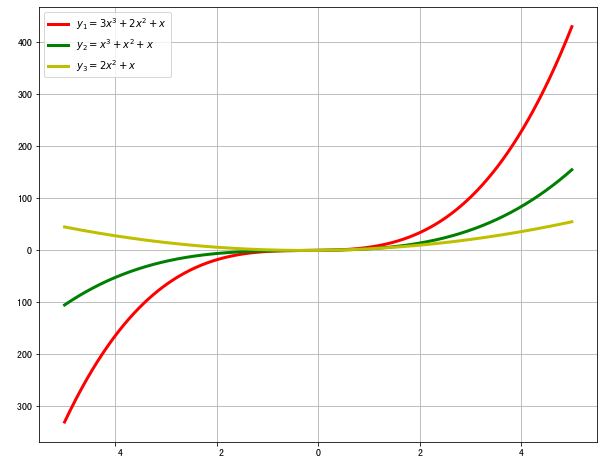

In [16]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, num=1000)
y1 = 3 * x**3 + 2 * x**2 + x
y2 = x**3 + x**2 + x
y3 = 2 * x**2 + x

plt.figure(figsize=(10,8), facecolor='w')
plt.plot(x, y1, color='r', linewidth=3, label="$y_1=3x^3+2x^2+x$")
plt.plot(x, y2, color='g', linewidth=3, label="$y_2=x^3+x^2+x$")
plt.plot(x, y3, color='y', linewidth=3, label="$y_3=2x^2+x$")
plt.grid(True)
plt.legend()

在上图中我们绘制了三条不同的曲线$y_1$、$y_2$、$y_3​$，从曲线函数值的变化不难看出，$y_1​$的函数值变化最大，$y_2$​和$y_3​$的函数值变化相对来说要平缓一些。通过函数的表达式可以看出，$y_2$​相对于$y_1​$来说自变量的系数值变小了，$y_3$​相对$y_1$来说自变量少了一个，我们可以理解为少的那个自变量的系数为0。通常如果函数的取值变化的幅度更大，我们会认为函数更复杂，函数的方差更大。所以，上面的三个函数中，函数y1​的复杂度最高。通过函数图像可以发现，降低自变量的系数值，或者减少函数自变量的个数(自变量的系数为0)是可以降低函数复杂度的。

在构建模型之前，我们是不知道数据的分布，如果模型过于简单就会导致欠拟合，如果模型过于复杂就会过拟合。通常我们为了模型能够更好的拟合数据都是使得模型处于过拟合，为了降低模型的过拟合就需要使得模型部分权重为0或者降低模型的权重，所以我们会为损失函数添加一个惩罚项，数学表达式如下
$$\widetilde{J}(\theta;X,y)=J(\theta;X,y)+\alpha\Omega(\theta), \alpha \in [0, +\infty)$$

# 2.正则化项
常用的正则化向一般有两种，L1正则化和L2正则化，他们都可以看作是成本函数的惩罚项。(通常会在正则项前面添加一个系数$\alpha$，称为超参数)

## 2.1.L1正则化
L1正则化是指权重参数$\omega$中各个元素的绝对值之和，通常表示为$||\omega||_1$。L1正则化可以产生稀疏权重参数矩阵，从而得到一个稀疏模型，这样表示为0的特征的贡献值为0，那么自然地我们会在这100个特征列中将这些过滤掉，只留下那些对因变量产生主要贡献的参数，简而言之，这样我们可以用L1正则化进行特征选择；同时一定程度上，L1可以防止过拟合。

## 2.2.L2正则化
L2正则化是指权重参数$\omega$中各个元素的平方和，然后再求平方根，通常表示为$||\omega||_2$。L2正则化可以防止模型过拟合。

# 3.神经网络与正则化
在神经网络中，带有箭头的线实际上都带有权重，而神经元是储存输入输出的地方，防止网络在优化方向上过于放飞自我，这里我们还需要加入一个先验——正则化惩罚项，用来惩罚神经元的加权矩阵。我们设的正则化系数很大，导致一些加权矩阵的值几乎为零——那最后我们得到的是一个更简单的线性网络，它很可能是欠拟合的。因此这个系数并不是越大越好。我们需要优化这个正则化系数的值，以便获得一个良好拟合的模型